In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
aisles_df=pd.read_excel("aisles.xlsx",sheetname="aisles")
department=pd.read_excel("departments.xlsx",sheetname="departments")
order_products_train=pd.read_excel("order_products__train.xlsx",sheetname="order_products__train")
order_products_prior=pd.read_excel("order_products__prior.xlsx",sheetname="order_products__prior")
orders=pd.read_excel("orders.xlsx",sheetname="orders")
products=pd.read_excel("products.xlsx",sheetname="products")

In [32]:
aisles_df.head()

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [33]:
orders.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

In [34]:
department.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [35]:
products.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [36]:
order_products_train.head()

order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1

In [37]:
order_products_prior.head()

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [38]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
order_id                  1048575 non-null int64
user_id                   1048575 non-null int64
eval_set                  1048575 non-null object
order_number              1048575 non-null int64
order_dow                 1048575 non-null int64
order_hour_of_day         1048575 non-null int64
days_since_prior_order    985475 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 56.0+ MB


In [39]:
orders.describe()

order_id       user_id  order_number     order_dow  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.710968e+06  3.156404e+04  1.717418e+01  2.778637e+00   
std    9.875774e+05  1.816695e+04  1.771094e+01  2.047751e+00   
min    6.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.554670e+05  1.589600e+04  5.000000e+00  1.000000e+00   
50%    1.710657e+06  3.160800e+04  1.100000e+01  3.000000e+00   
75%    2.566970e+06  4.729700e+04  2.300000e+01  5.000000e+00   
max    3.421083e+06  6.310000e+04  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       1.048575e+06           985475.000000  
mean        1.345229e+01               11.102506  
std         4.219144e+00                9.186663  
min         0.000000e+00                0.000000  
25%         1.000000e+01                4.000000  
50%         1.300000e+01                7.000000  
75%         1.600000e+01               15.000000  
max         2.300000e+01               30.000000

In [40]:
orders["user_id"].value_counts

<bound method IndexOpsMixin.value_counts of 0              1
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             2
12             2
13             2
14             2
15             2
16             2
17             2
18             2
19             2
20             2
21             2
22             2
23             2
24             2
25             2
26             3
27             3
28             3
29             3
           ...  
1048545    63098
1048546    63098
1048547    63098
1048548    63098
1048549    63098
1048550    63098
1048551    63098
1048552    63098
1048553    63098
1048554    63098
1048555    63098
1048556    63099
1048557    63099
1048558    63099
1048559    63099
1048560    63099
1048561    63099
1048562    63099
1048563    63099
1048564    63099
1048565    63099
1048566    63099
1048567    63099
1048568    63099
1048569    63099
1048

In [41]:
total_null=orders.isnull().sum()
total_null

order_id                      0
user_id                       0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    63100
dtype: int64

In [42]:
orders.isnull().count()

order_id                  1048575
user_id                   1048575
eval_set                  1048575
order_number              1048575
order_dow                 1048575
order_hour_of_day         1048575
days_since_prior_order    1048575
dtype: int64

In [43]:
percentage=total_null/orders.isnull().count()
percentage

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060177
dtype: float64

In [44]:
missing_val_tabel=pd.concat([total_null,percentage],keys=["Total","Percentage"],axis=1)
missing_val_tabel

Total  Percentage
order_id                    0    0.000000
user_id                     0    0.000000
eval_set                    0    0.000000
order_number                0    0.000000
order_dow                   0    0.000000
order_hour_of_day           0    0.000000
days_since_prior_order  63100    0.060177

In [45]:
#as we have only 6% missing values in days_since_prior_order so we can remove null values in dataset ordes
orders=orders.dropna(axis=0)

In [46]:
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [47]:
#check missing values in rest tabels
aisles_df.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [48]:
department.isnull().sum()

department_id    0
department       0
dtype: int64

In [49]:
order_products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [50]:
order_products_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [51]:
count=orders["eval_set"].value_counts()
count

prior    922375
train     40096
test      23004
Name: eval_set, dtype: int64

In [52]:
count.index
#count.values

Index(['prior', 'train', 'test'], dtype='object')

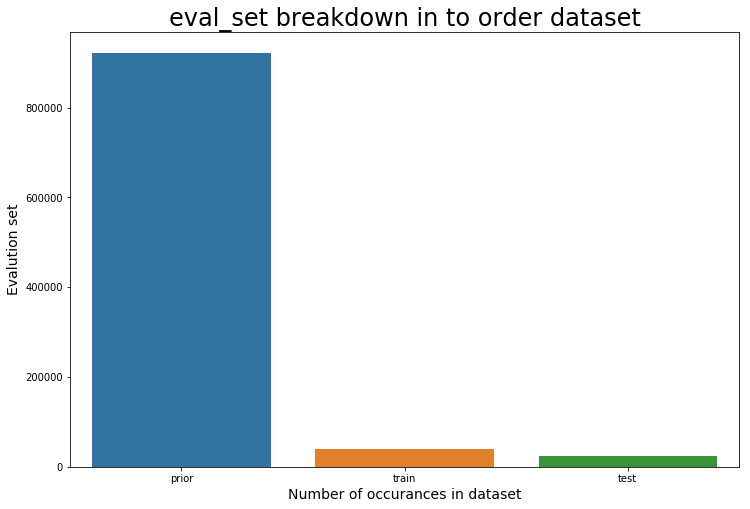

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(count.index,count.values)
plt.xlabel("Number of occurances in dataset",fontsize=14)
plt.ylabel("Evalution set",fontsize=14)
plt.title("eval_set breakdown in to order dataset",fontsize=24)
plt.show()

In [54]:
count_hour_of_day=orders["order_hour_of_day"].value_counts()
count_hour_of_day

10    83080
11    81895
15    81663
14    81614
13    80490
12    78960
16    78176
9     74349
17    65598
18    52636
8     52003
19    40202
20    29720
7     26777
21    22564
22    17670
23    11382
6      8743
0      6445
1      3470
5      2719
2      2140
4      1645
3      1534
Name: order_hour_of_day, dtype: int64

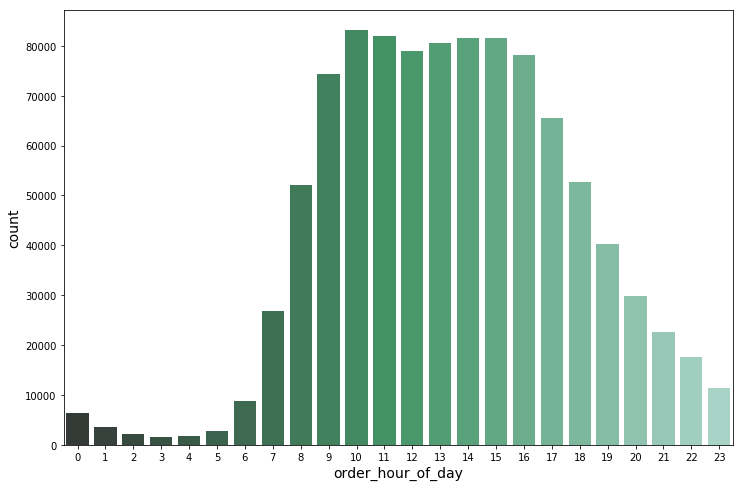

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(count_hour_of_day.index,count_hour_of_day.values,palette='BuGn_d')
plt.xlabel("order_hour_of_day",fontsize=14)
plt.ylabel("count",fontsize=14)
plt.show()

In [56]:
#orders on days
count_orders_on_days=orders["order_dow"].value_counts()
count_orders_on_days

0    172131
1    169242
2    134619
5    131286
6    129229
3    126033
4    122935
Name: order_dow, dtype: int64

In [29]:
plt.figure(figsize=(8,8))
sns.barplot(x="order_dow", data=orders)

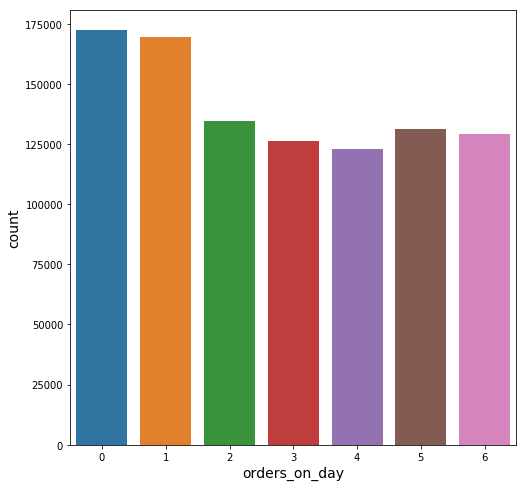

In [57]:
plt.figure(figsize=(8,8))
sns.barplot(count_orders_on_days.index,count_orders_on_days.values)
plt.xlabel("orders_on_day",fontsize=14)
plt.ylabel("count",fontsize=14)
plt.show()

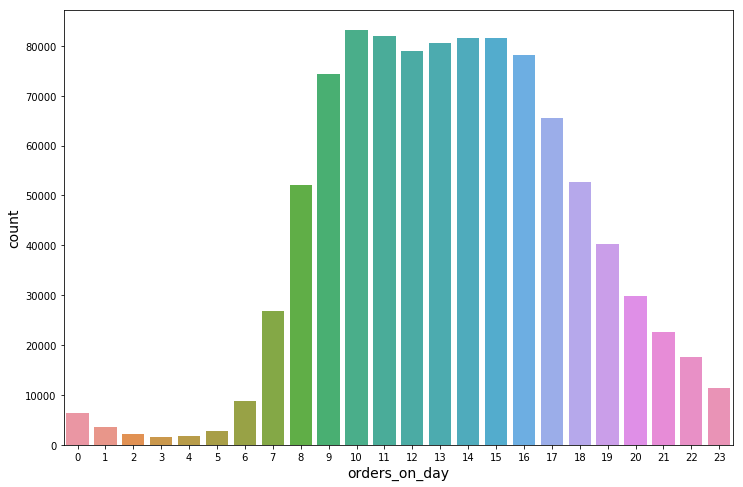

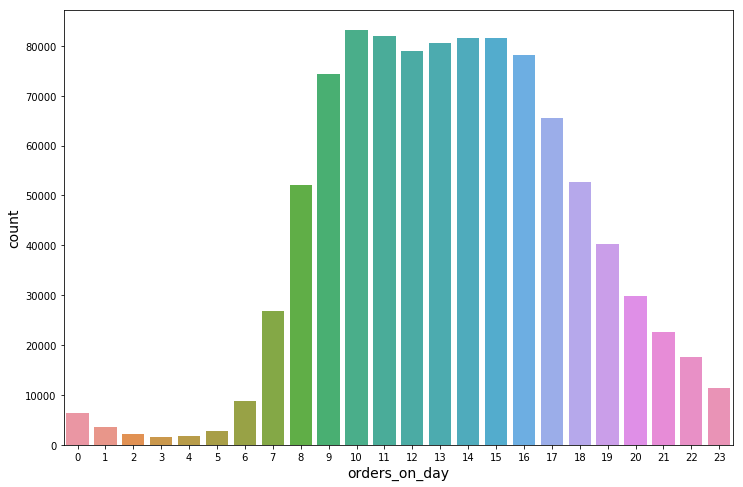

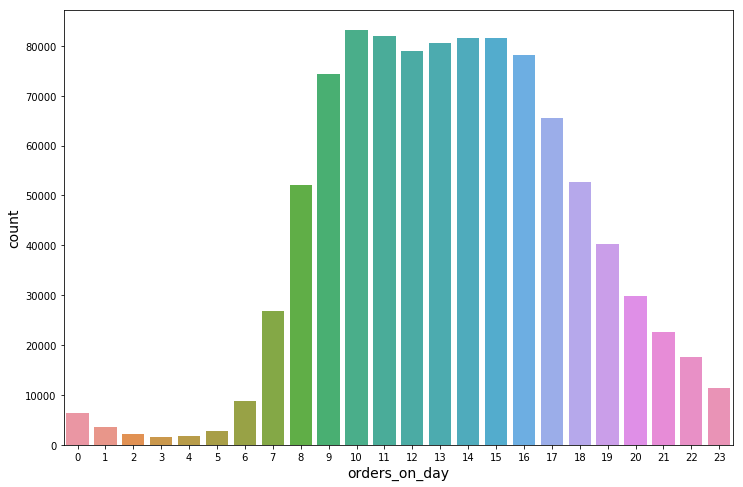

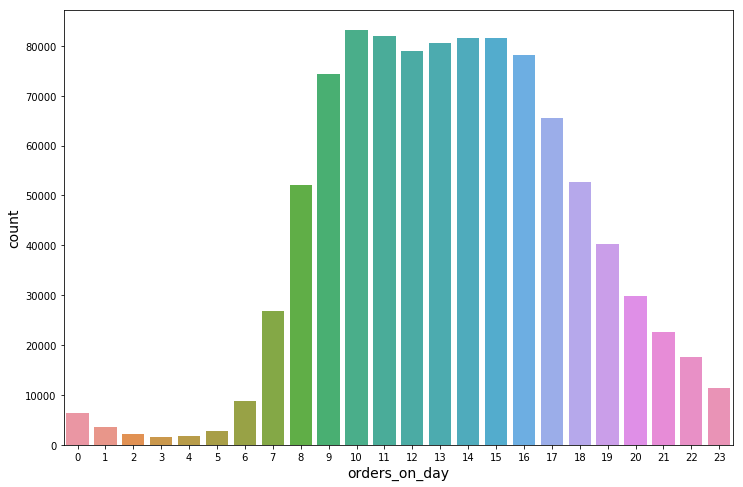

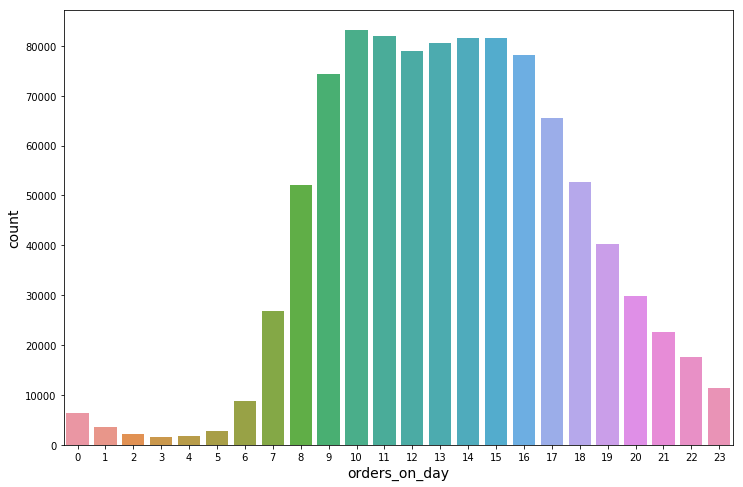

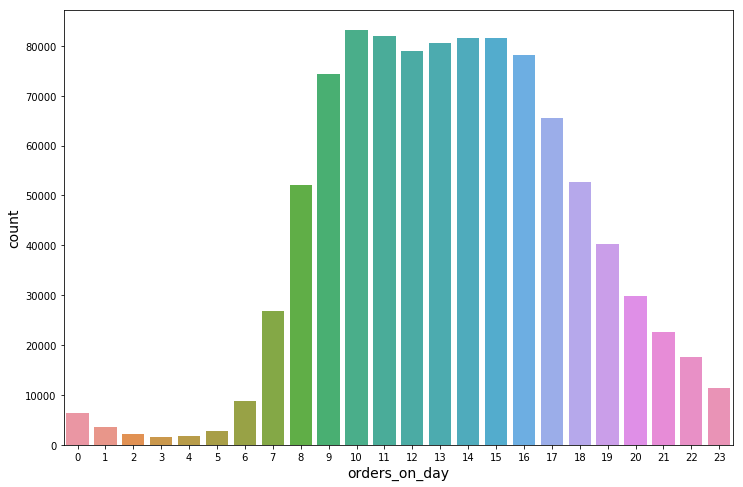

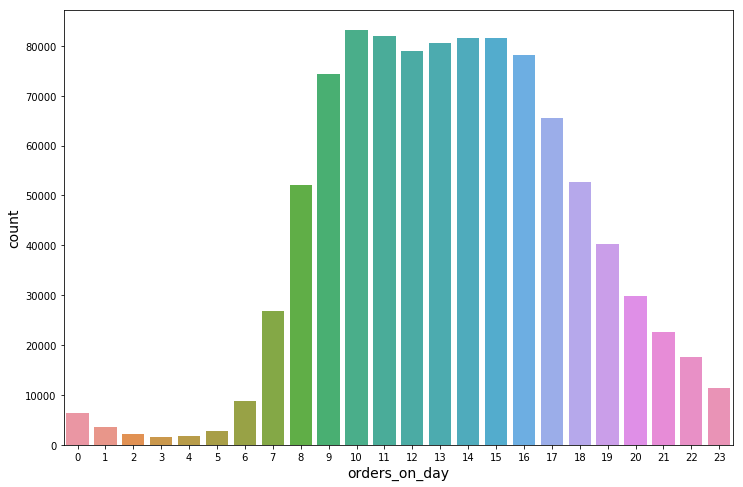

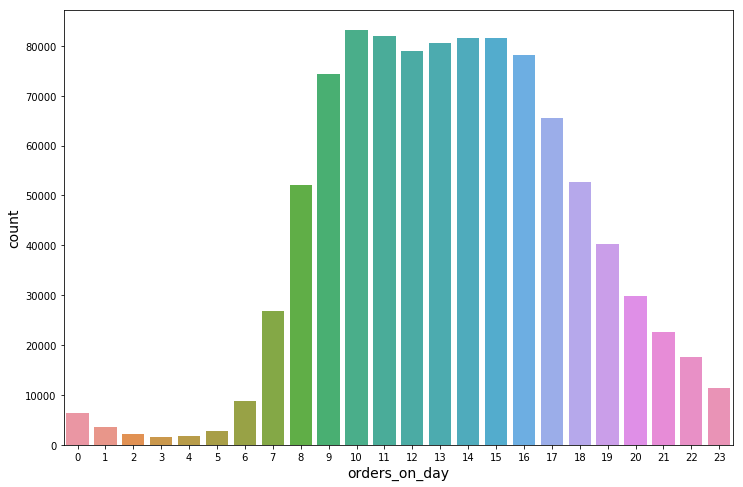

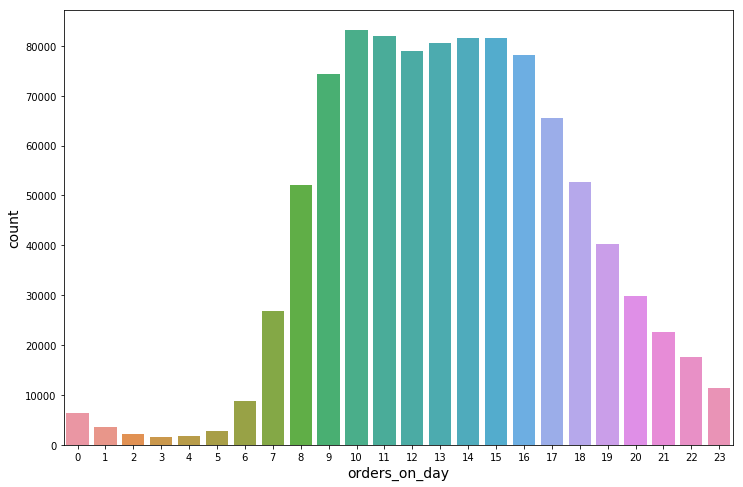

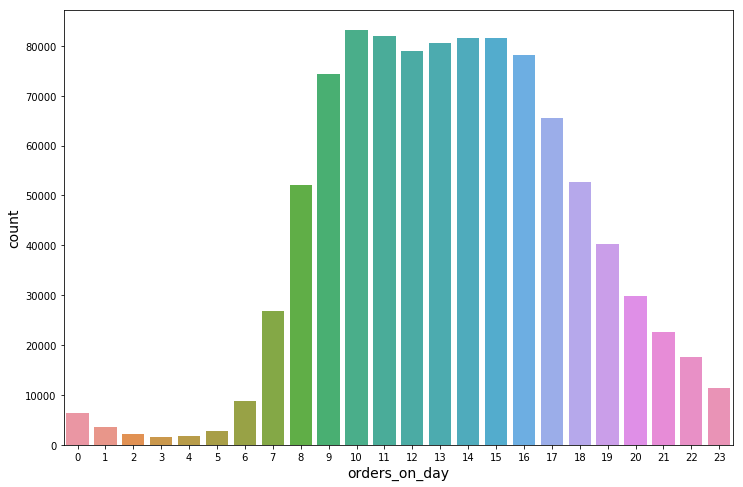

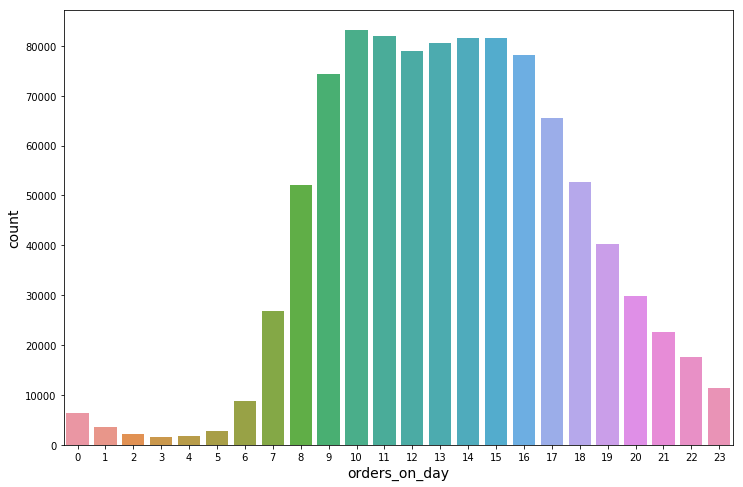

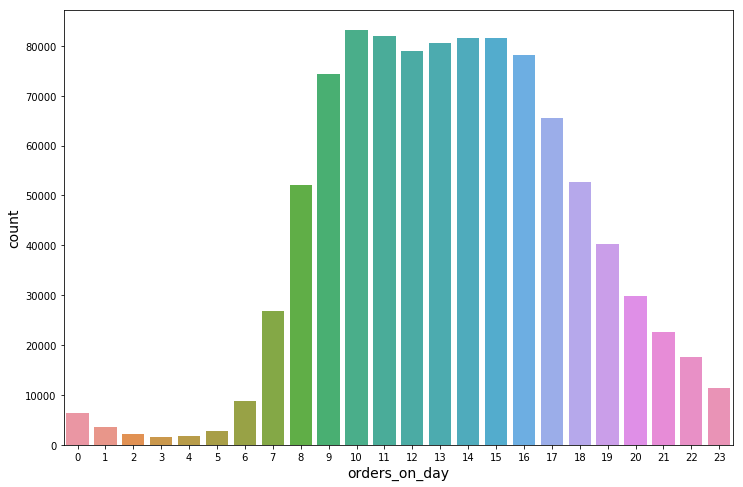

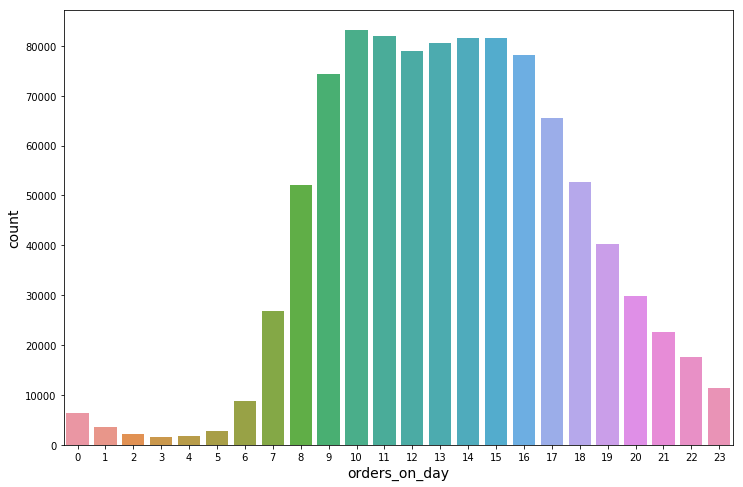

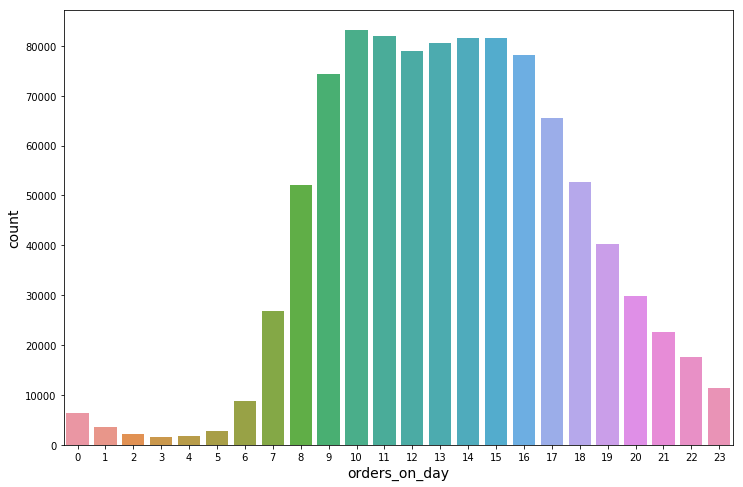

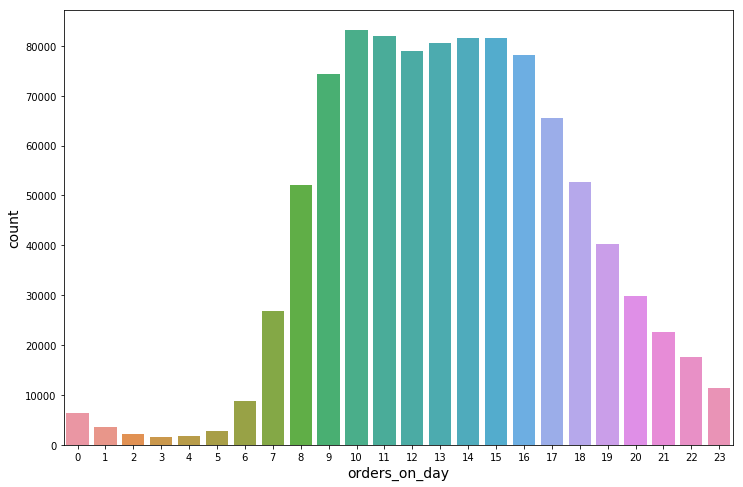

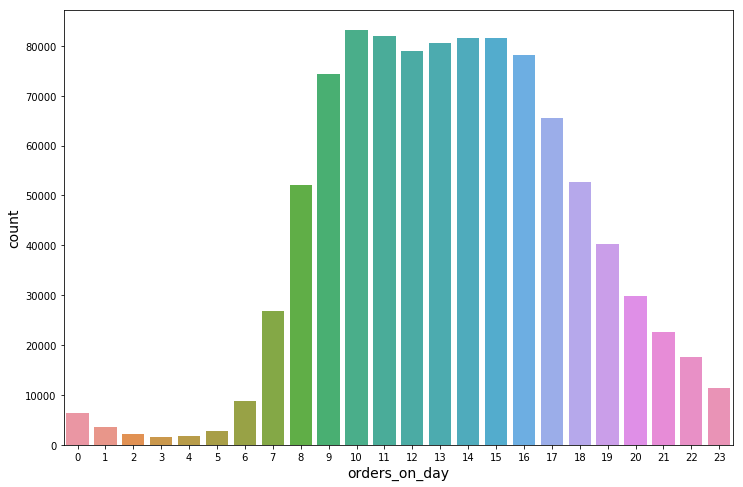

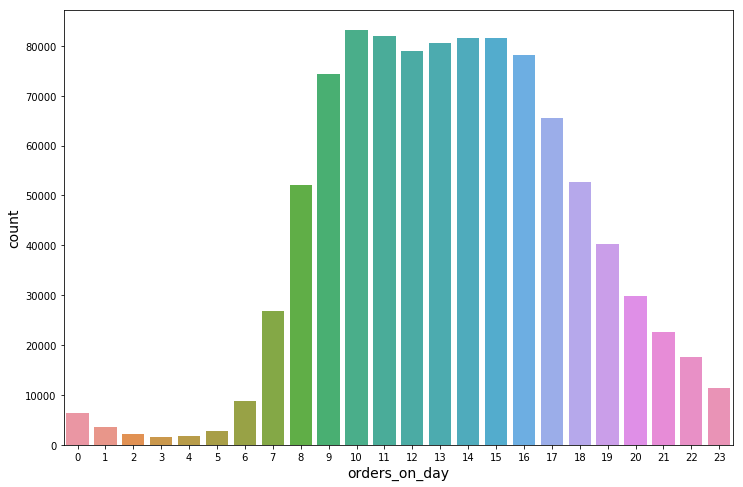

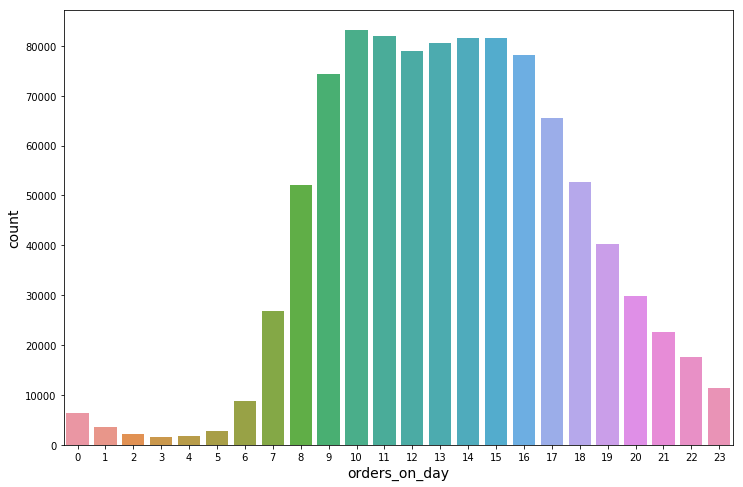

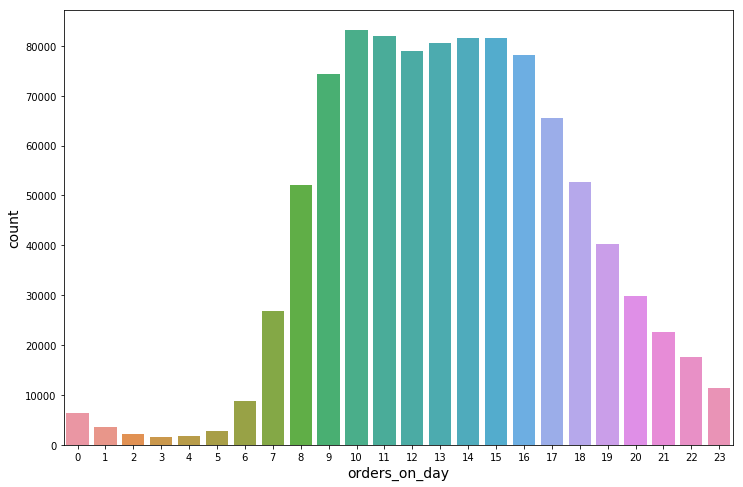

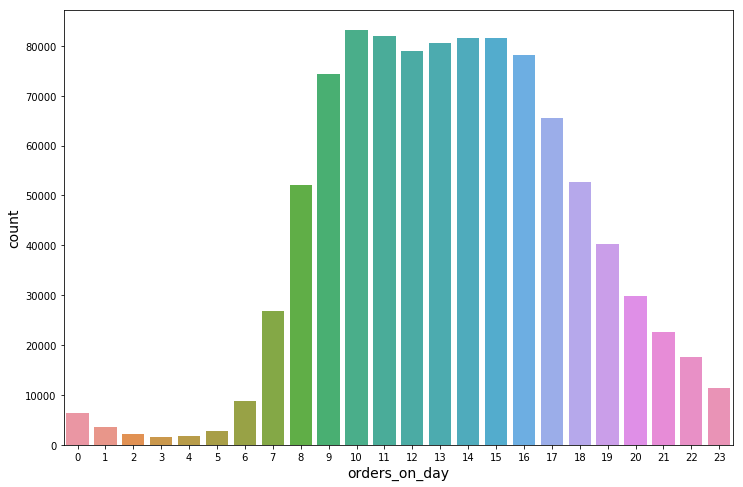

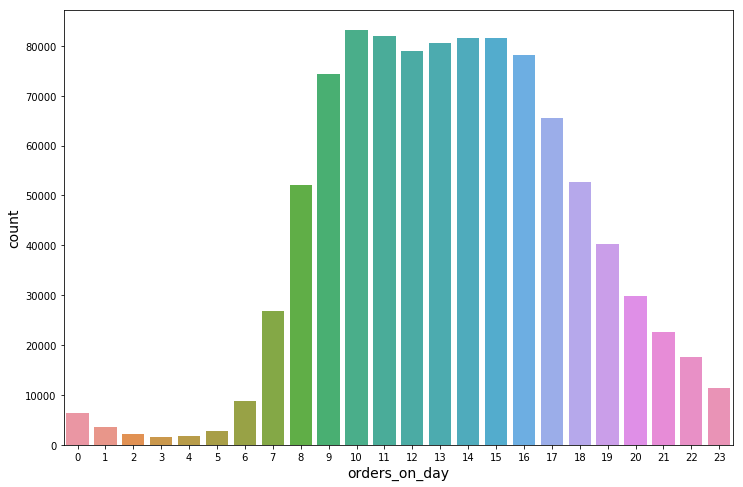

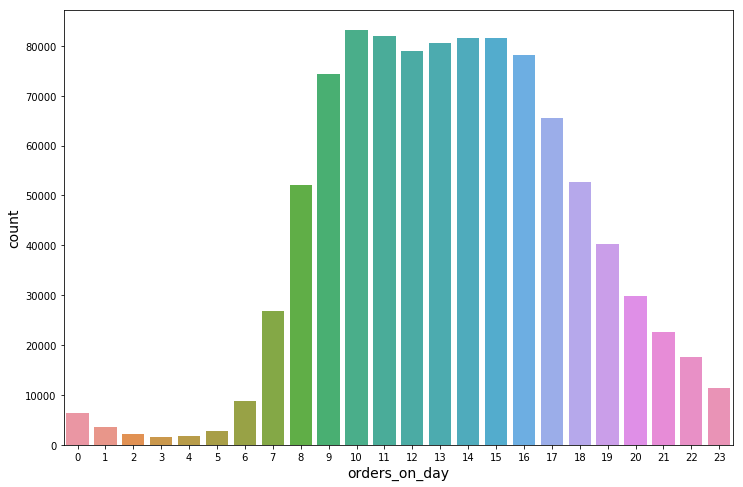

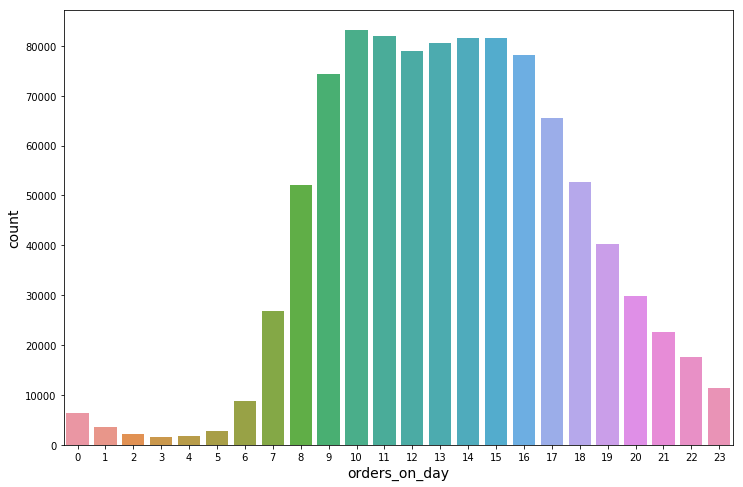

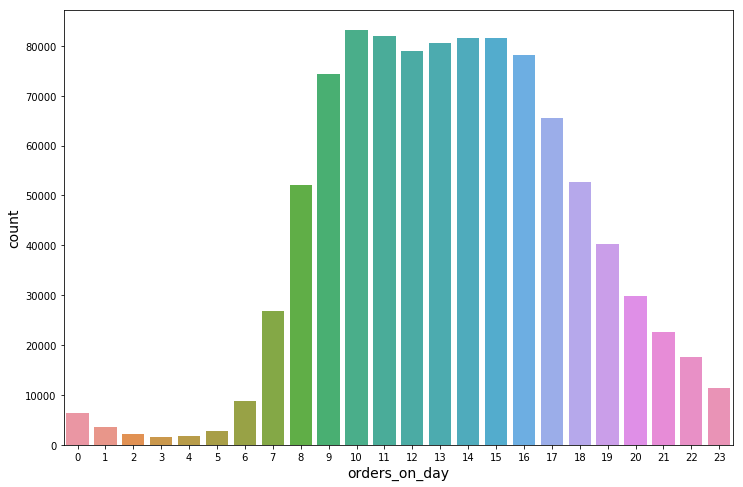

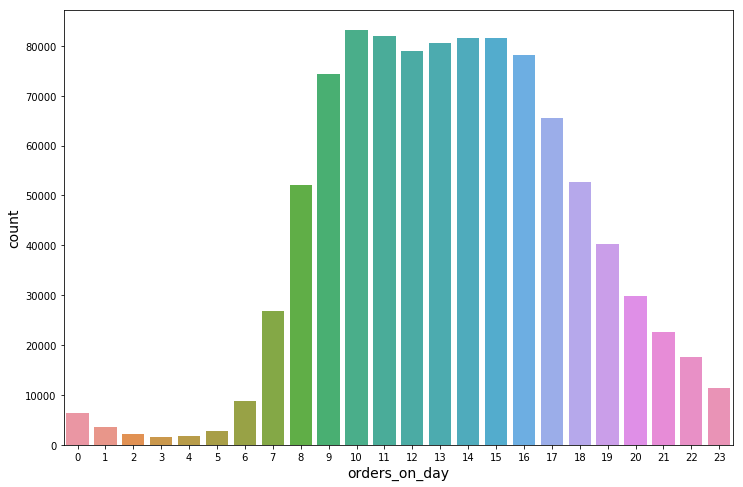

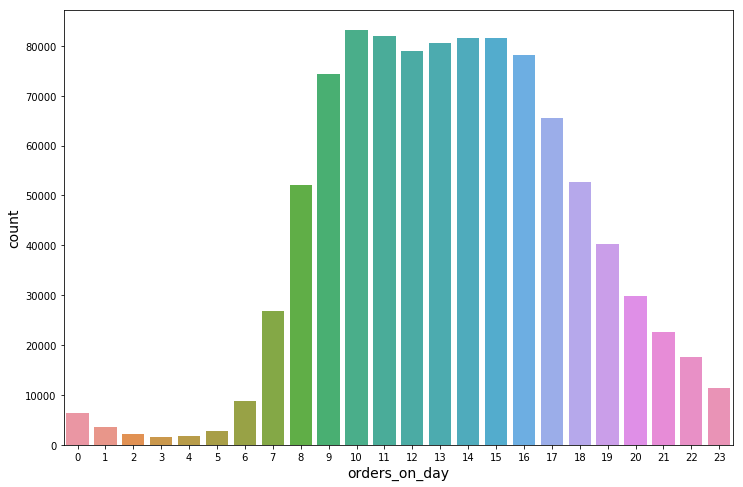

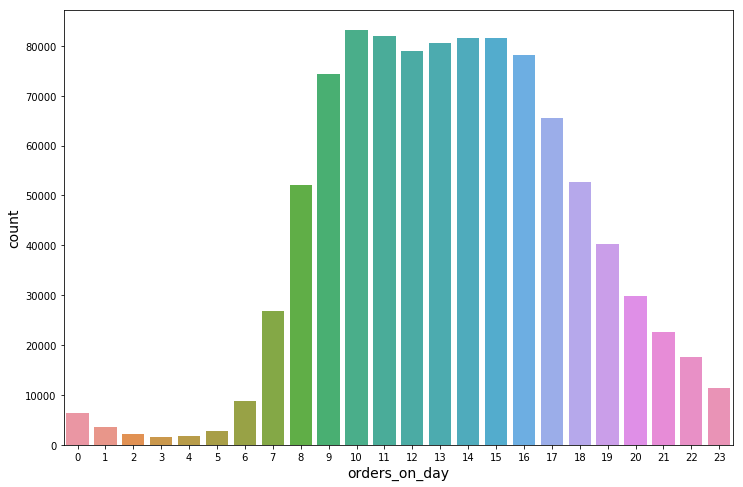

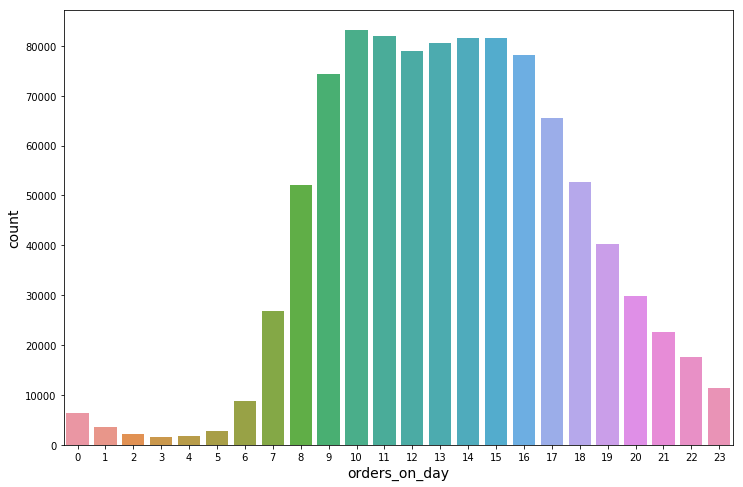

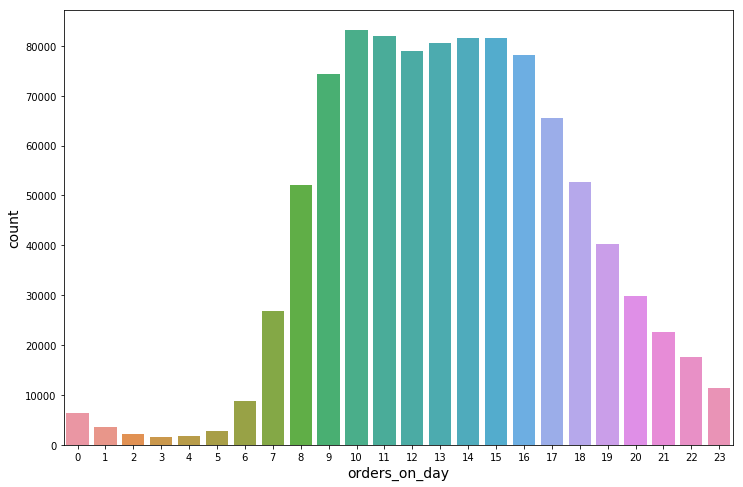

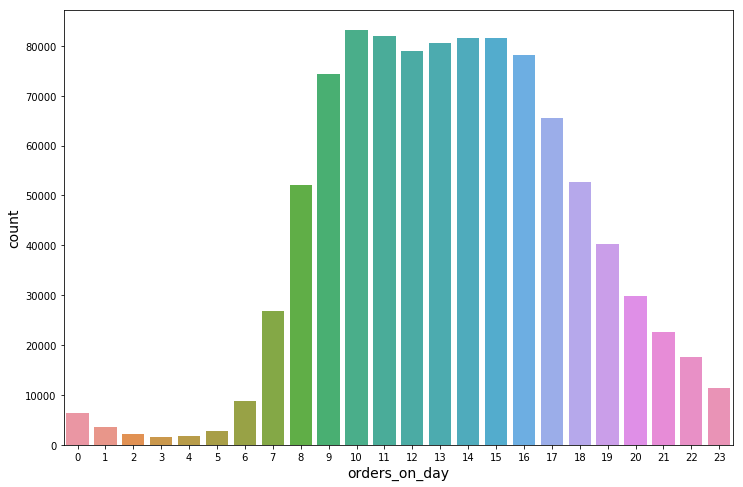

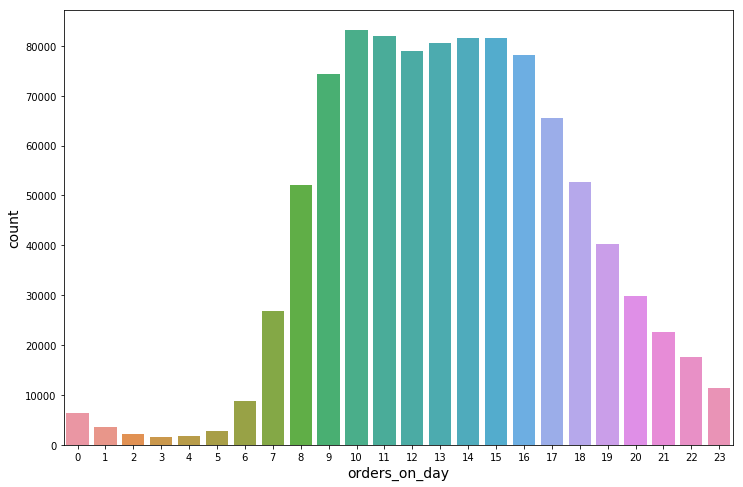

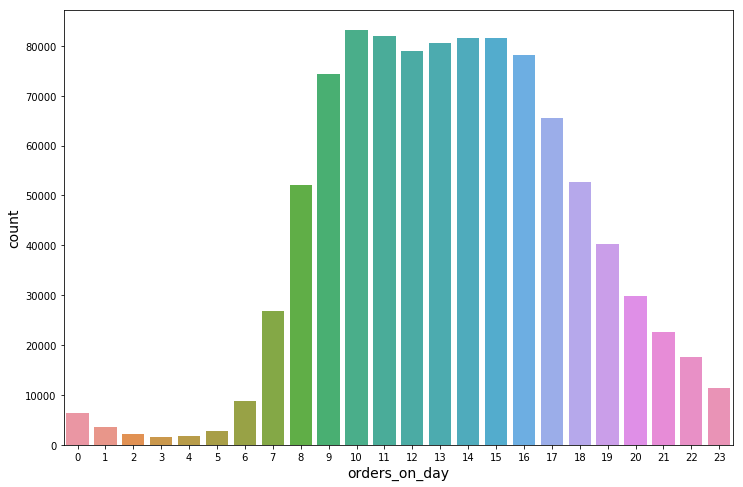

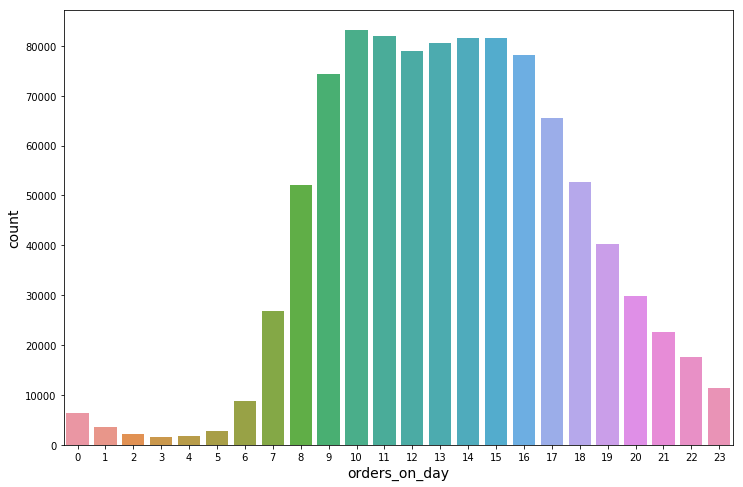

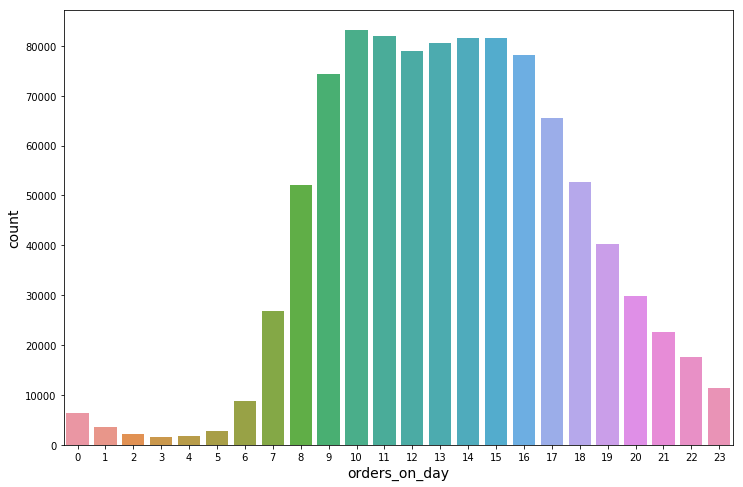

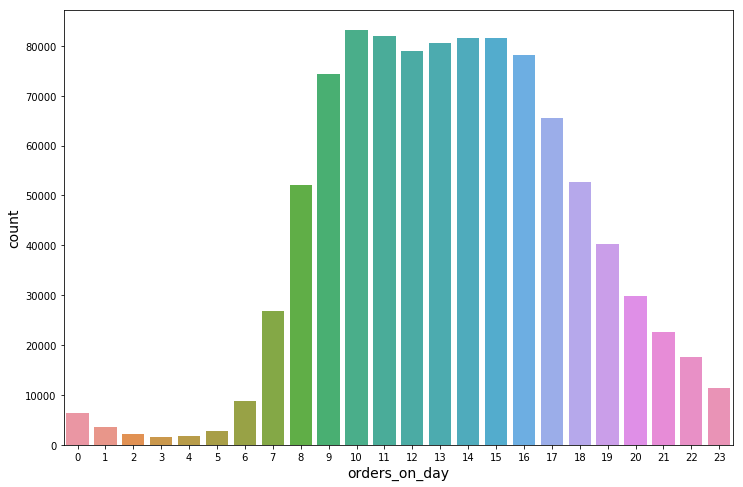

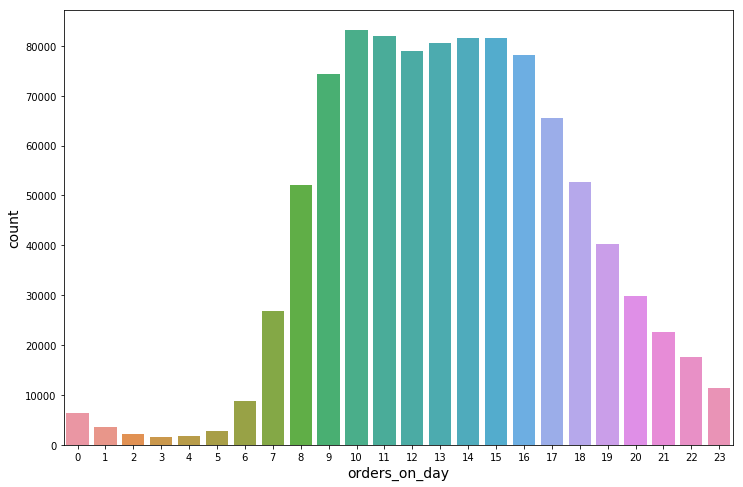

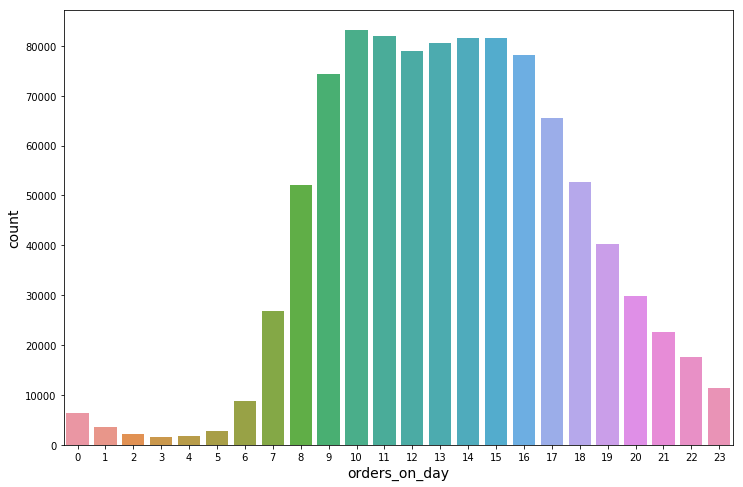

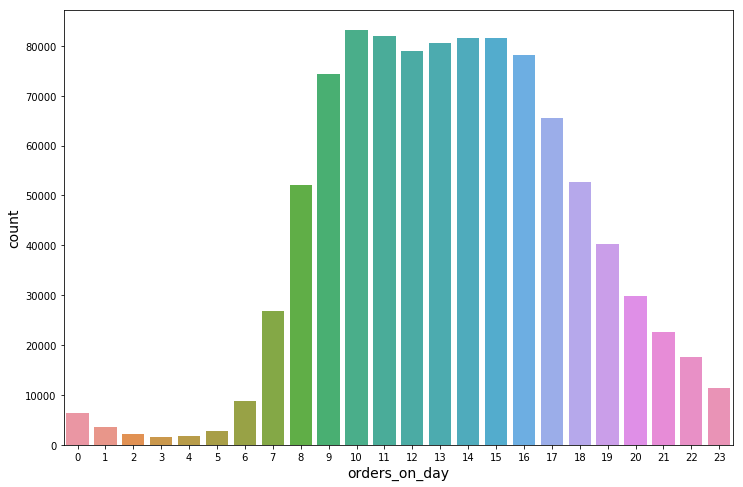

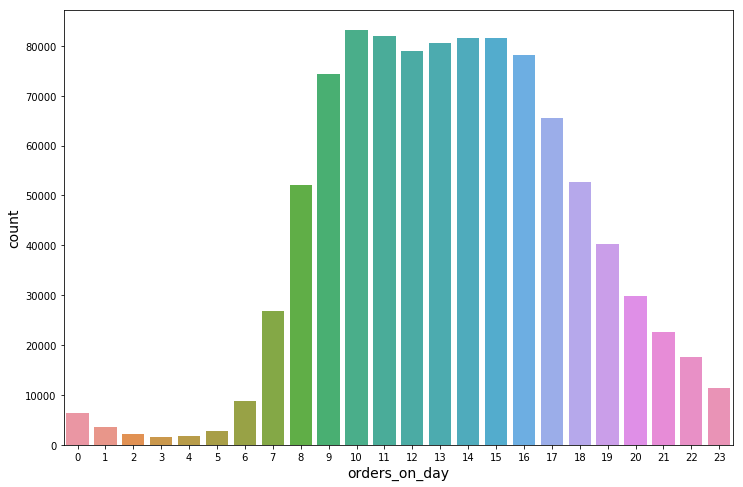

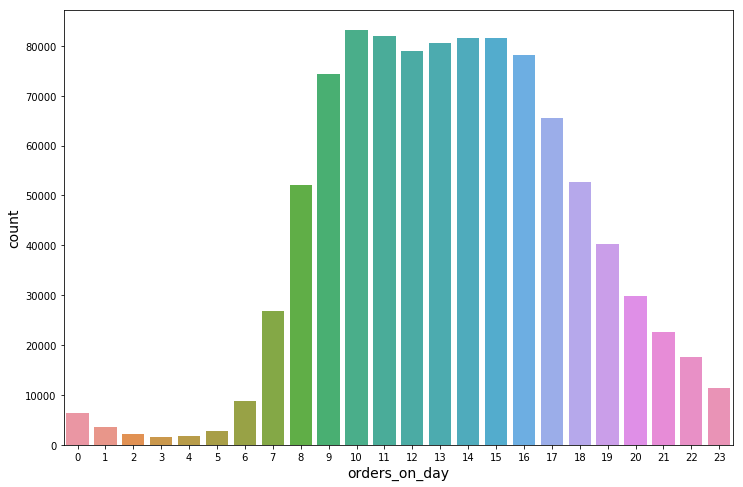

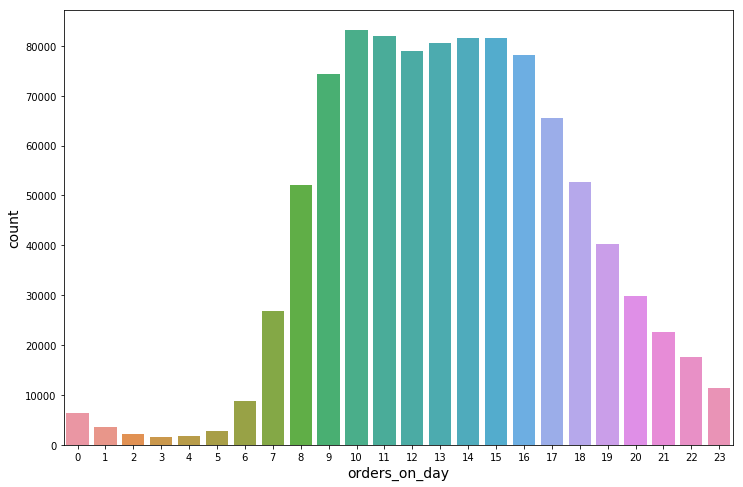

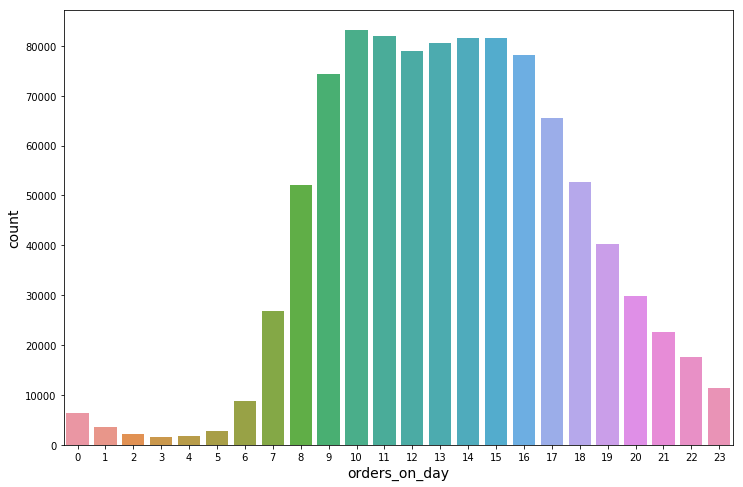

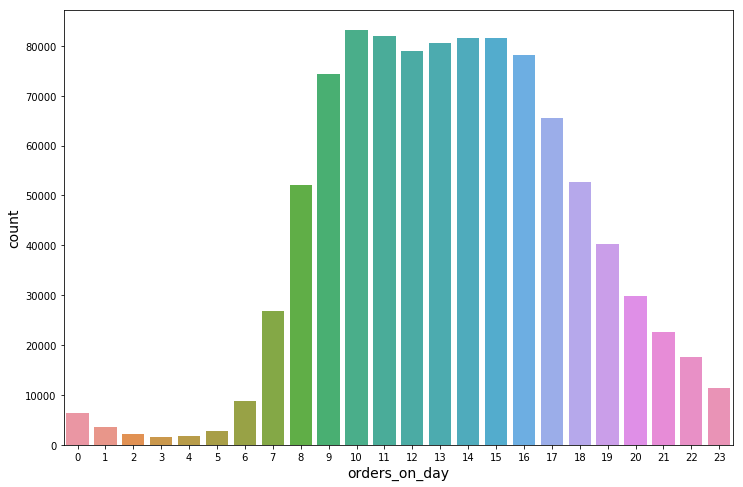

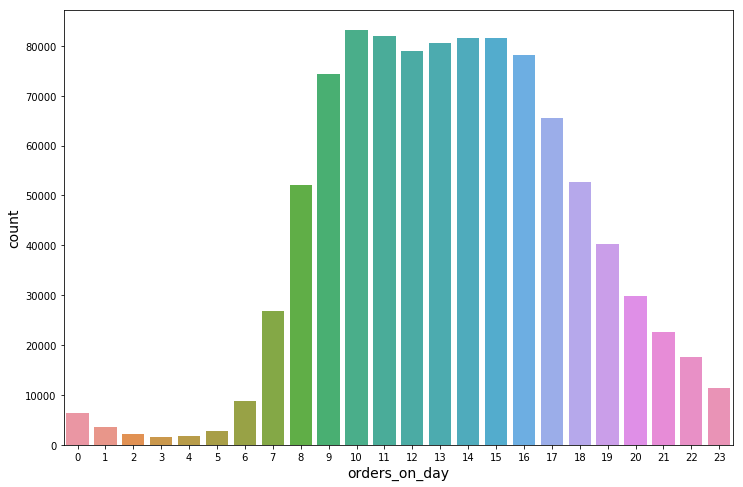

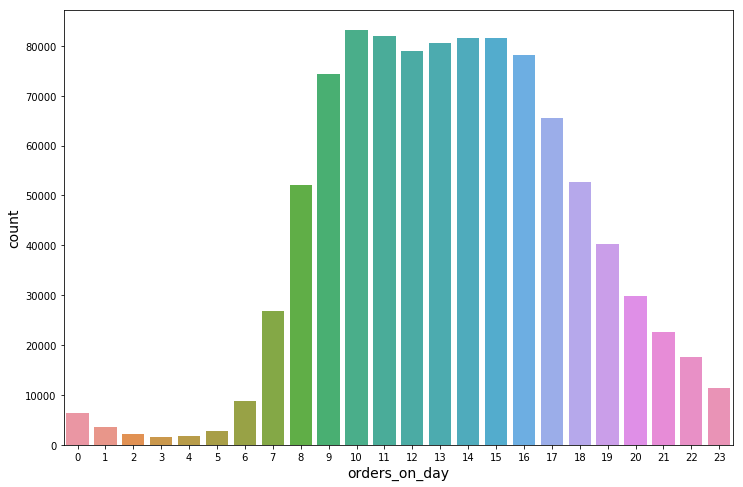

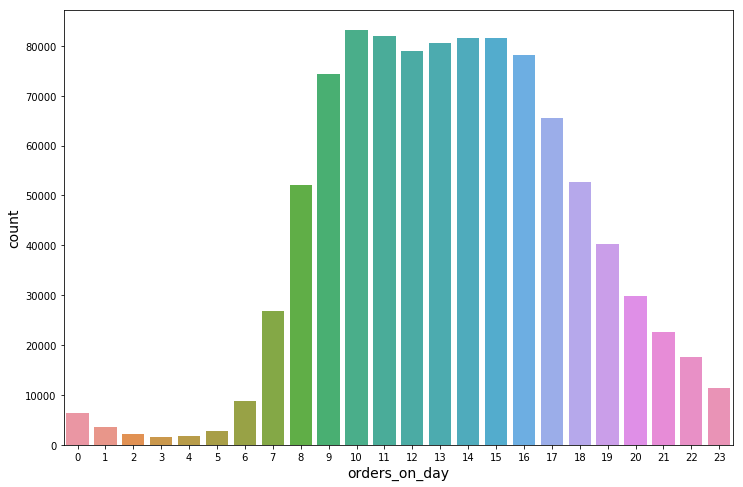

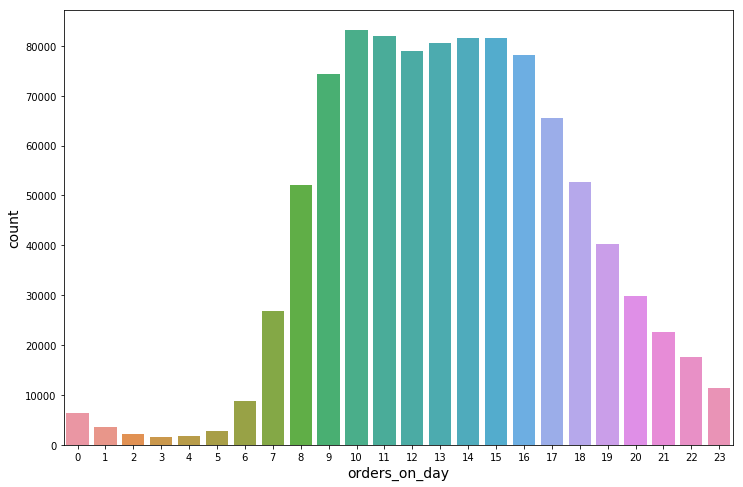

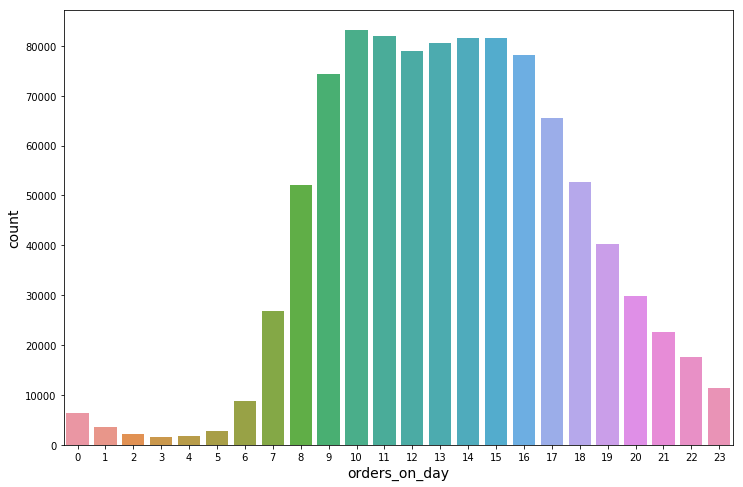

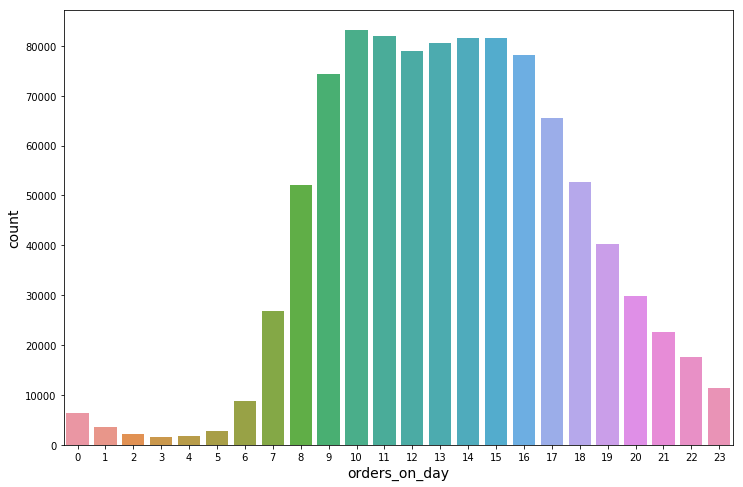

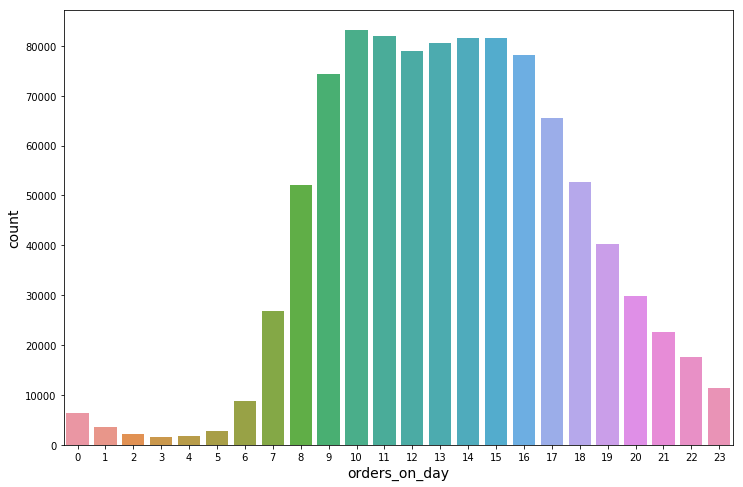

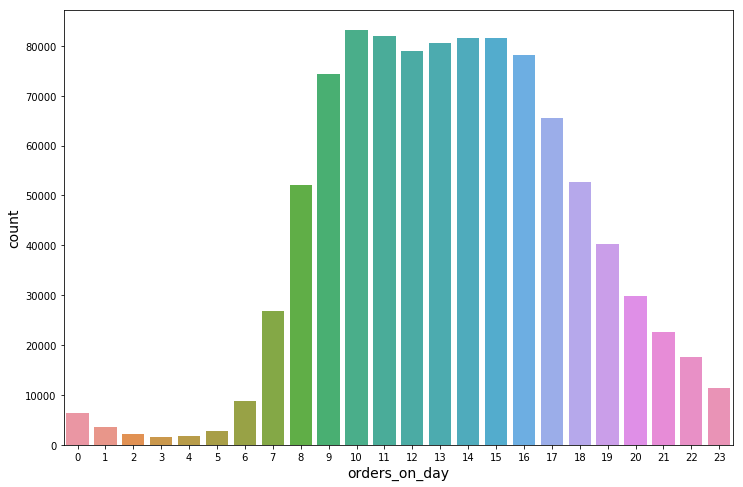

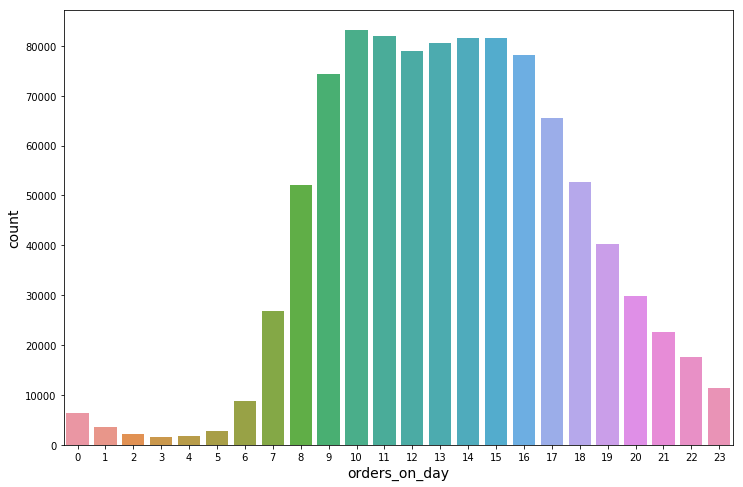

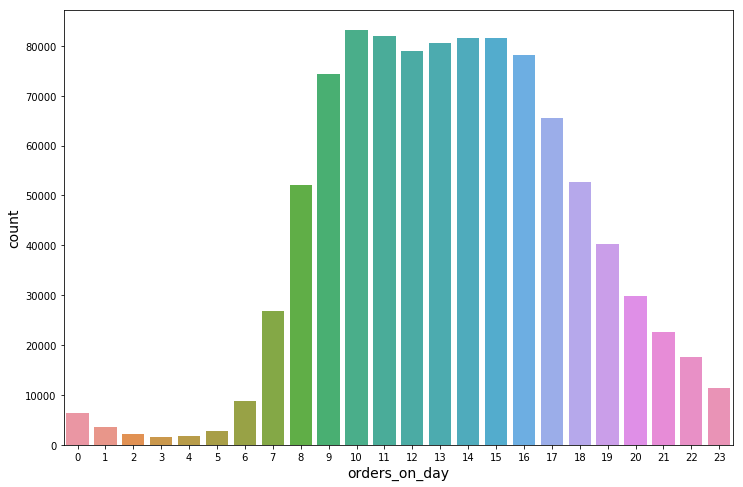

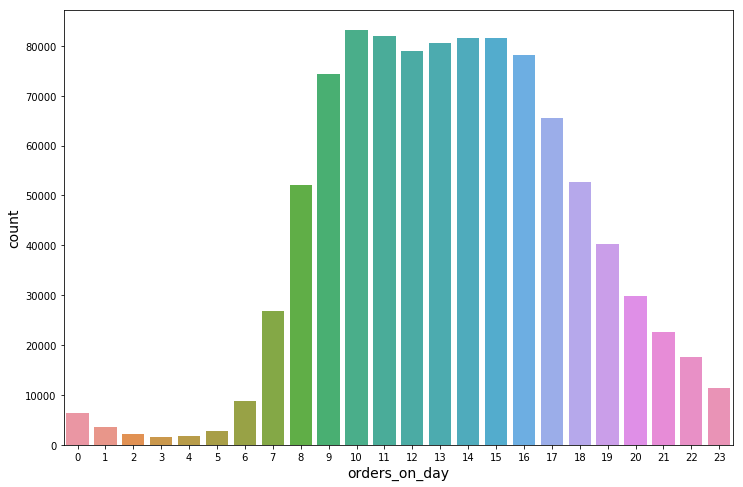

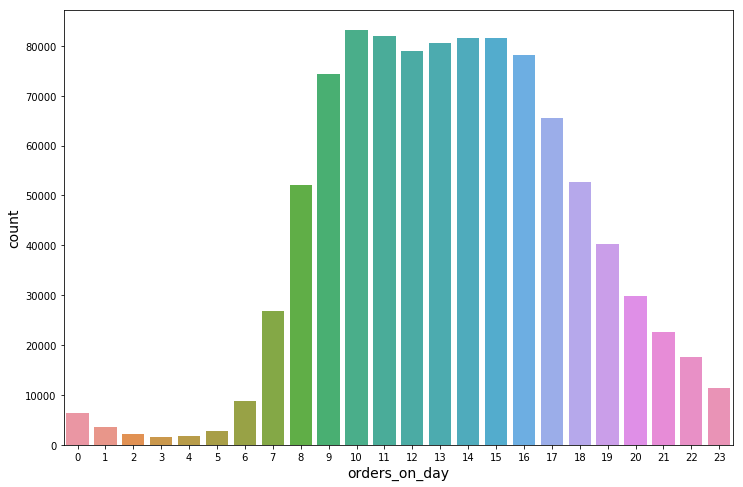

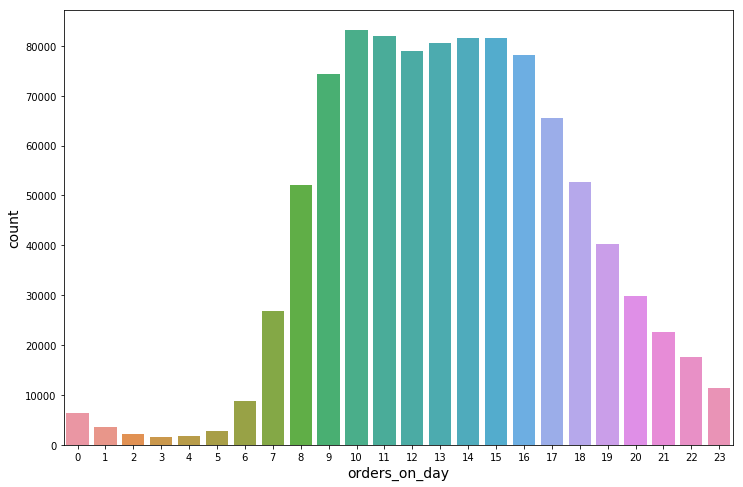

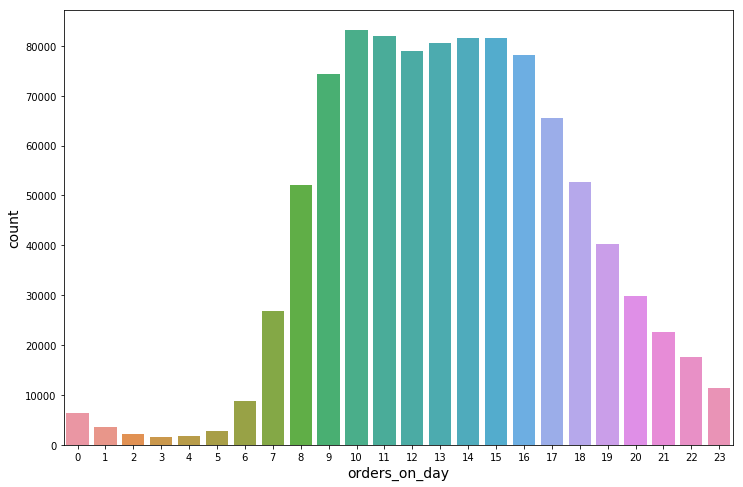

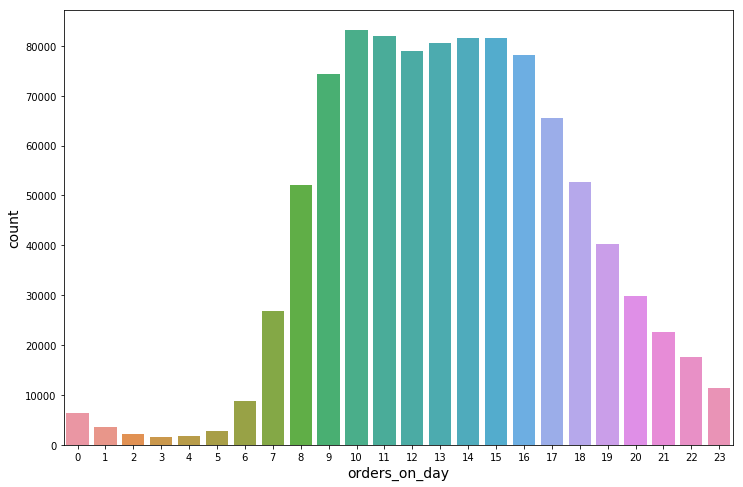

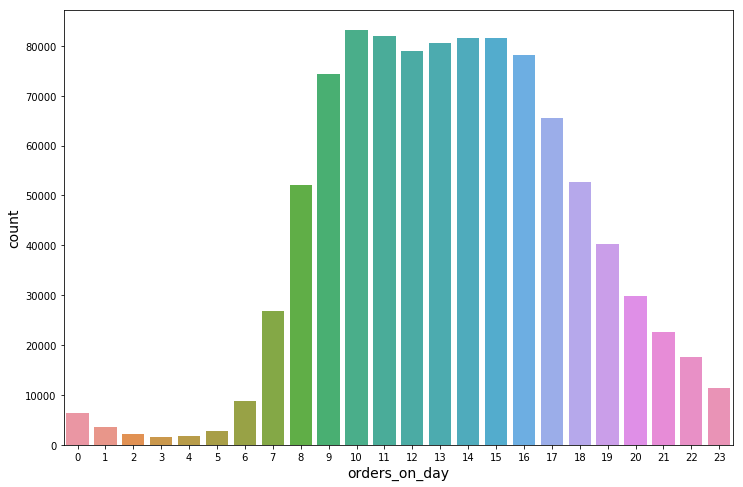

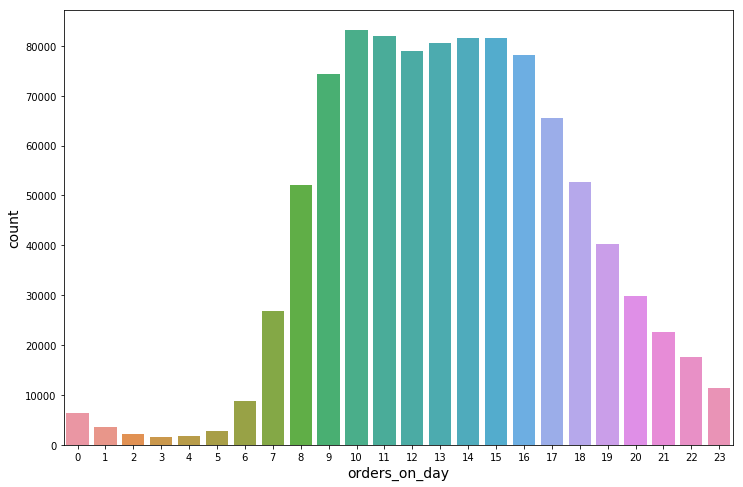

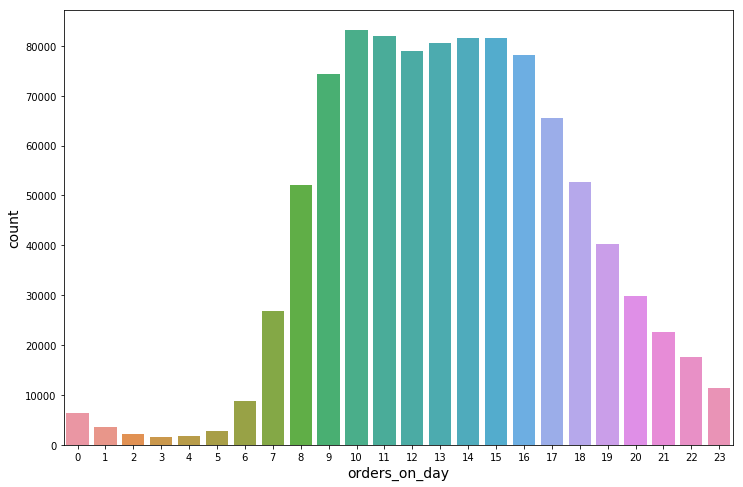

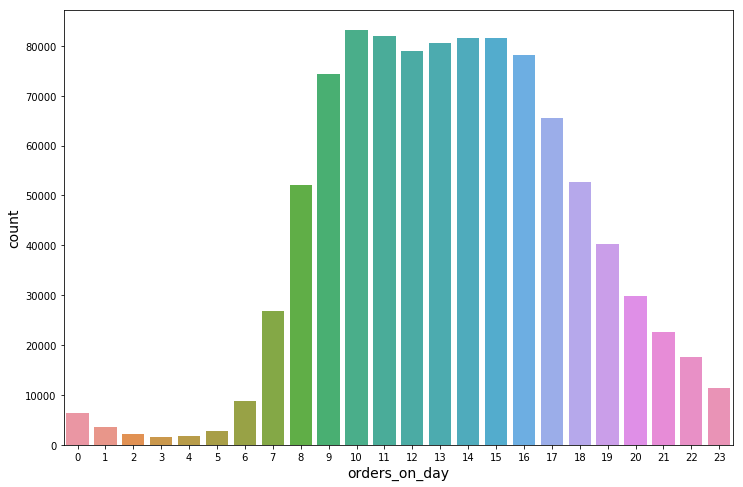

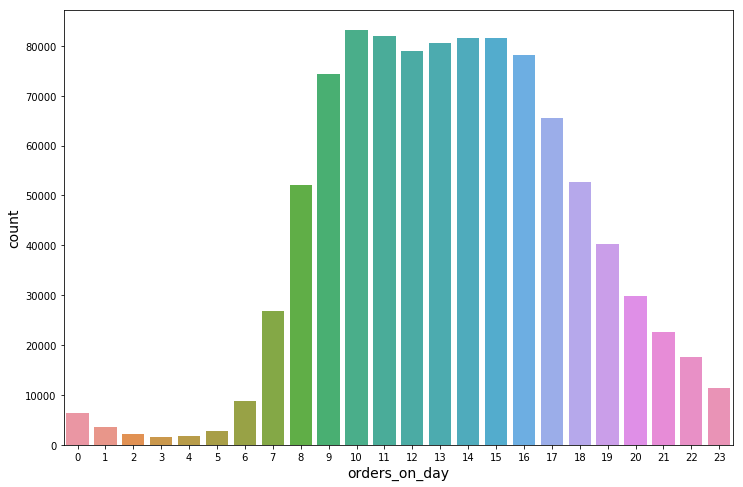

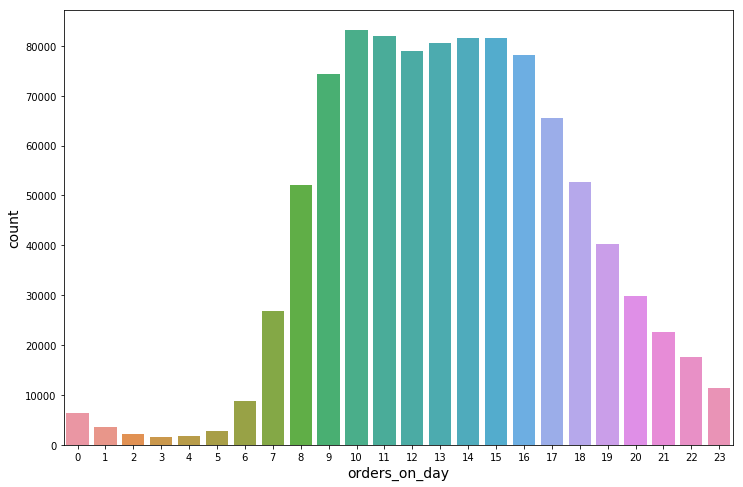

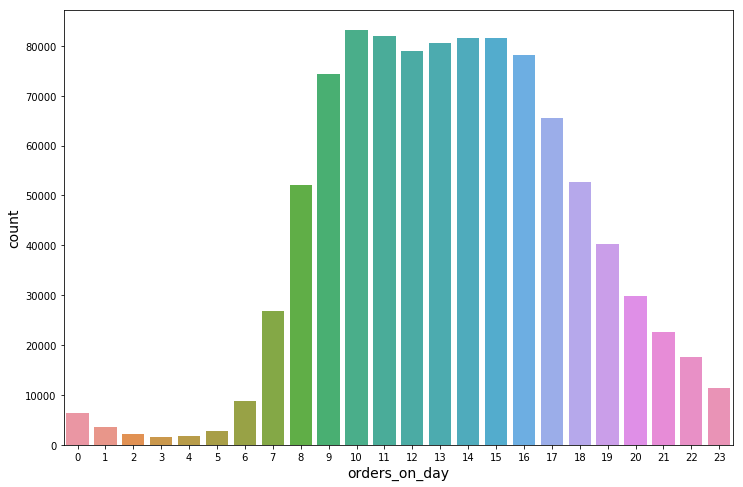

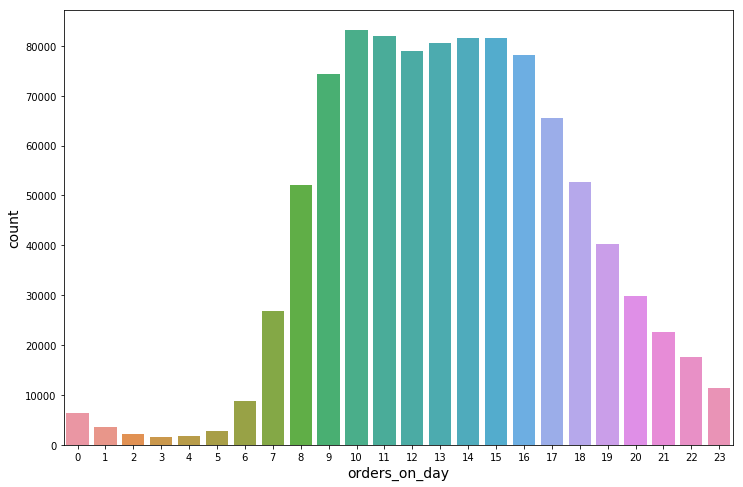

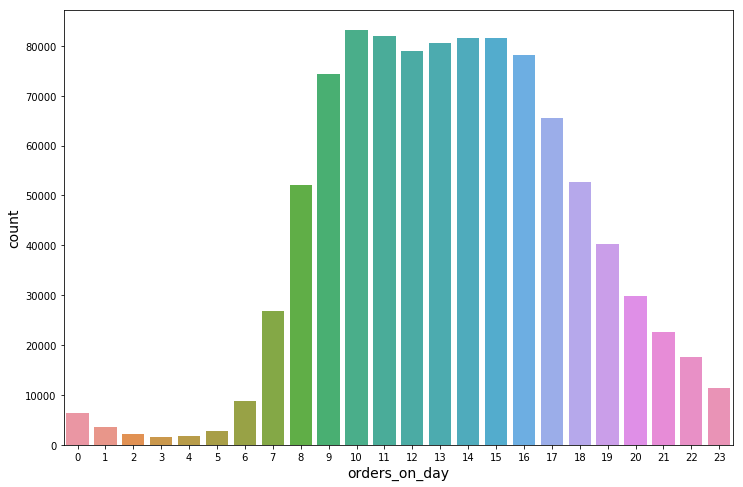

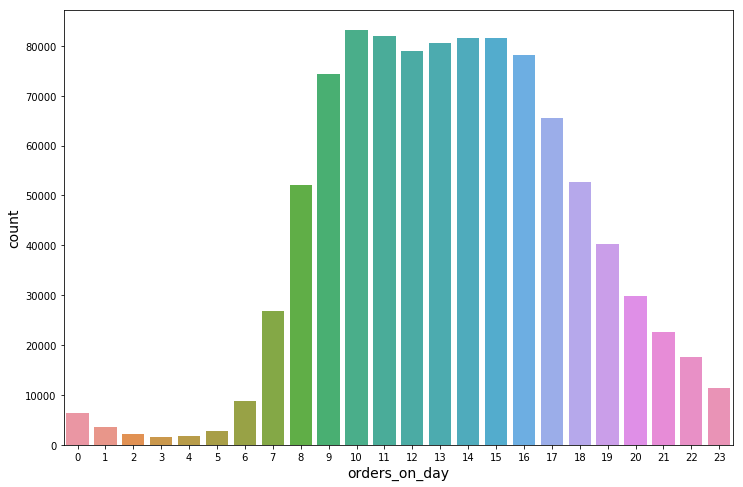

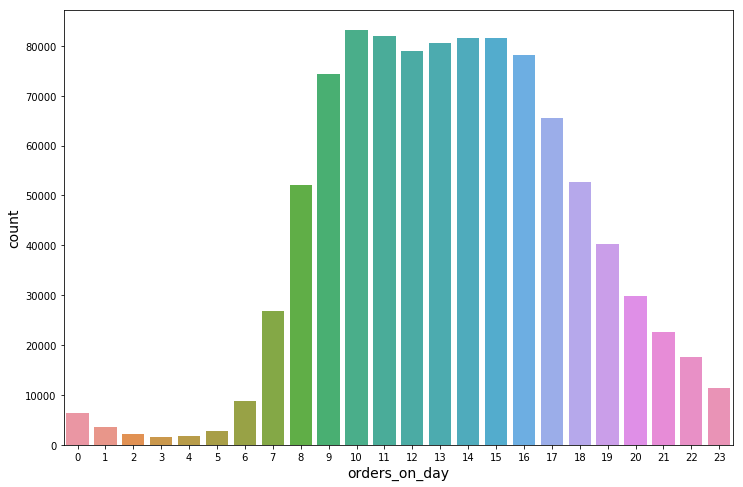

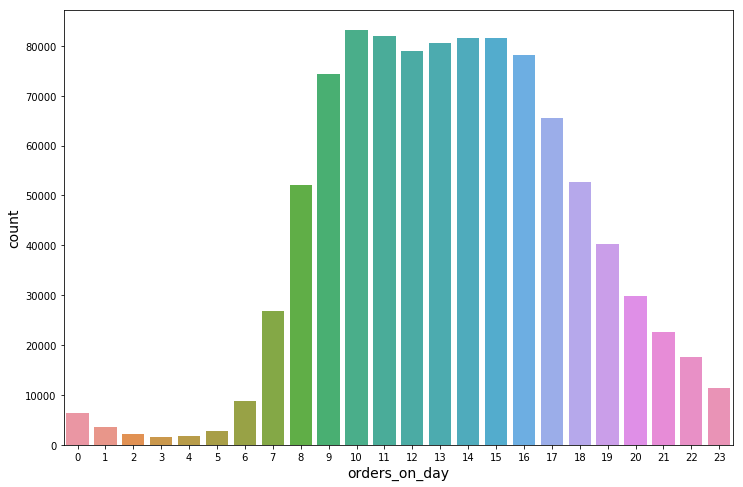

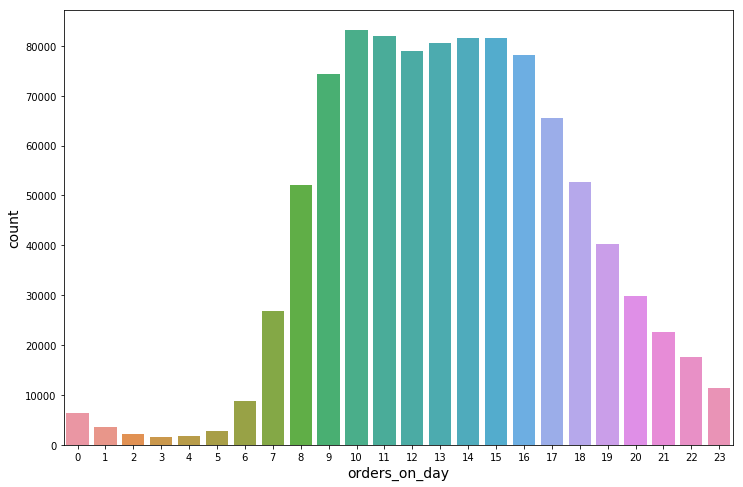

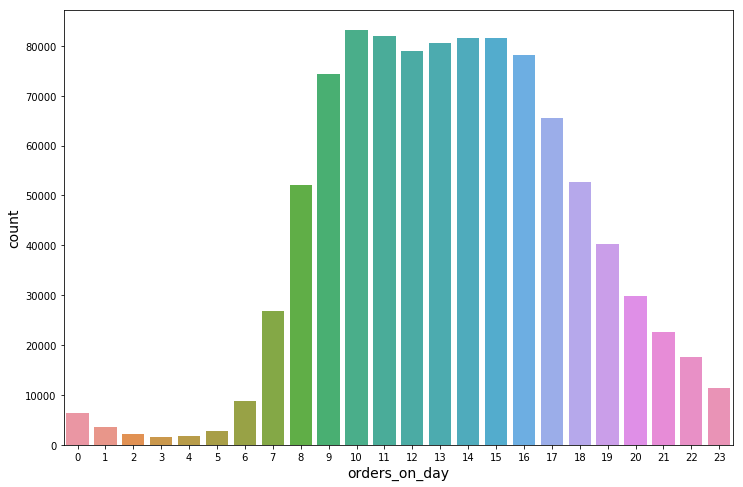

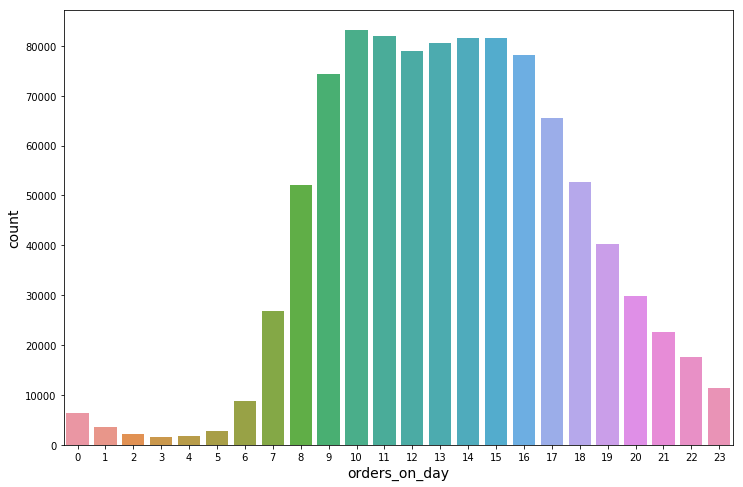

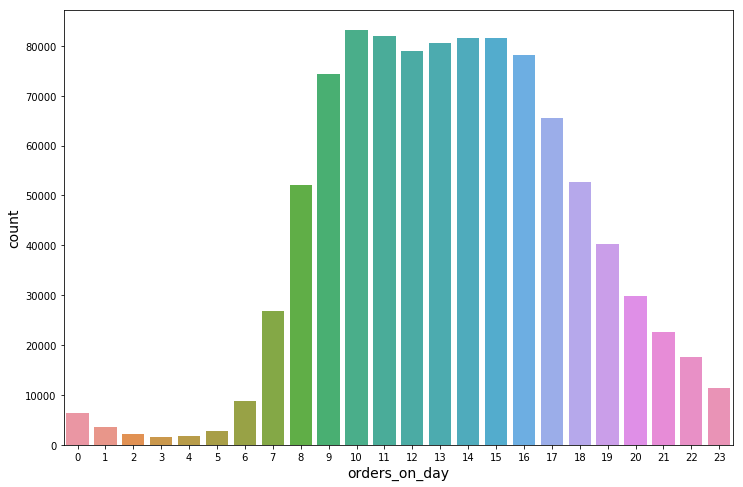

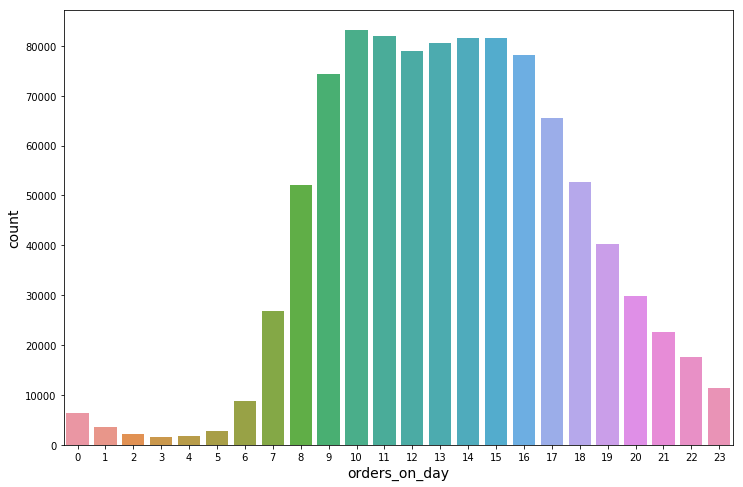

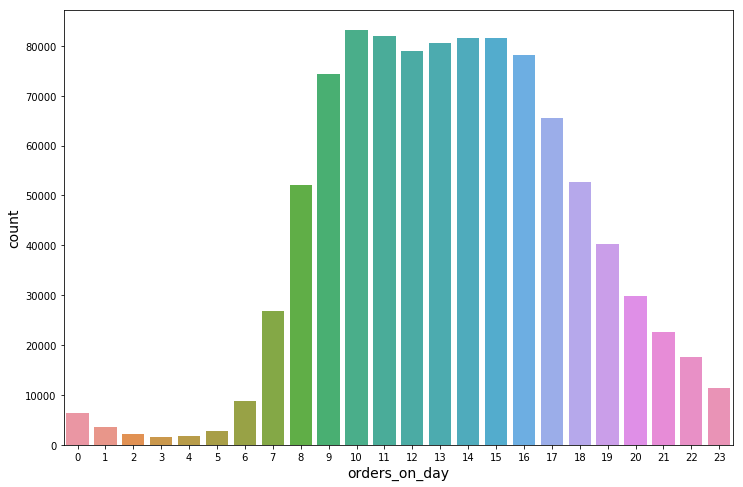

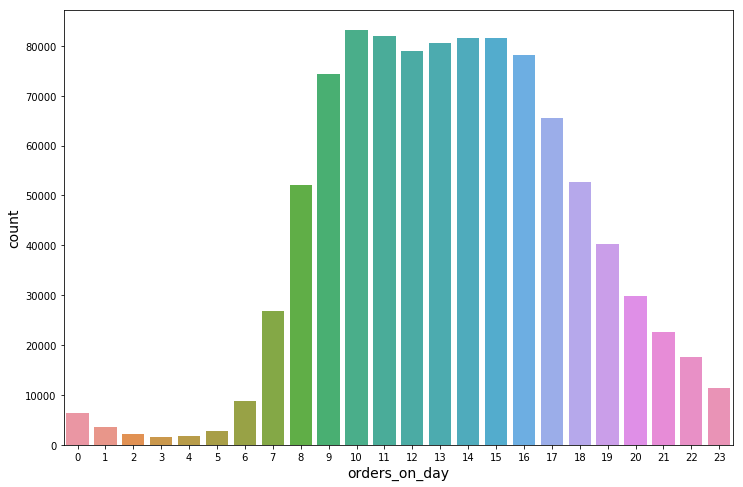

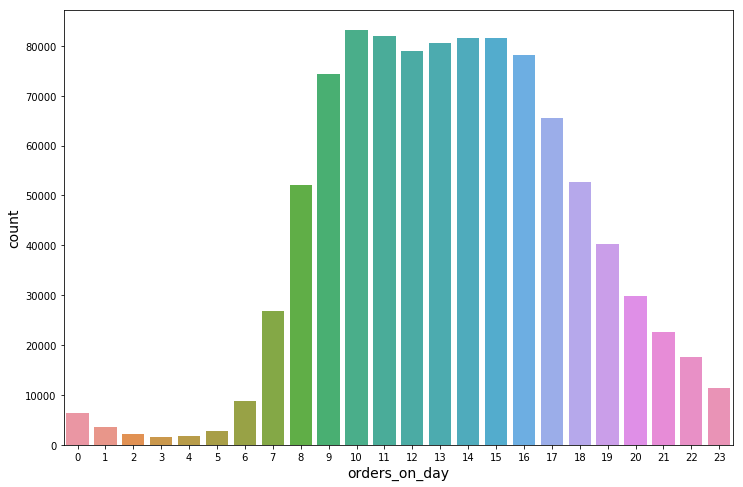

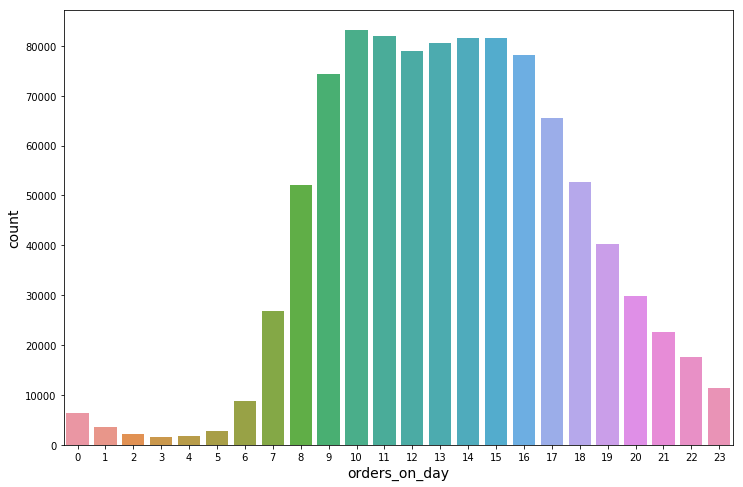

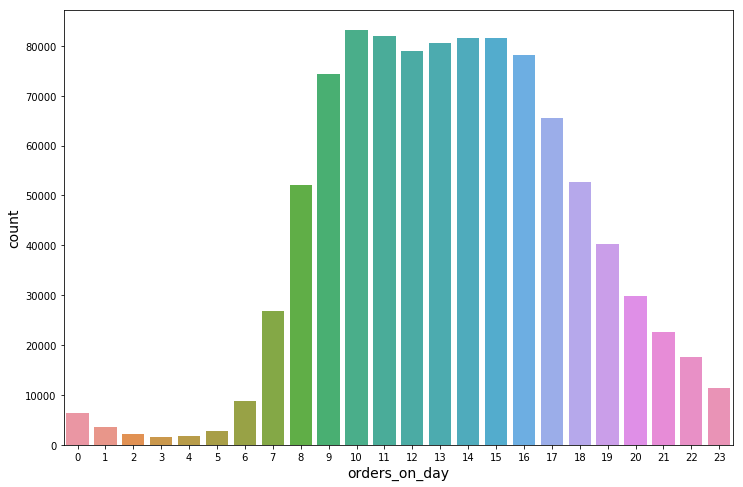

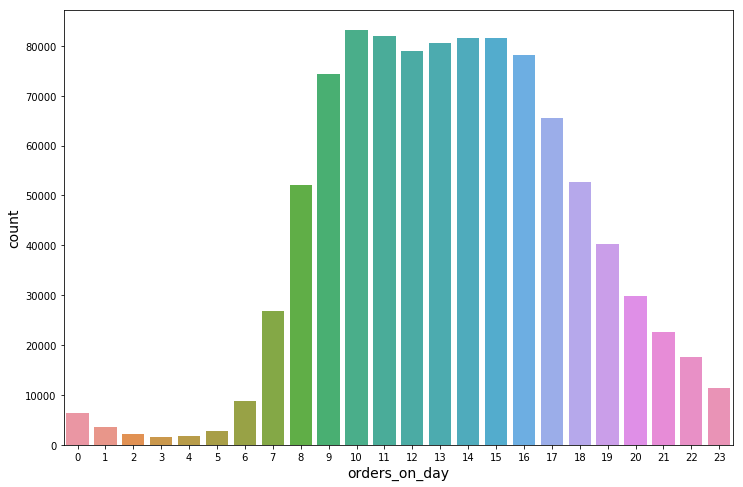

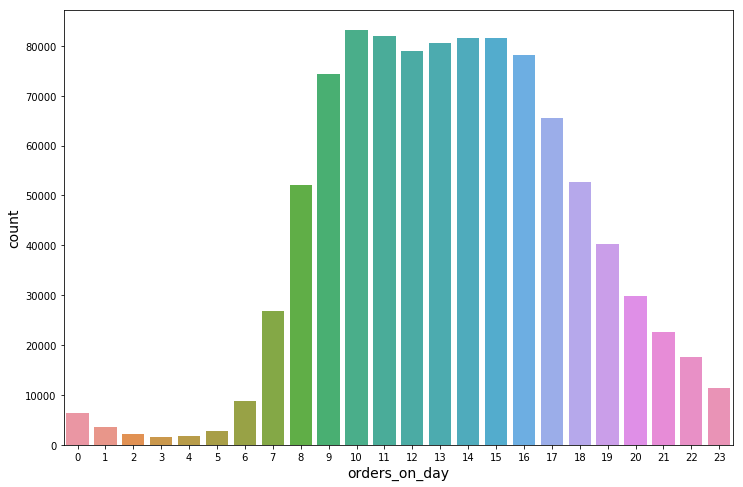

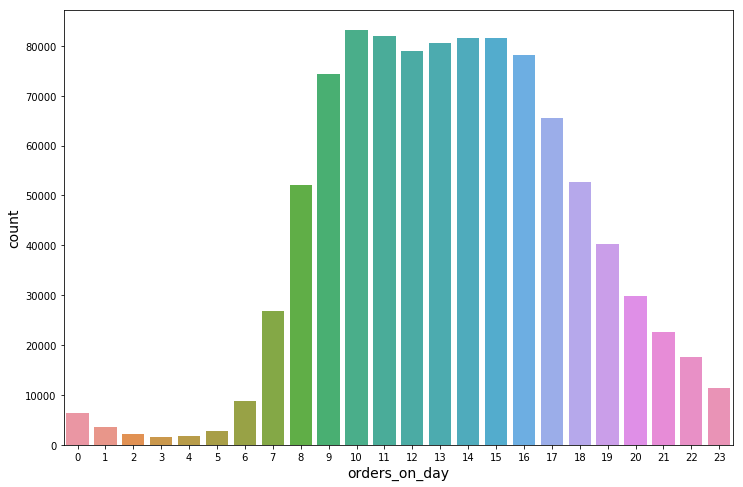

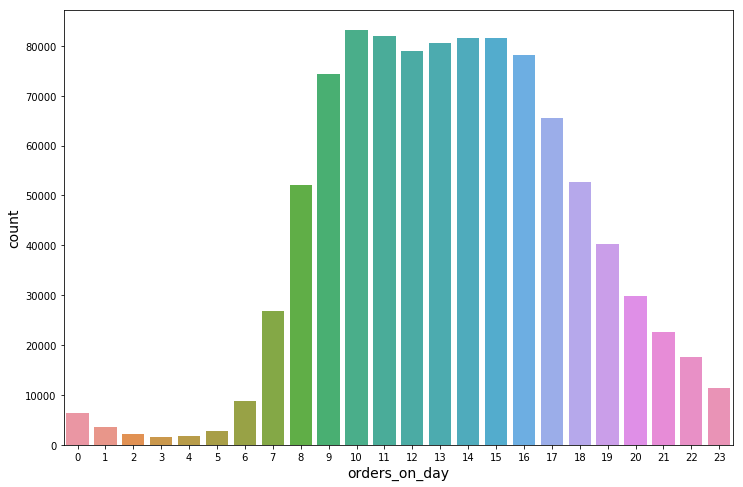

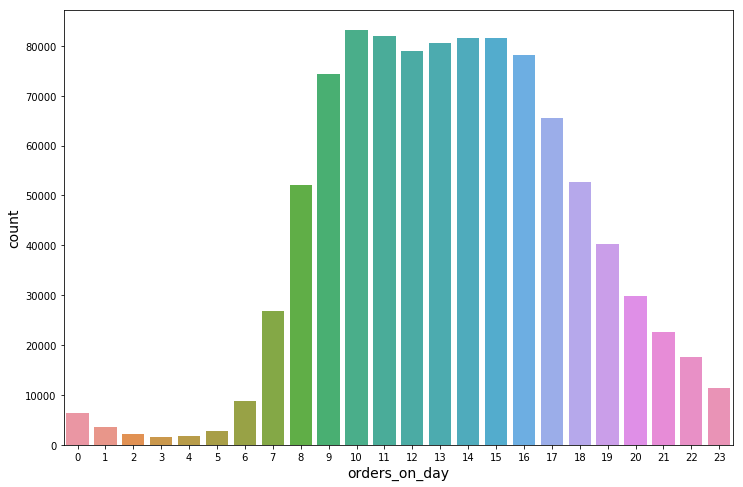

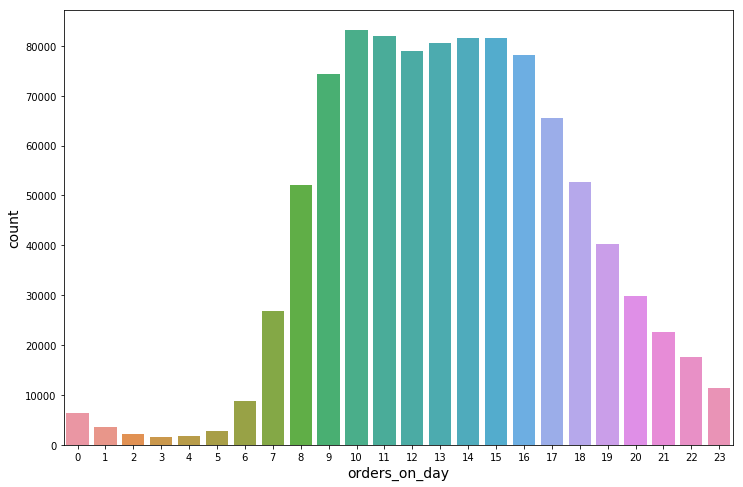

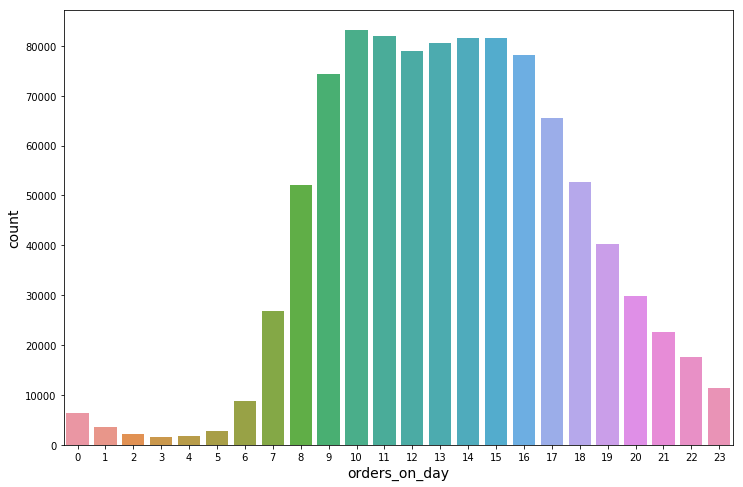

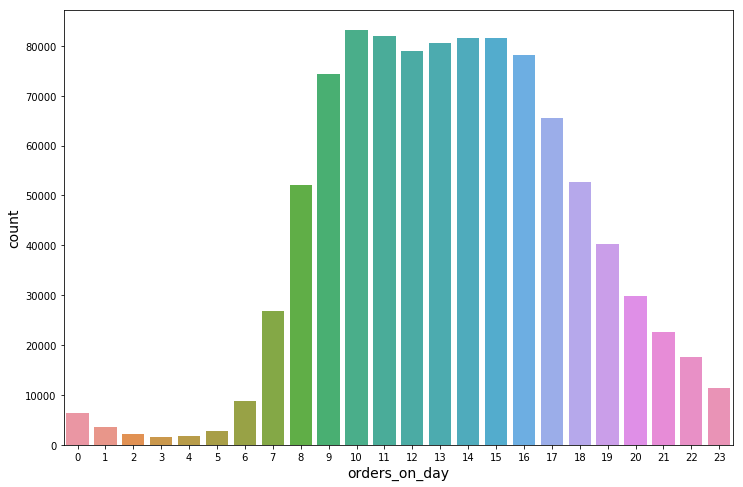

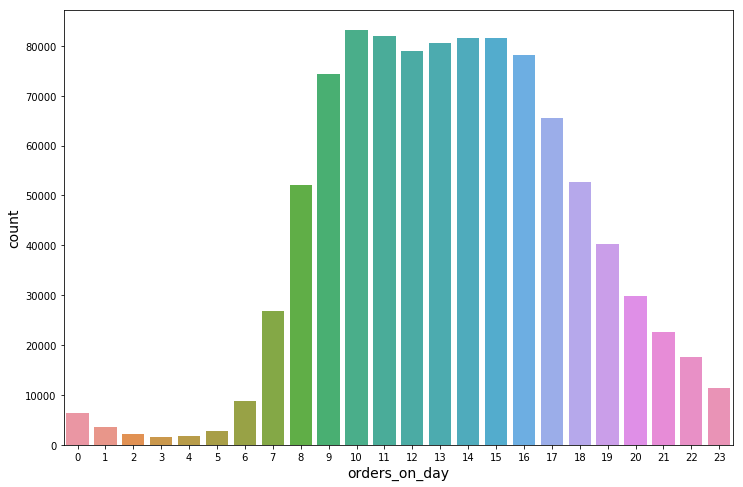

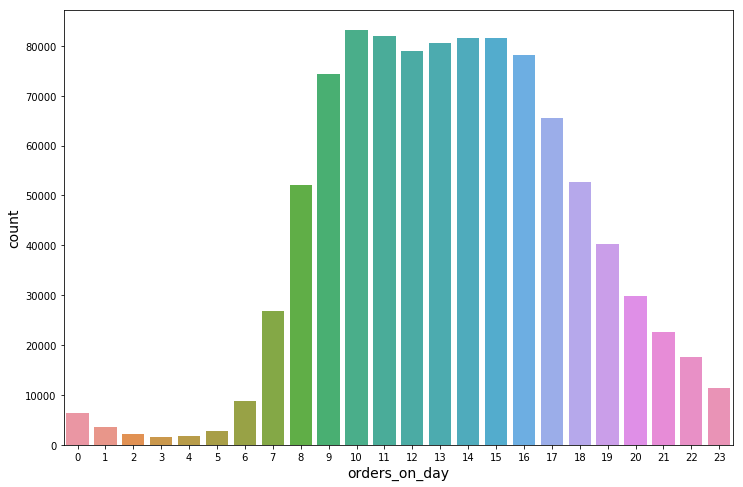

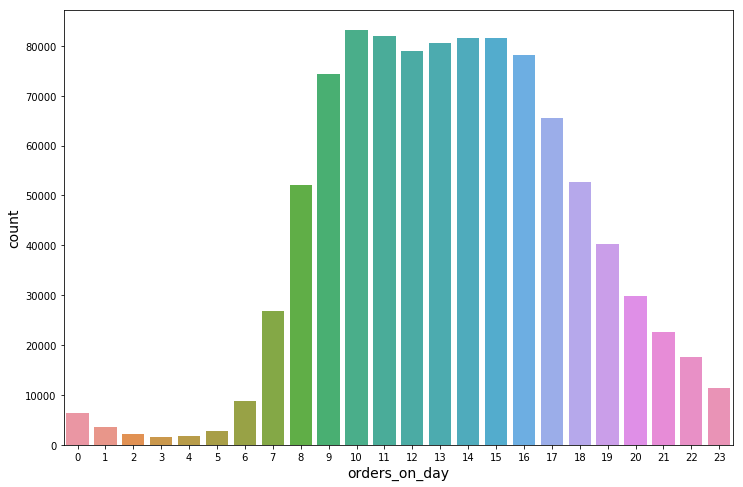

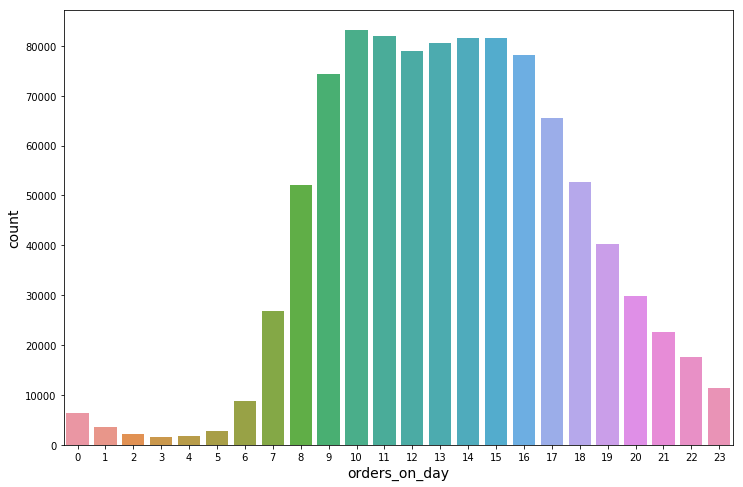

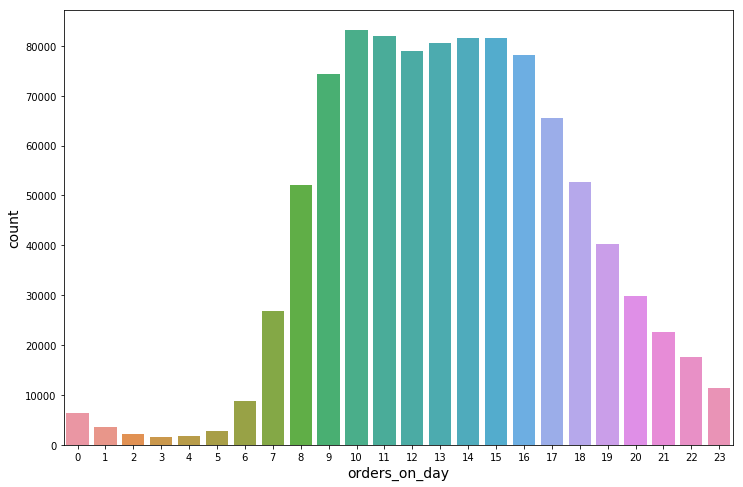

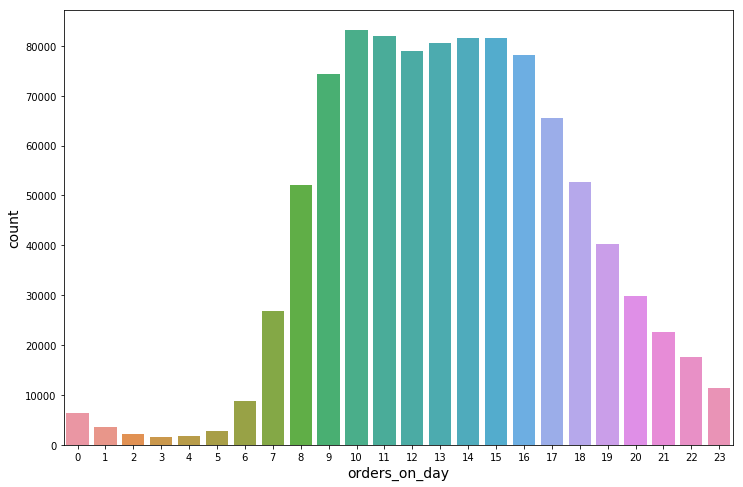

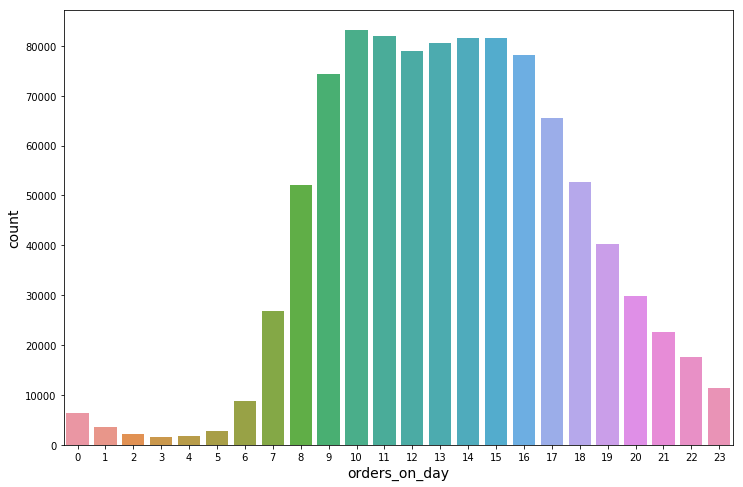

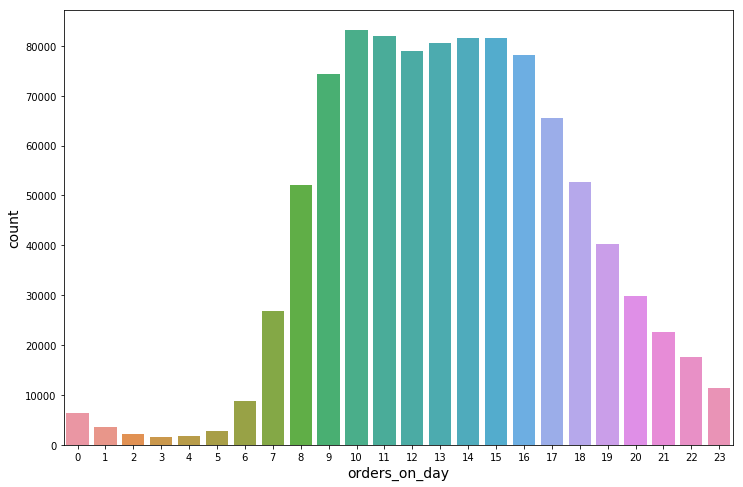

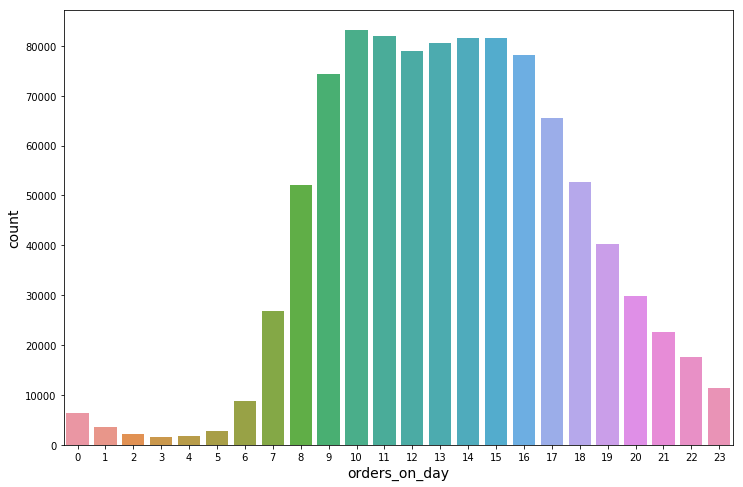

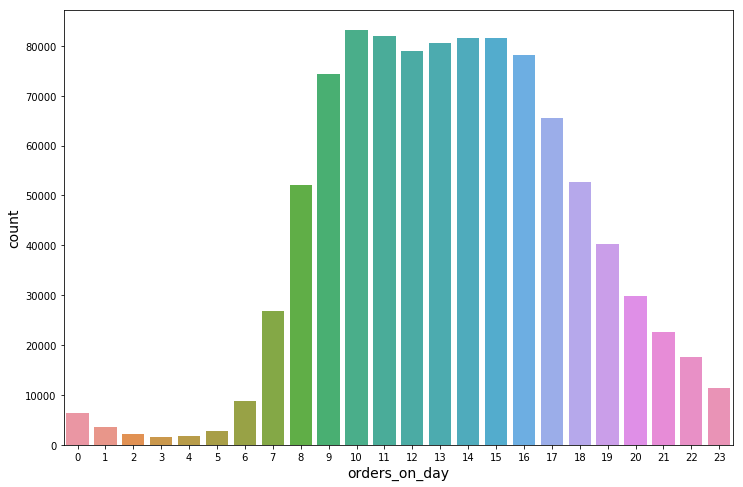

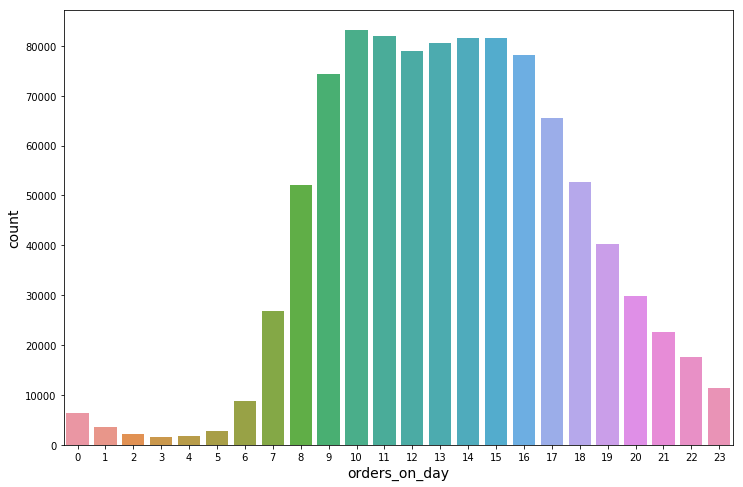

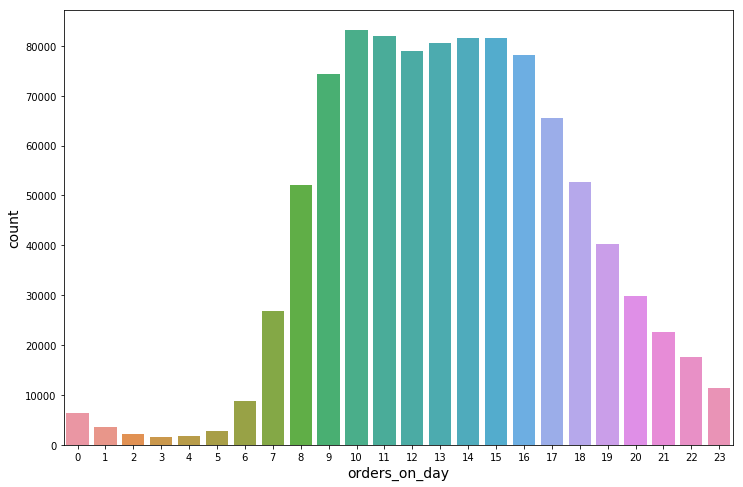

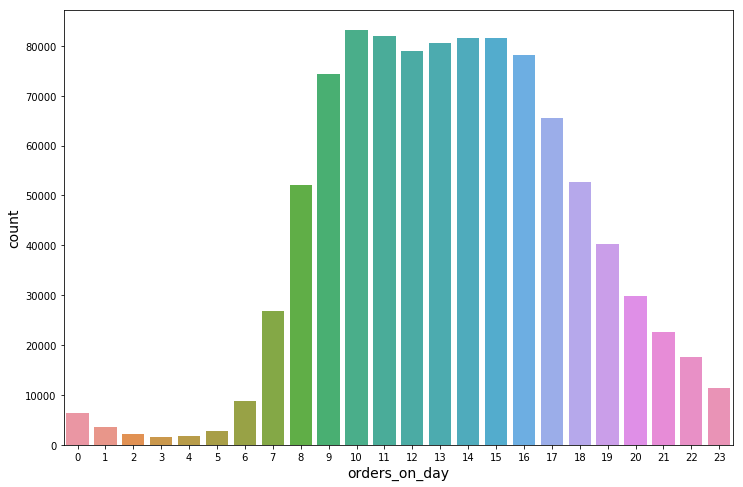

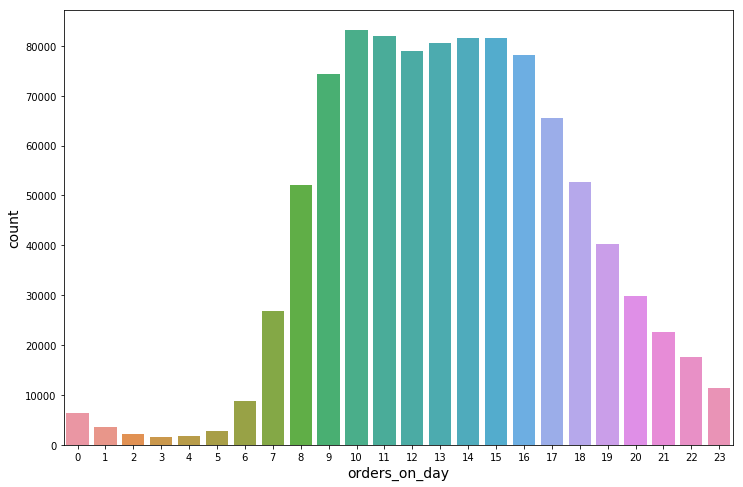

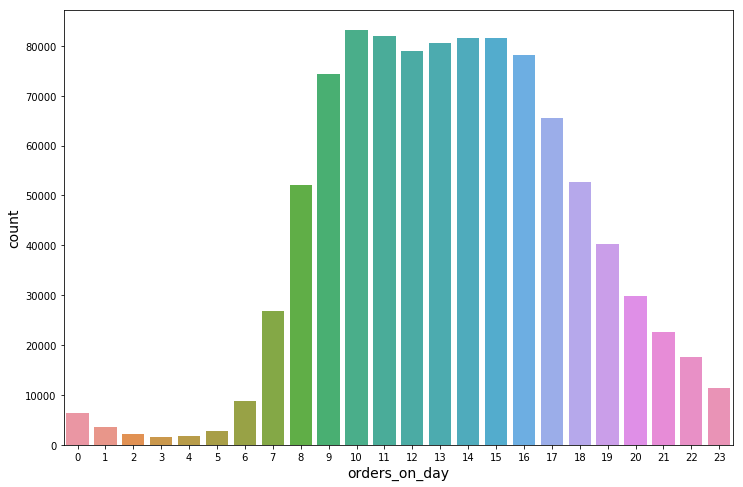

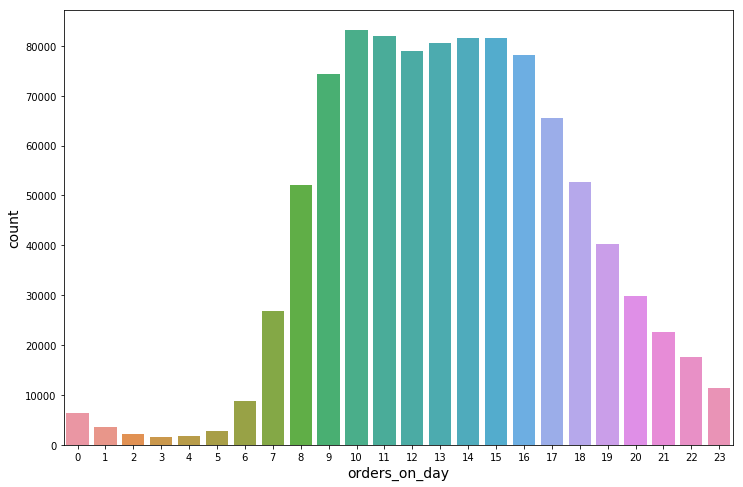

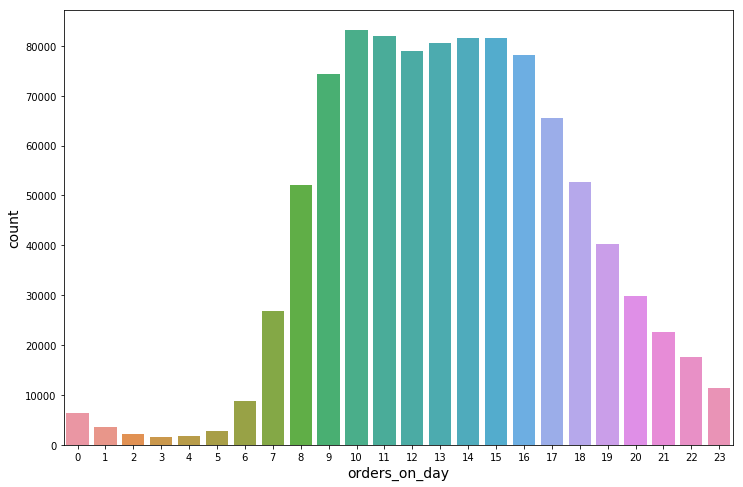

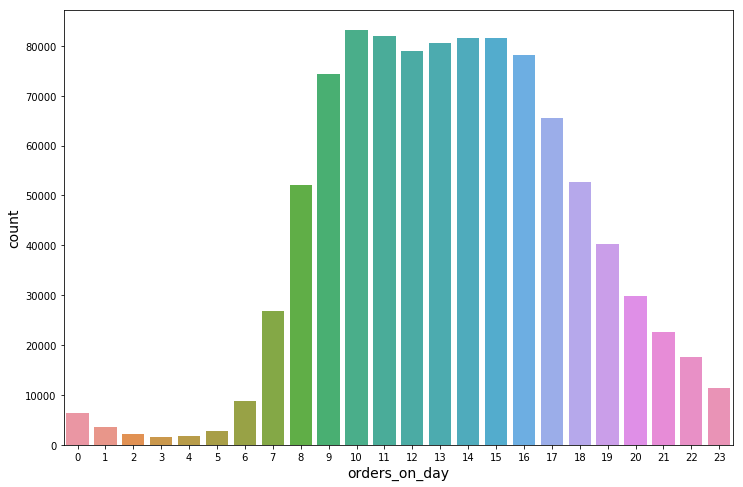

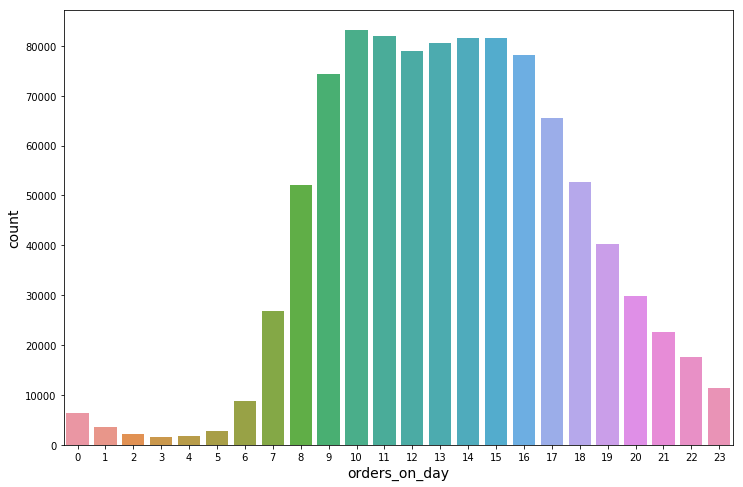

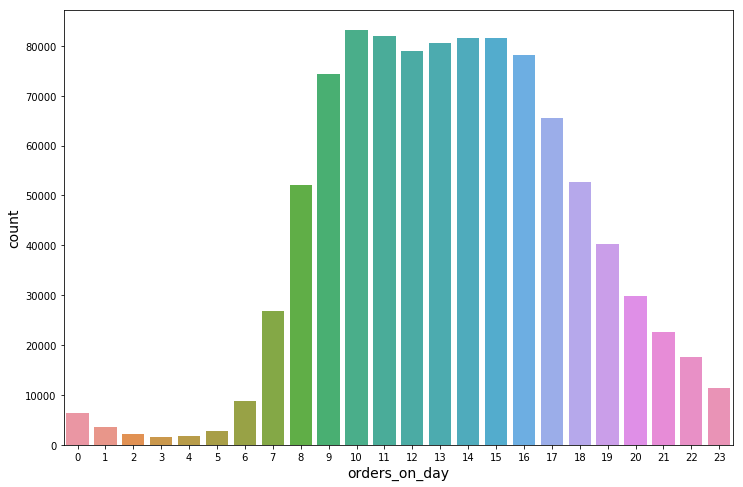

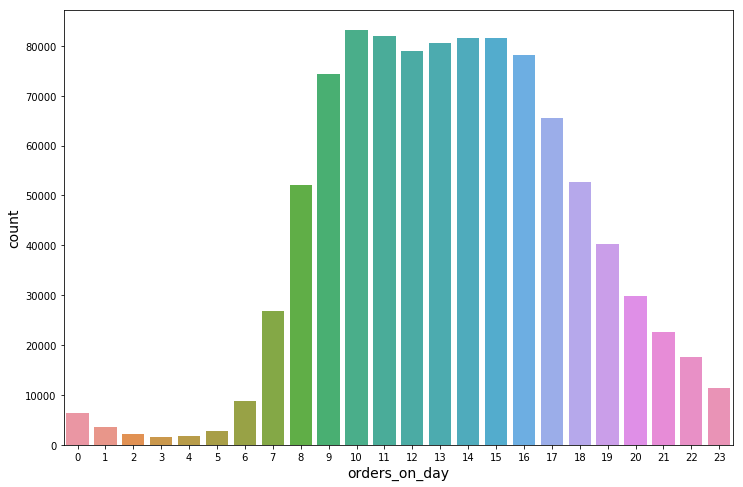

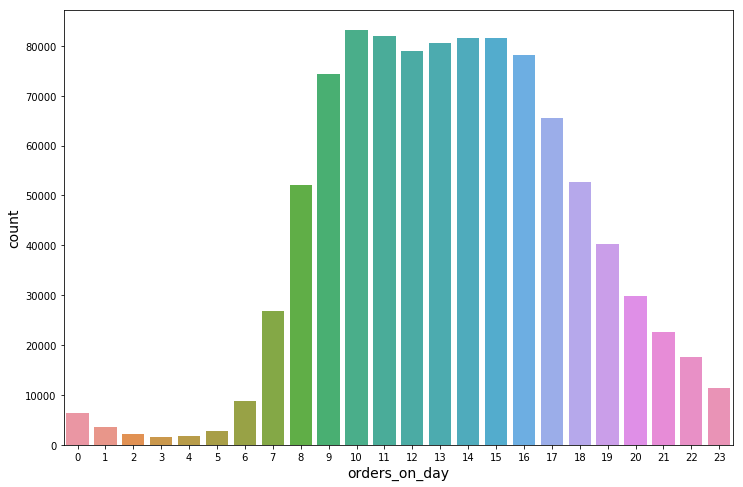

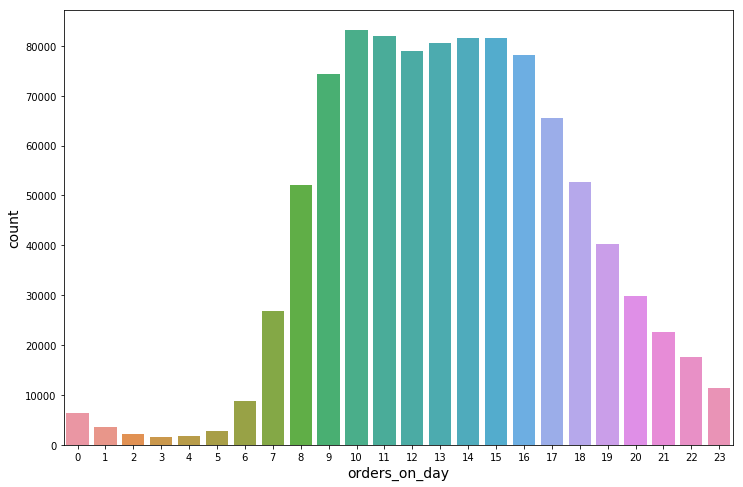

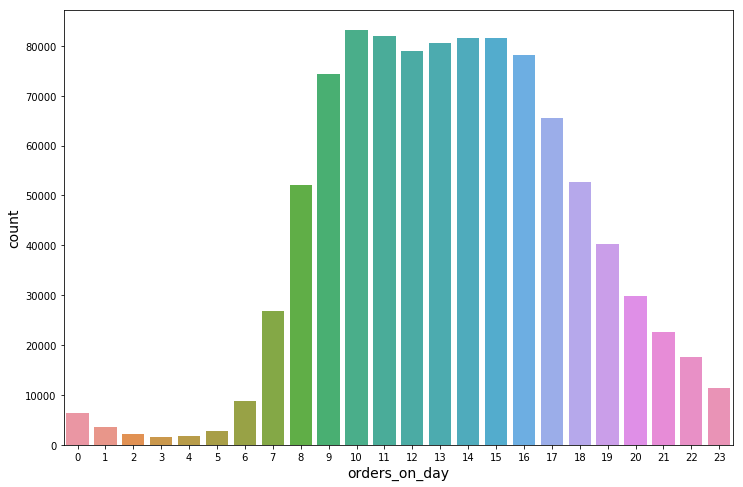

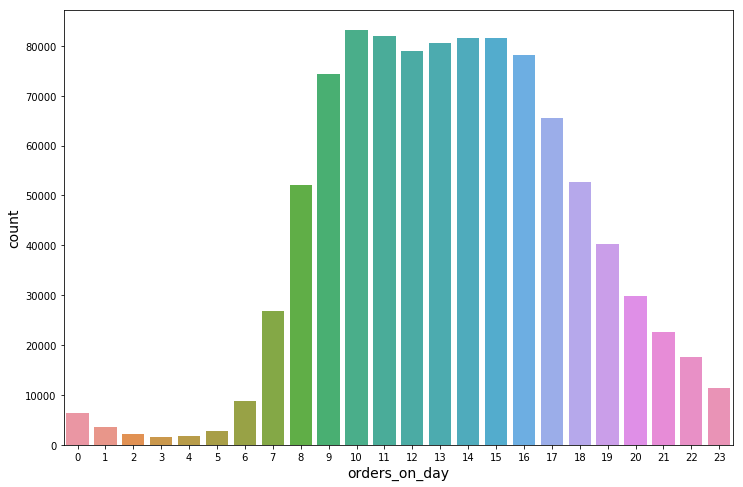

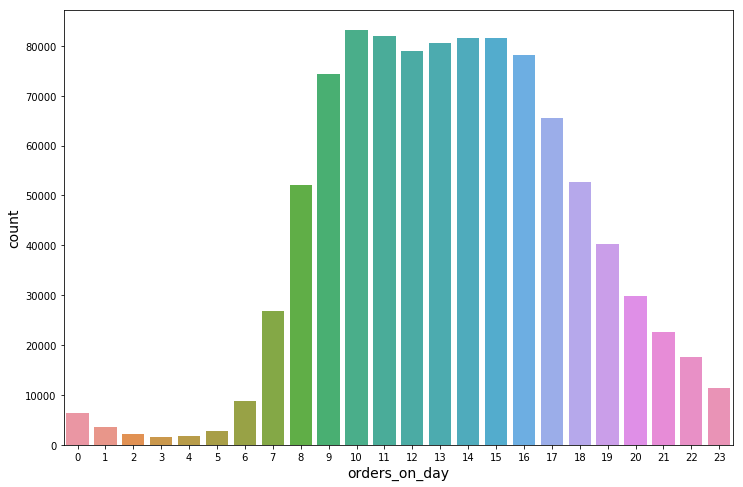

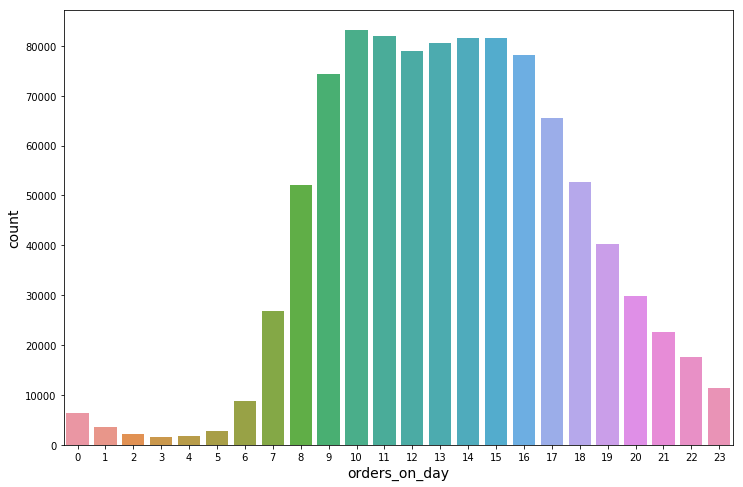

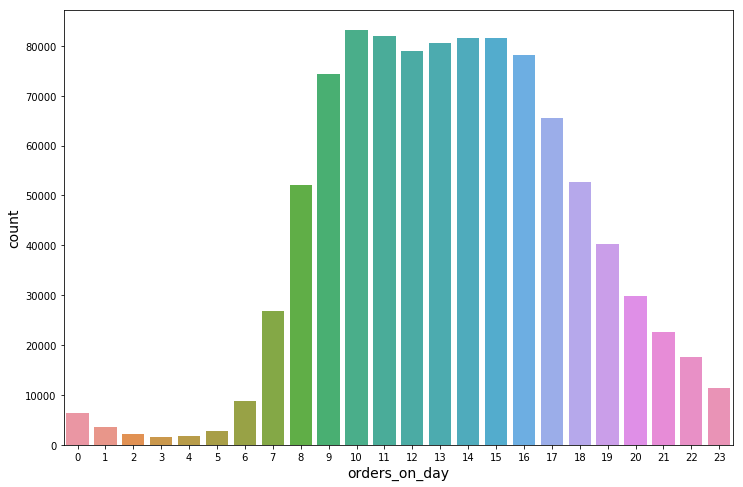

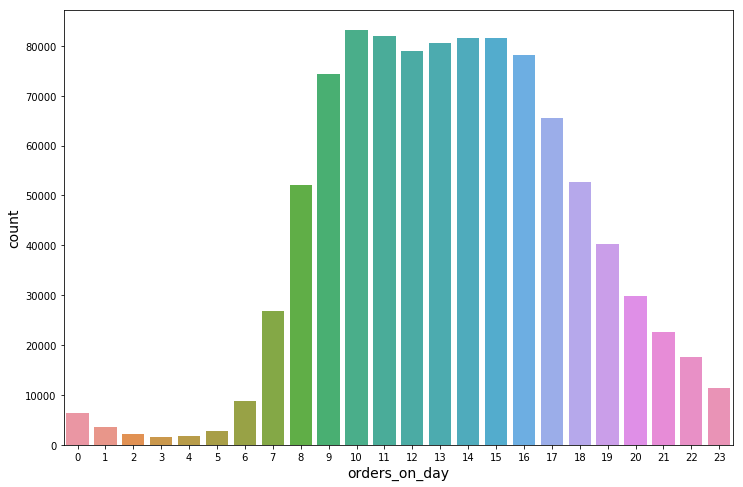

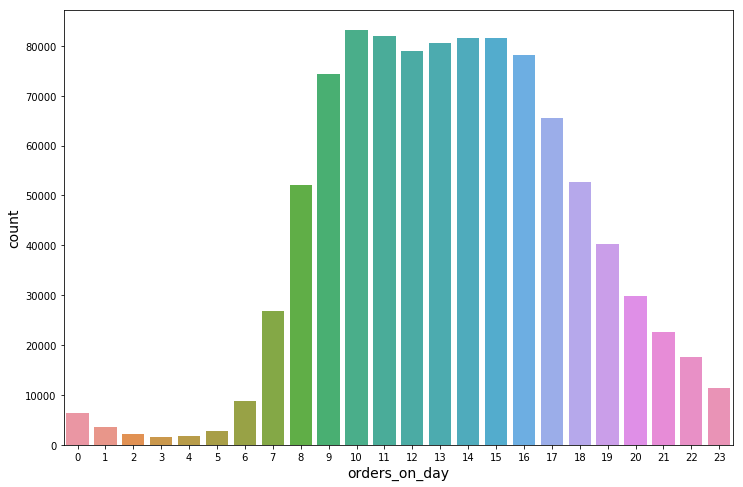

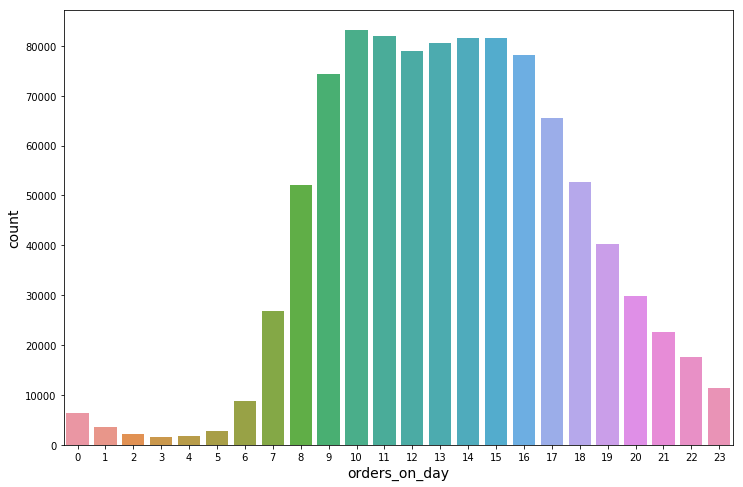

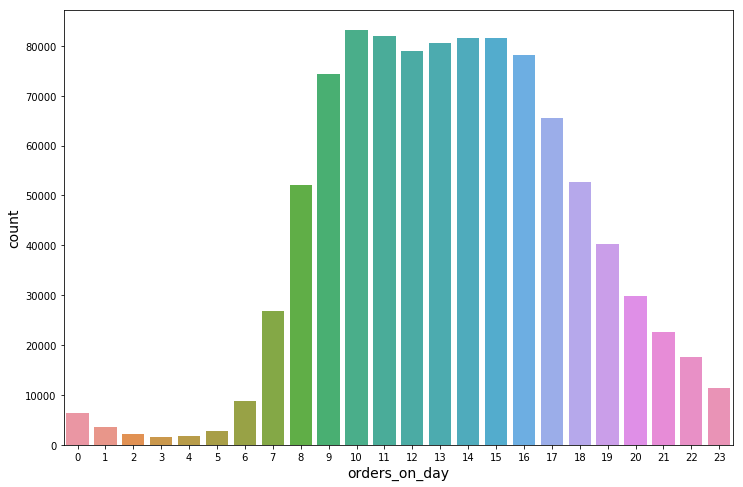

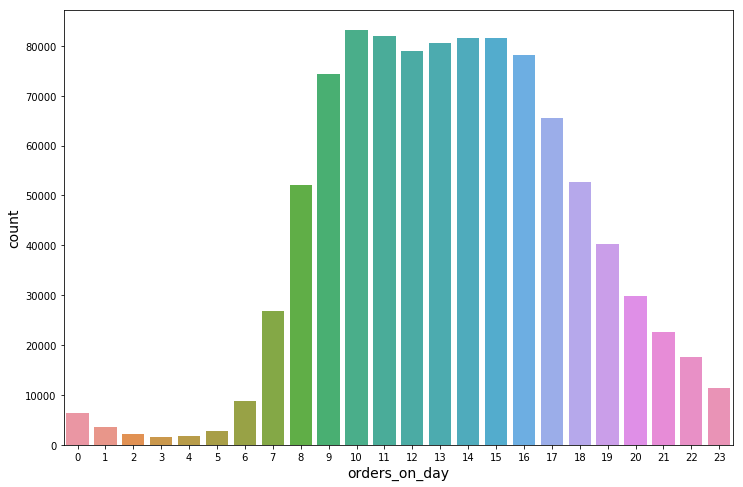

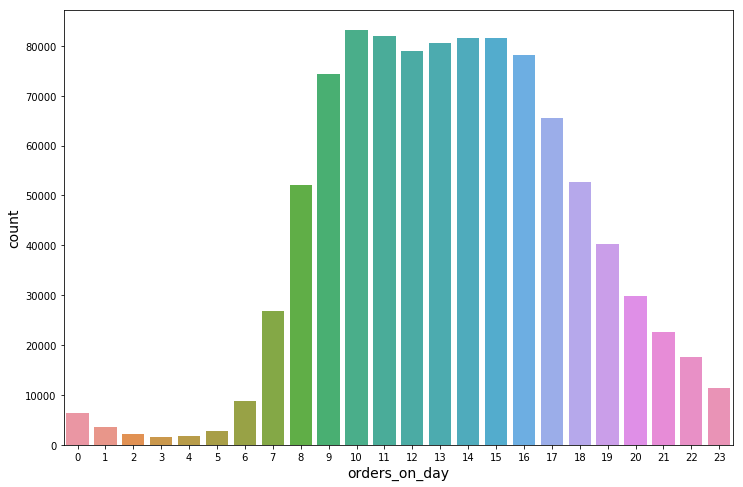

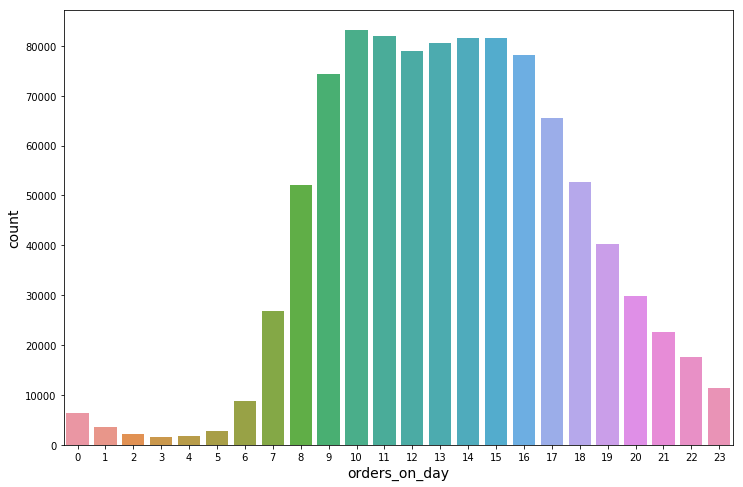

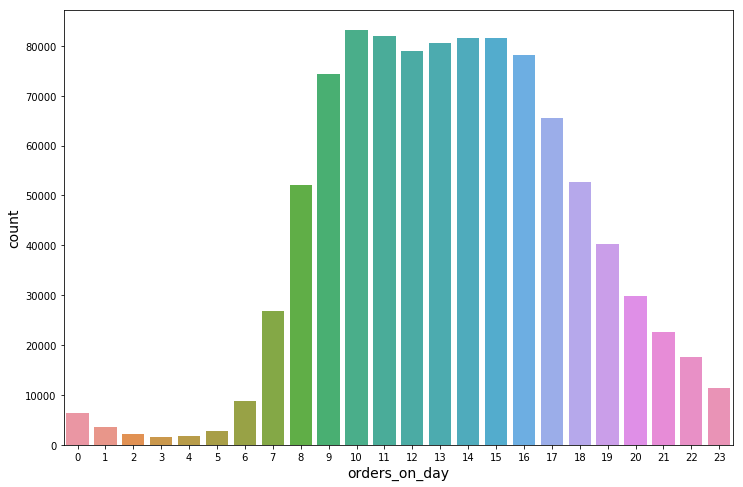

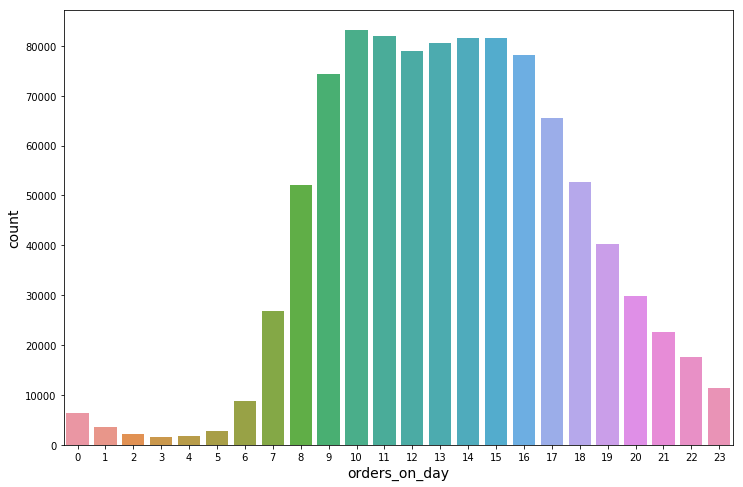

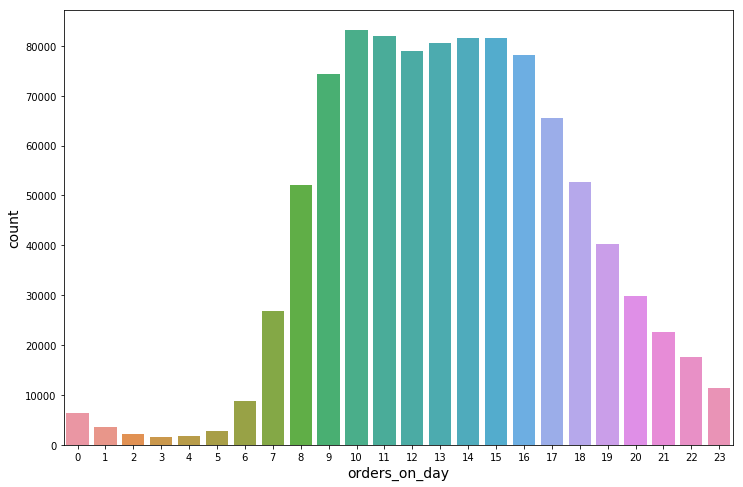

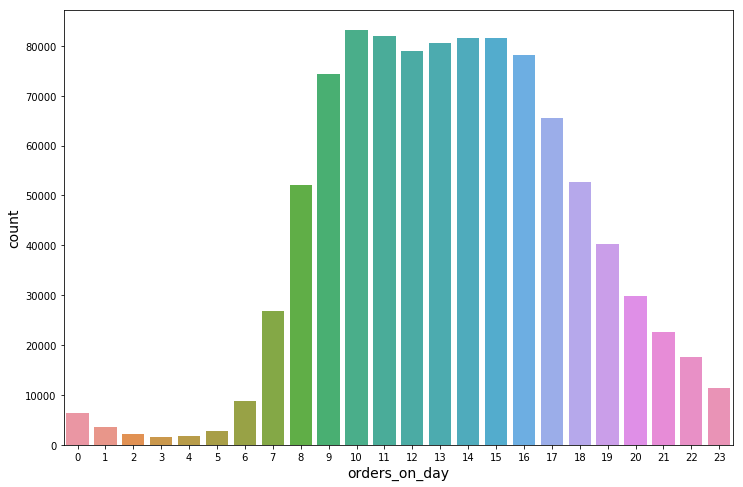

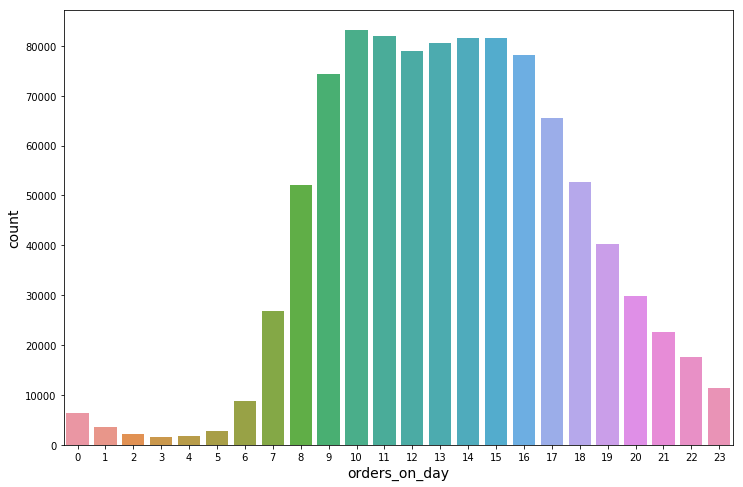

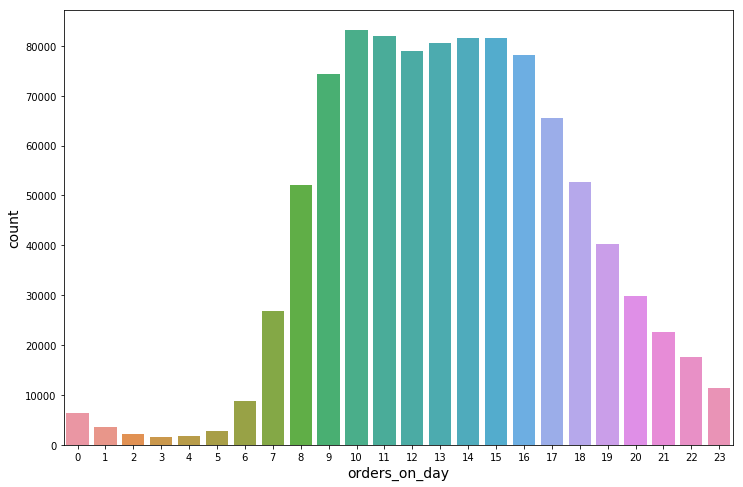

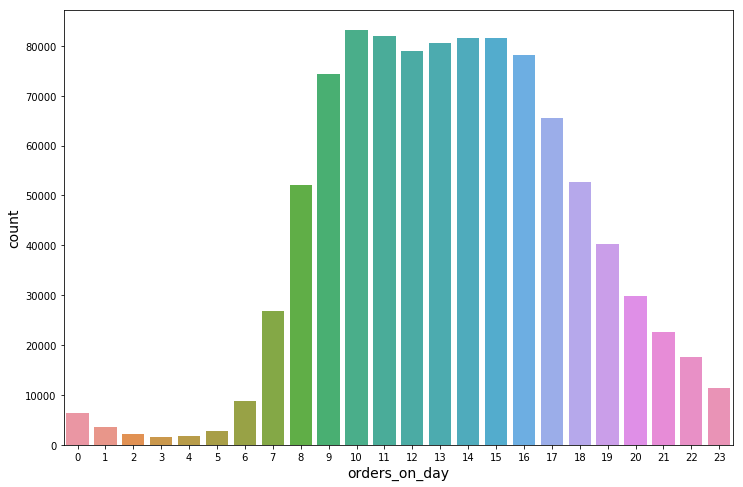

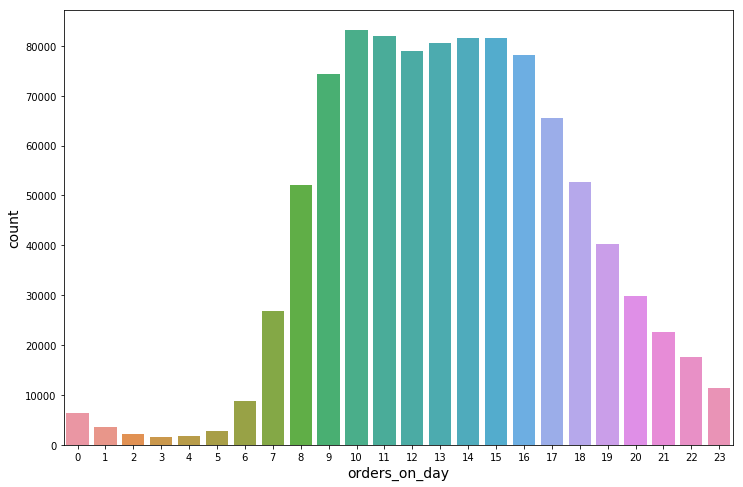

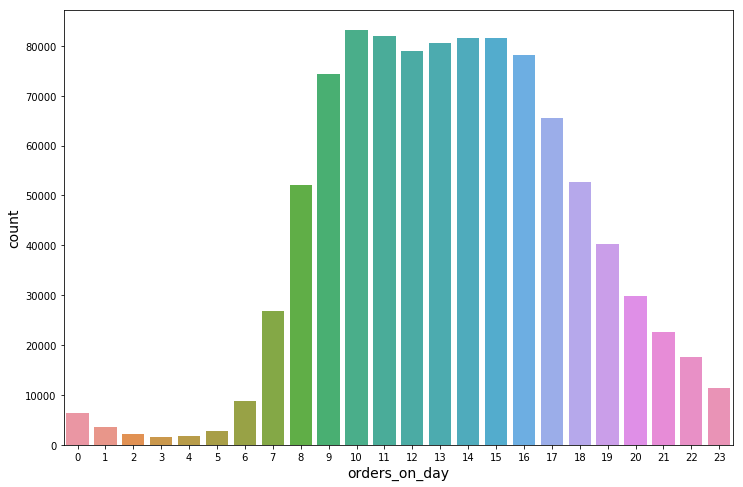

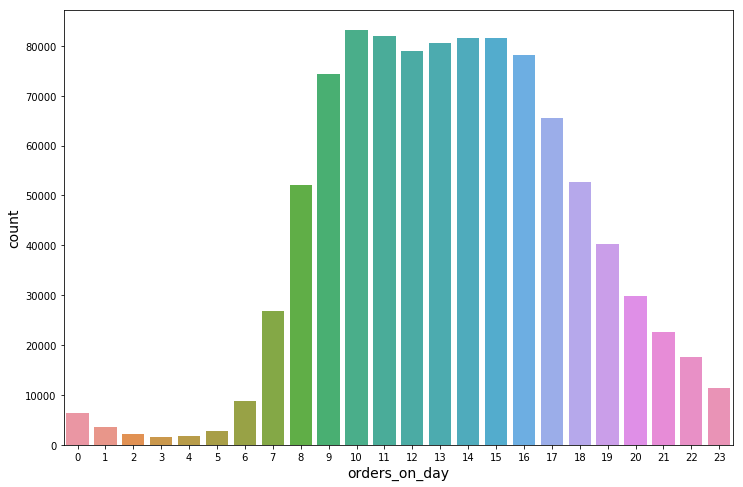

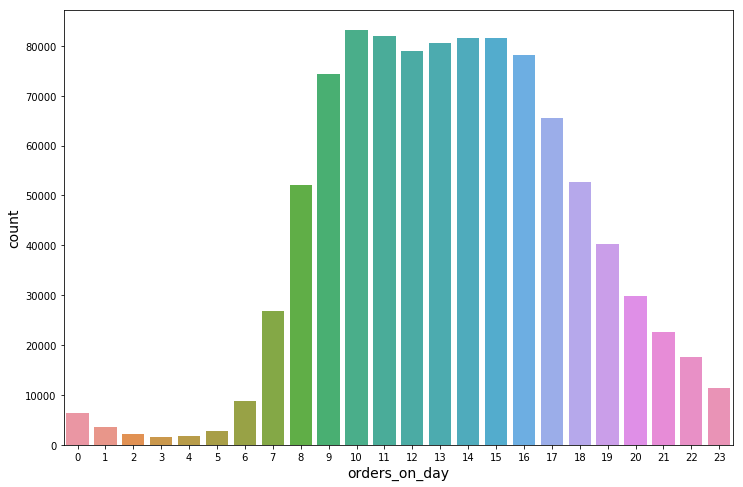

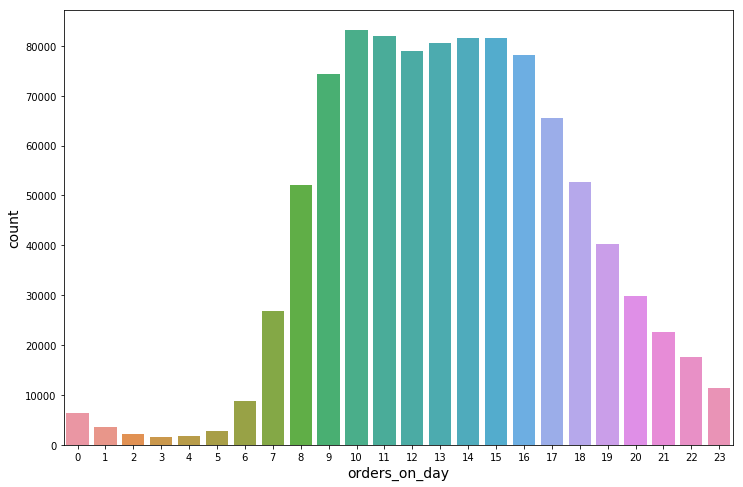

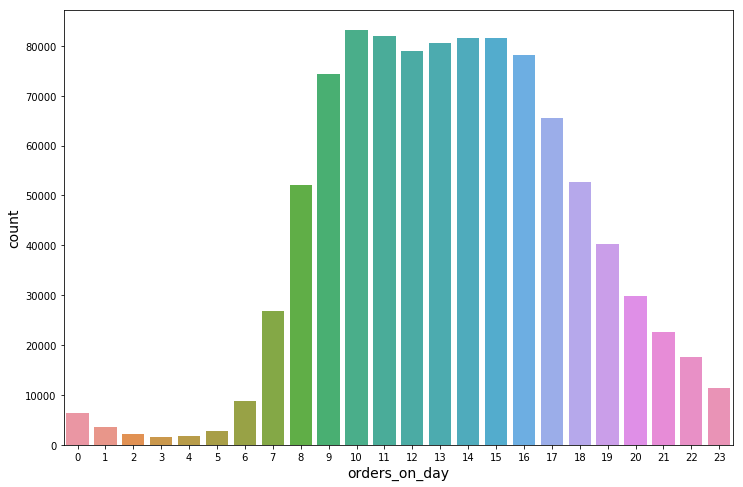

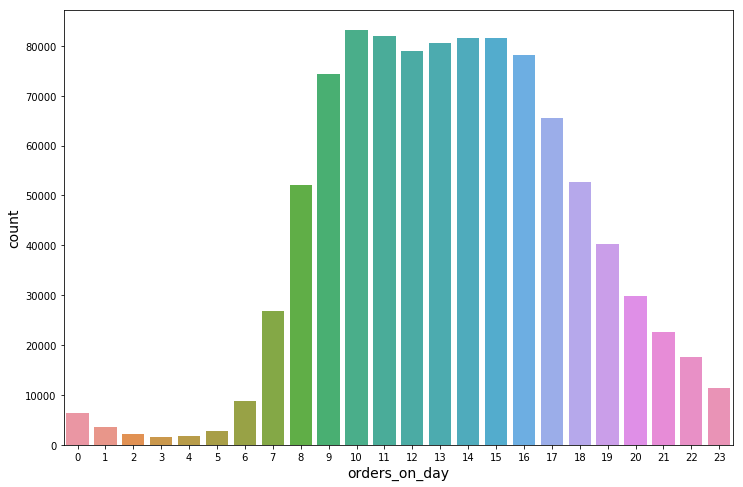

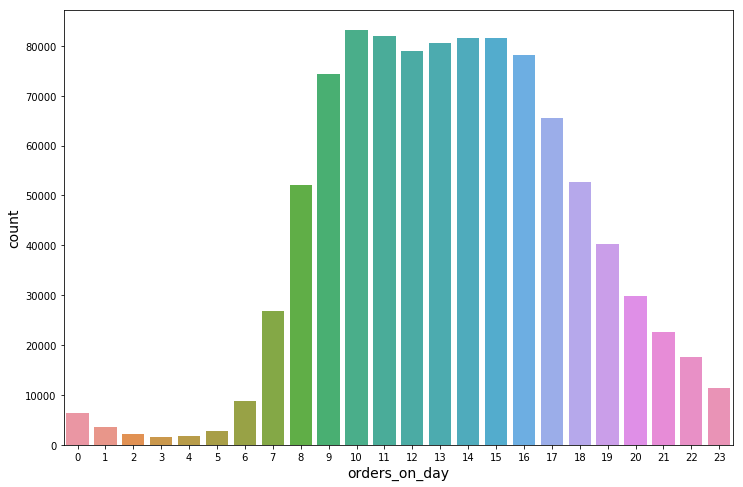

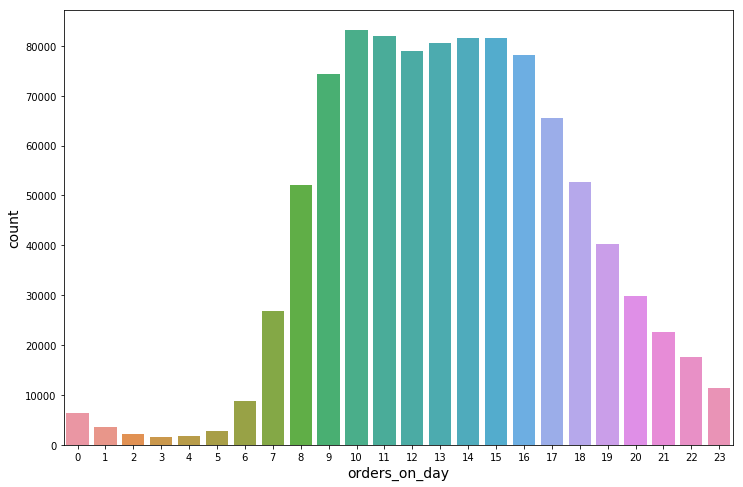

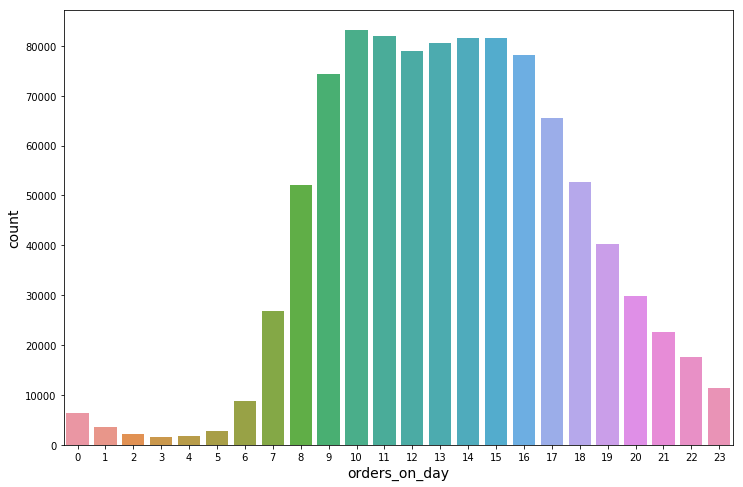

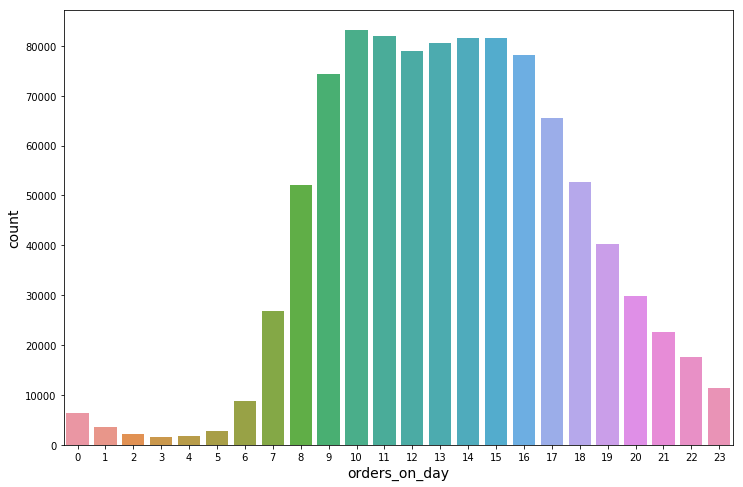

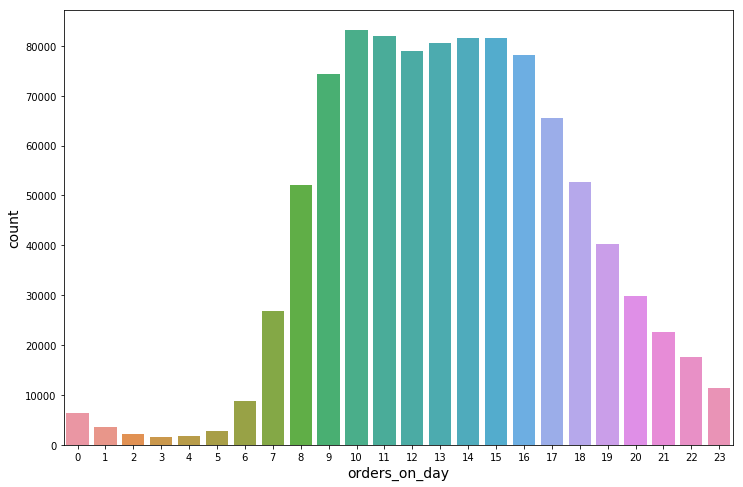

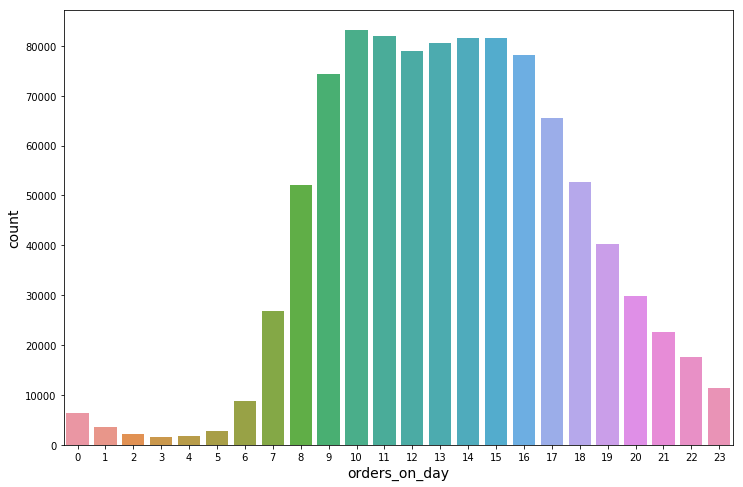

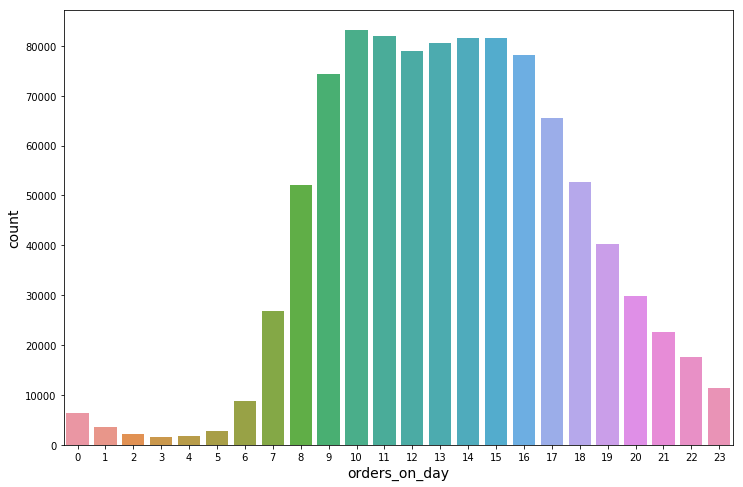

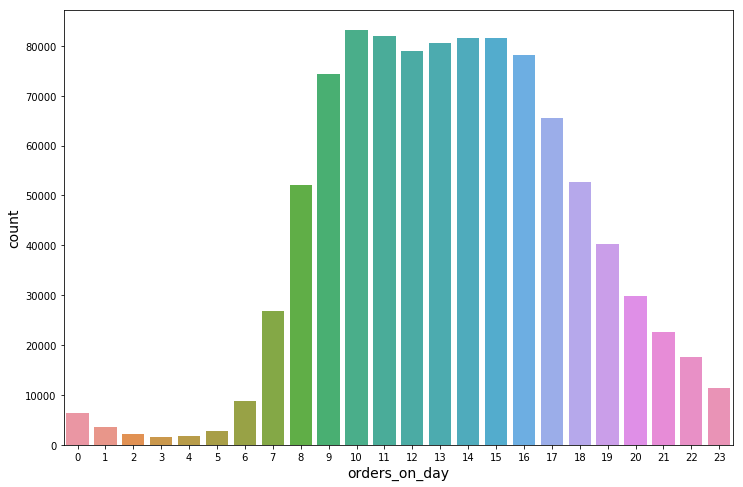

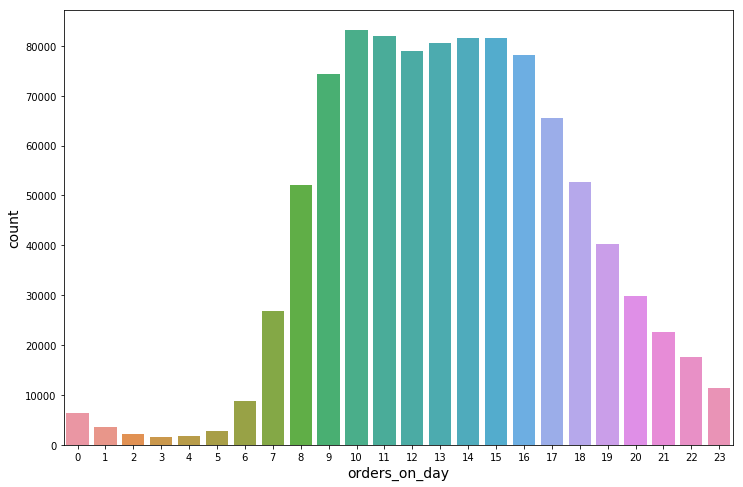

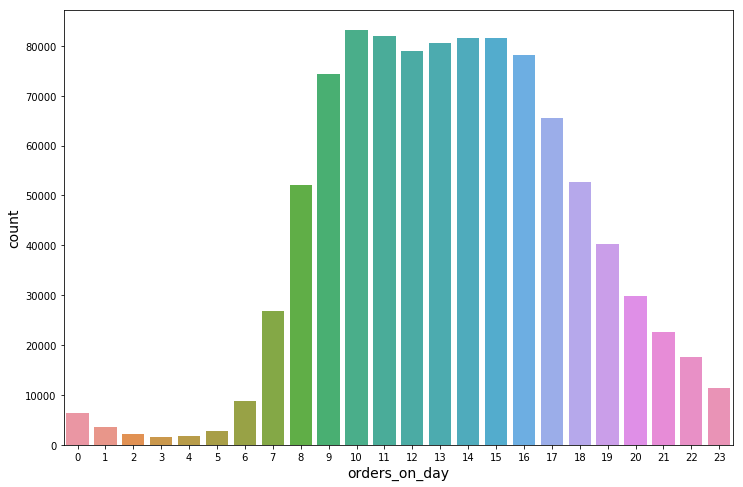

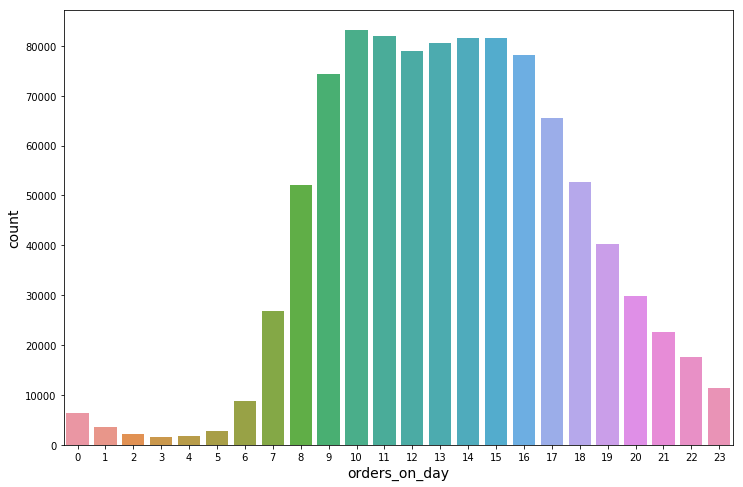

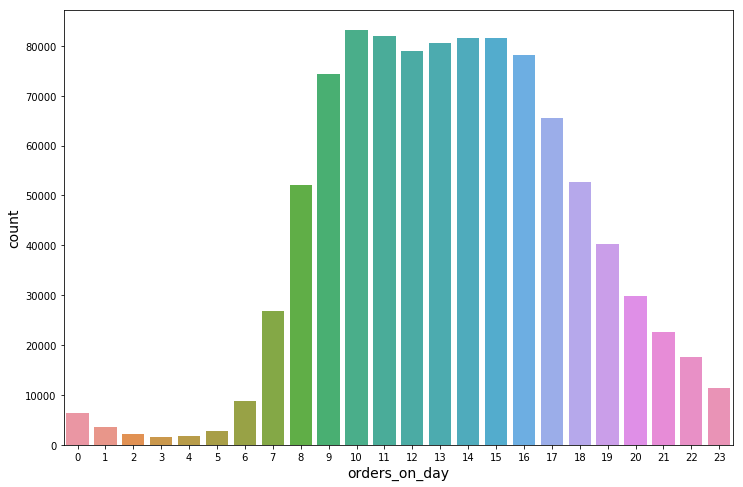

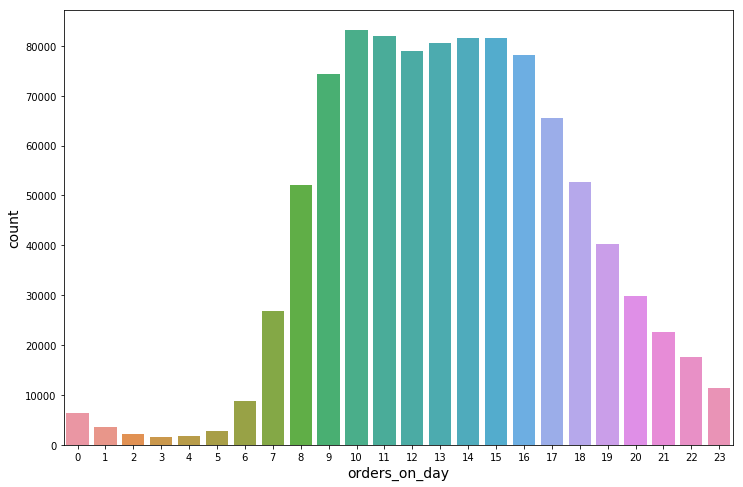

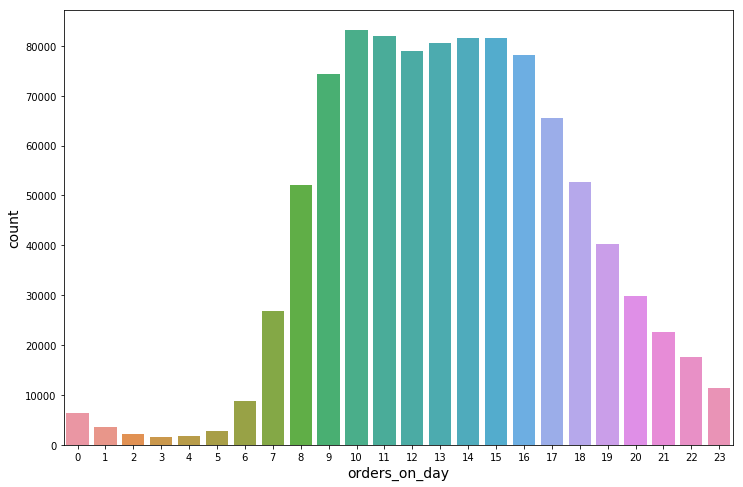

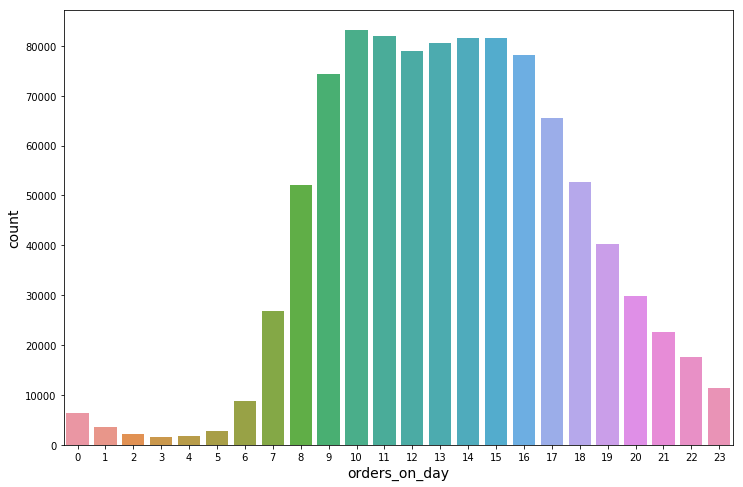

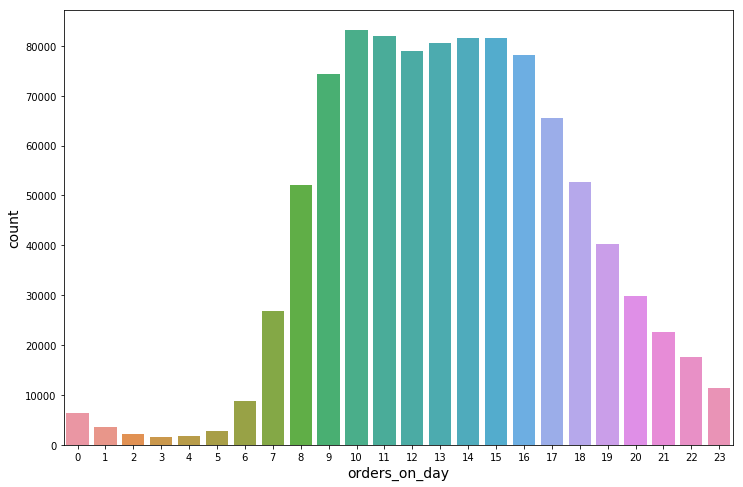

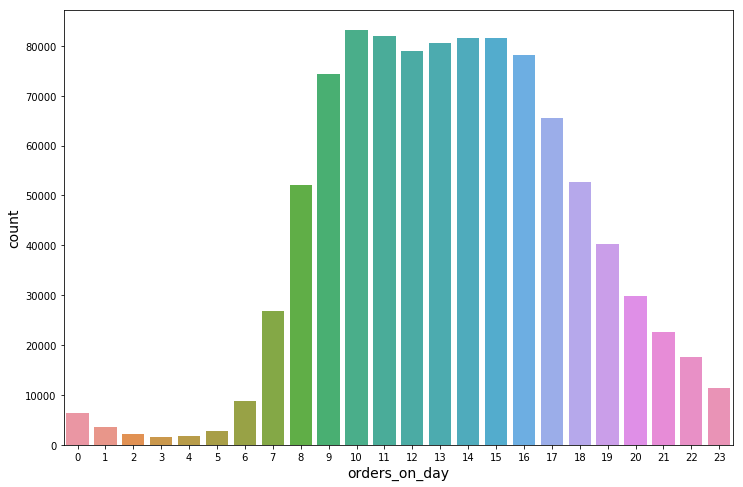

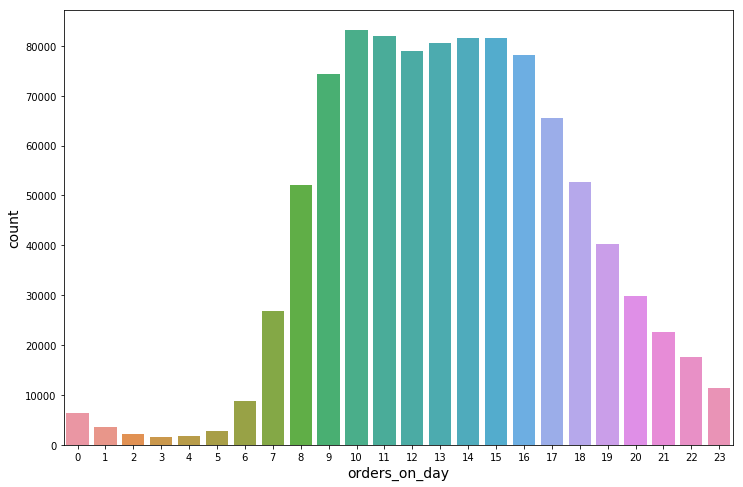

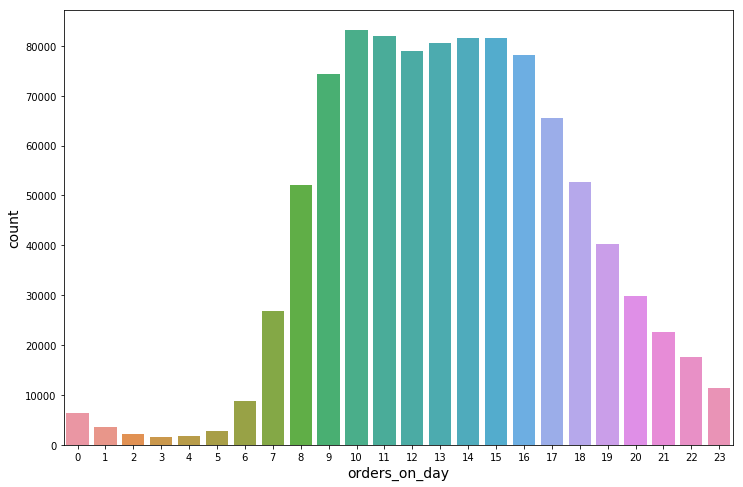

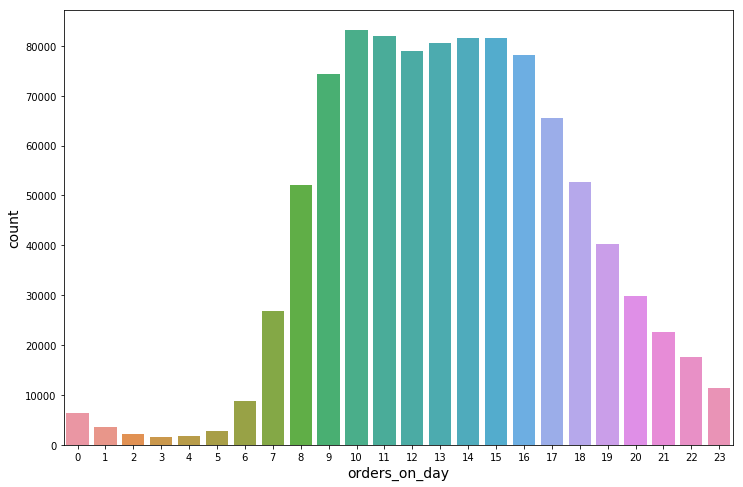

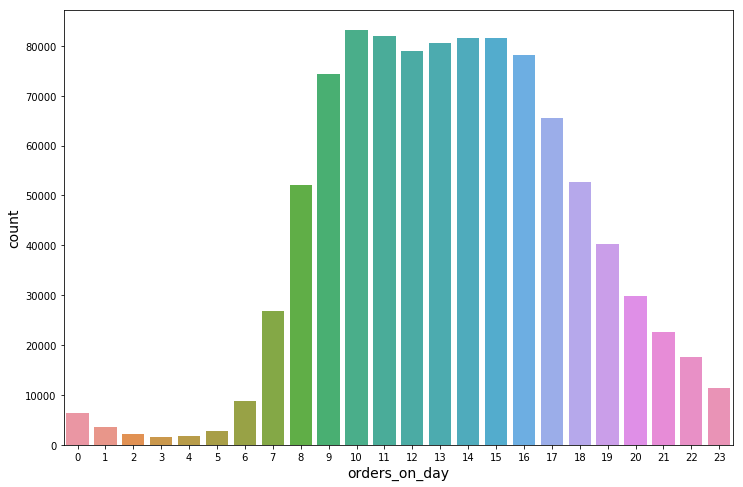

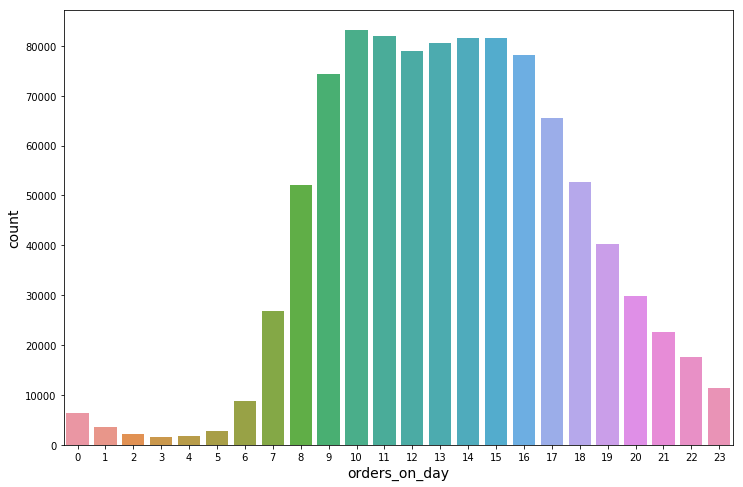

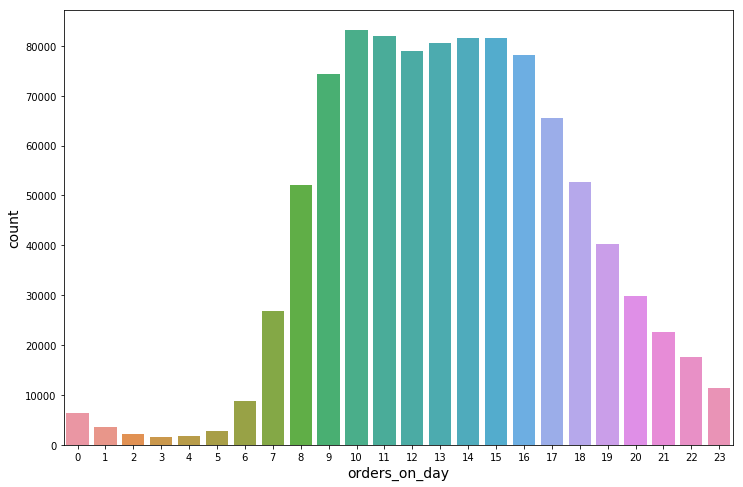

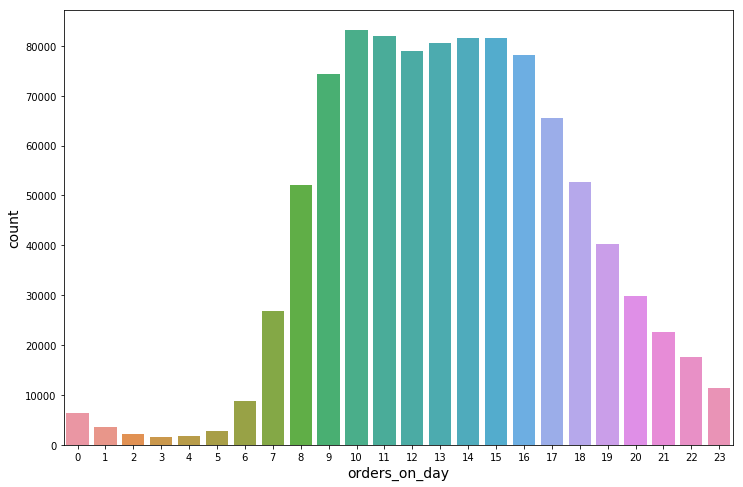

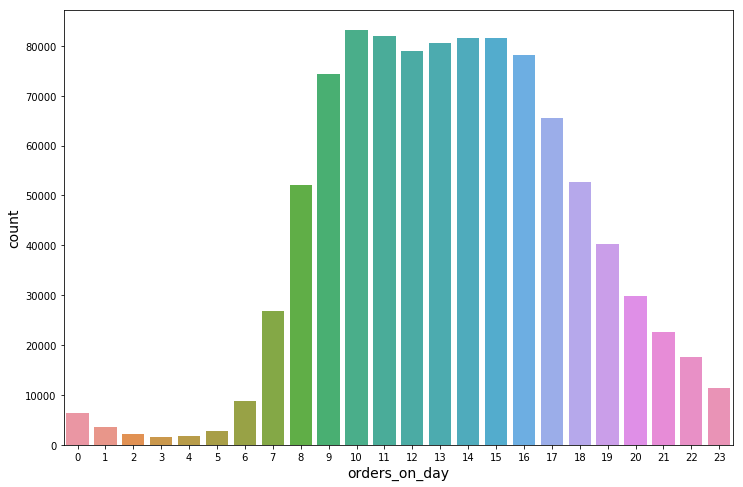

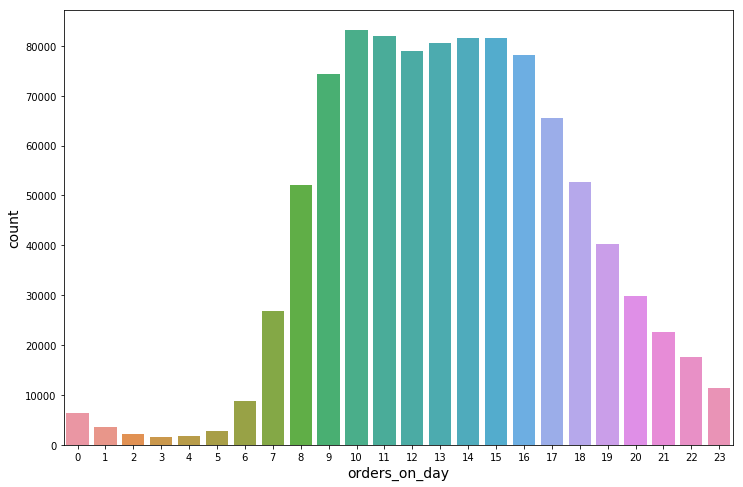

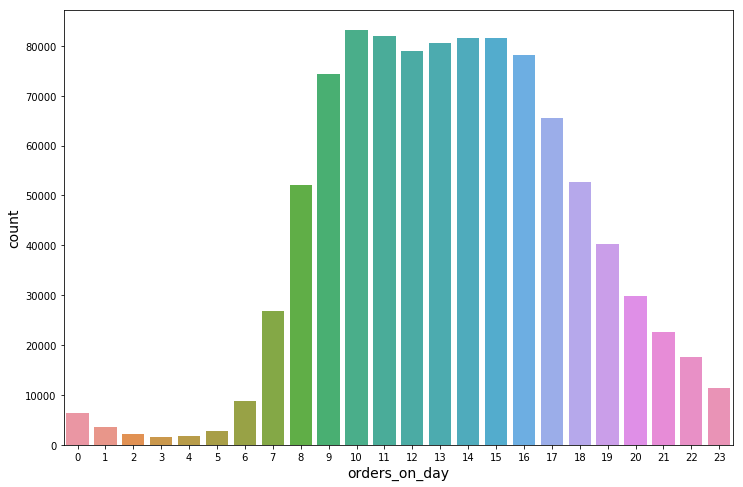

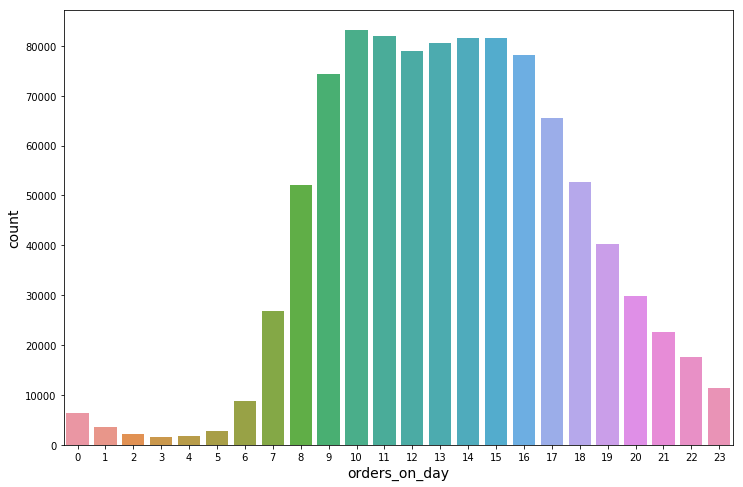

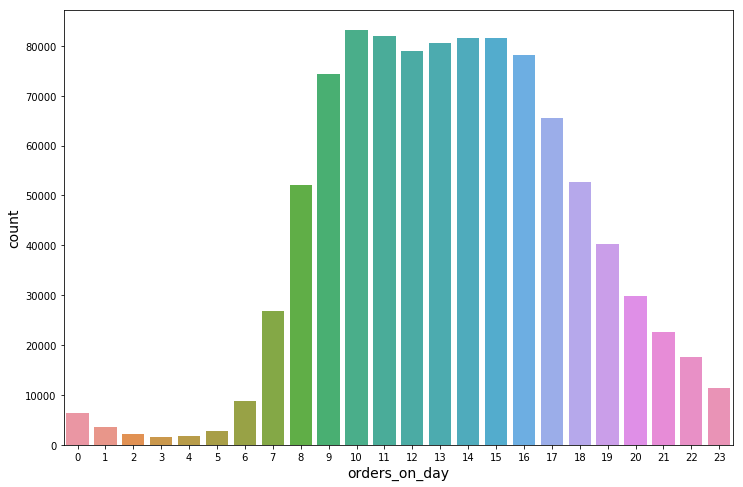

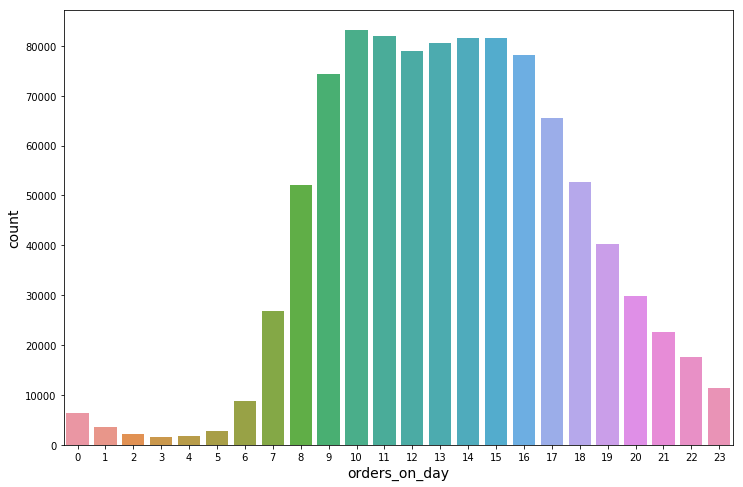

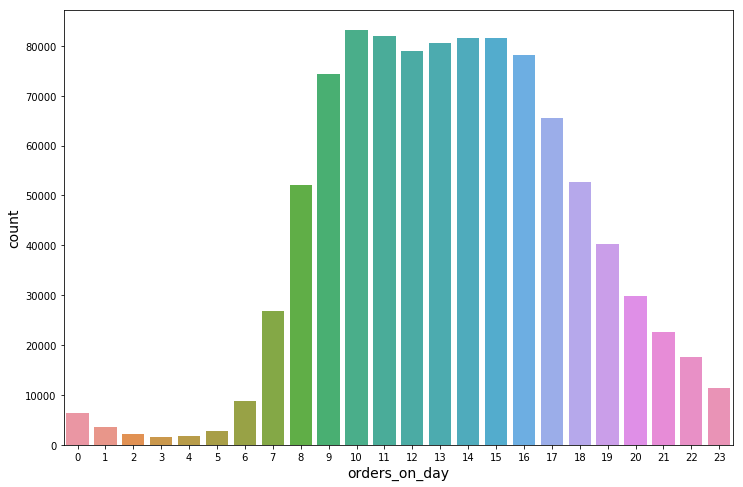

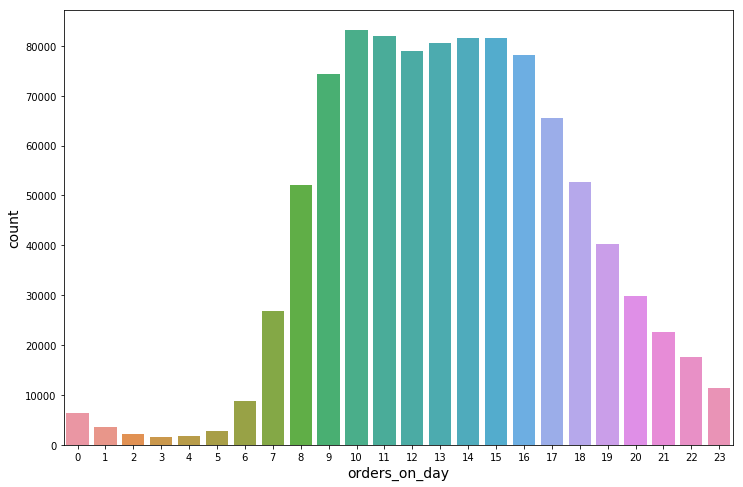

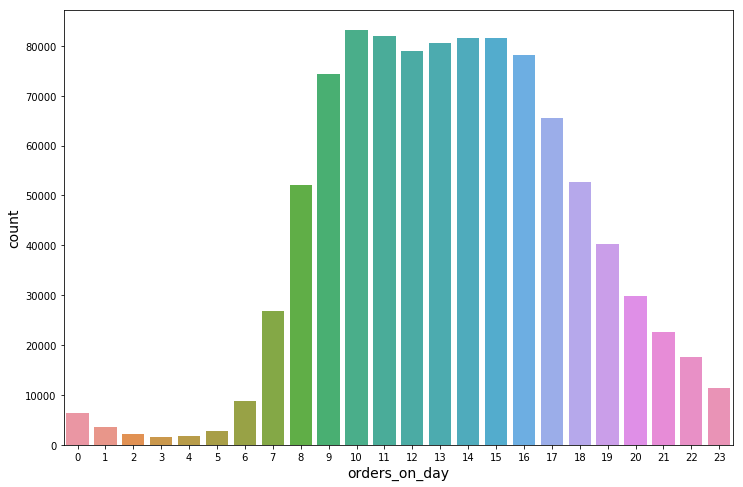

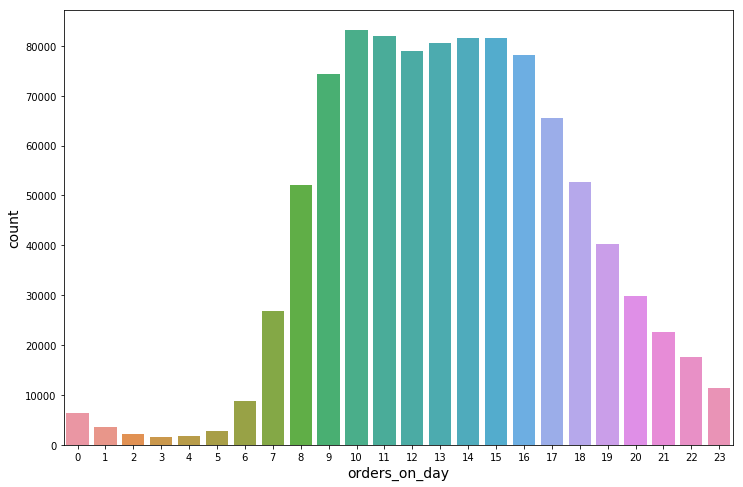

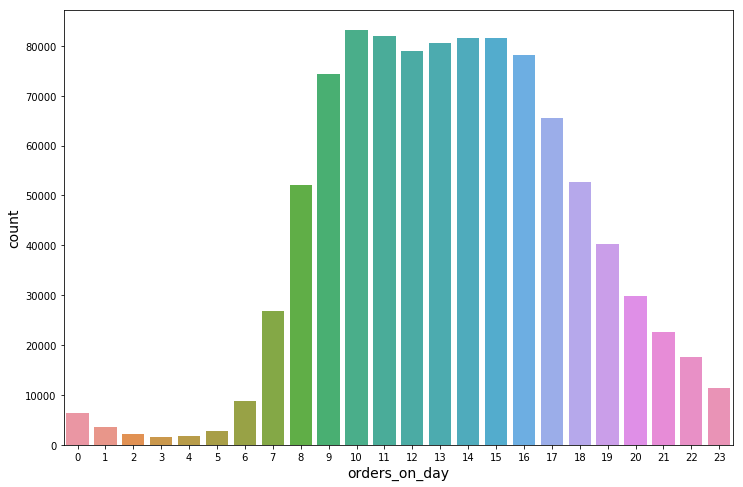

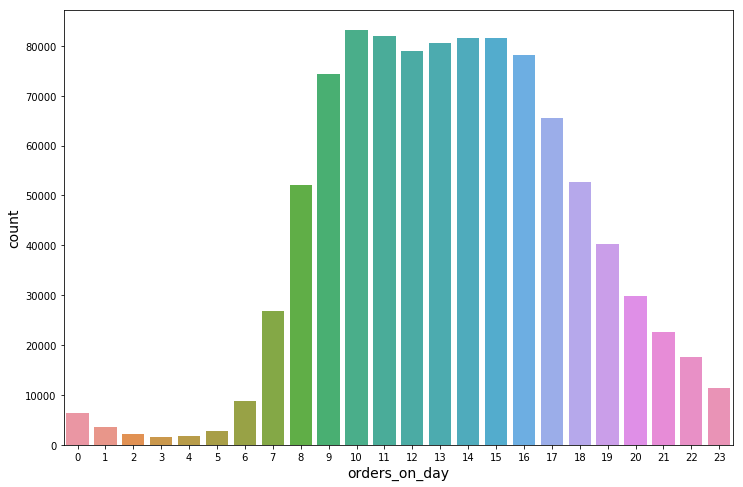

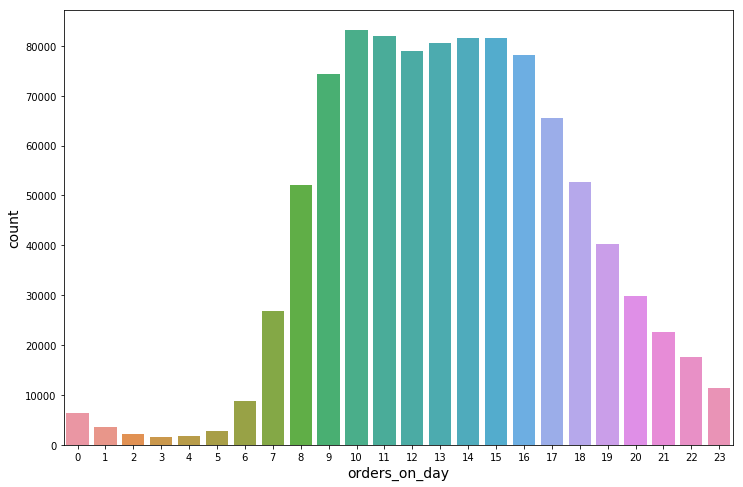

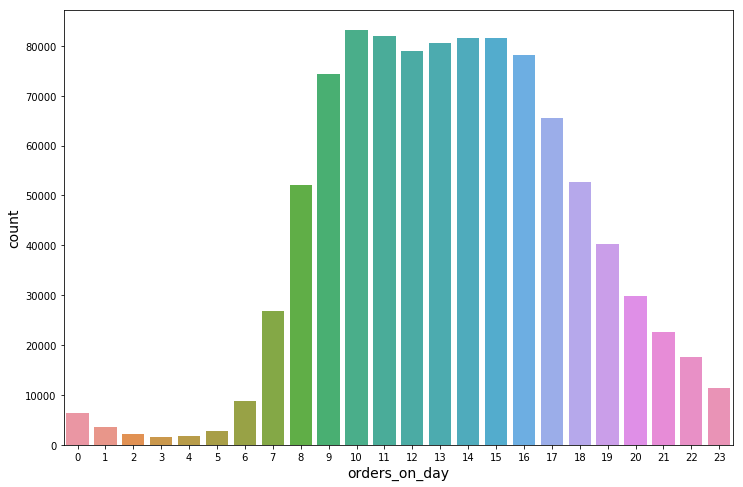

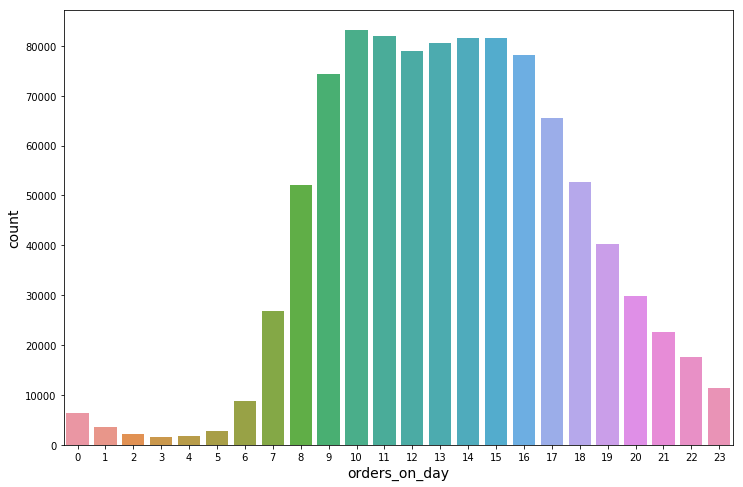

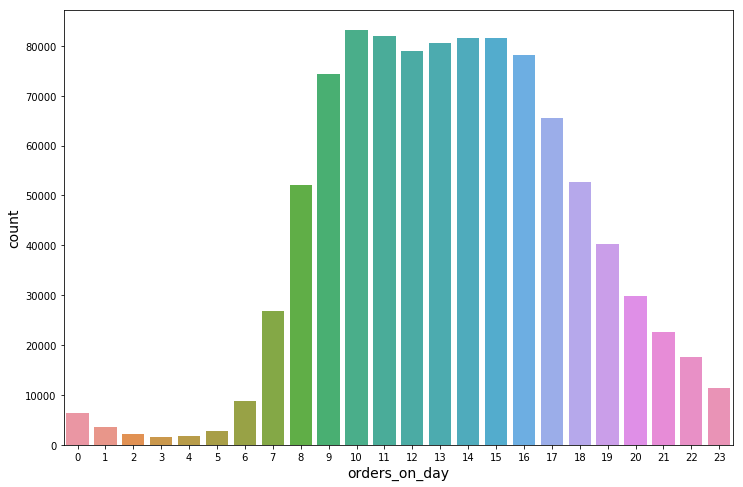

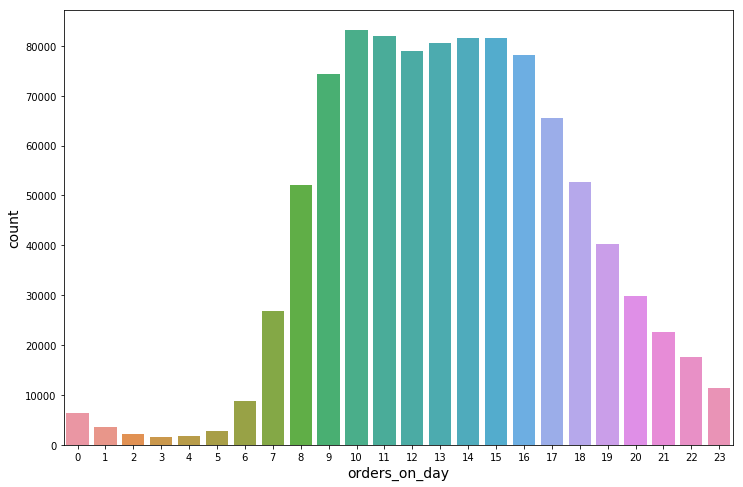

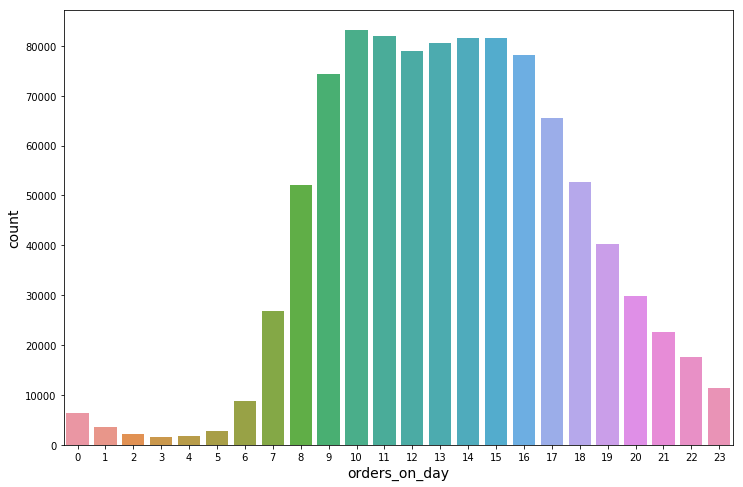

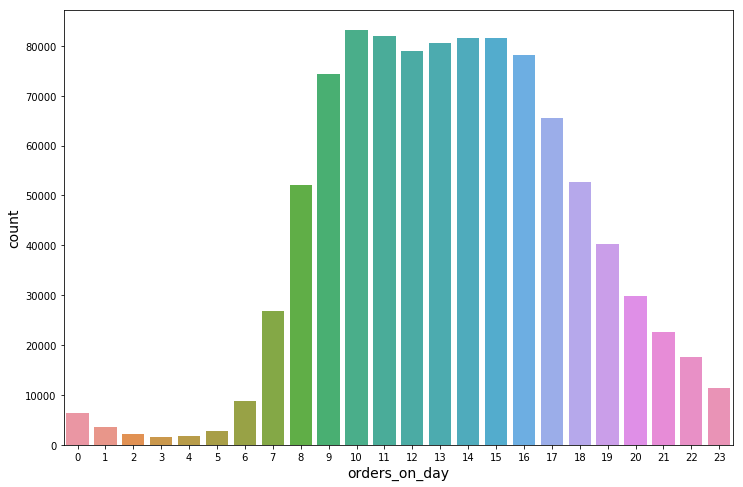

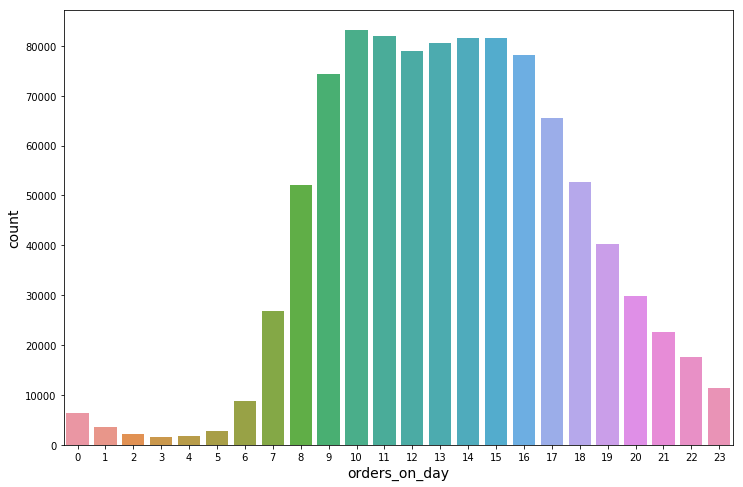

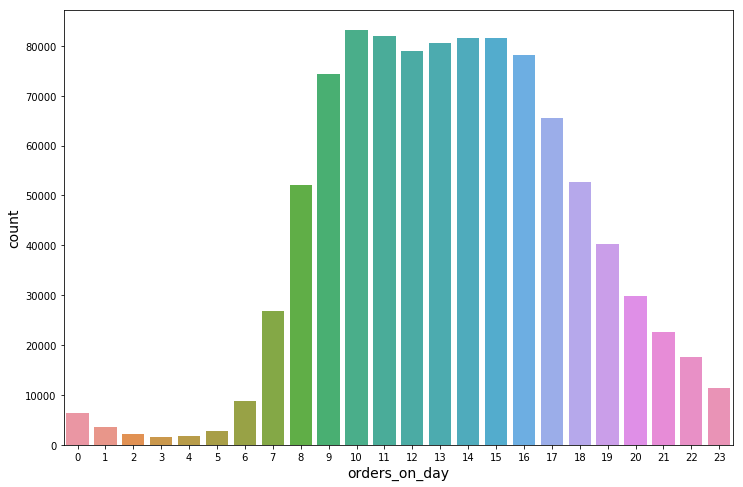

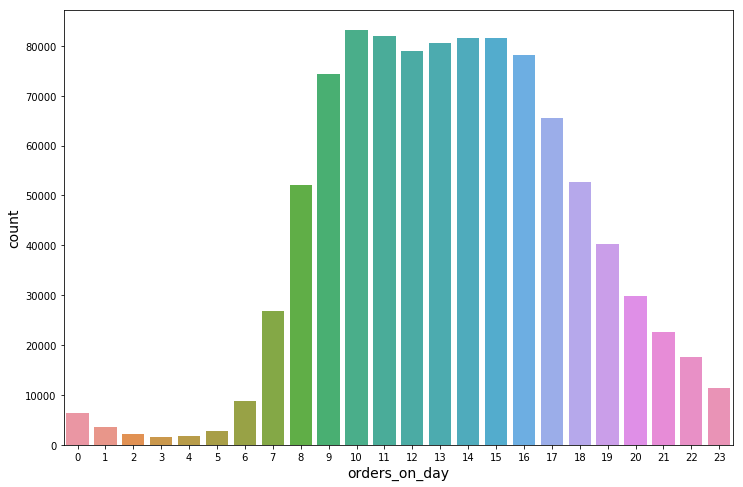

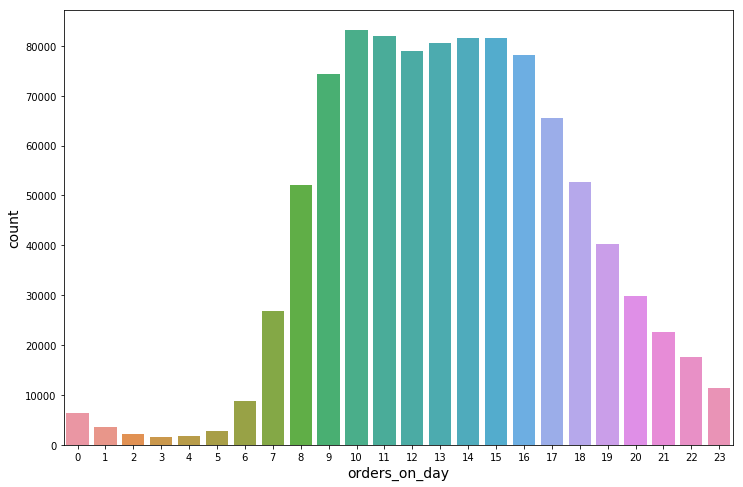

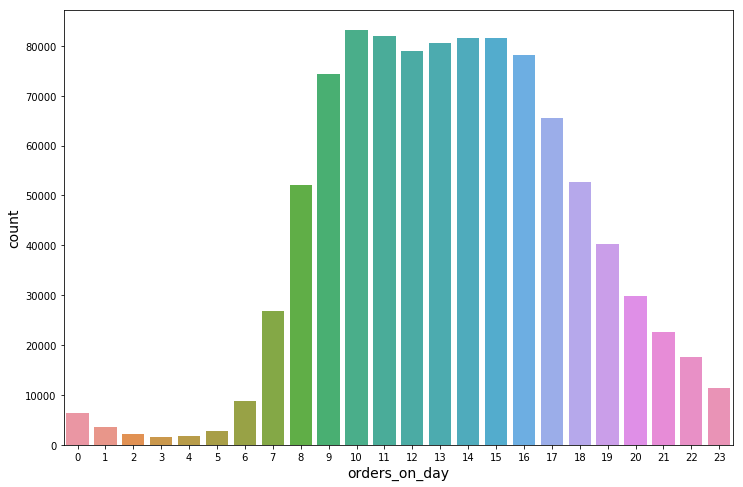

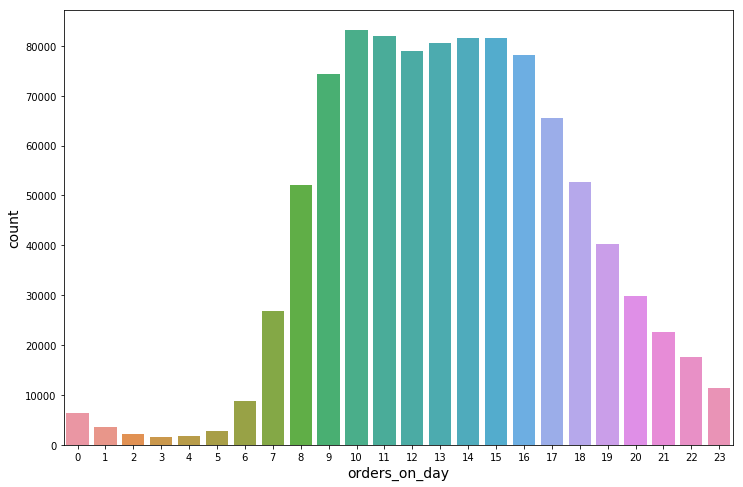

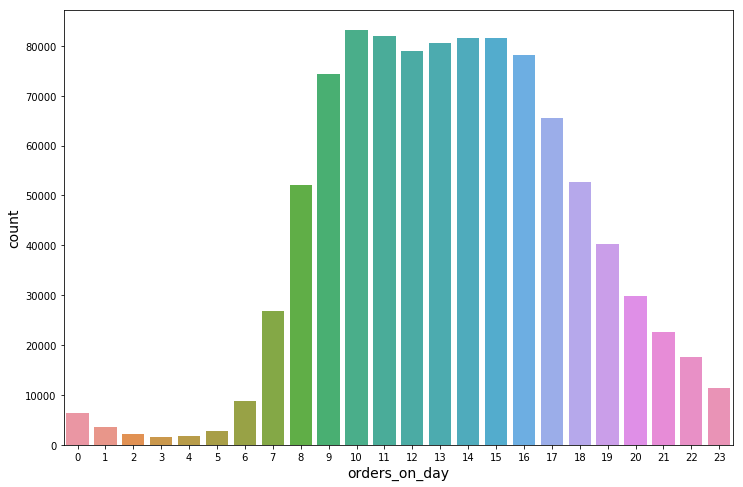

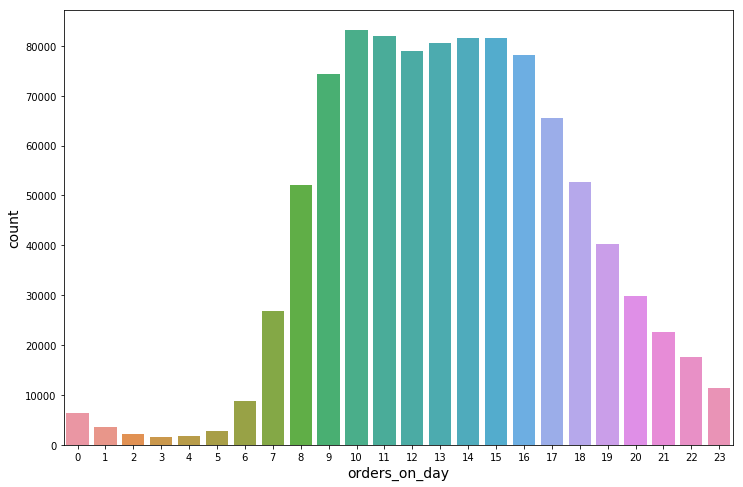

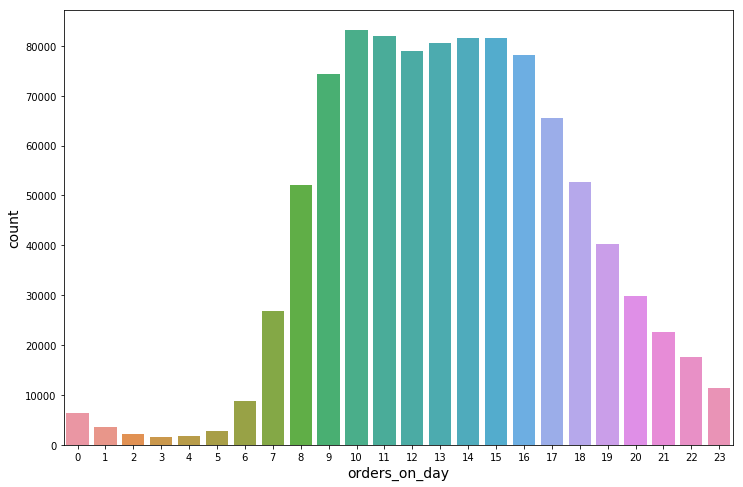

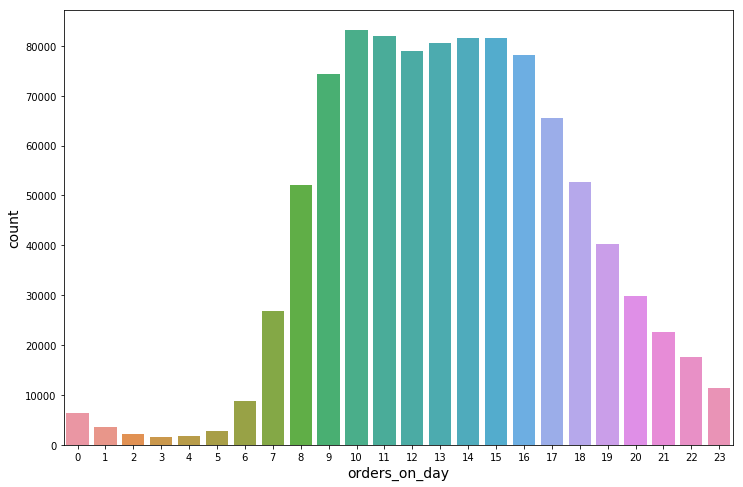

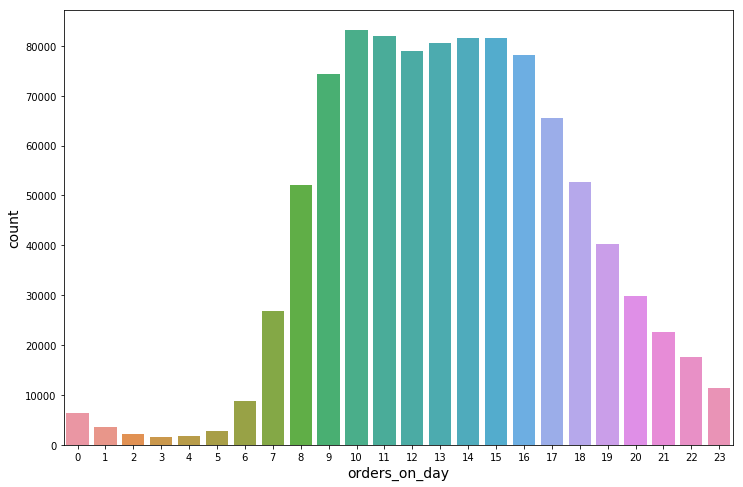

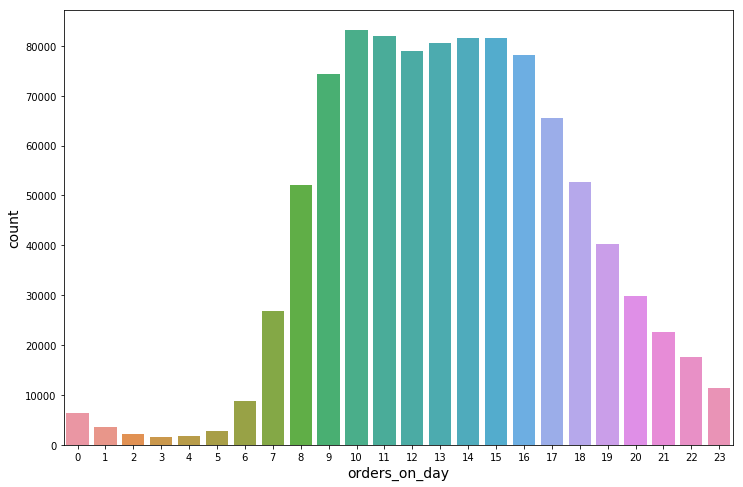

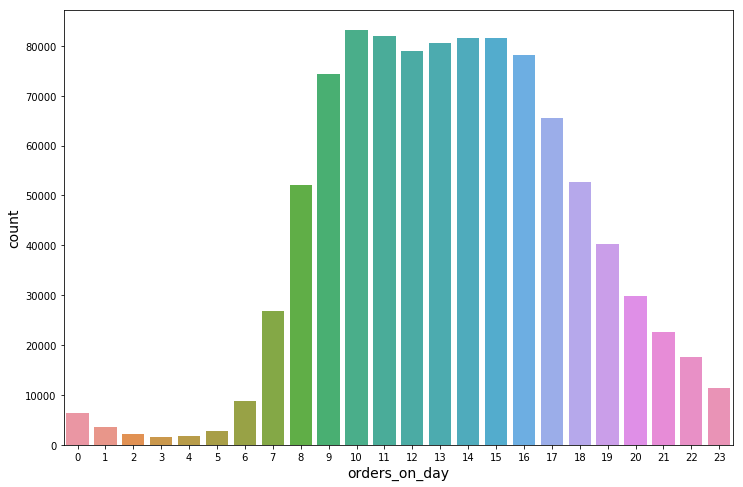

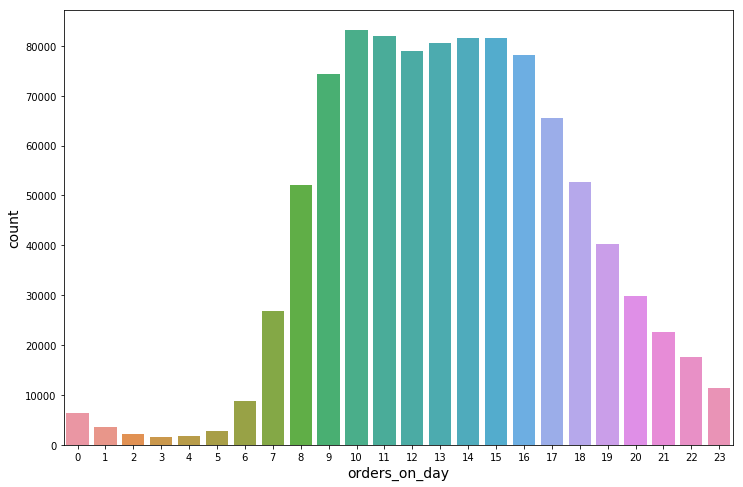

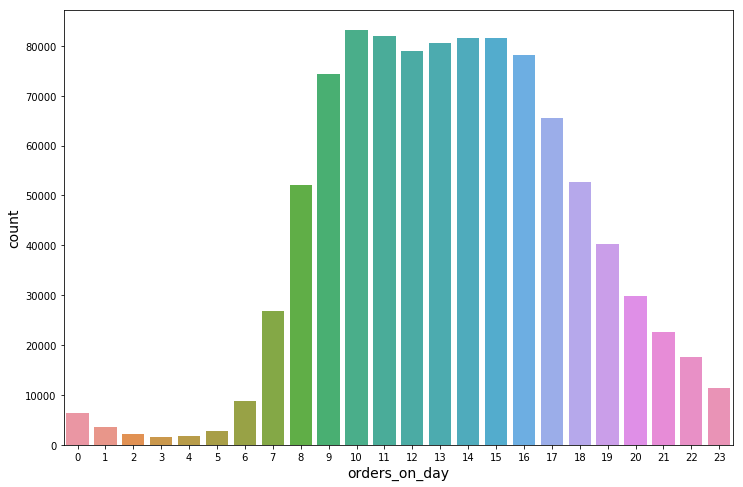

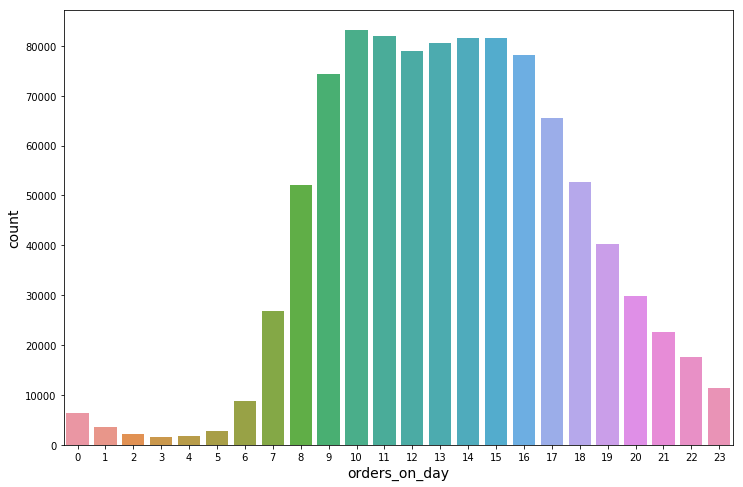

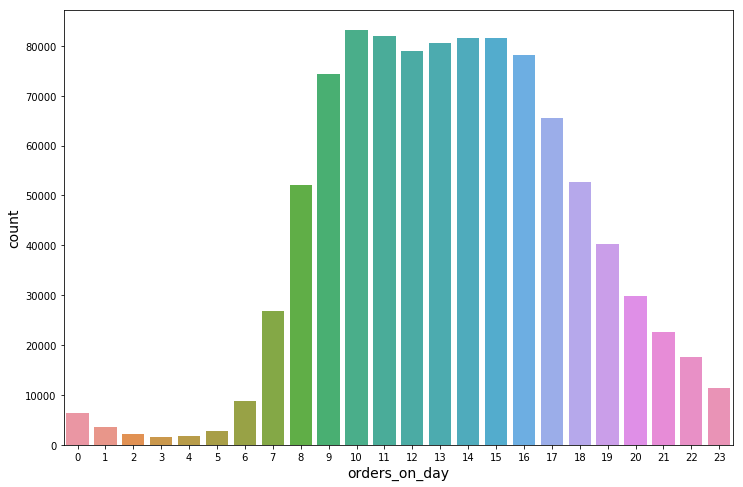

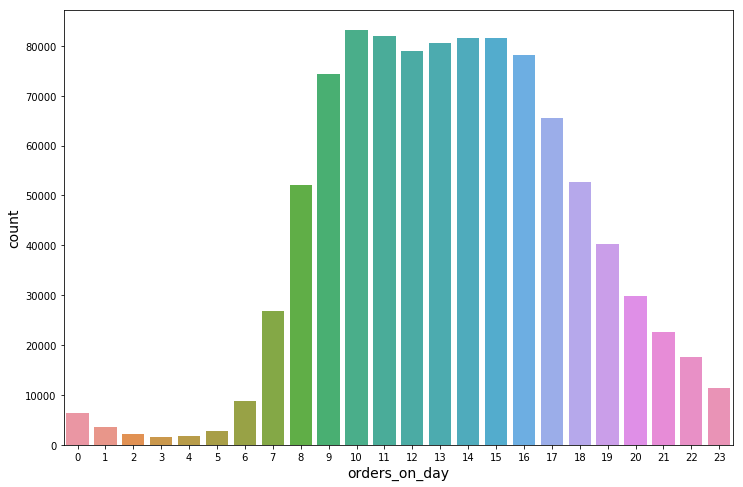

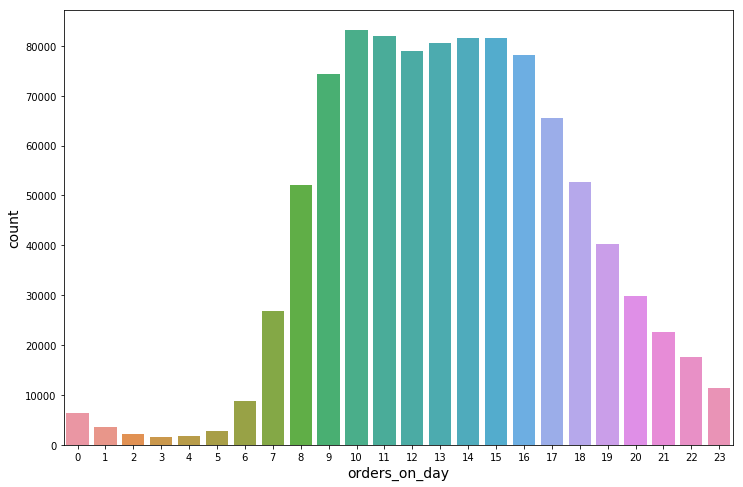

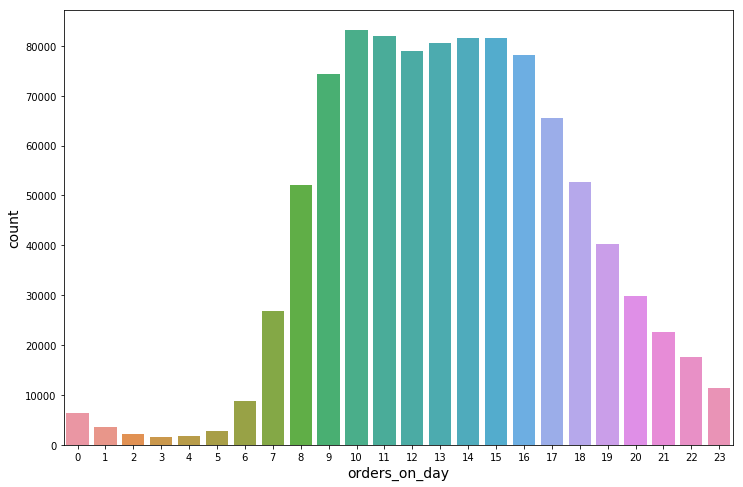

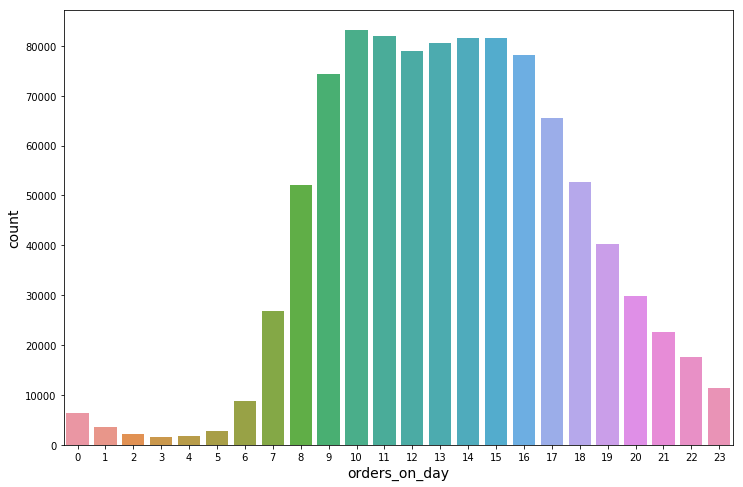

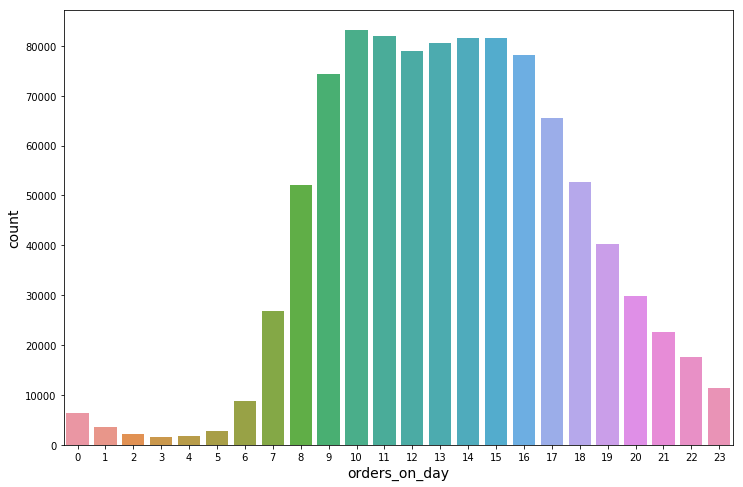

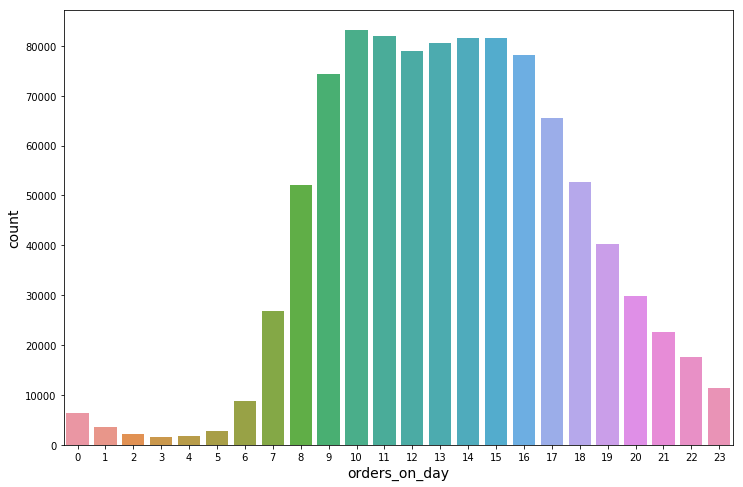

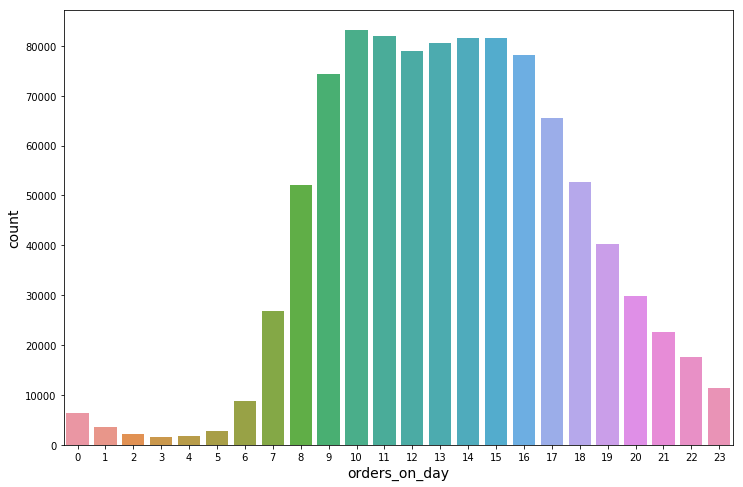

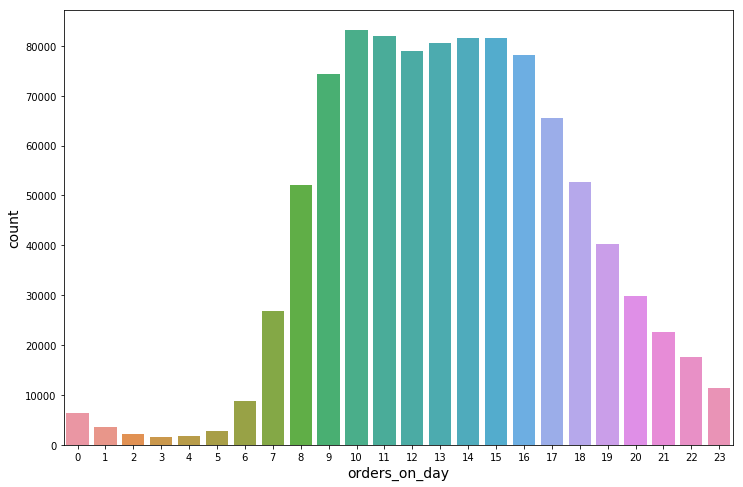

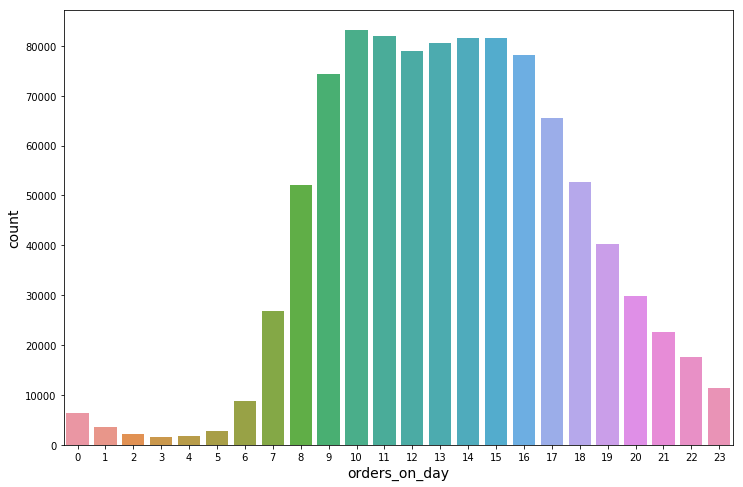

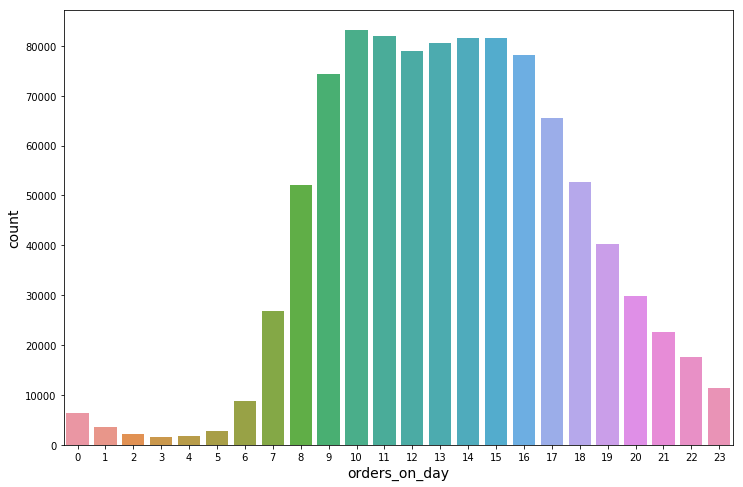

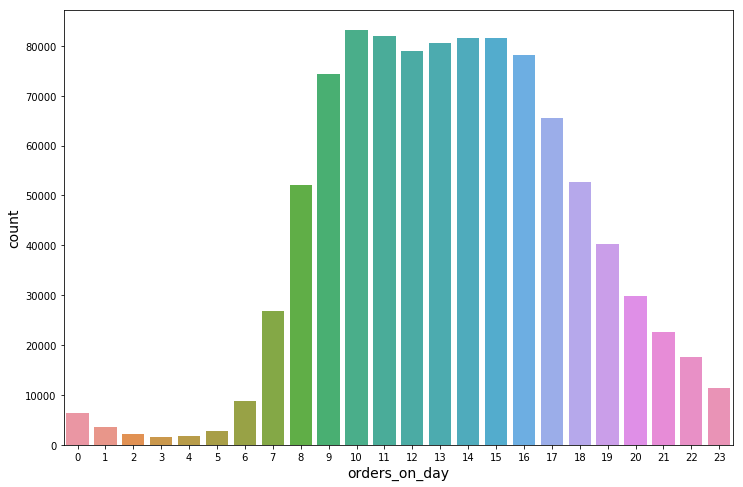

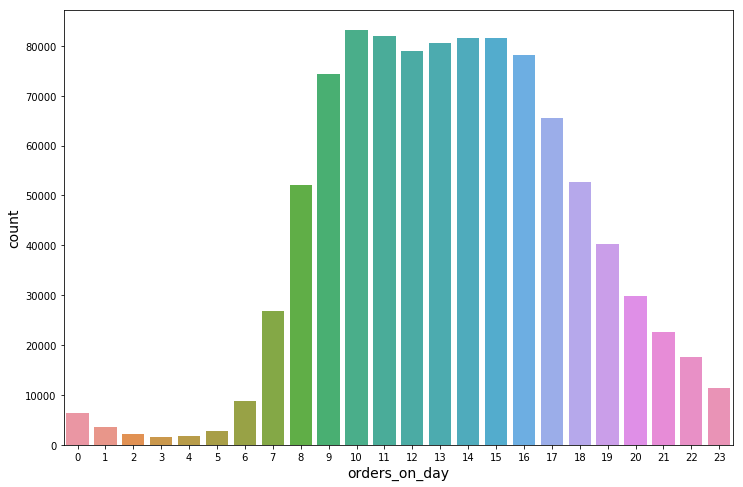

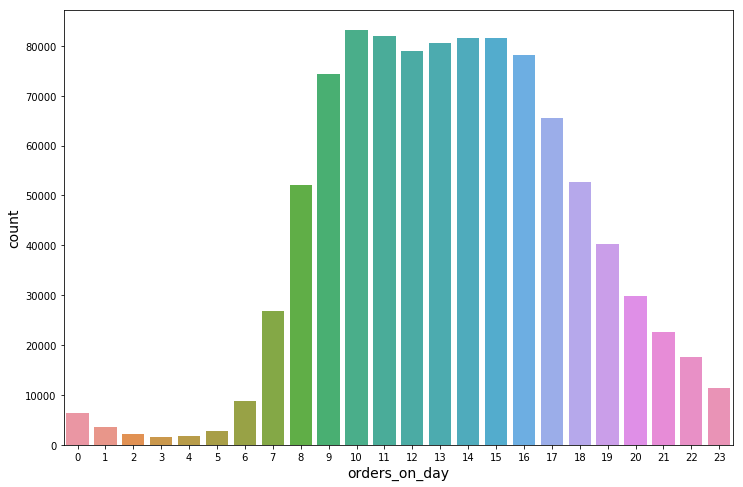

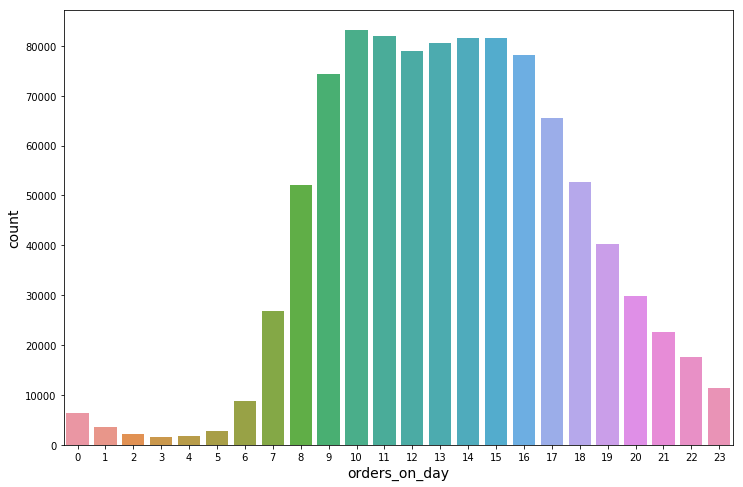

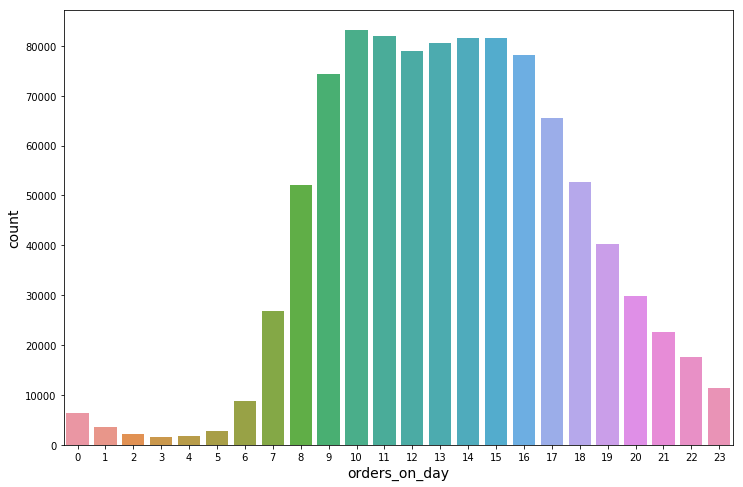

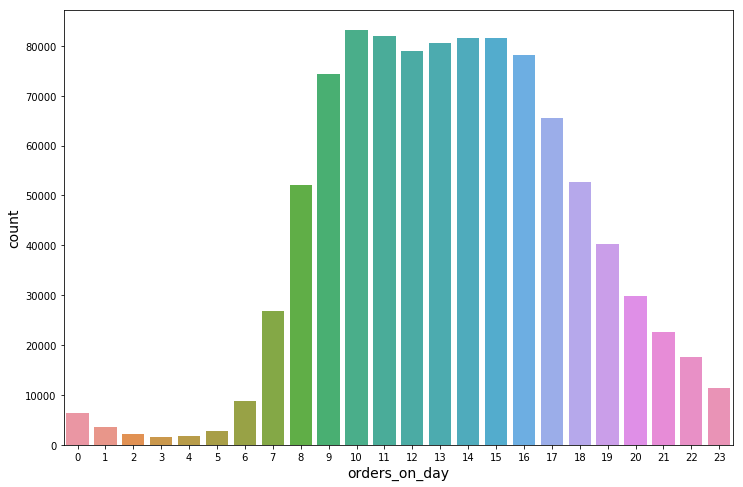

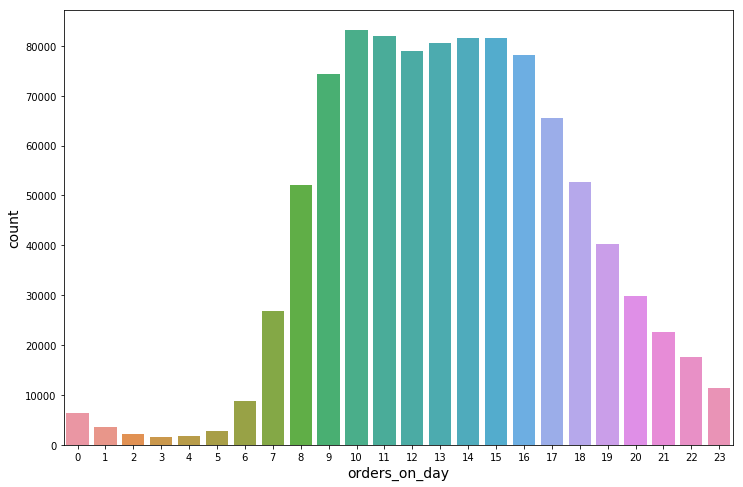

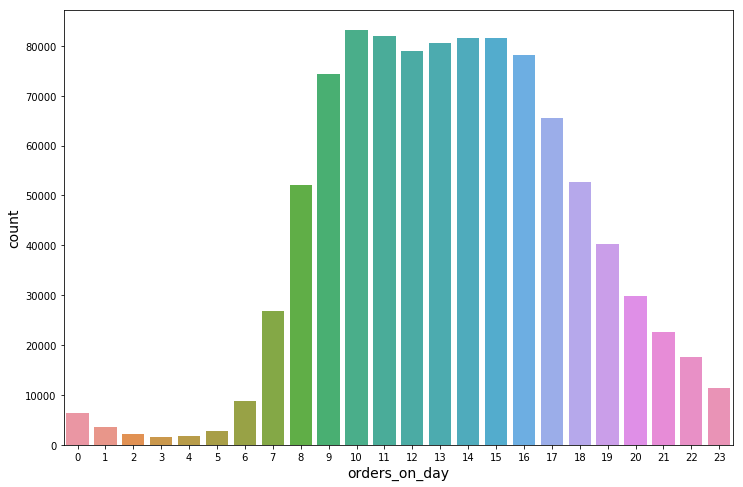

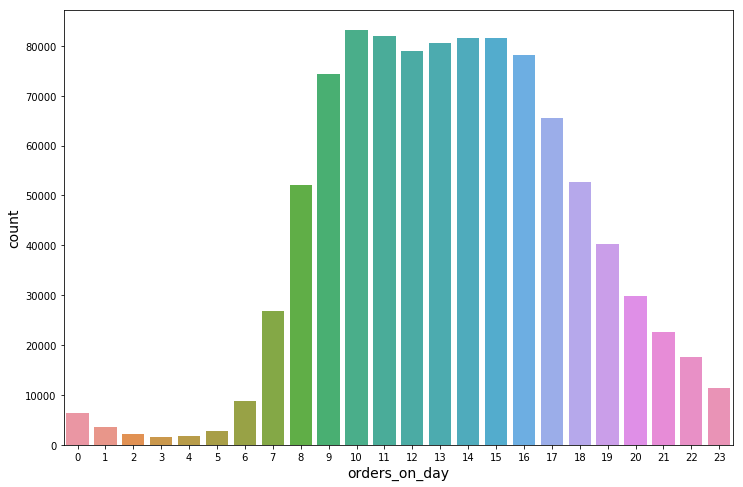

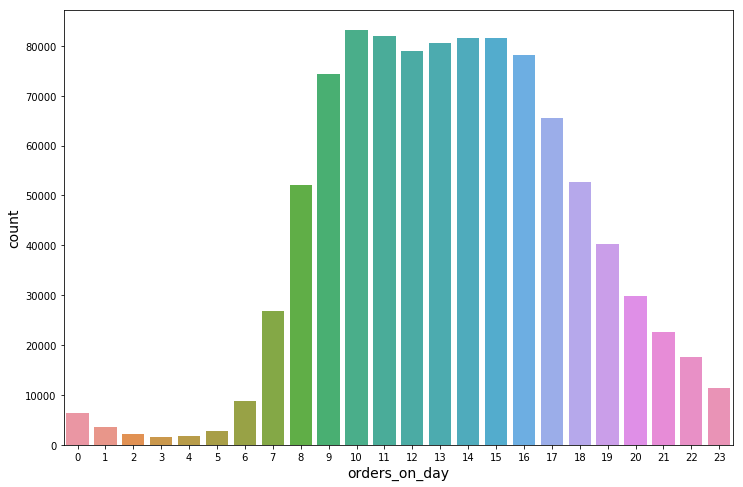

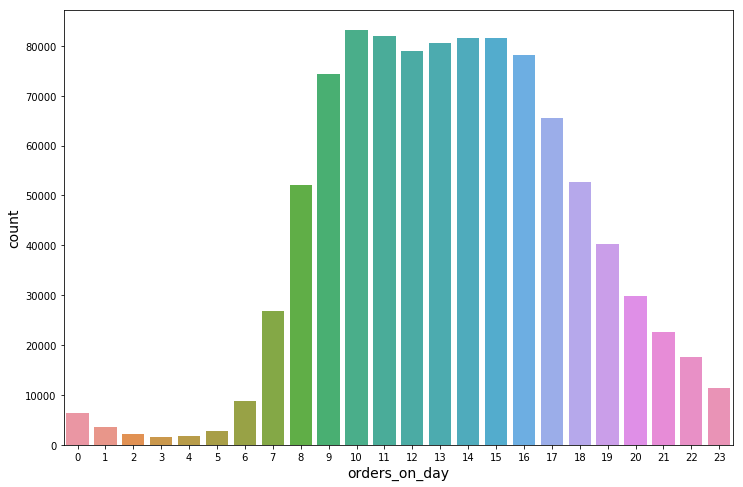

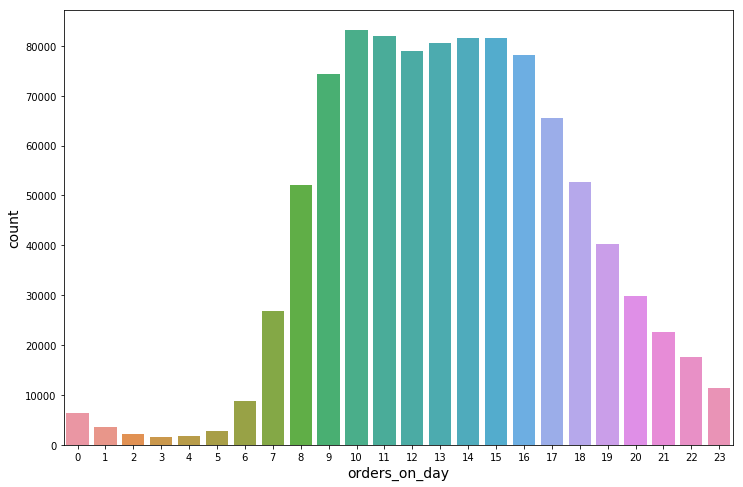

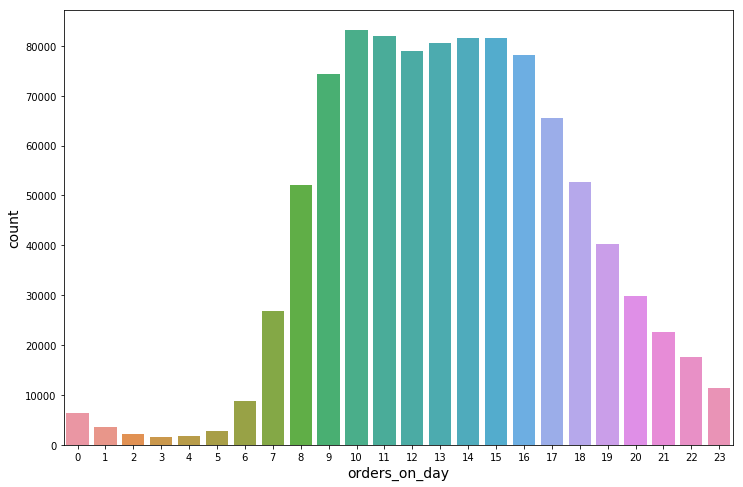

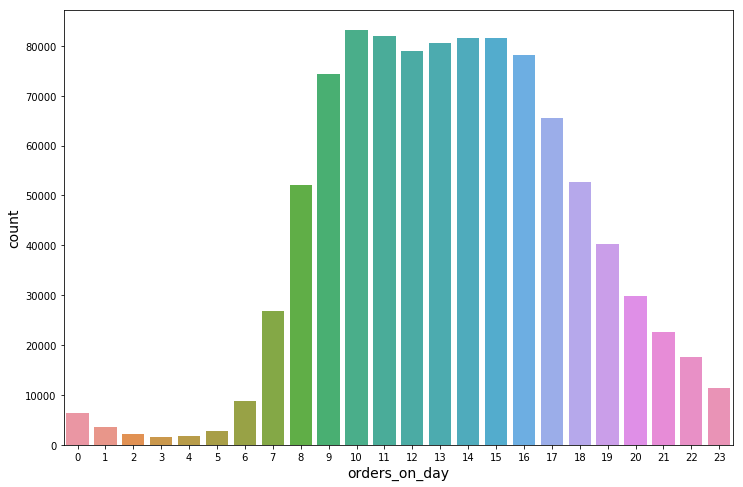

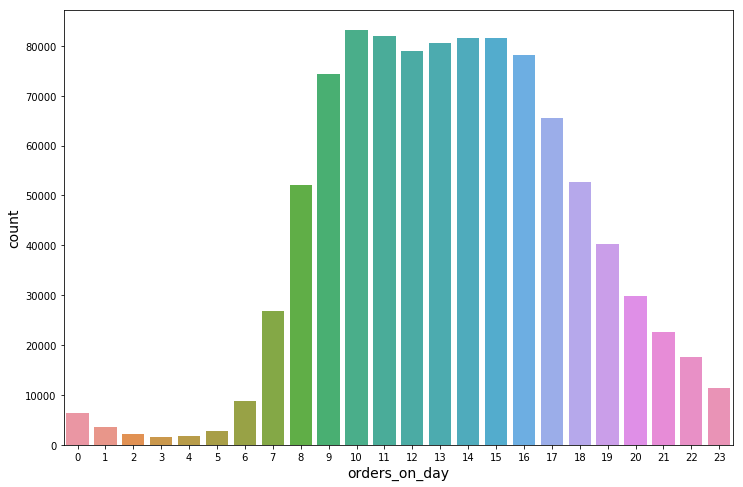

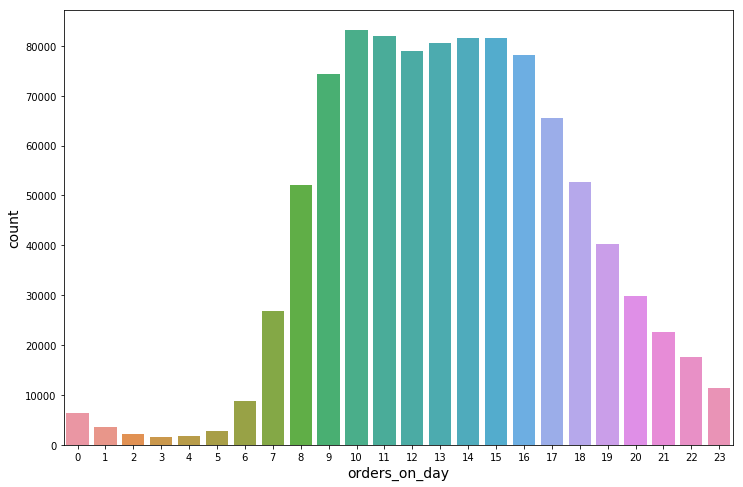

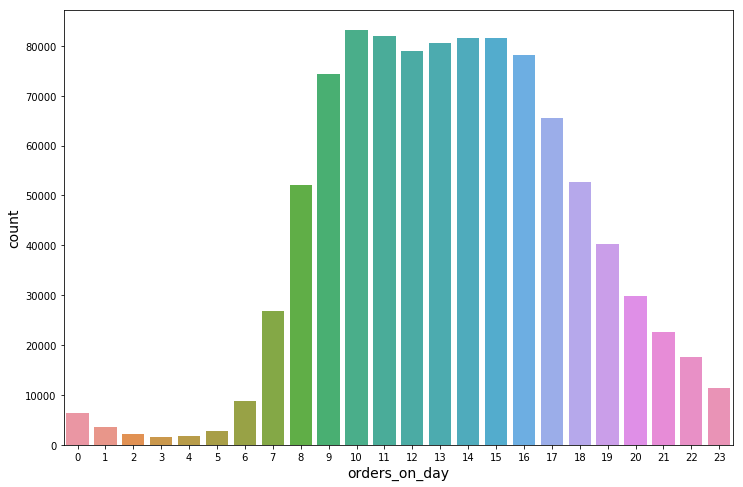

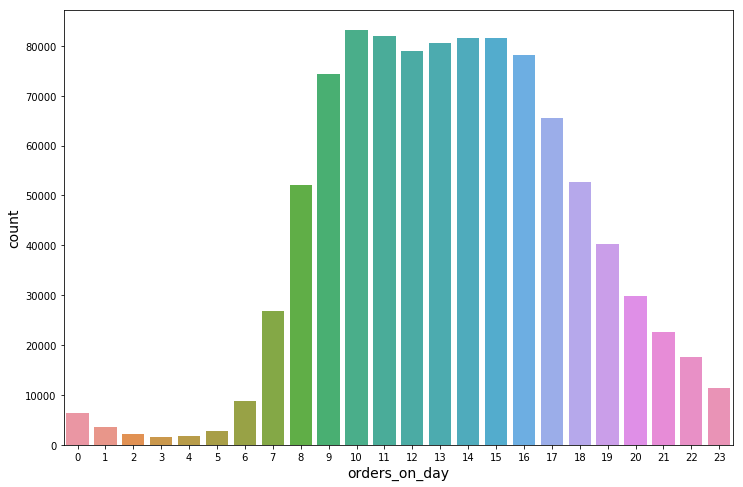

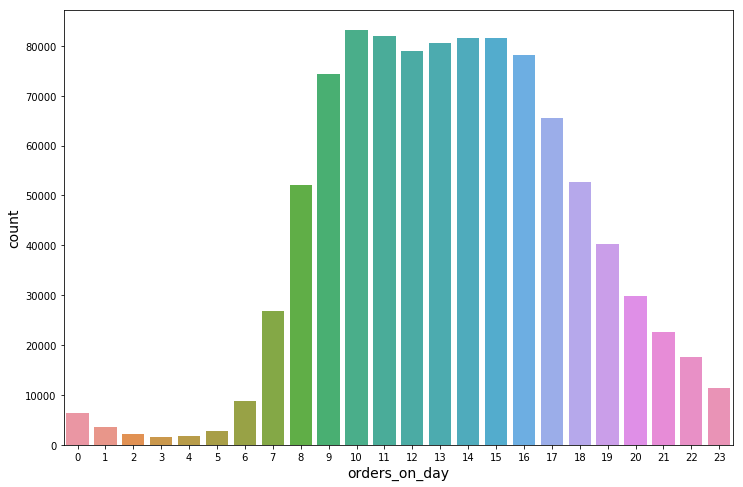

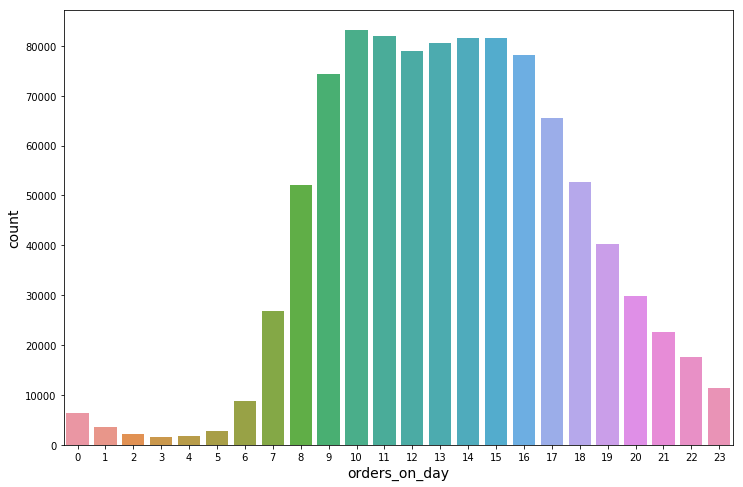

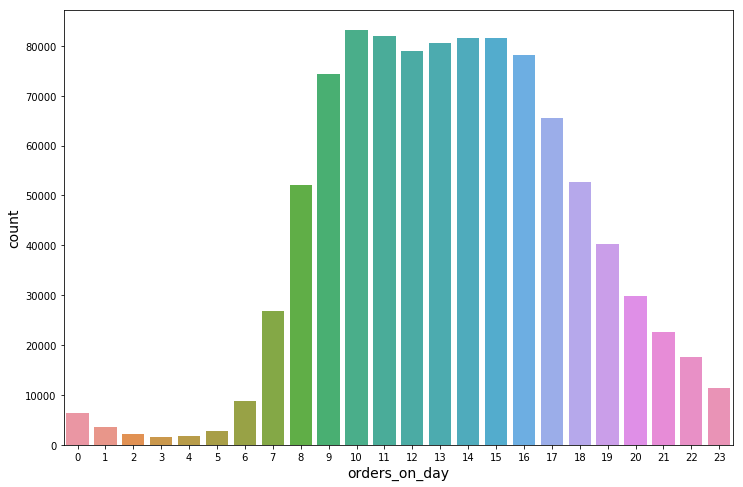

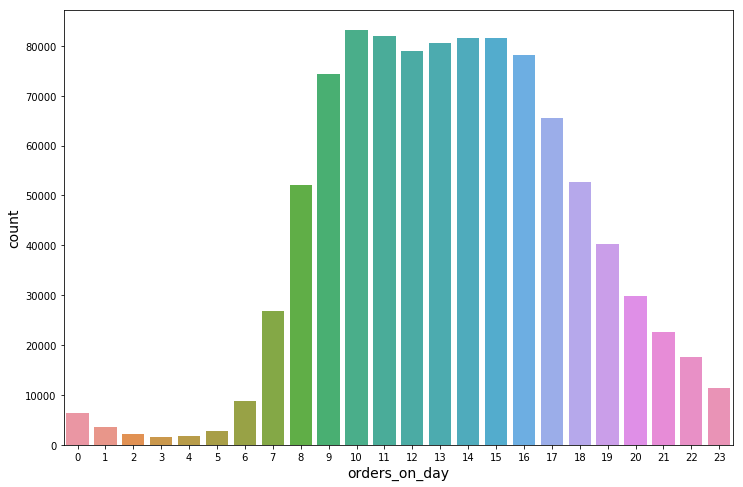

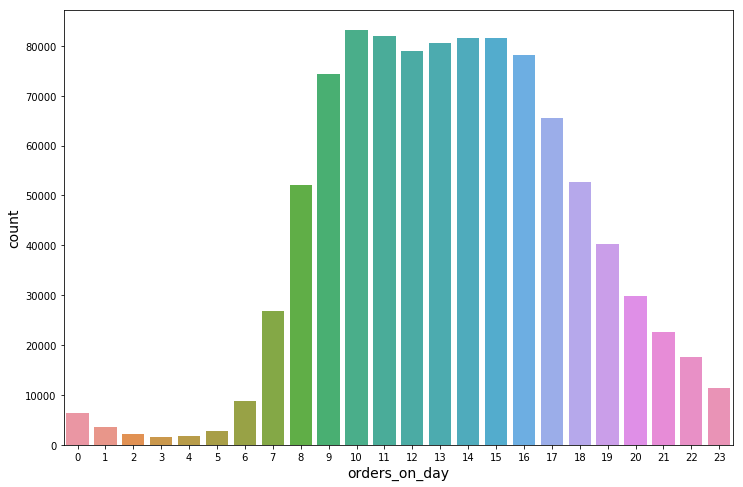

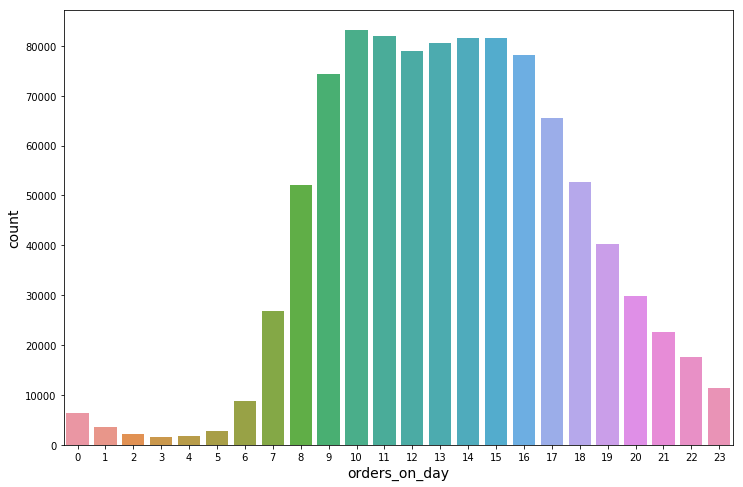

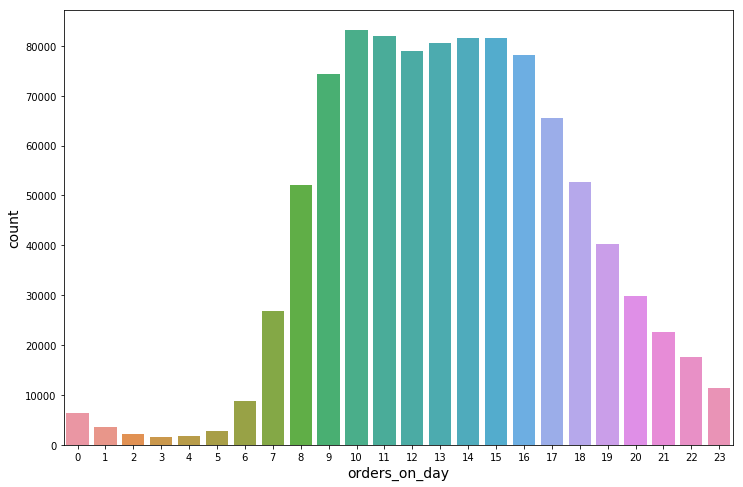

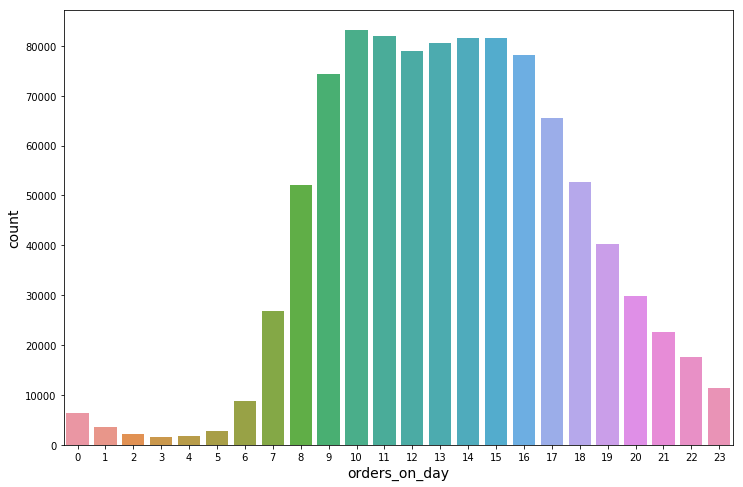

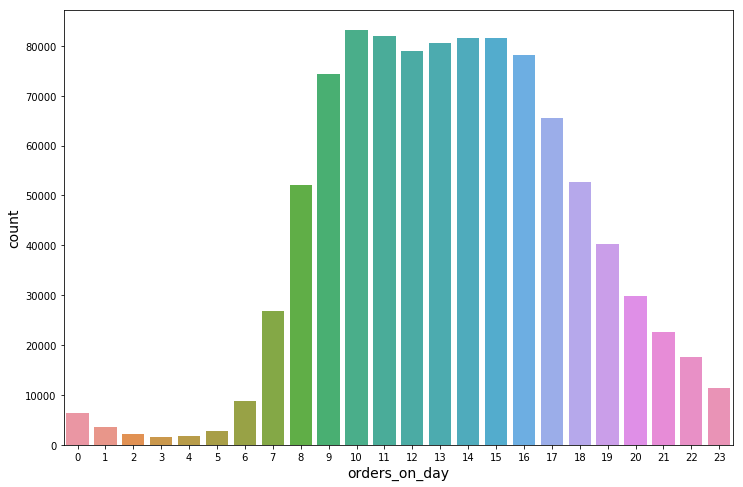

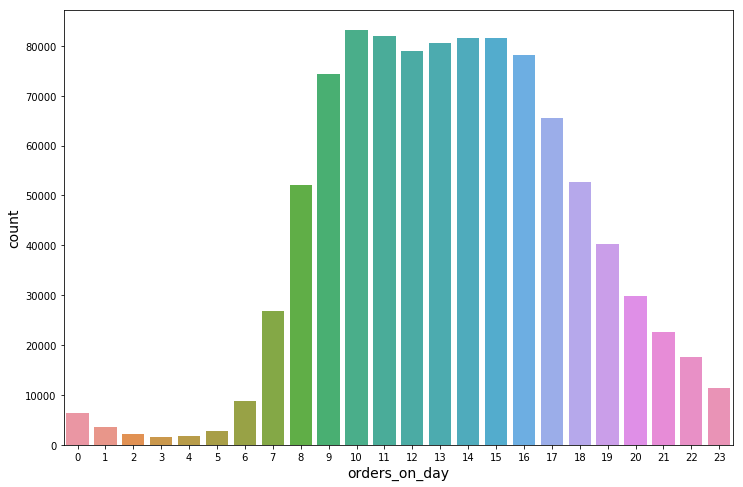

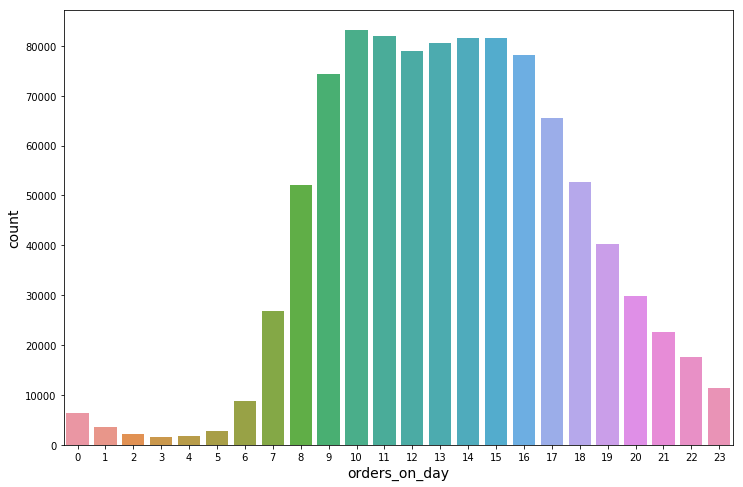

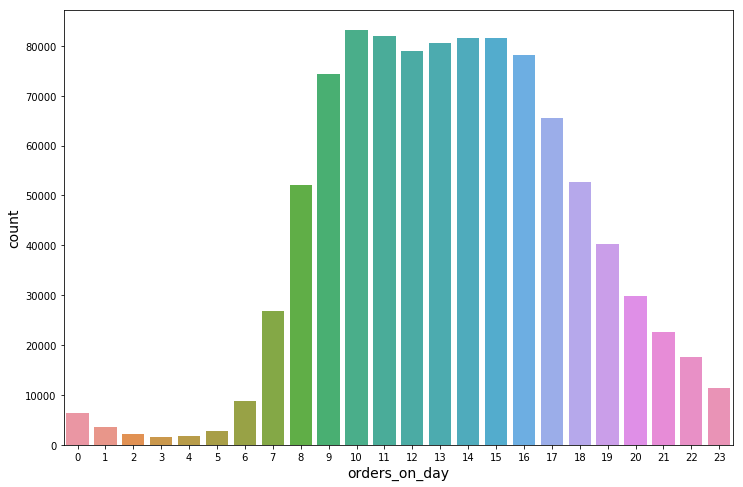

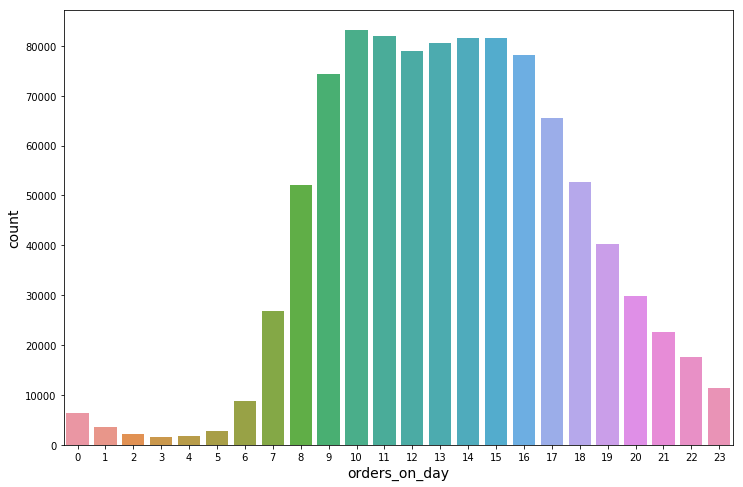

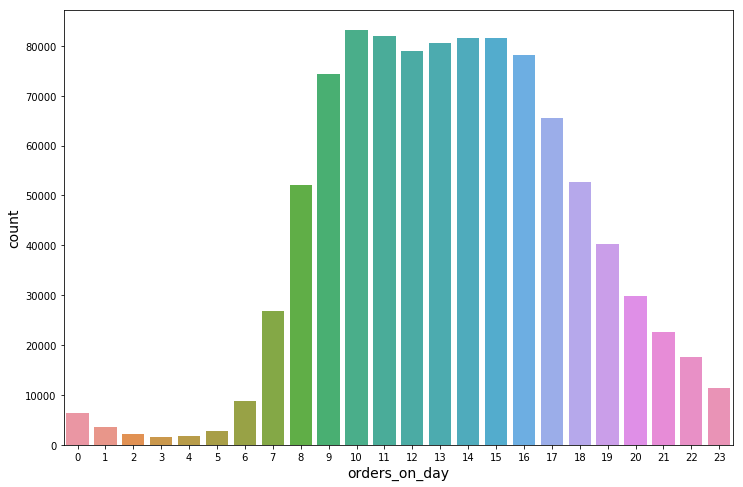

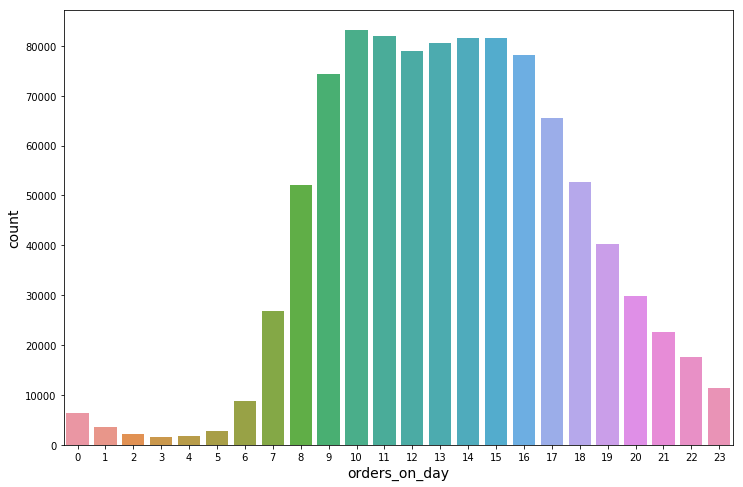

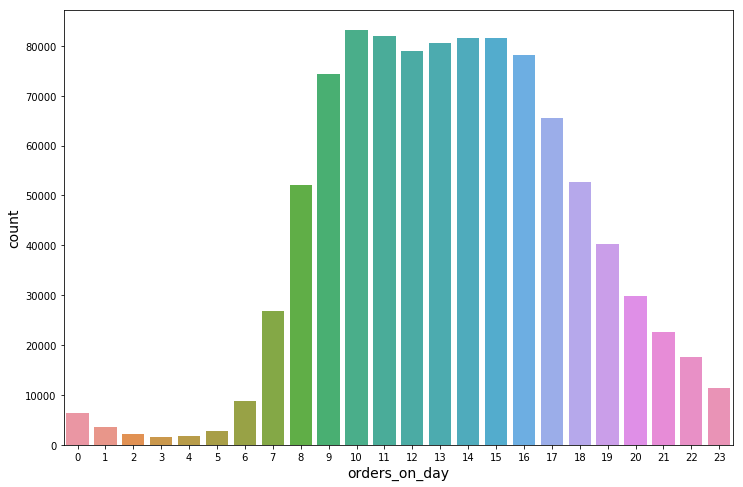

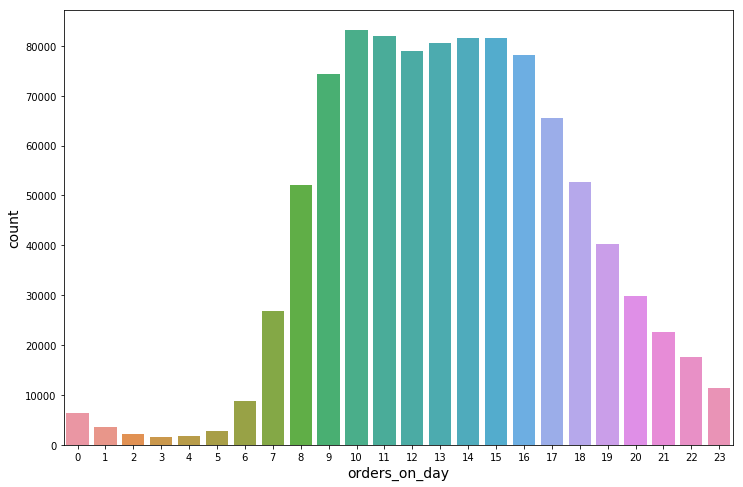

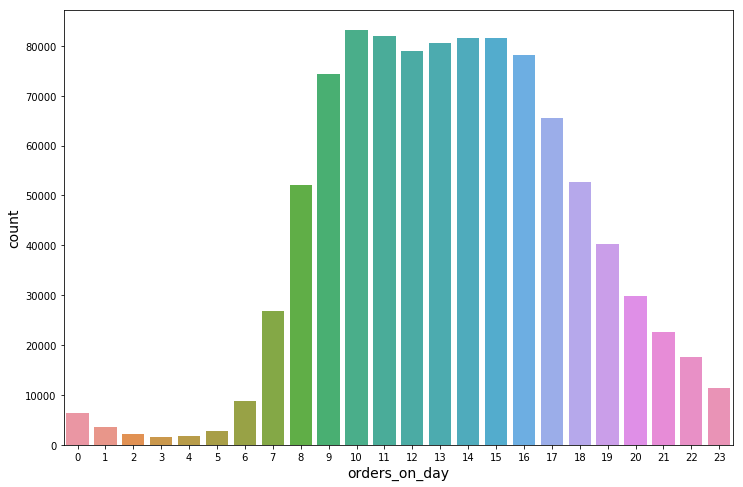

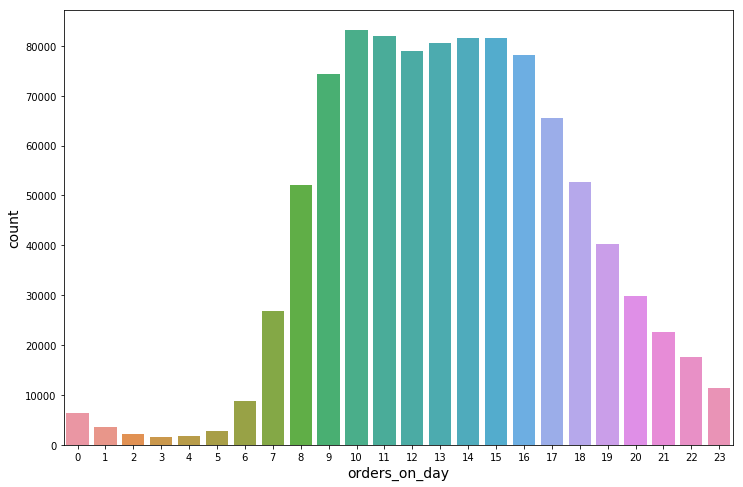

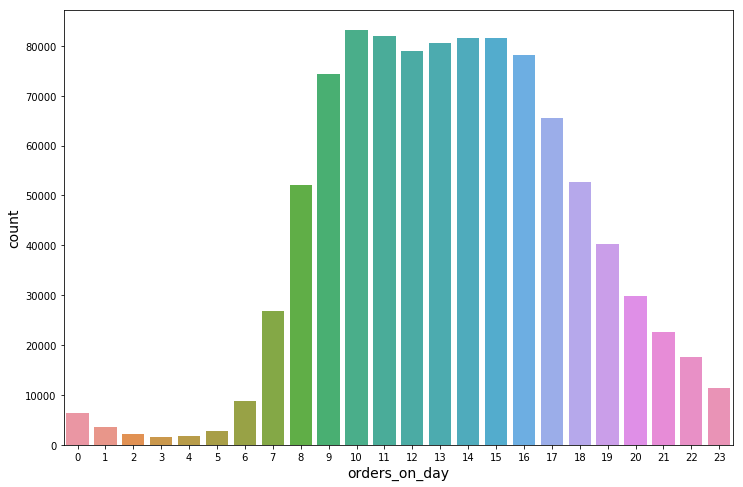

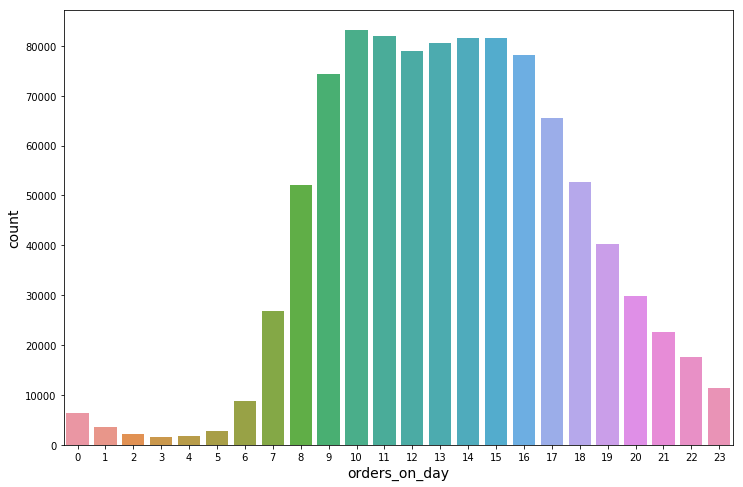

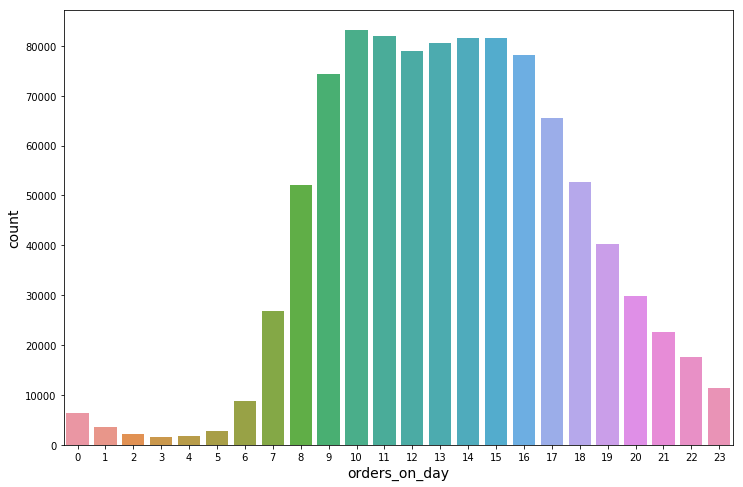

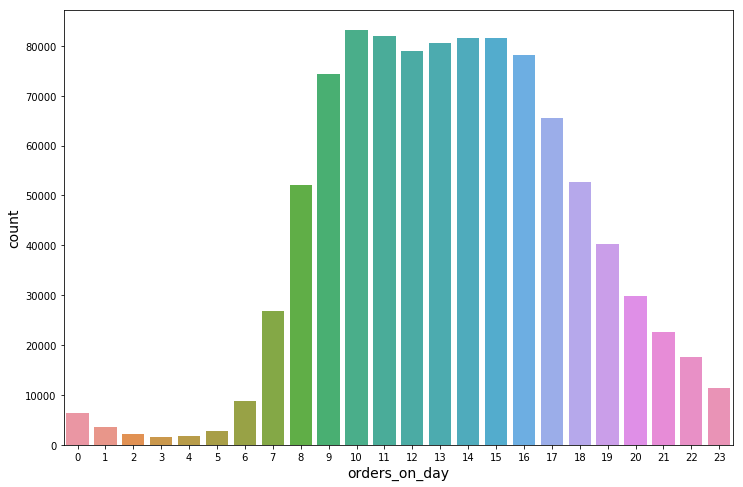

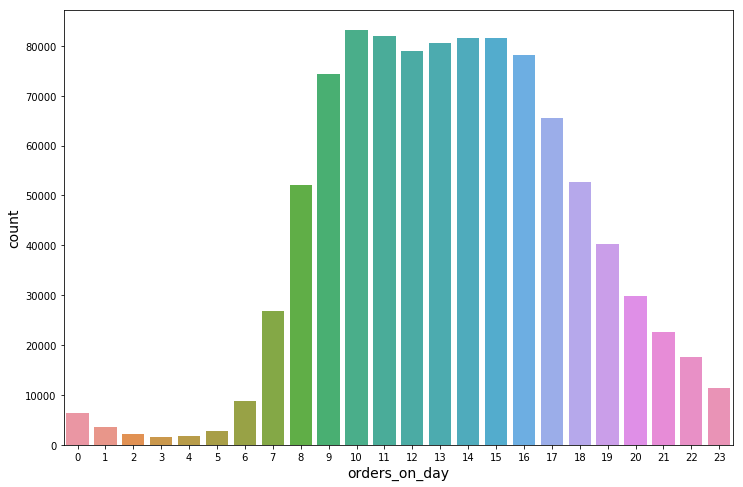

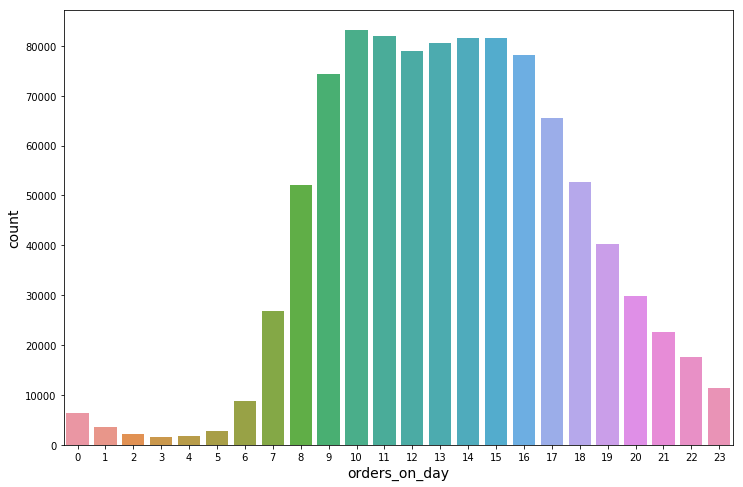

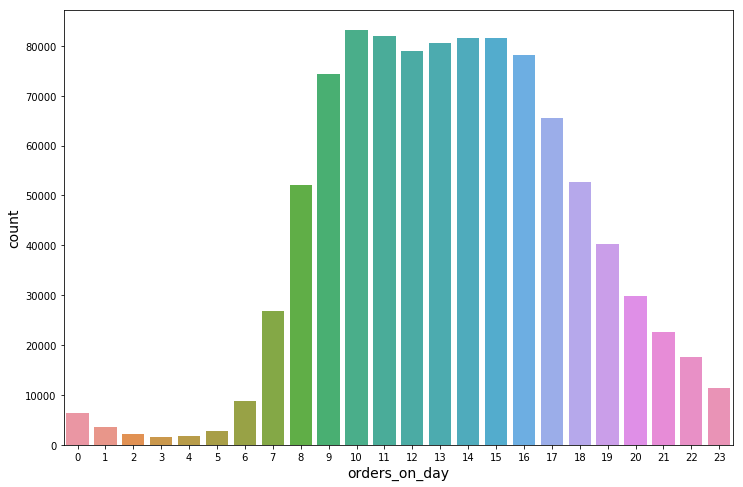

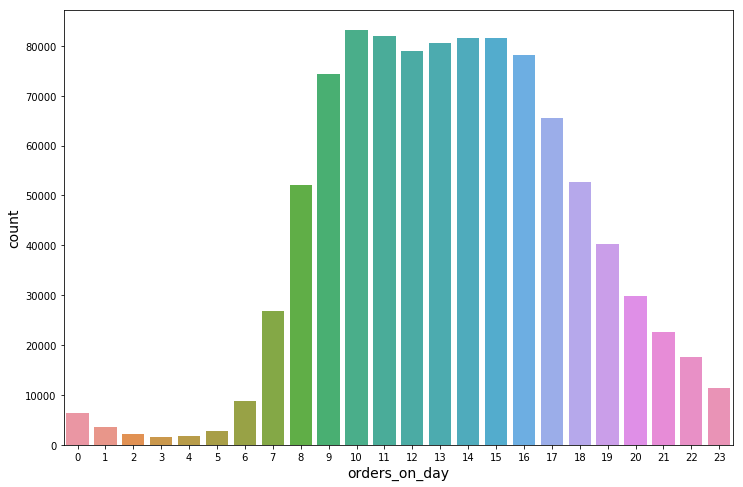

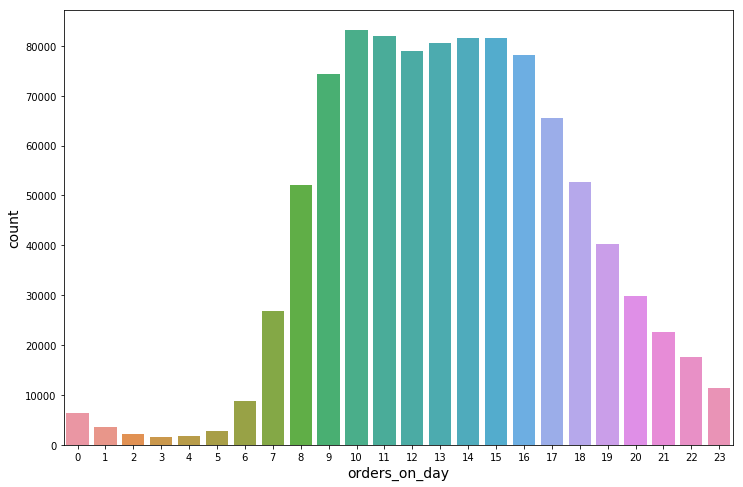

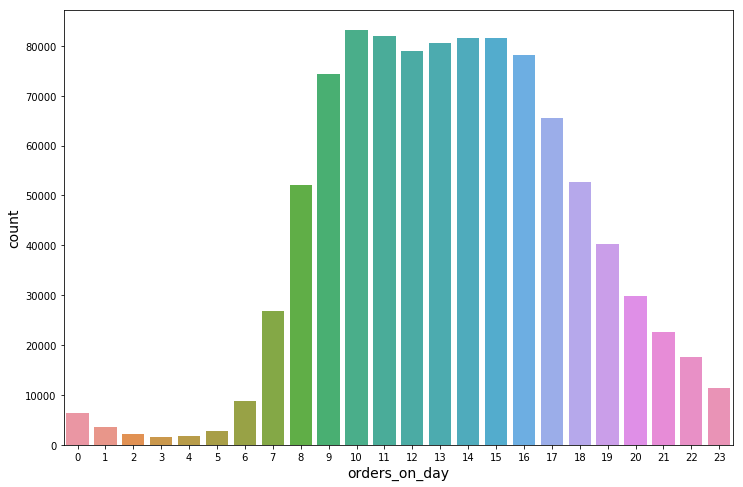

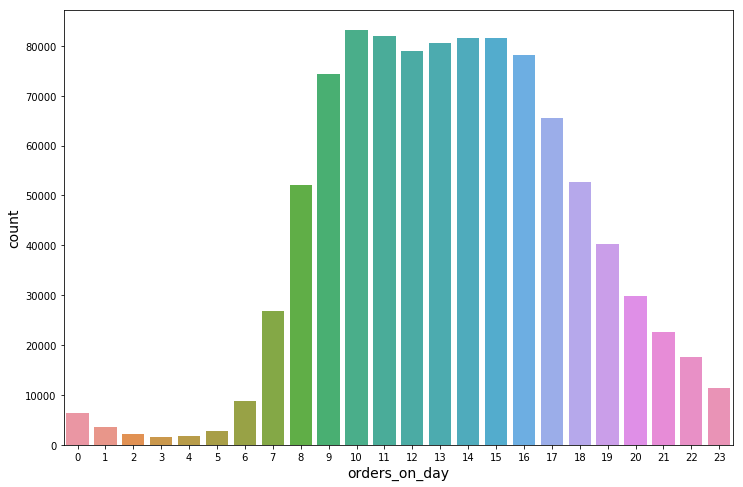

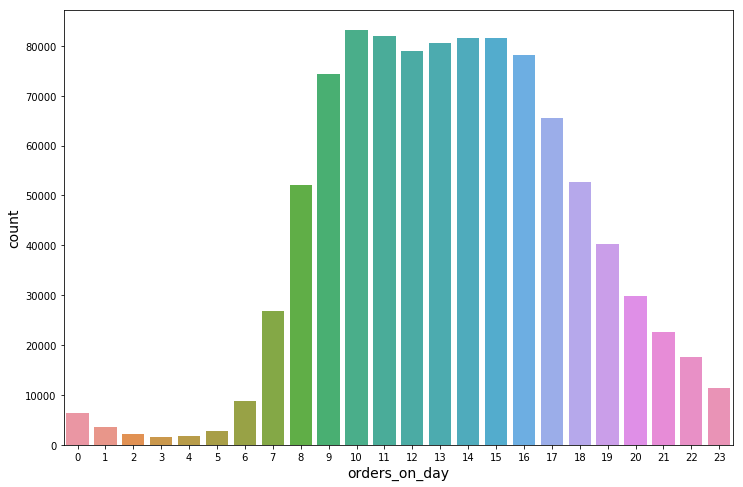

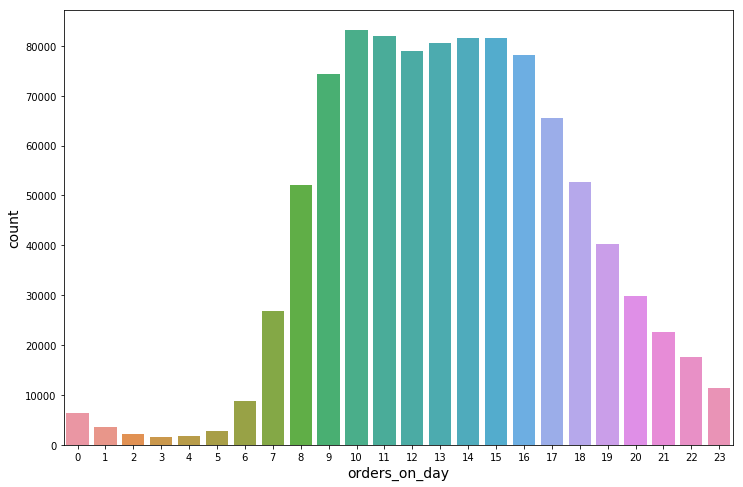

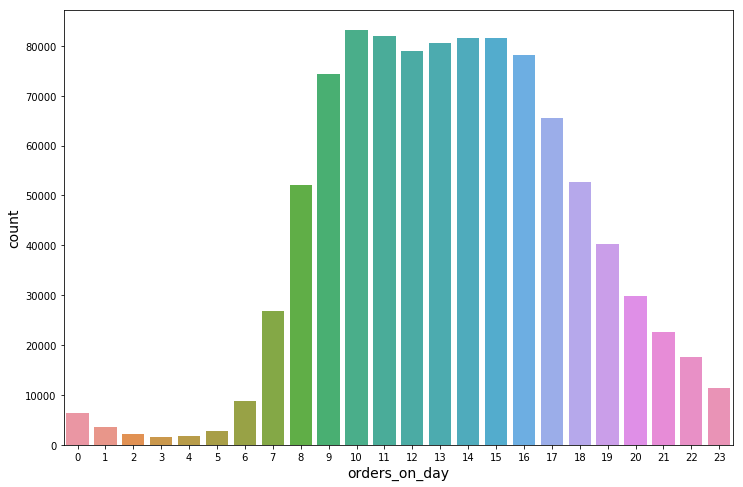

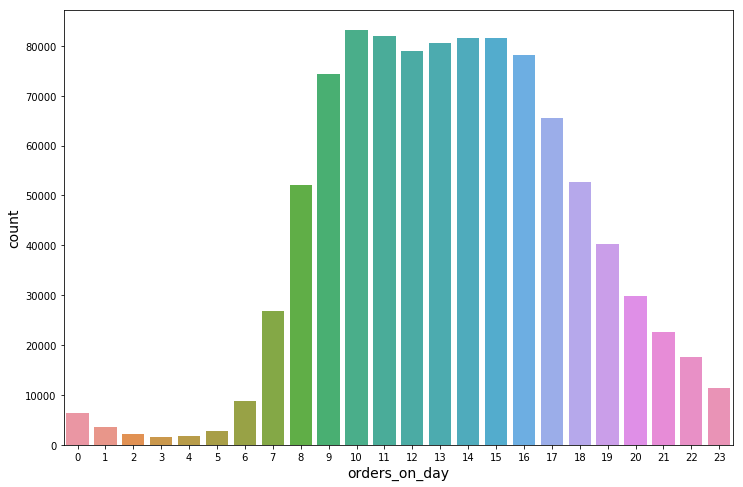

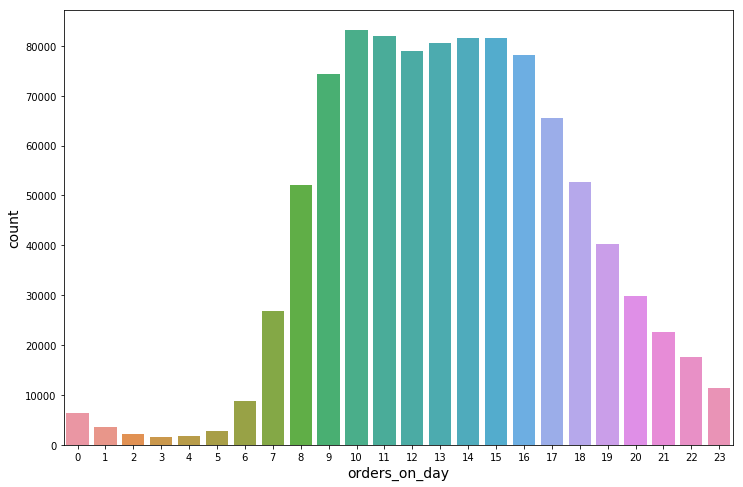

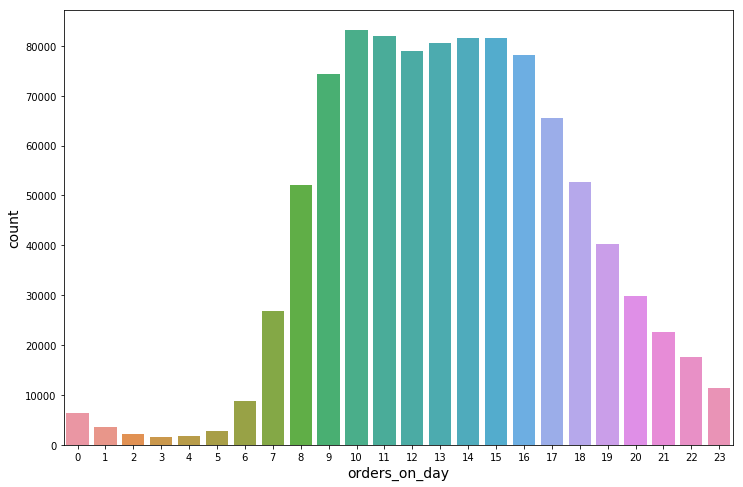

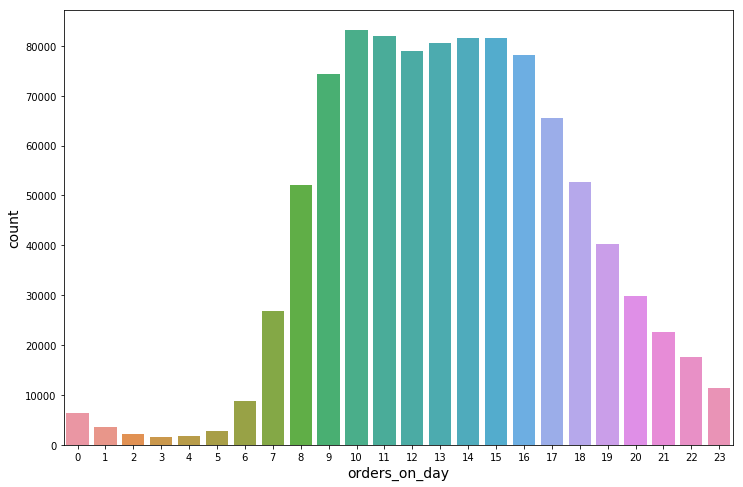

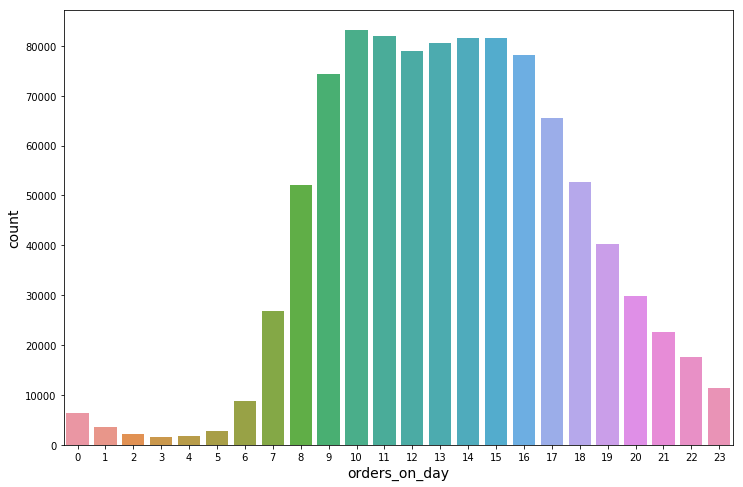

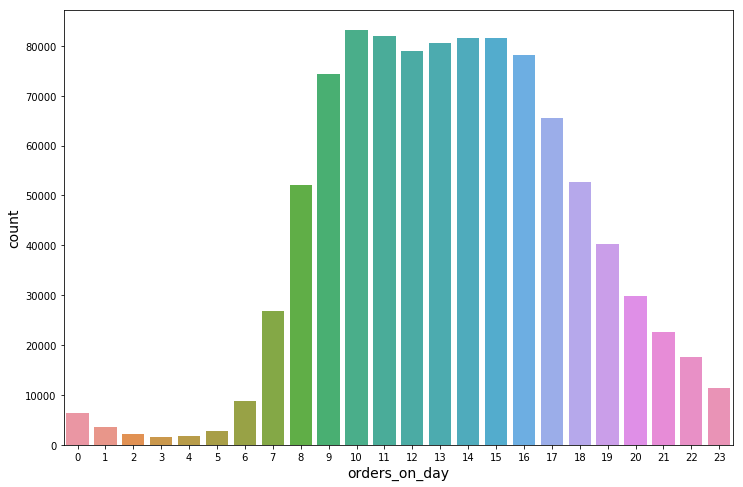

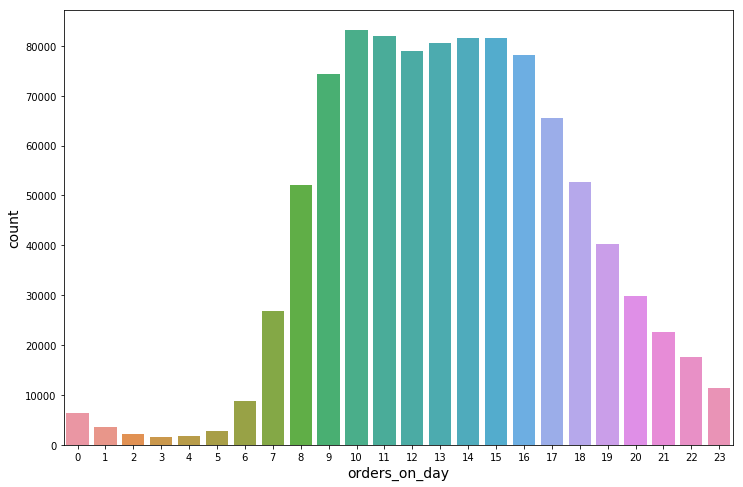

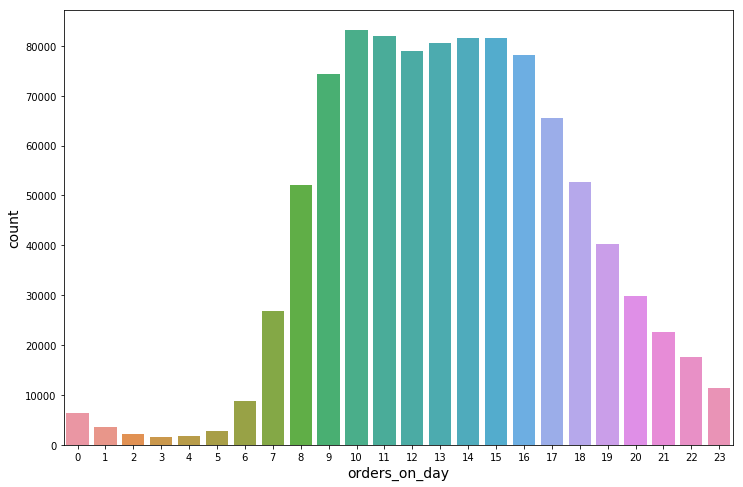

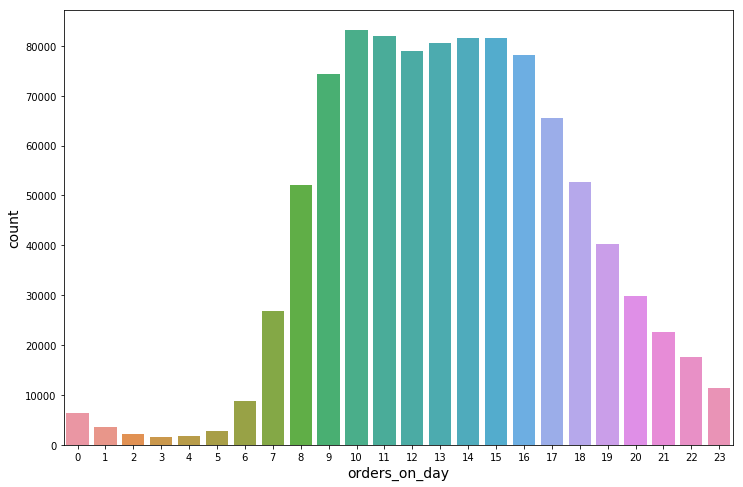

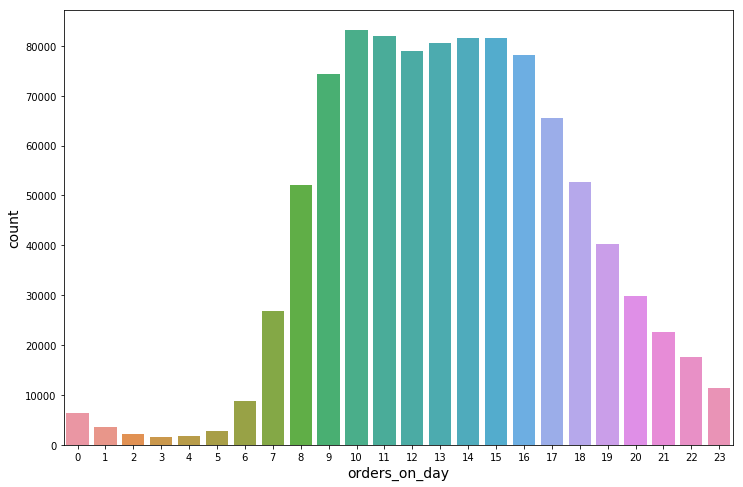

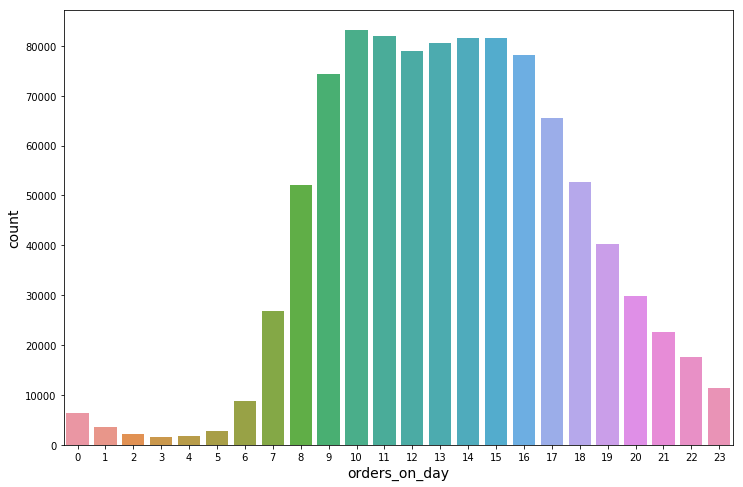

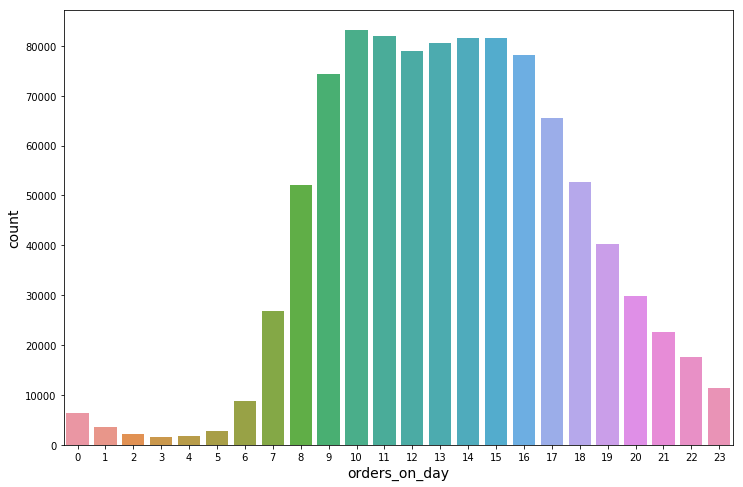

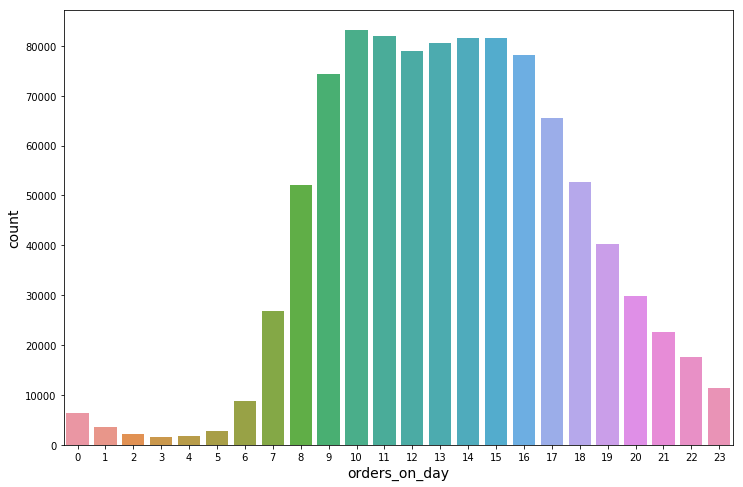

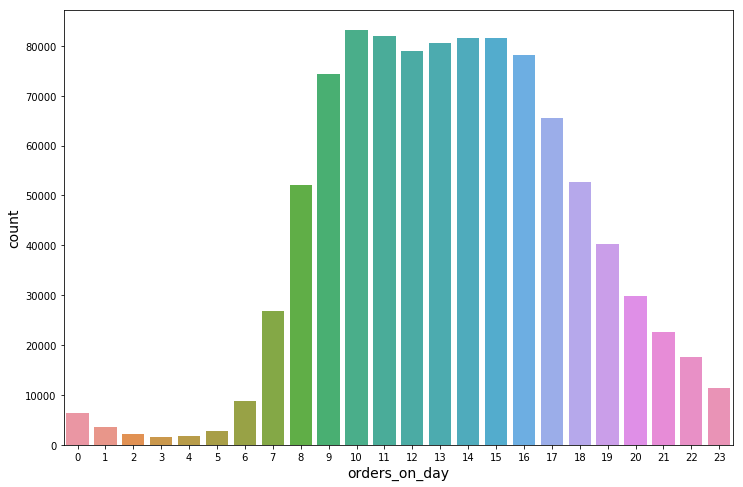

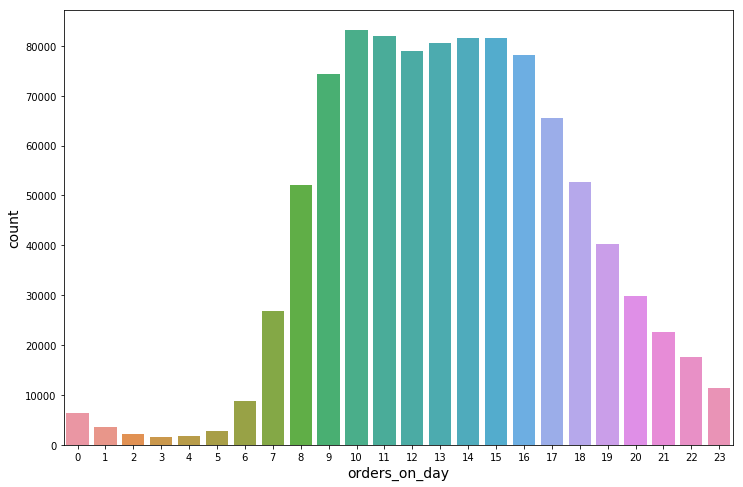

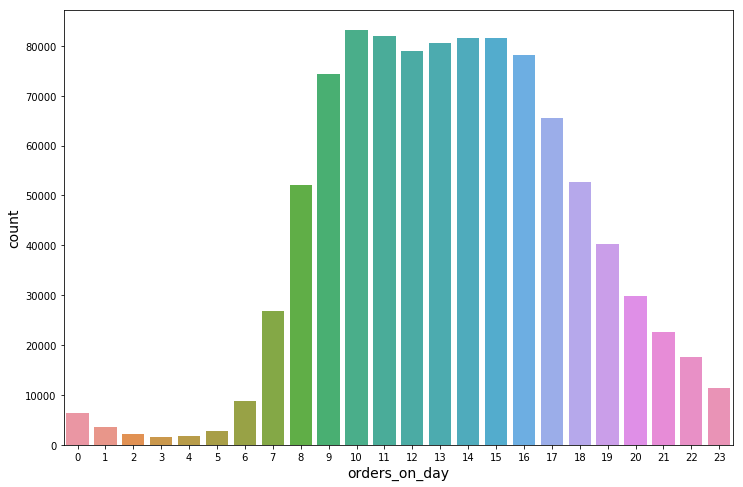

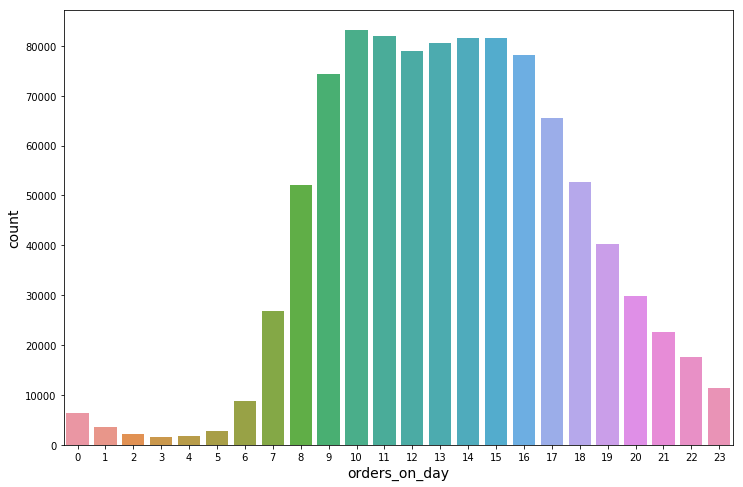

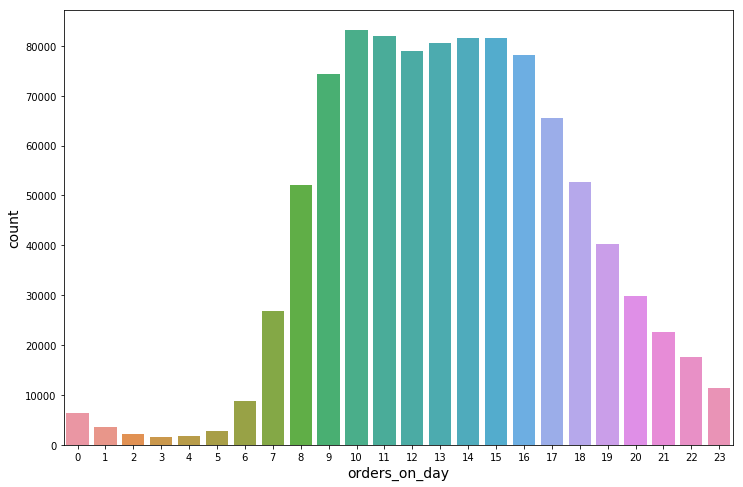

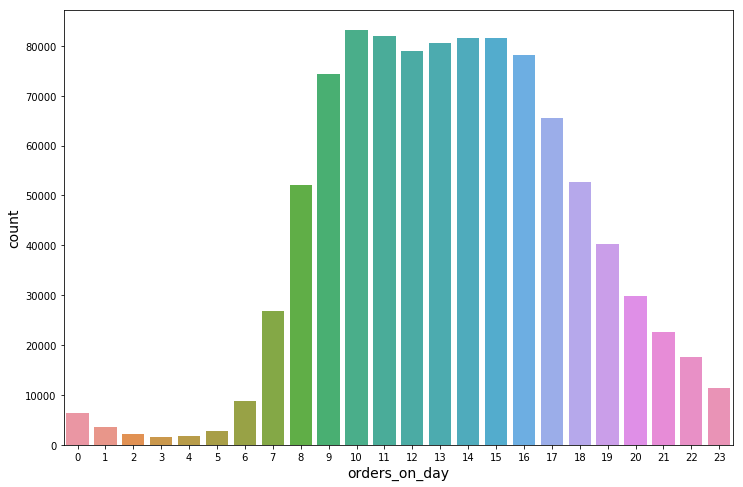

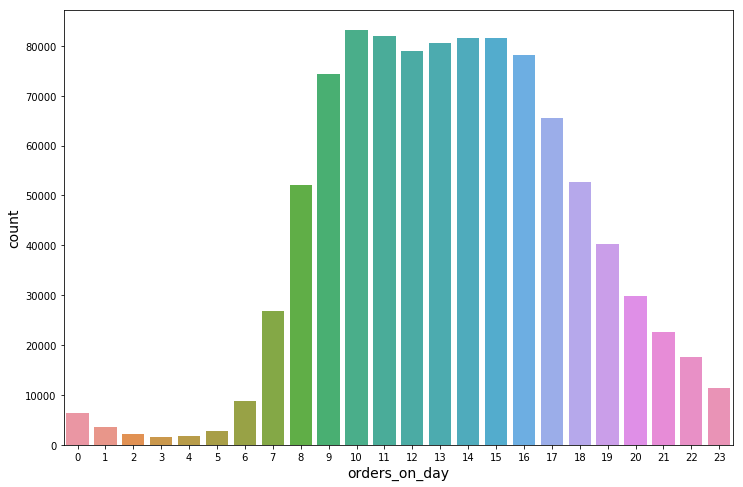

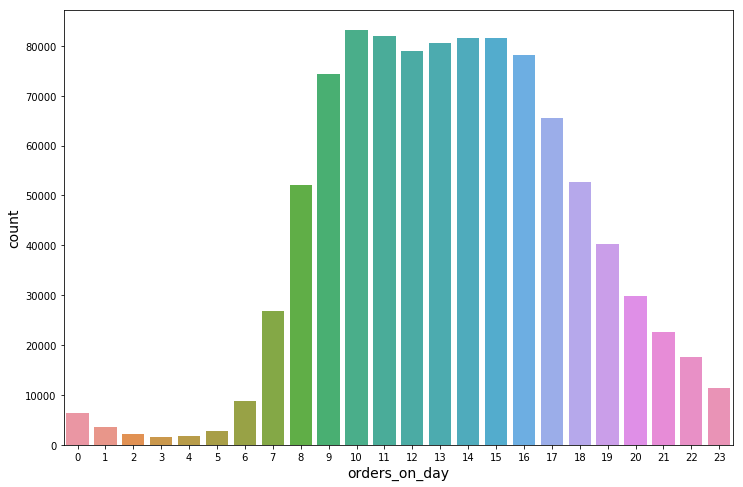

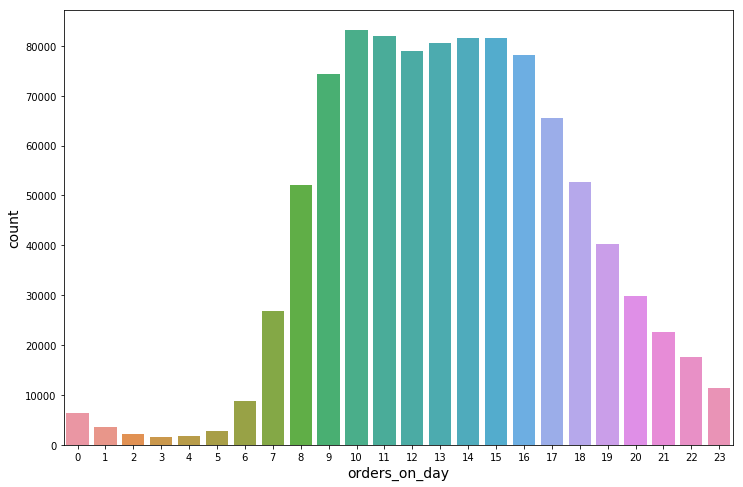

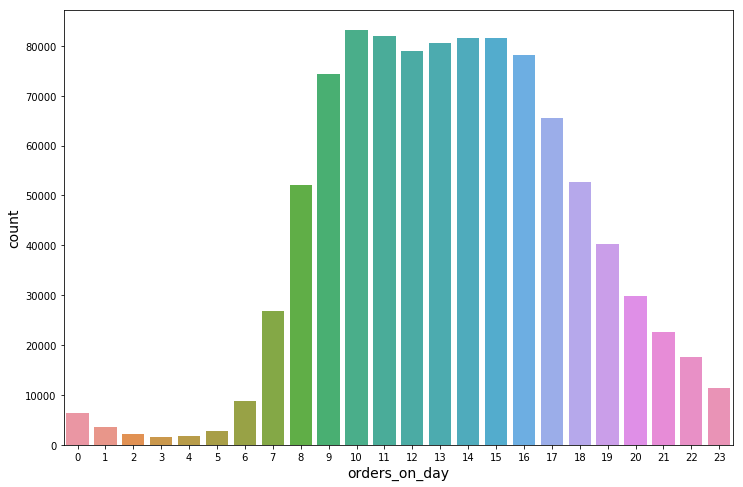

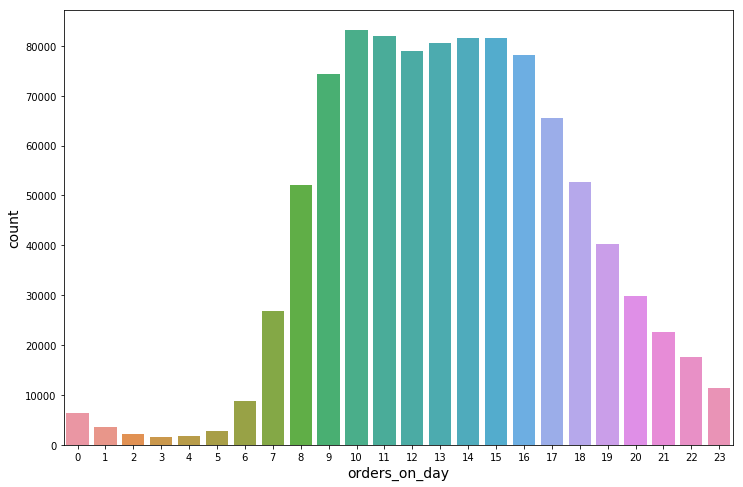

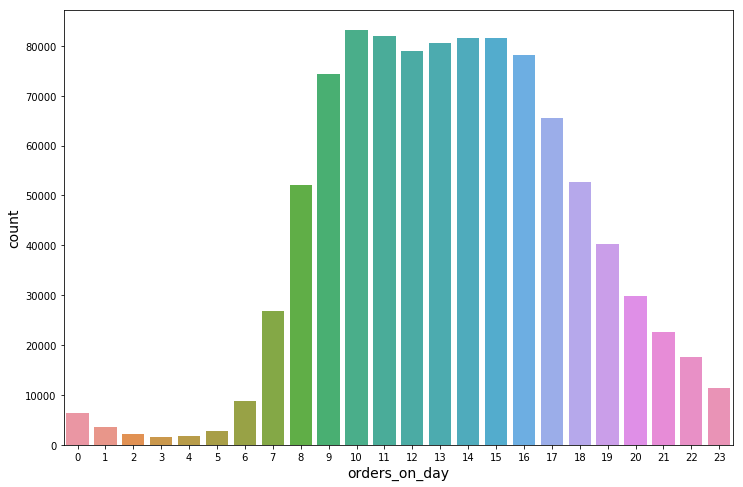

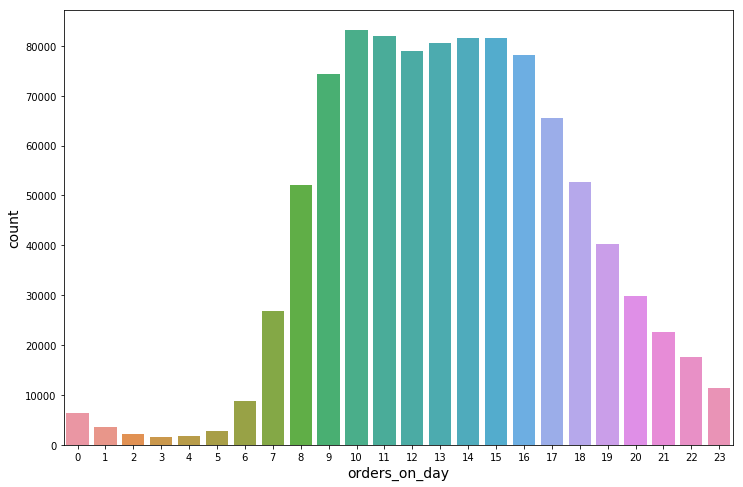

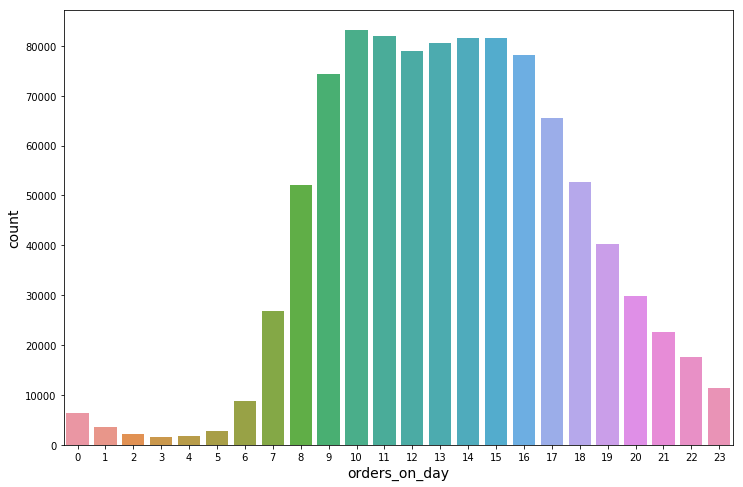

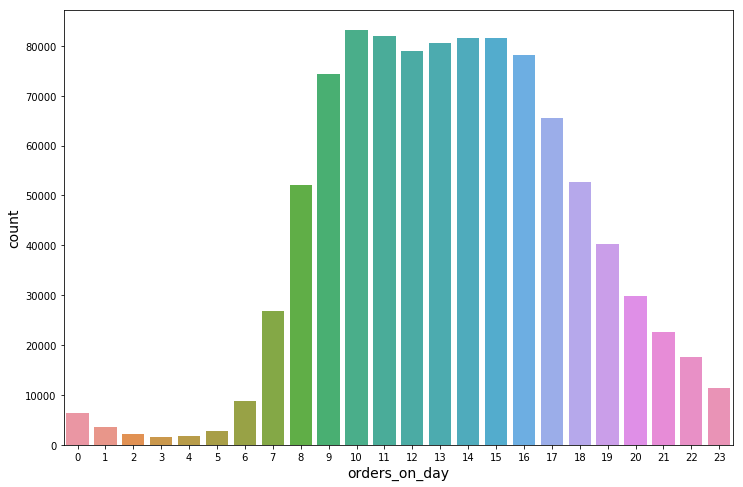

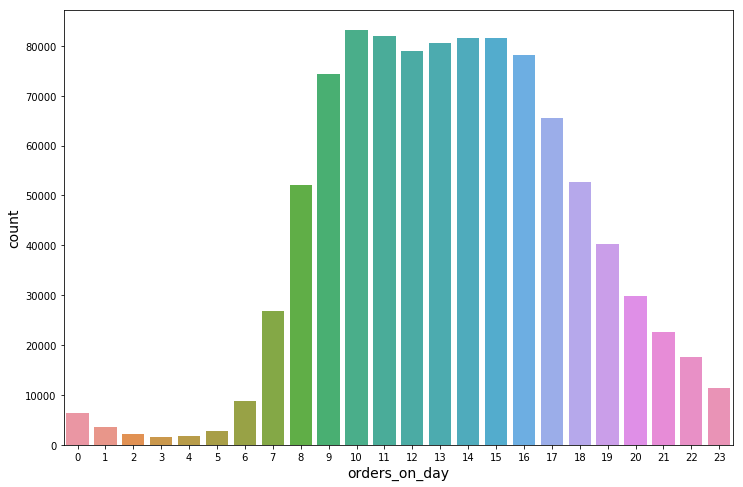

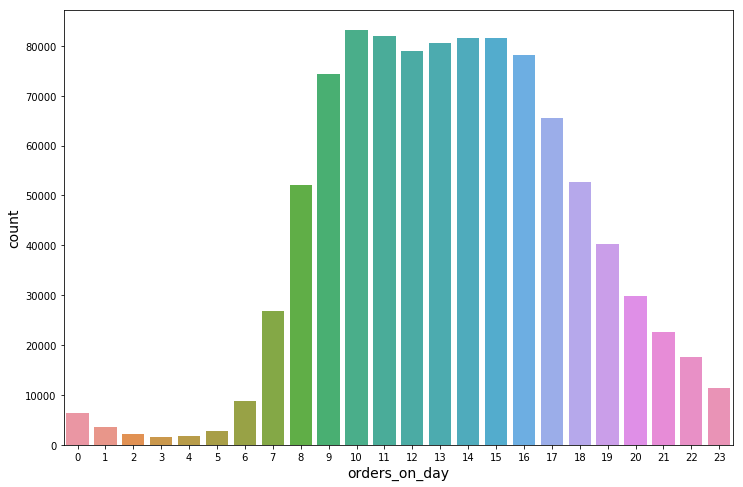

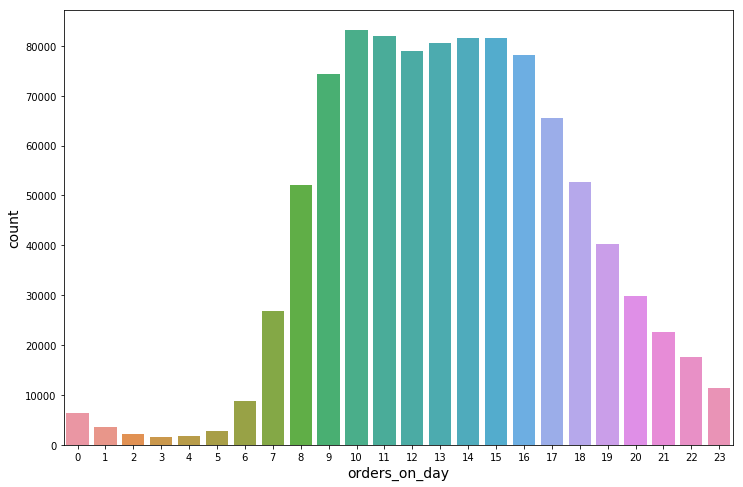

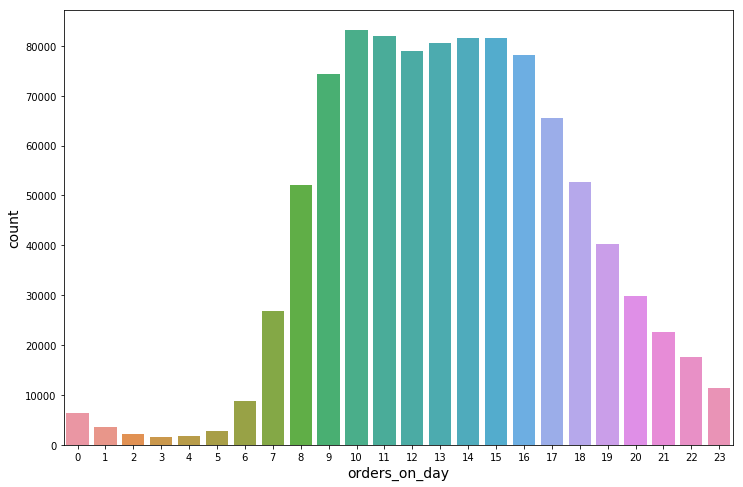

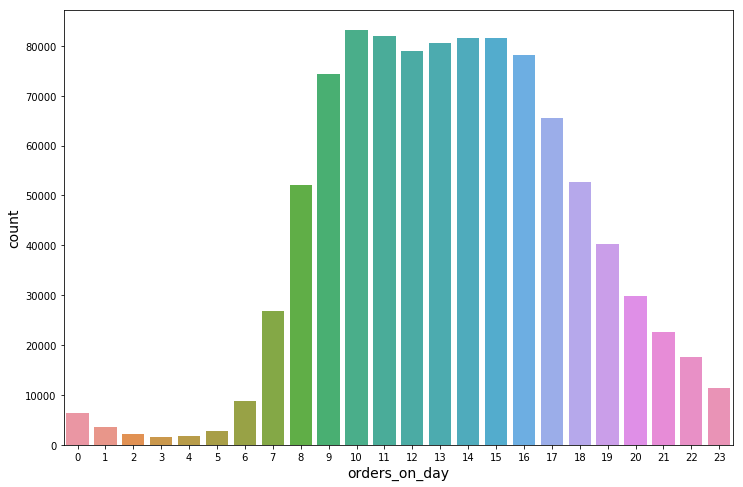

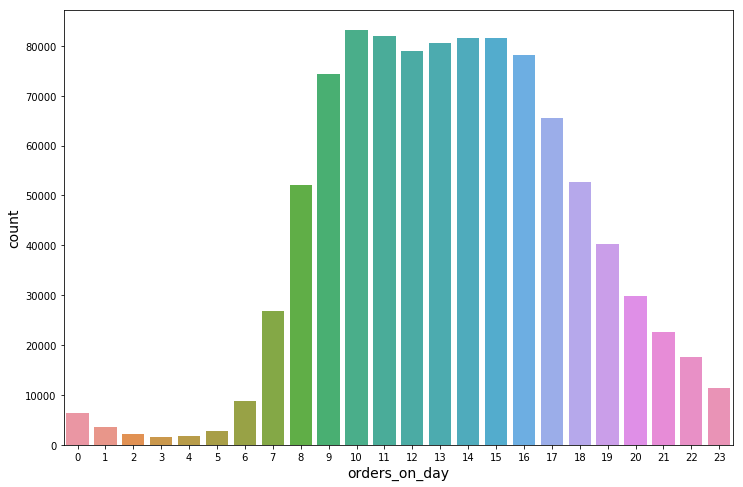

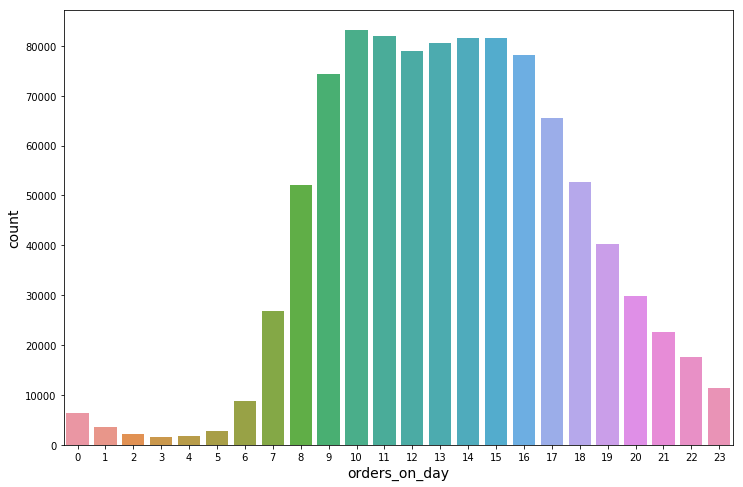

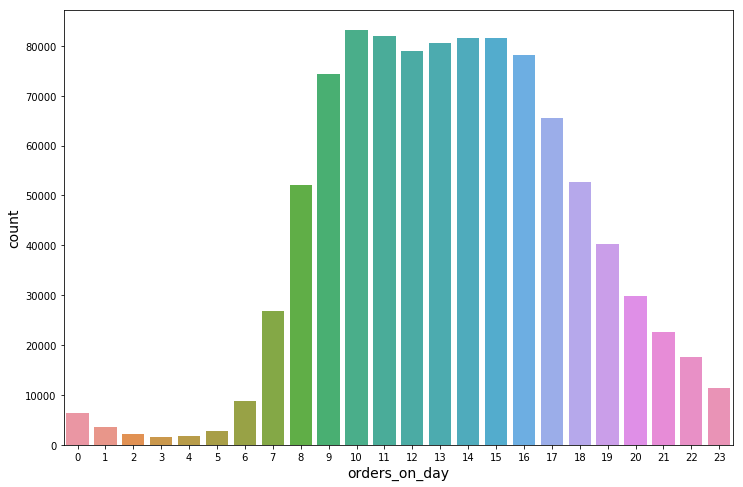

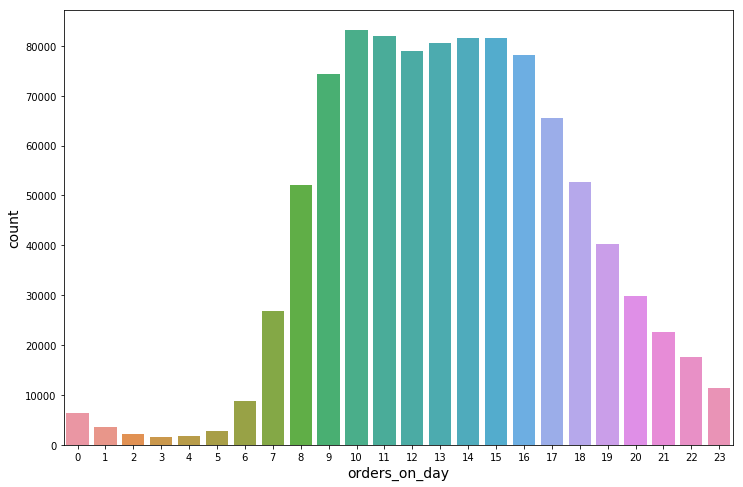

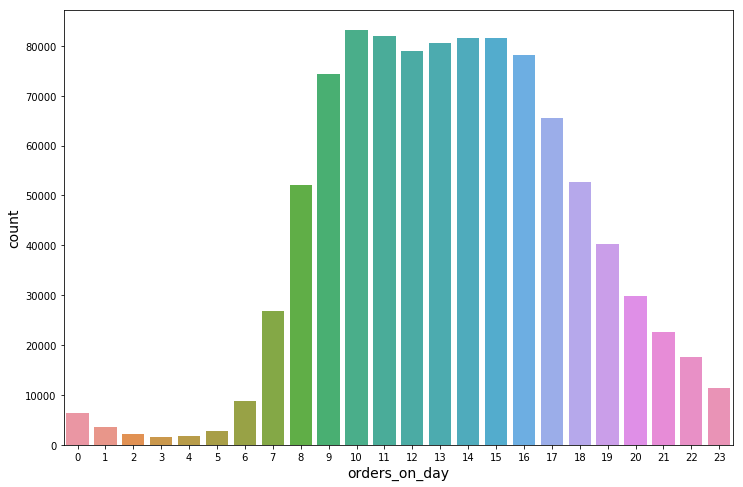

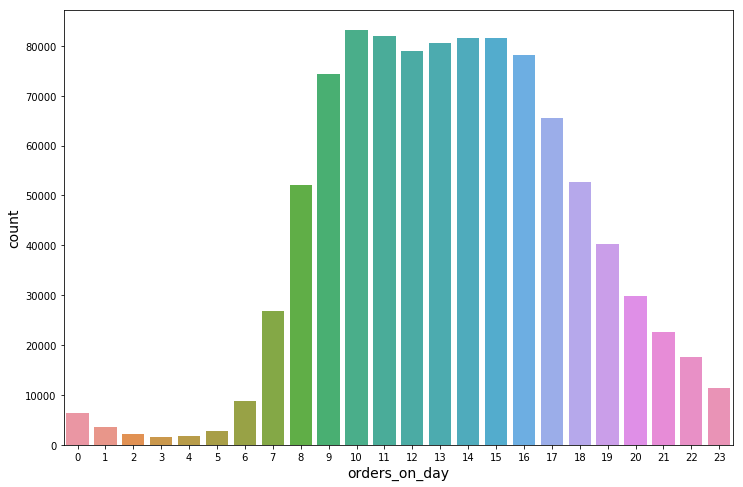

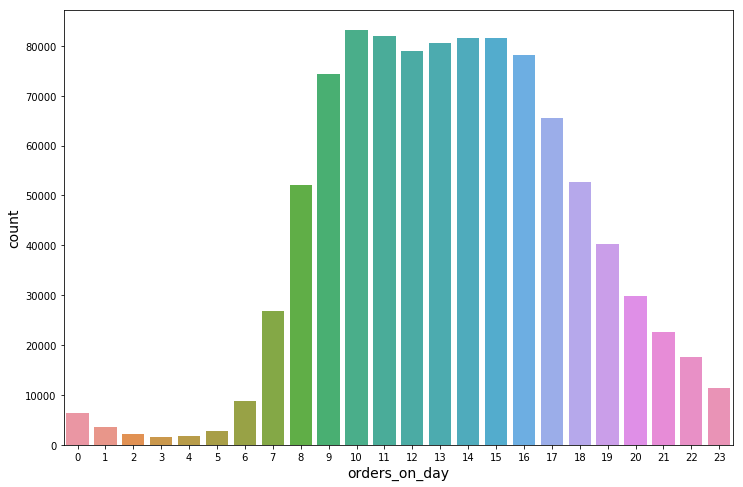

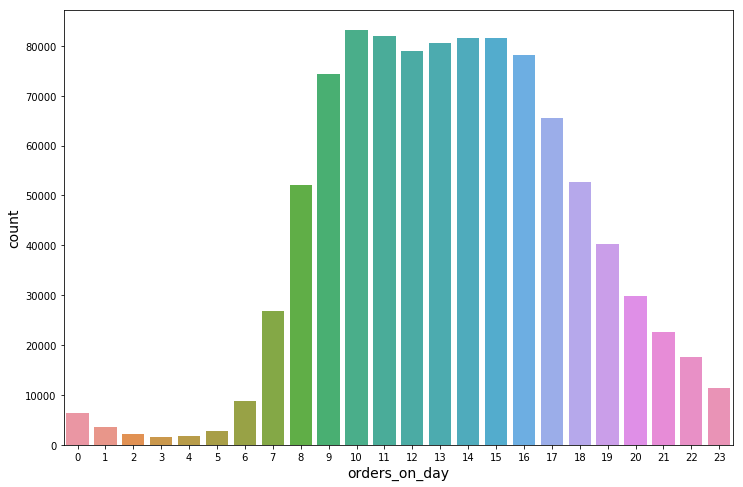

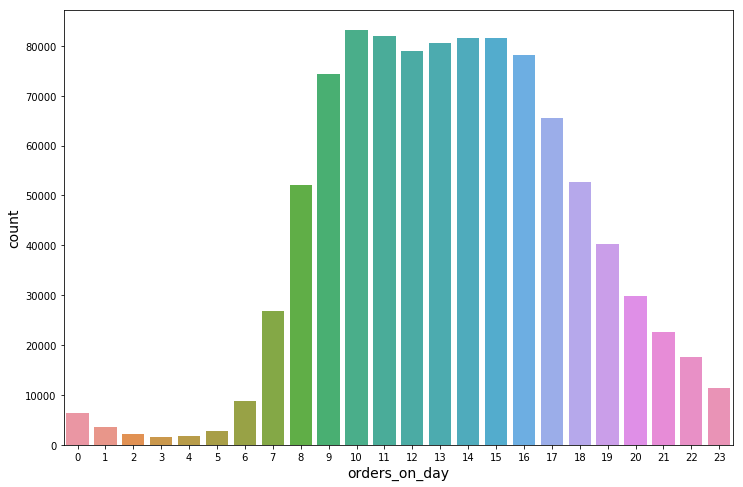

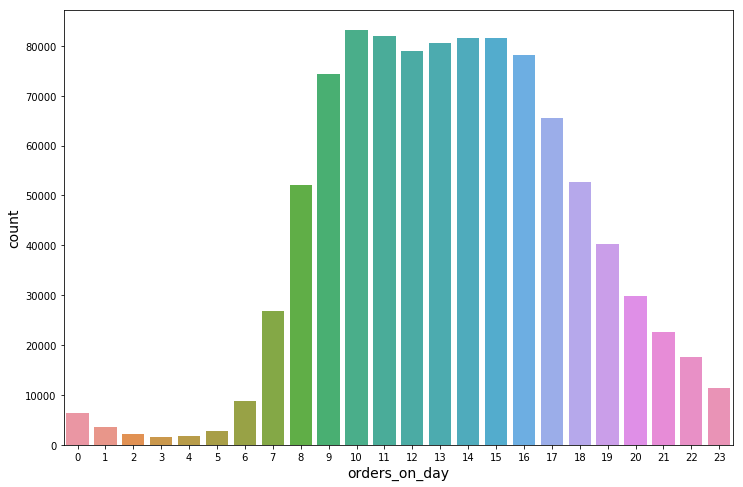

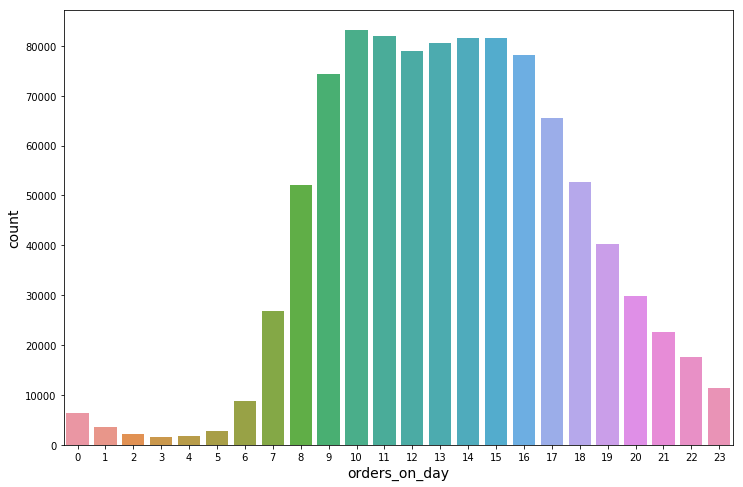

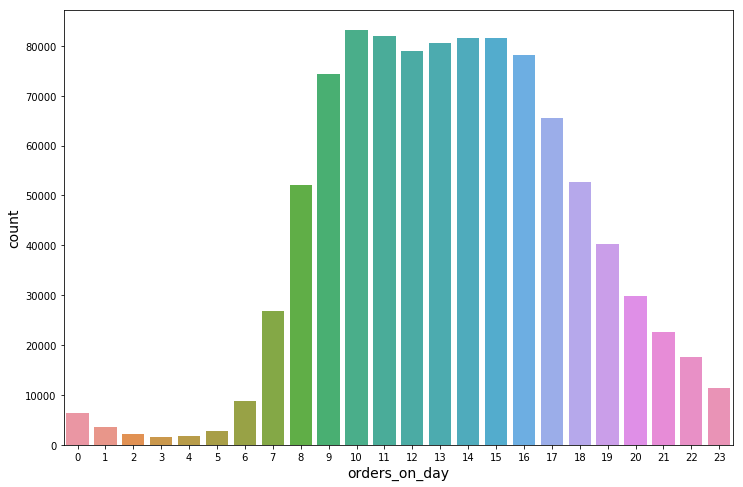

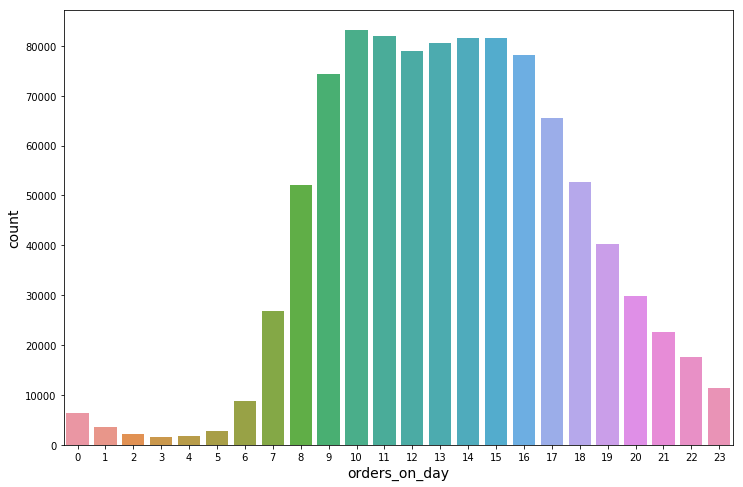

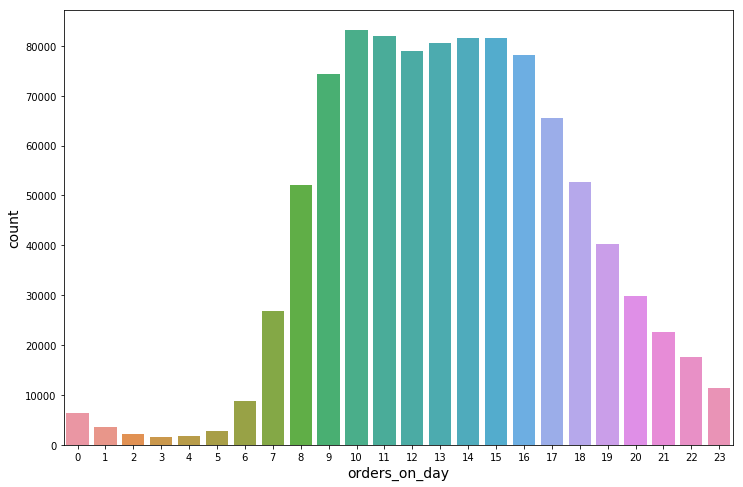

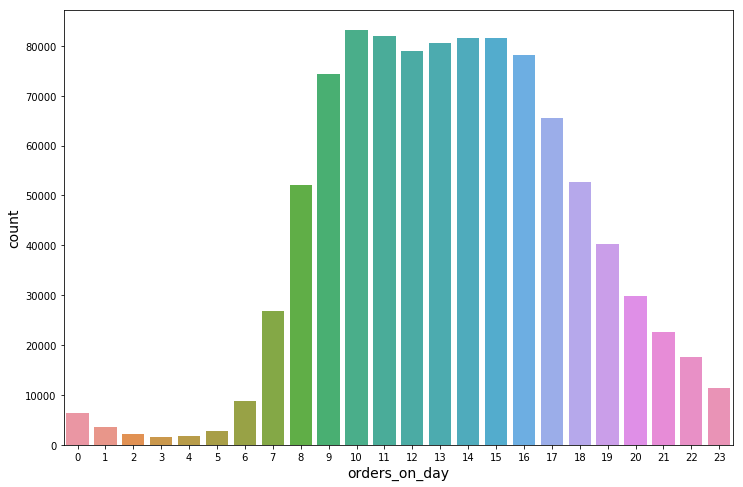

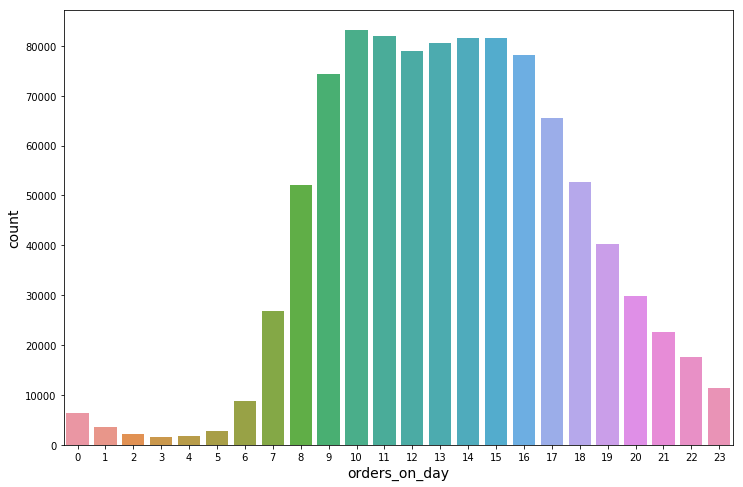

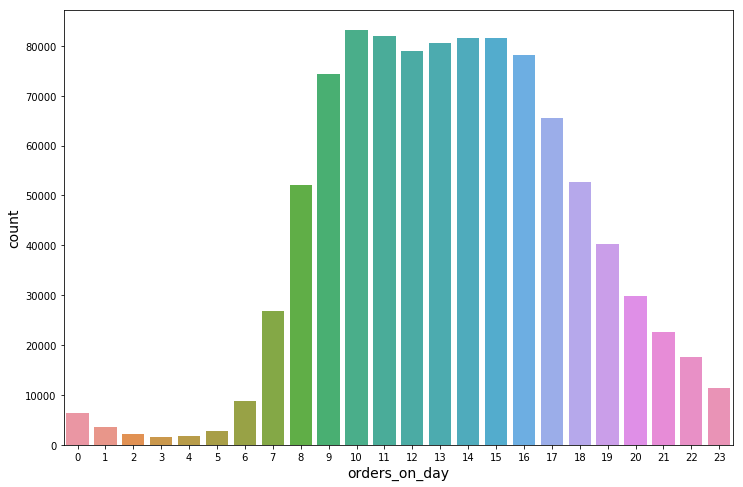

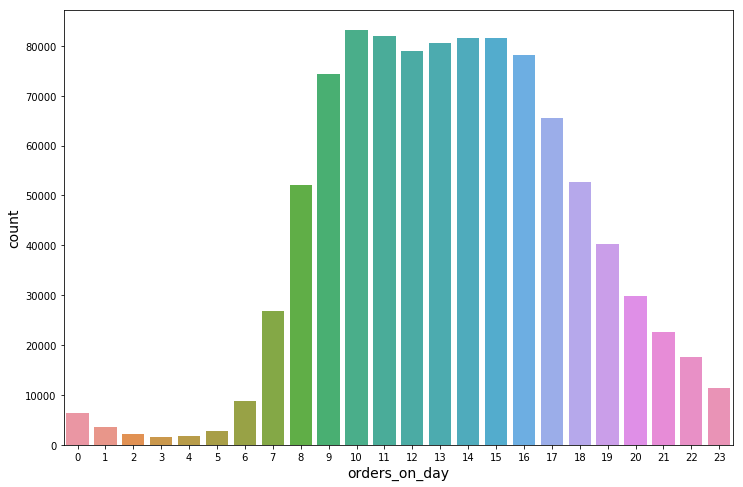

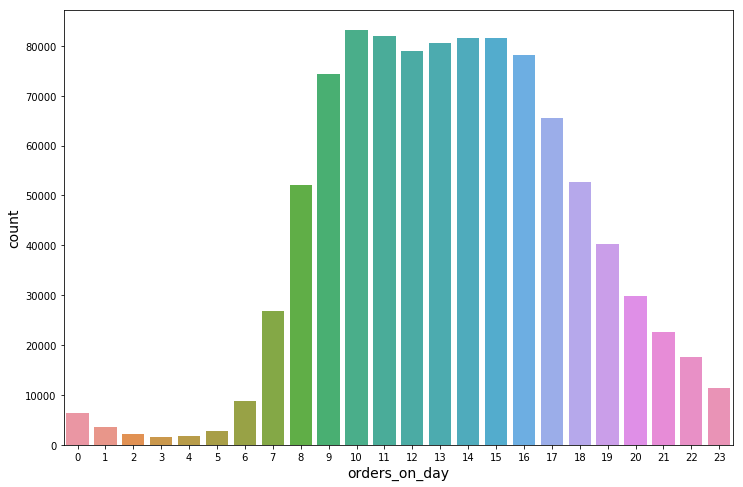

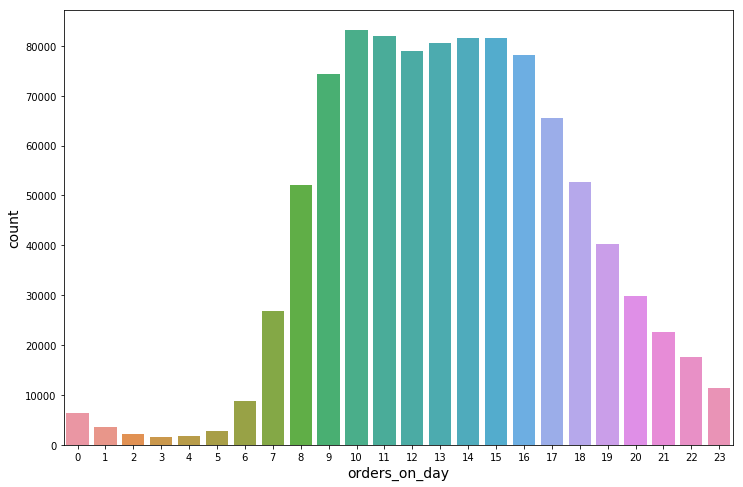

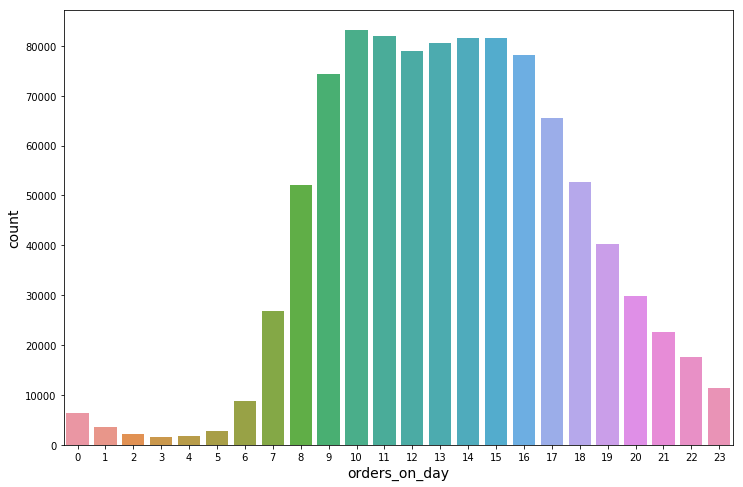

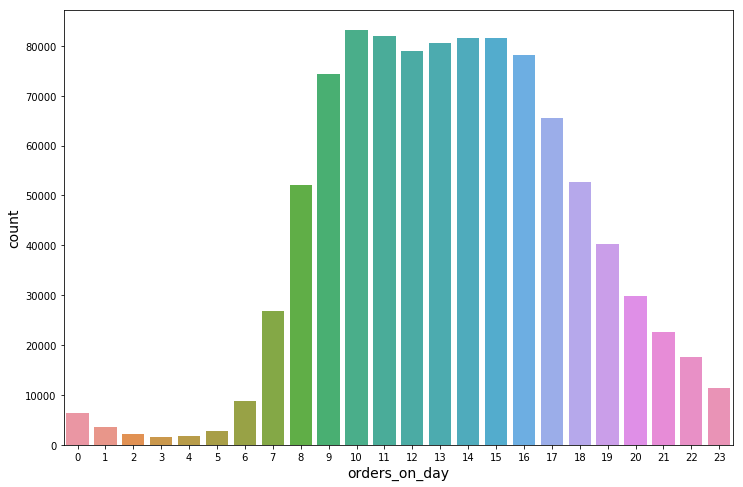

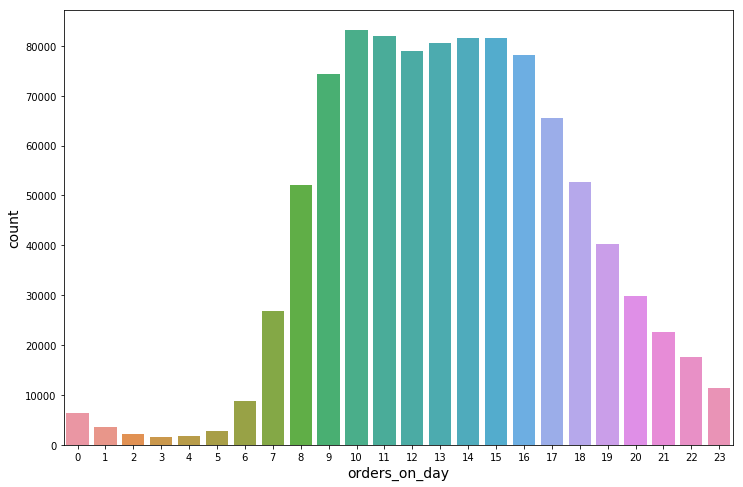

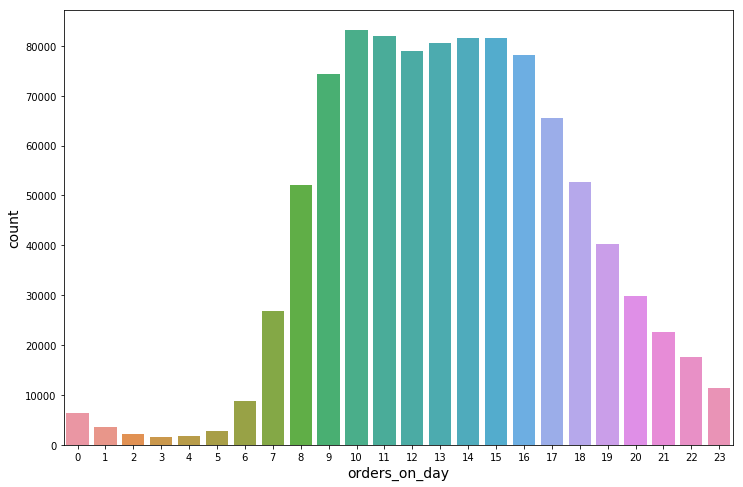

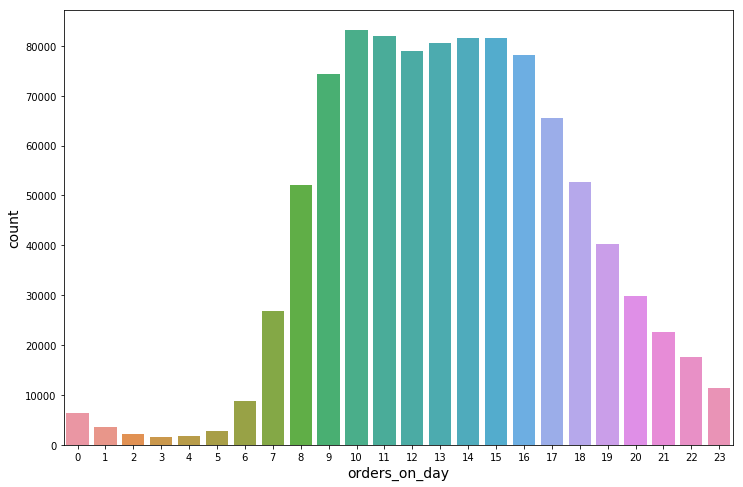

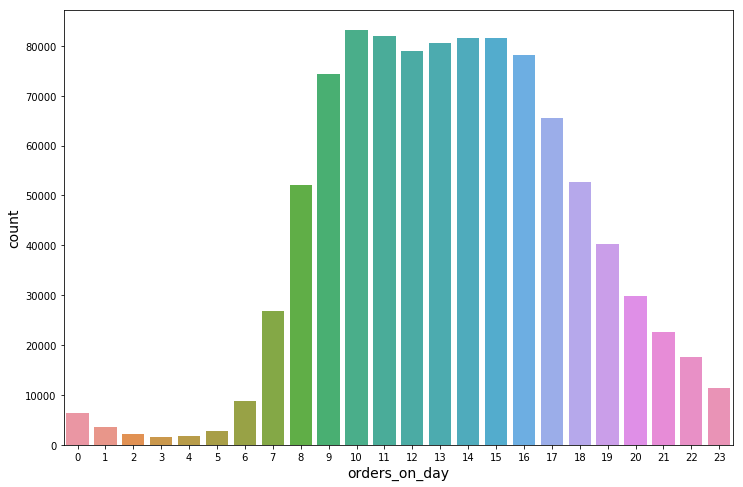

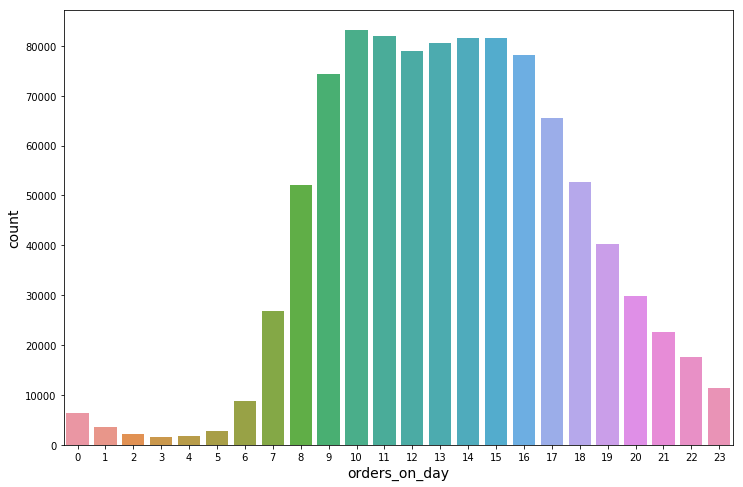

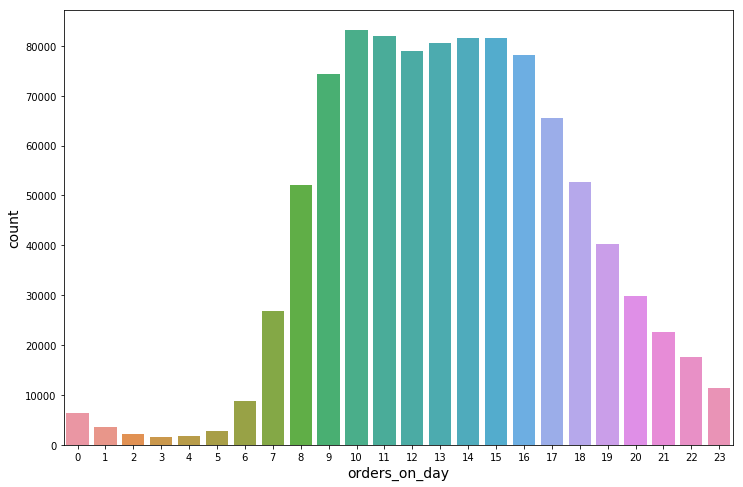

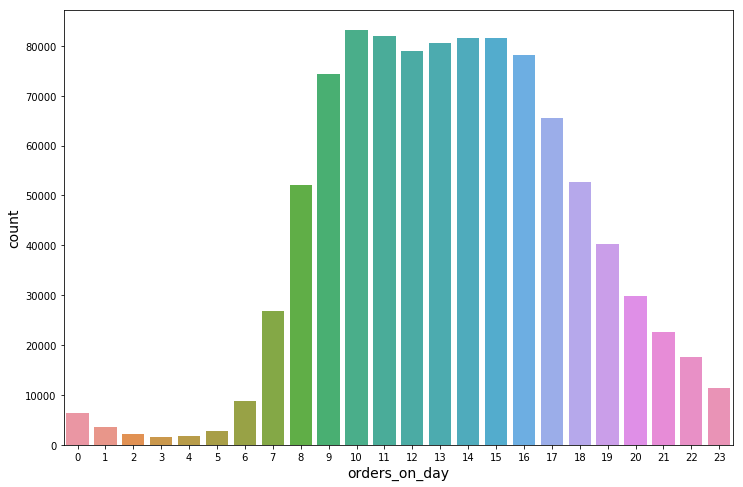

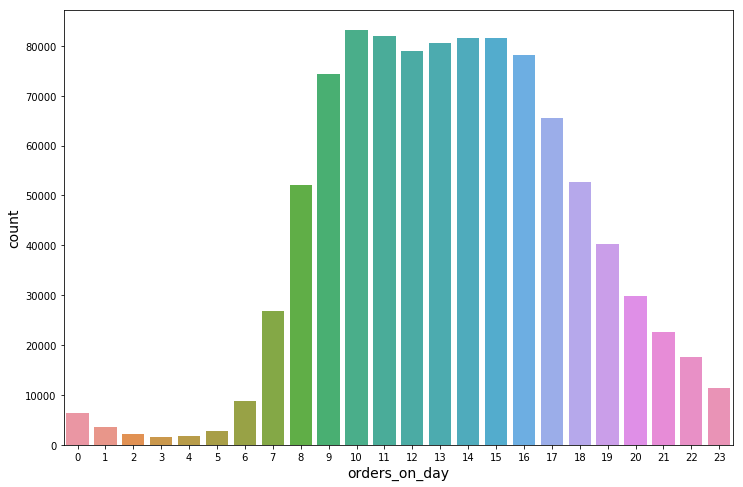

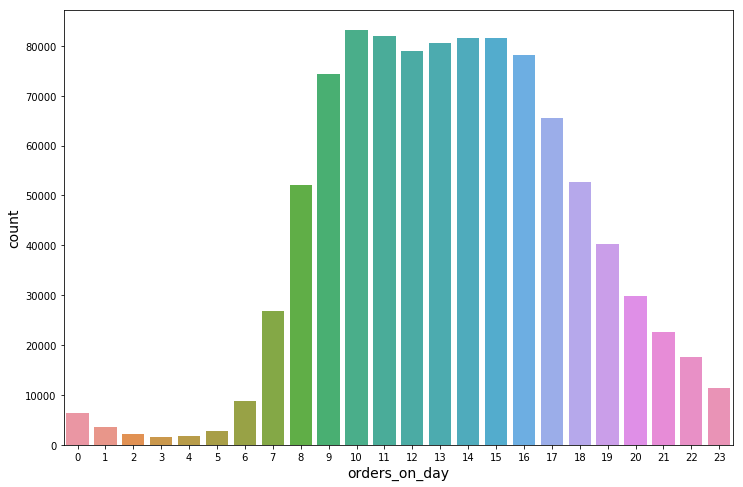

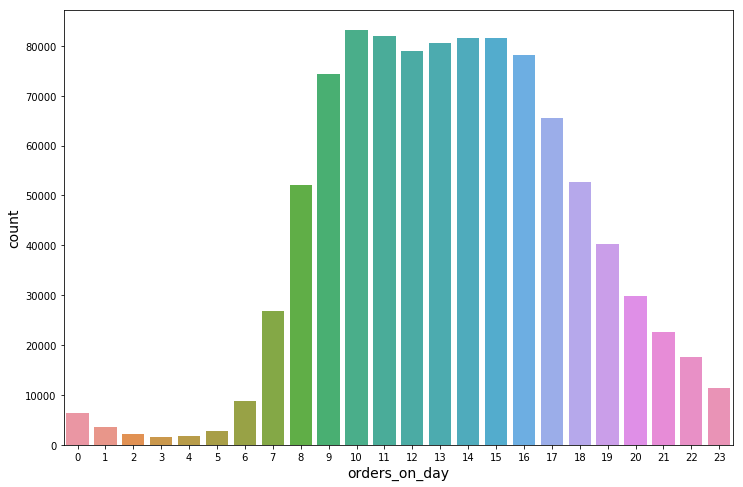

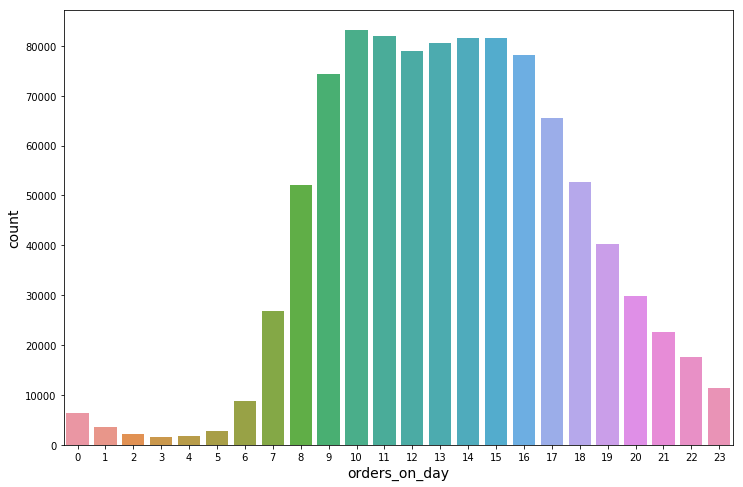

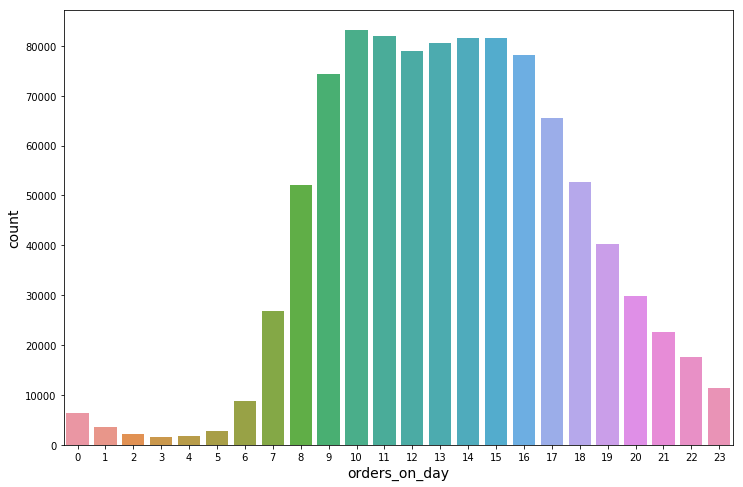

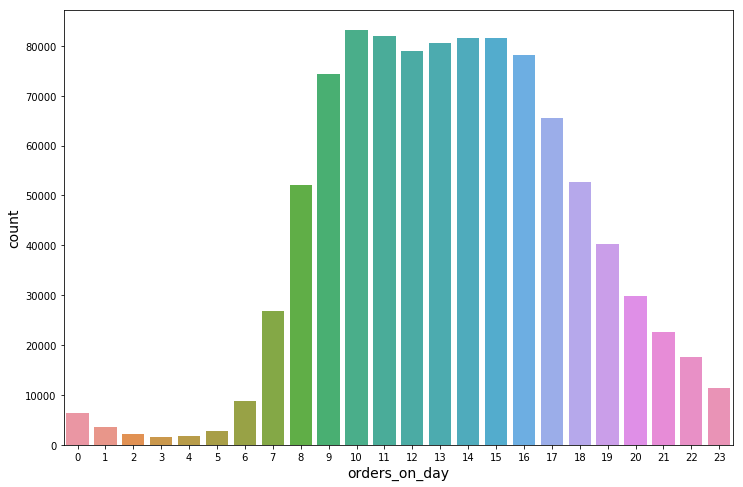

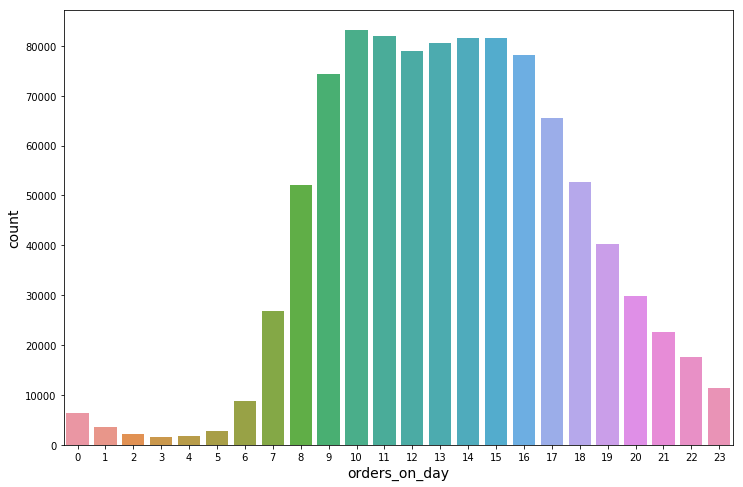

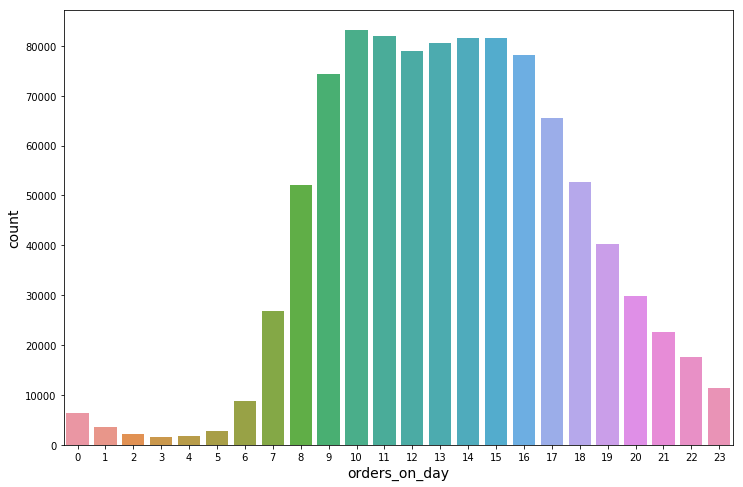

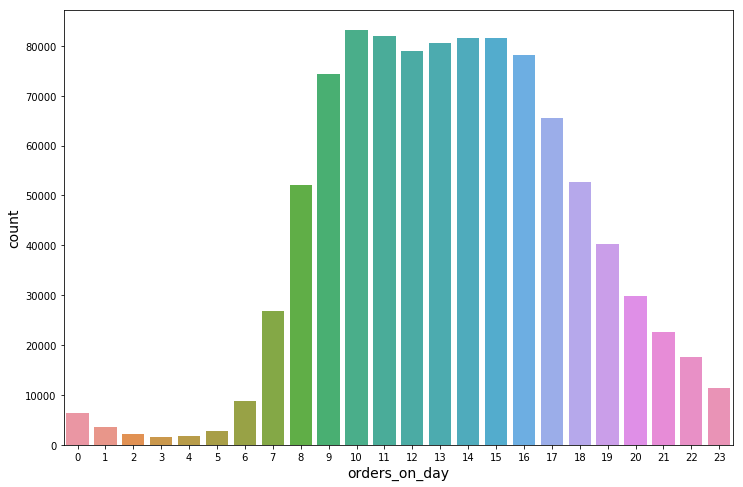

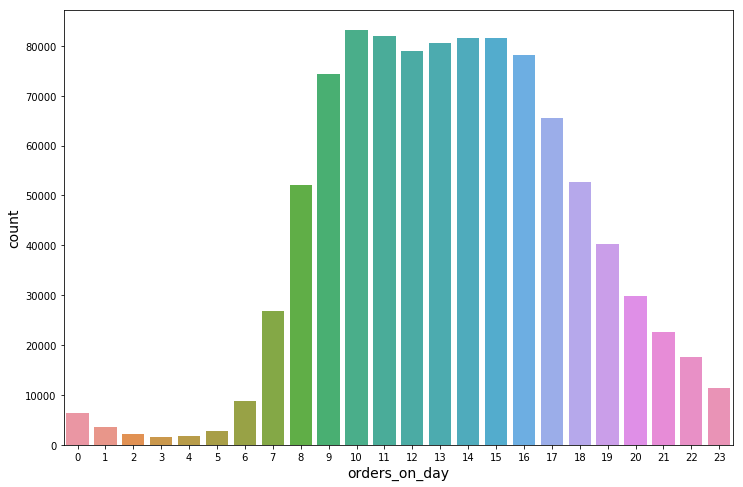

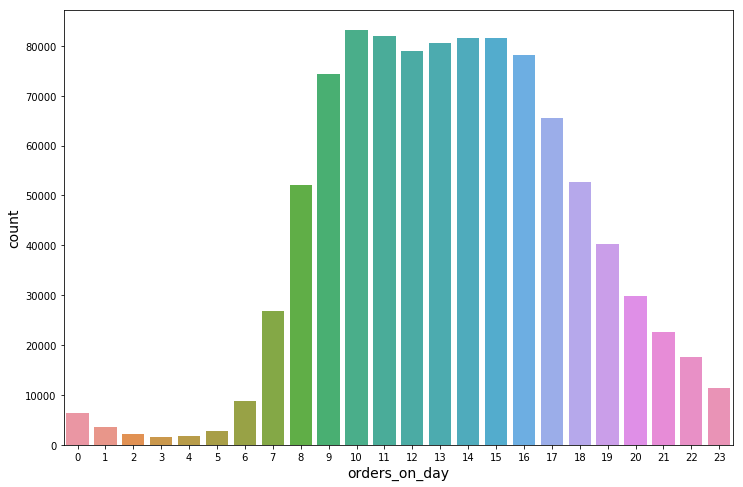

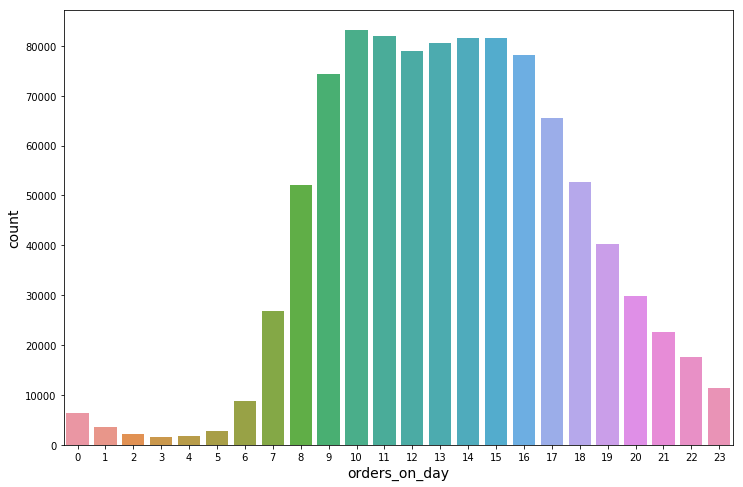

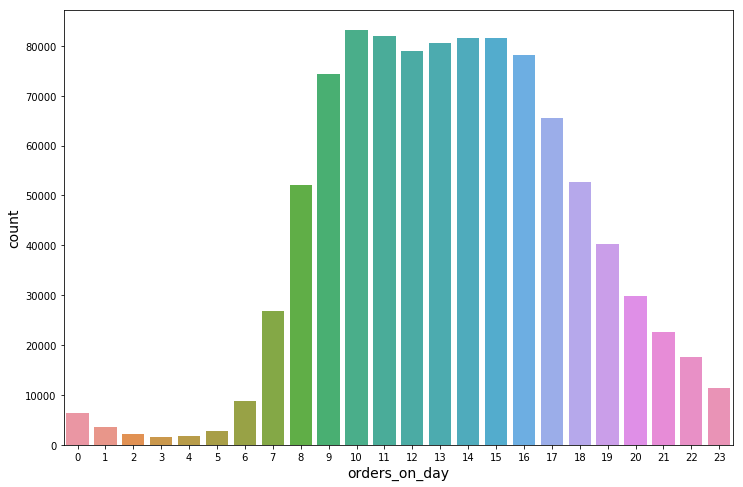

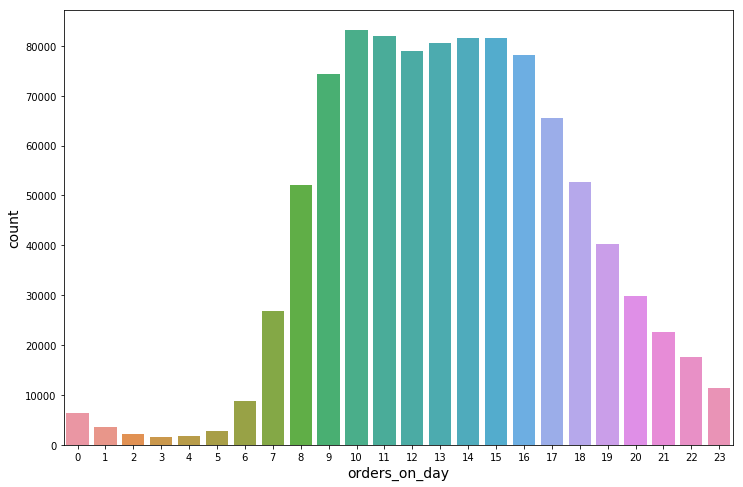

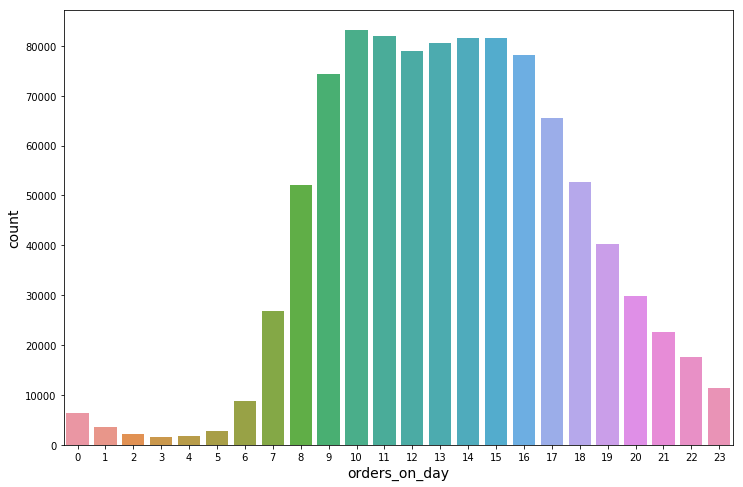

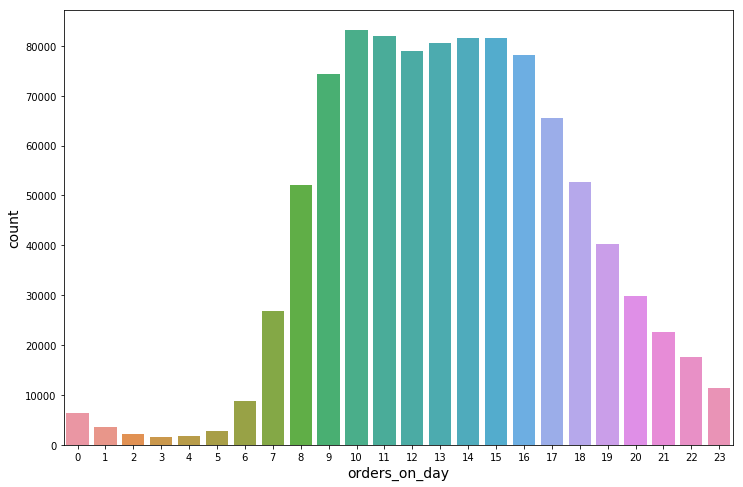

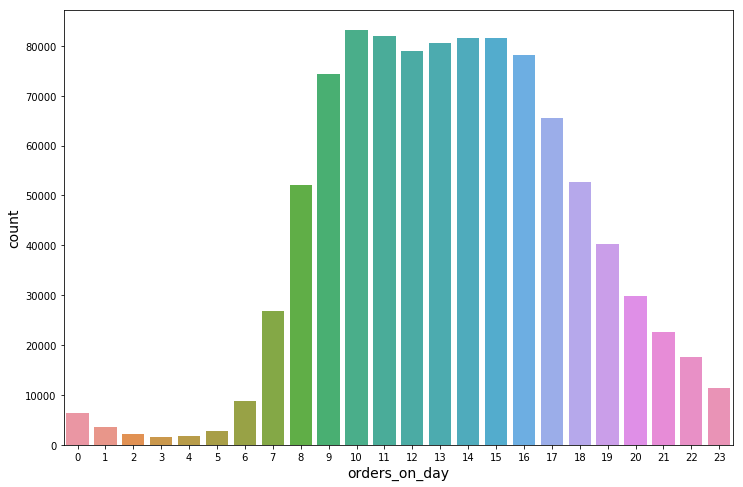

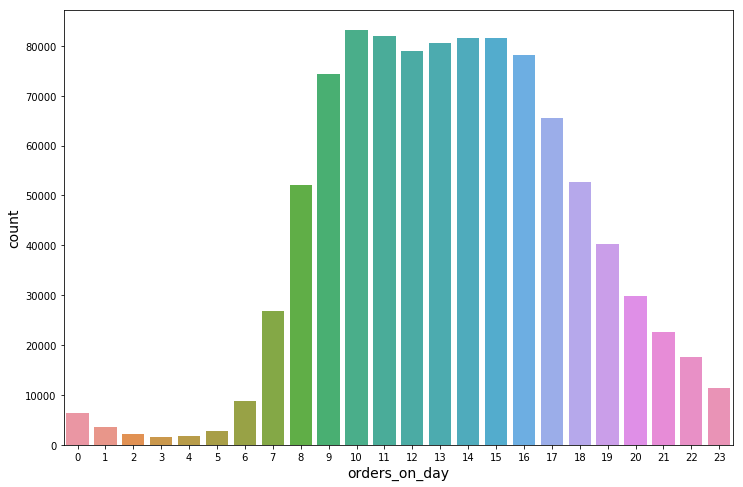

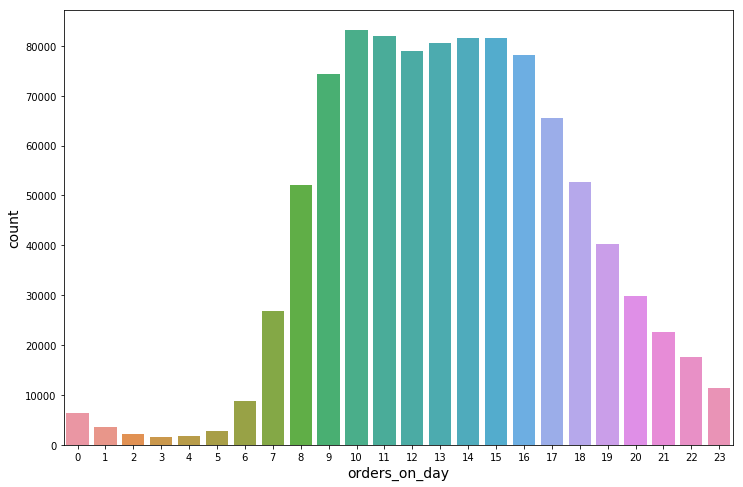

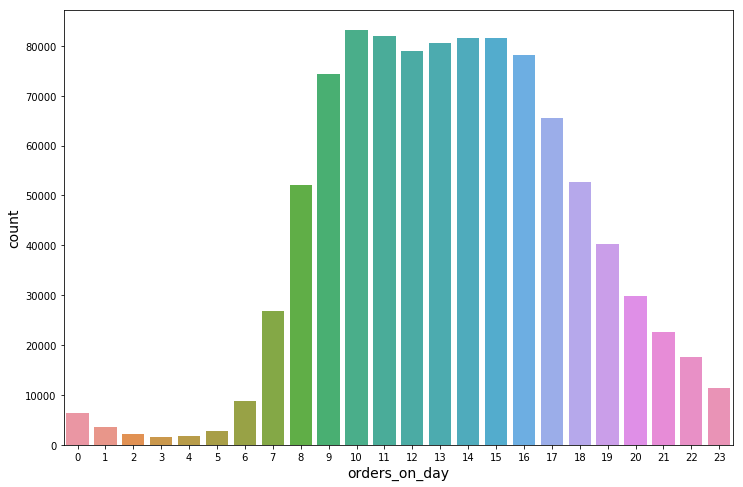

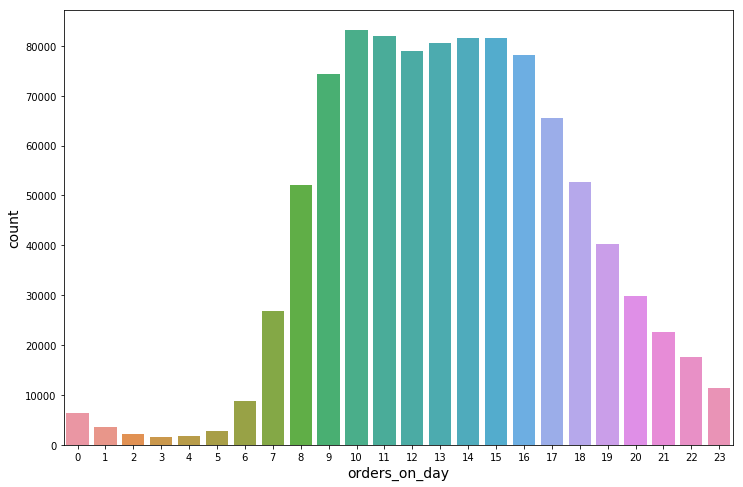

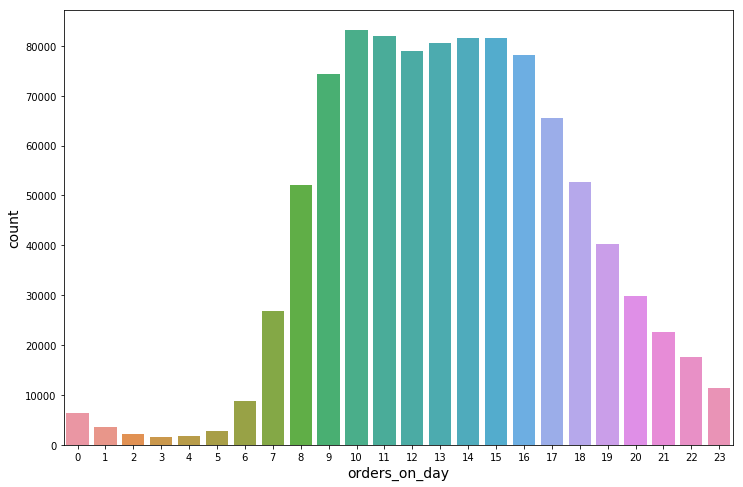

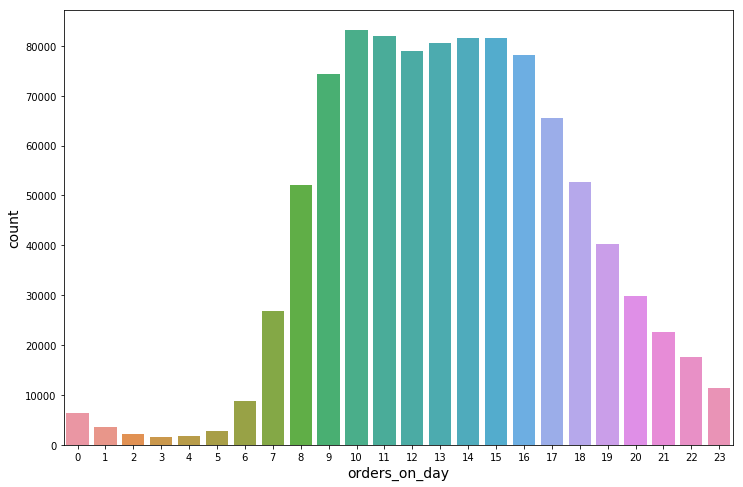

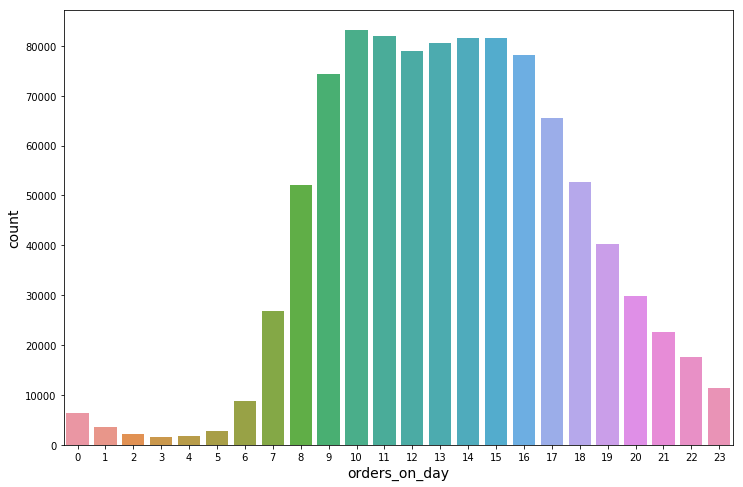

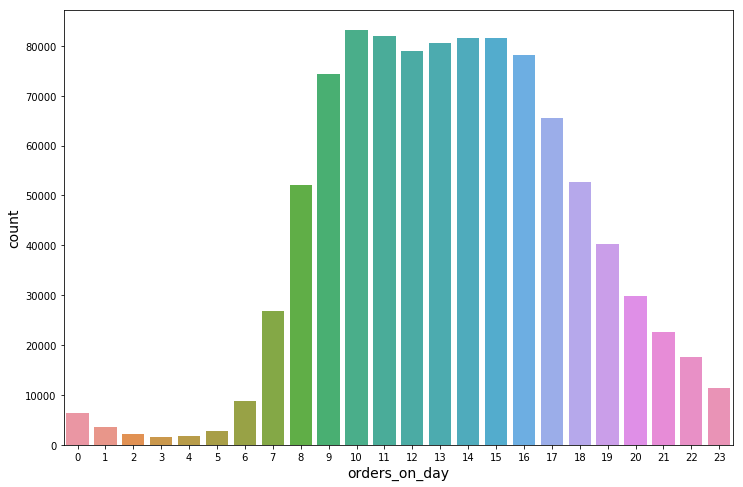

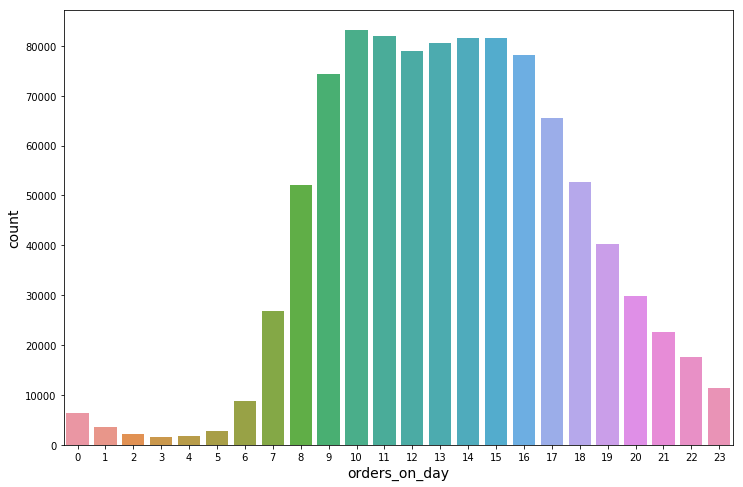

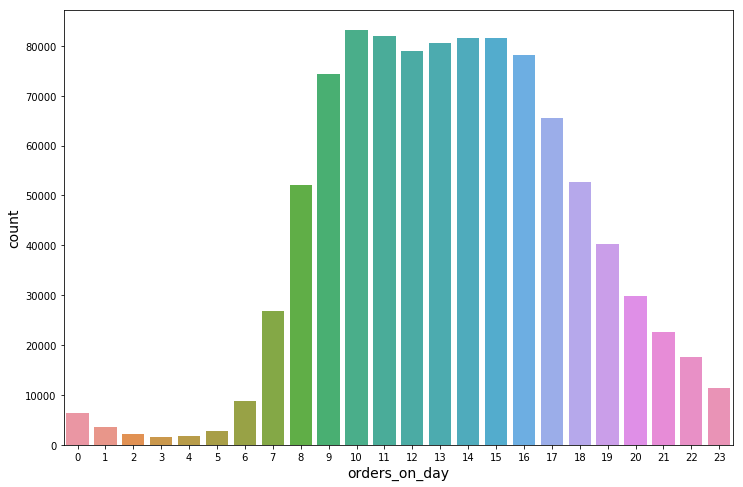

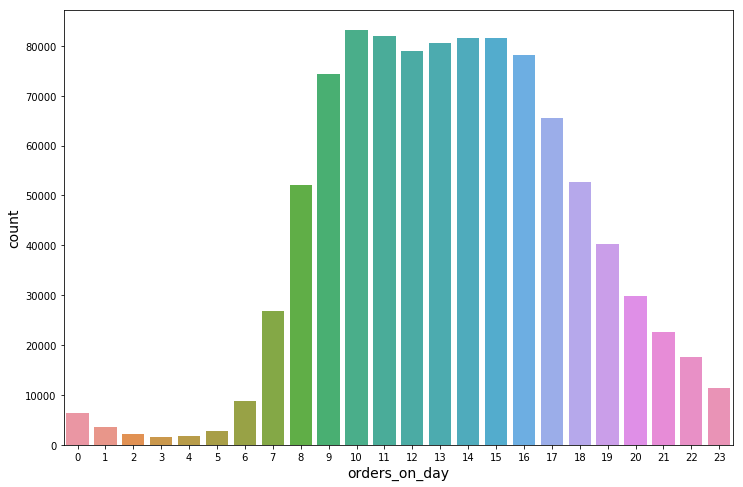

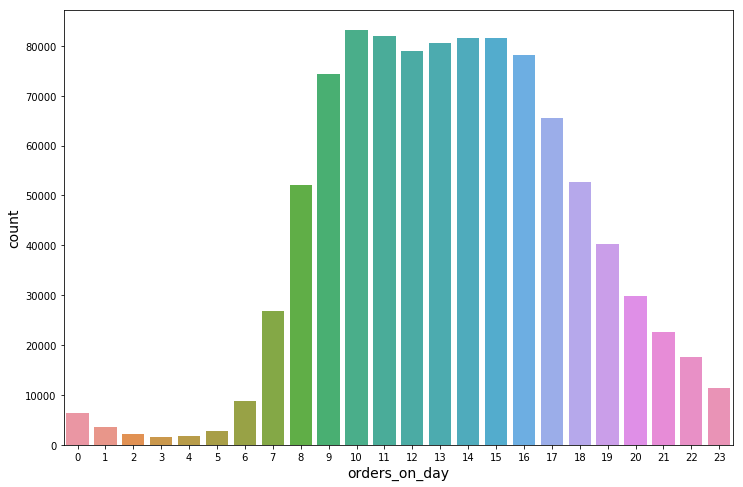

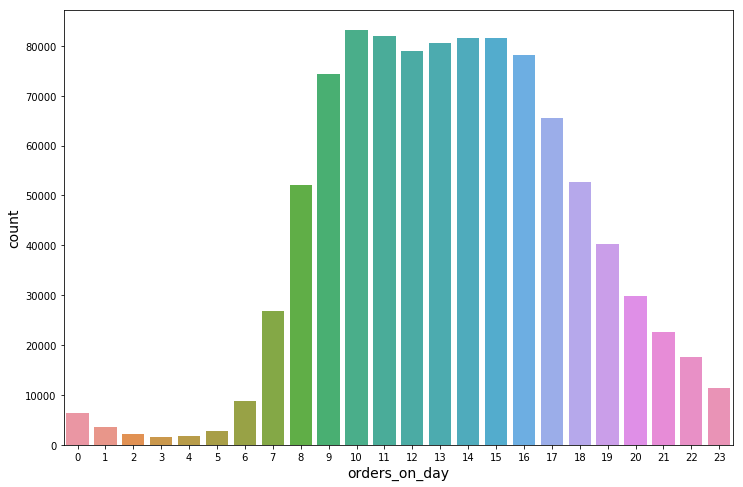

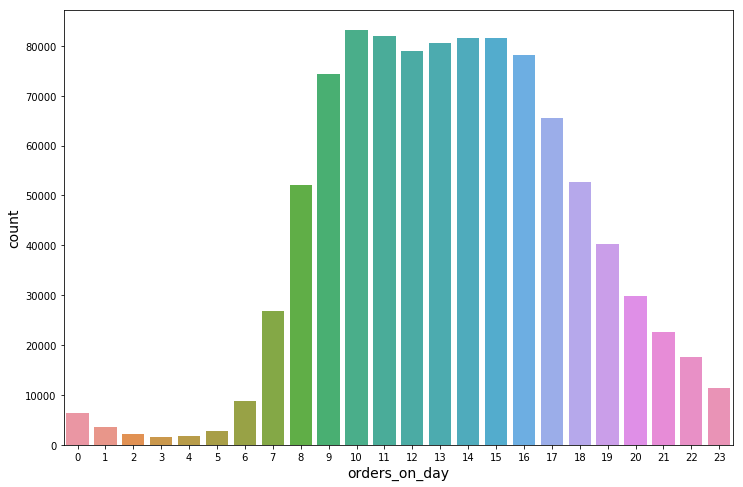

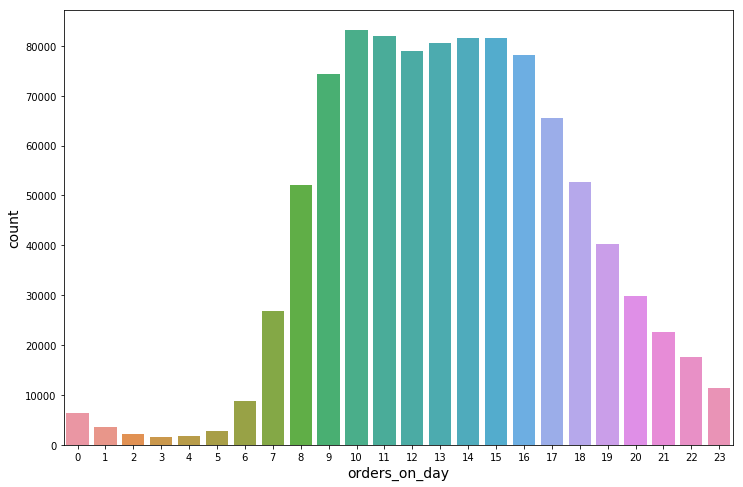

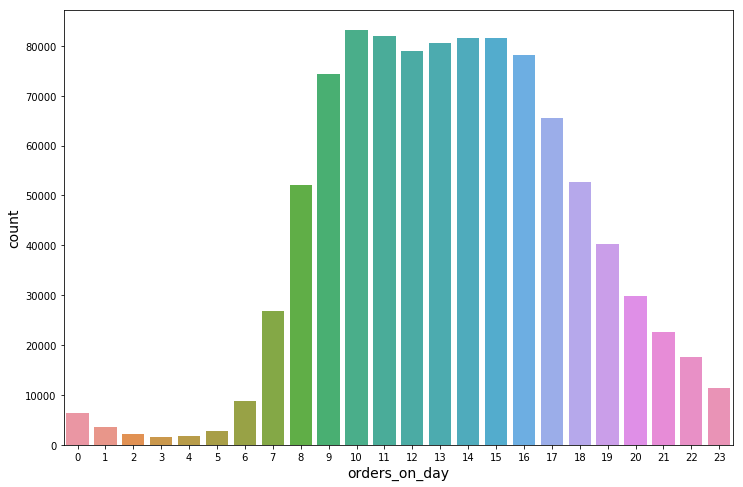

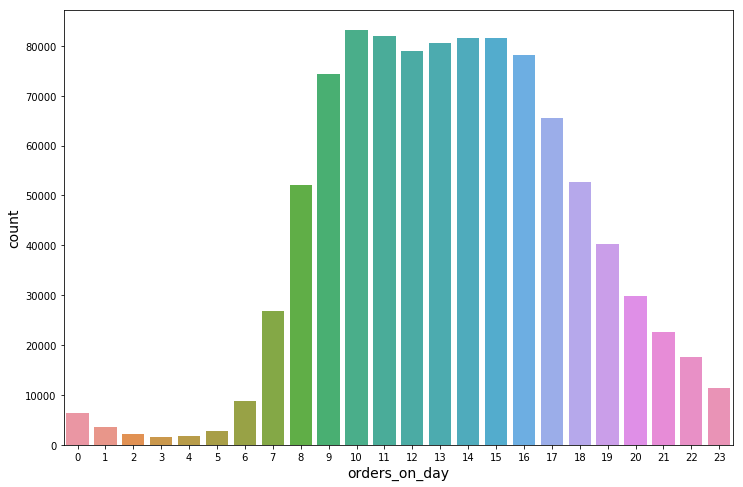

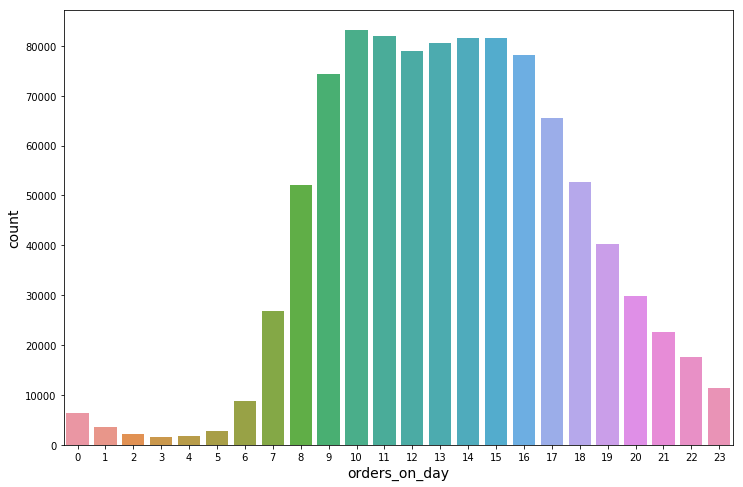

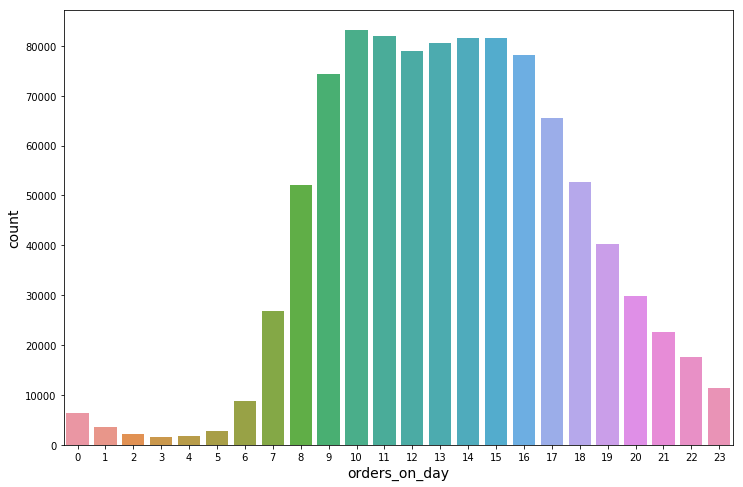

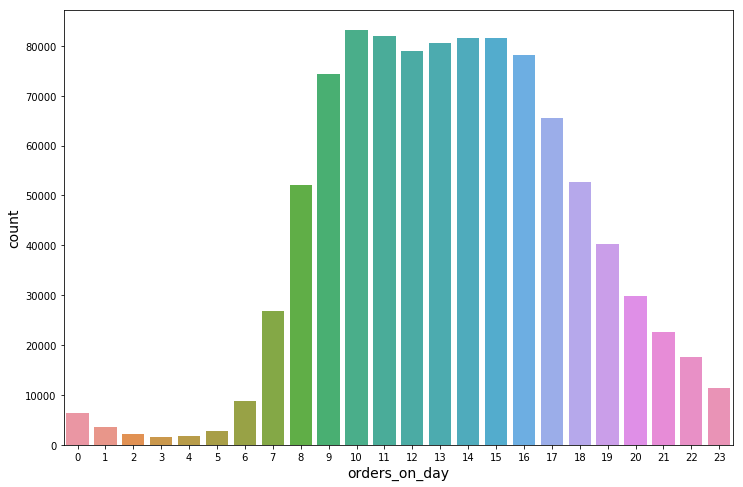

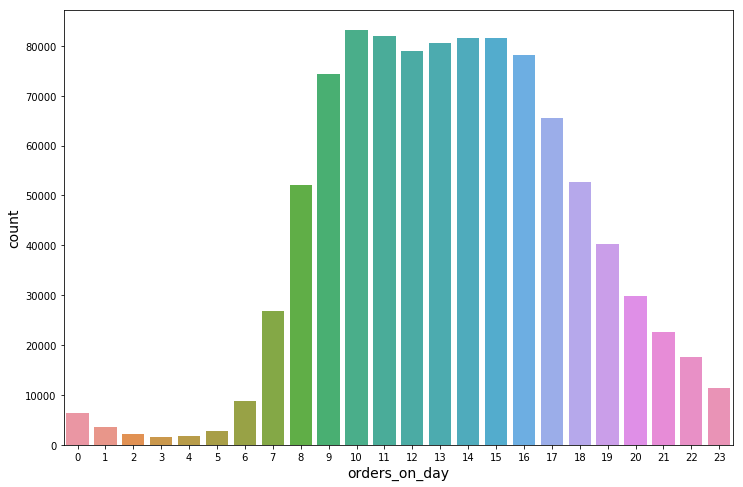

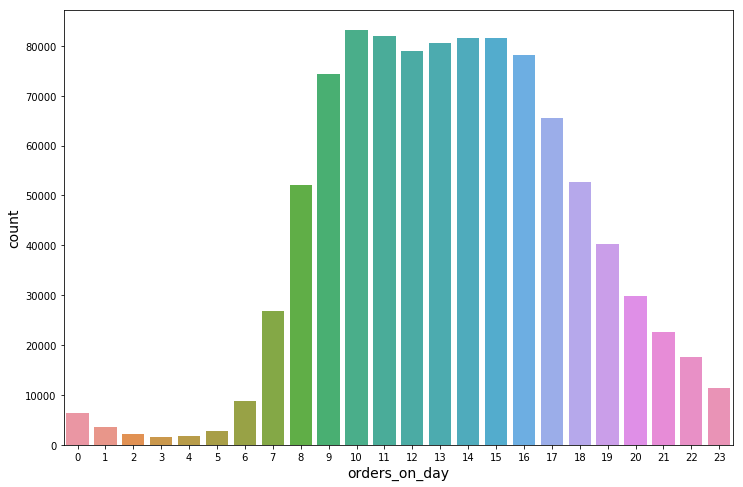

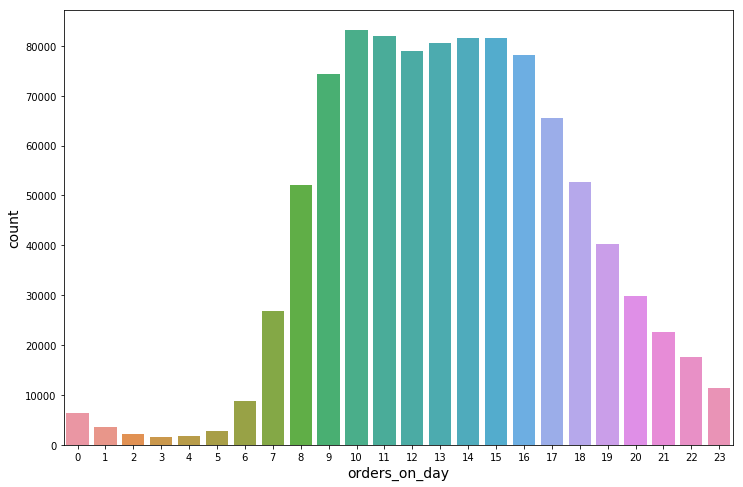

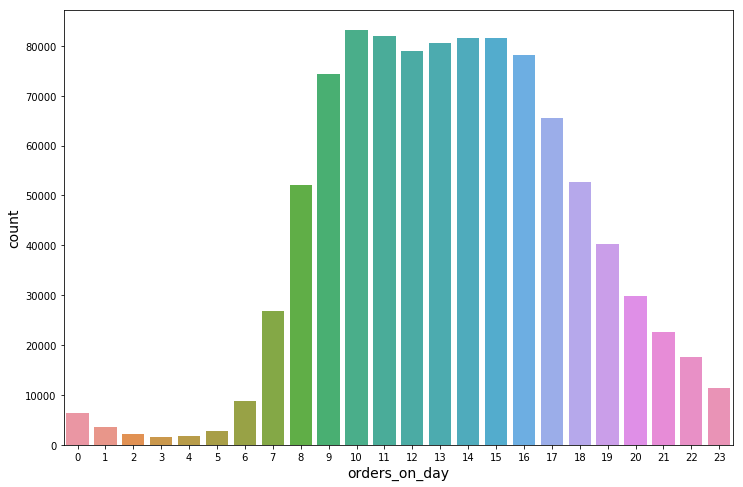

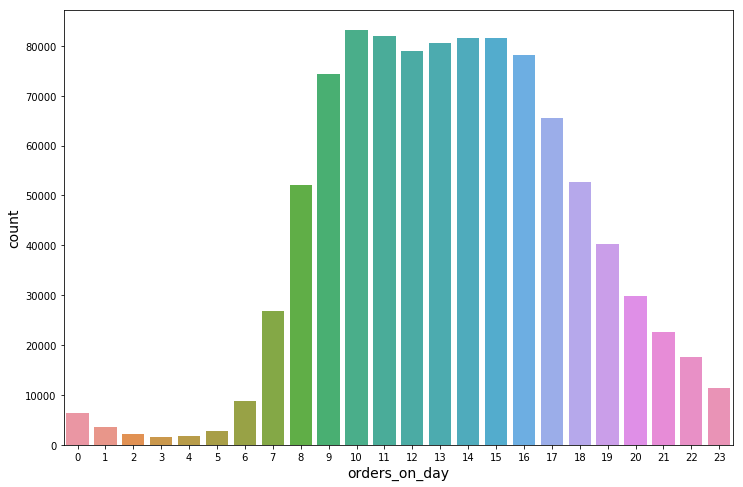

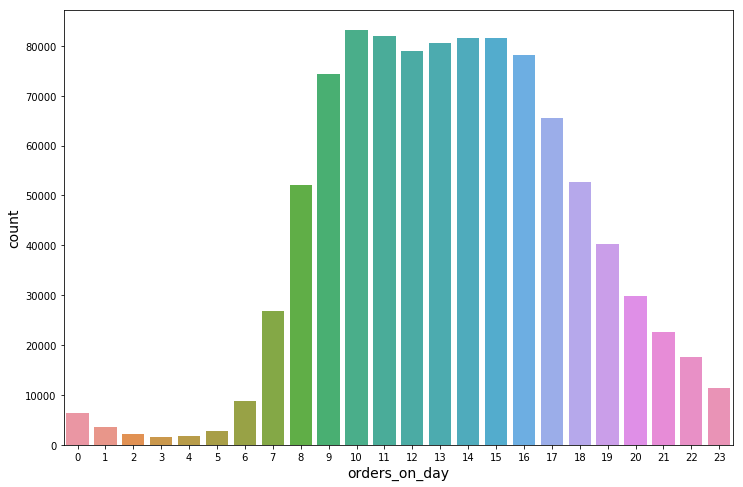

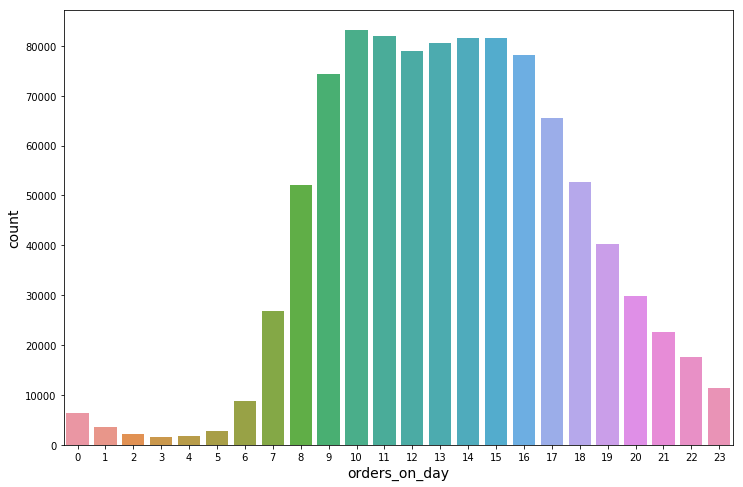

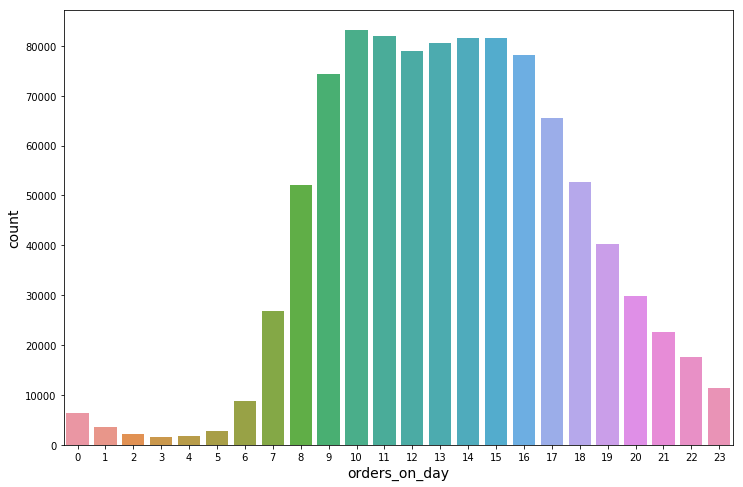

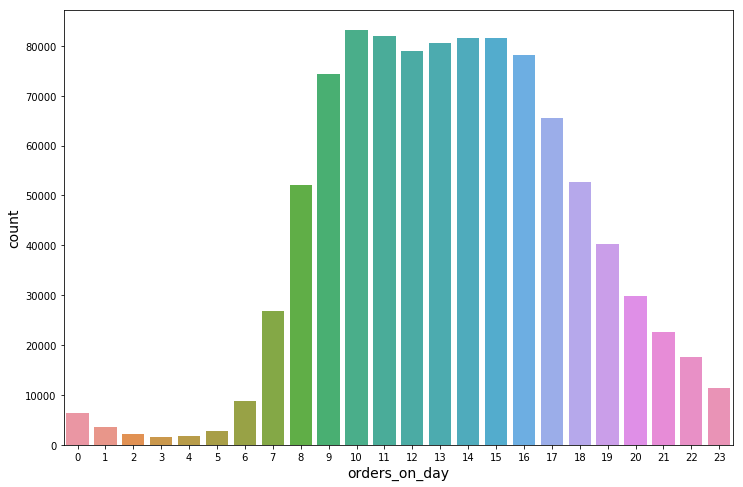

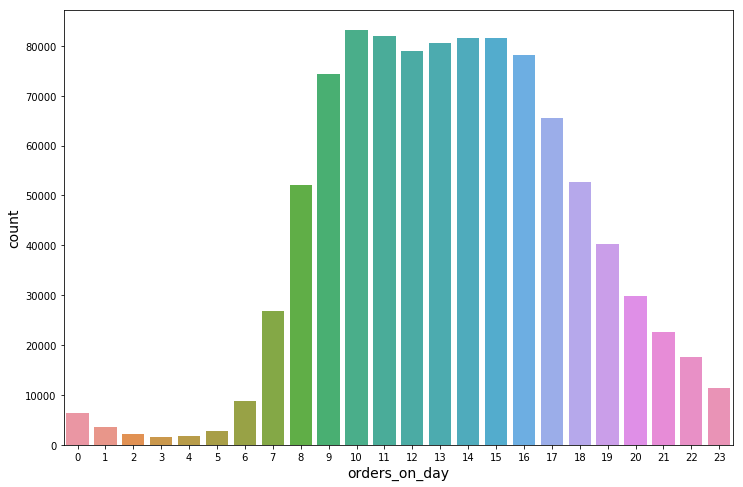

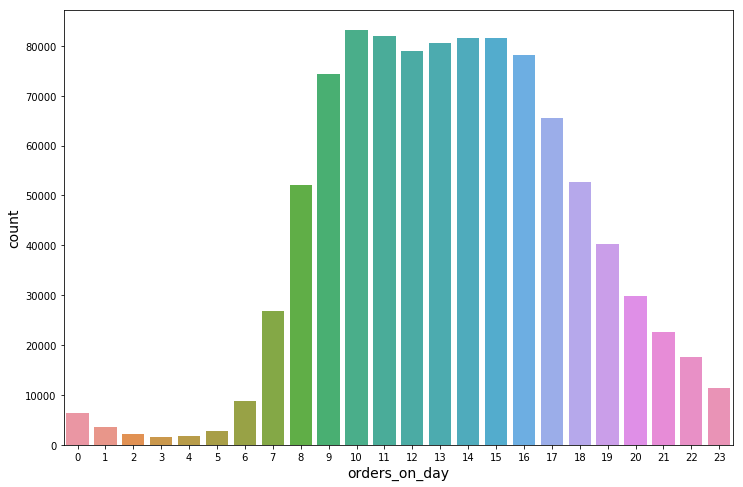

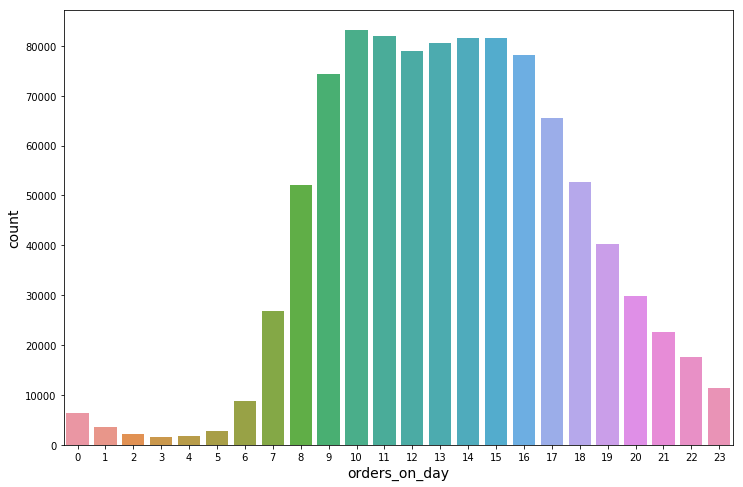

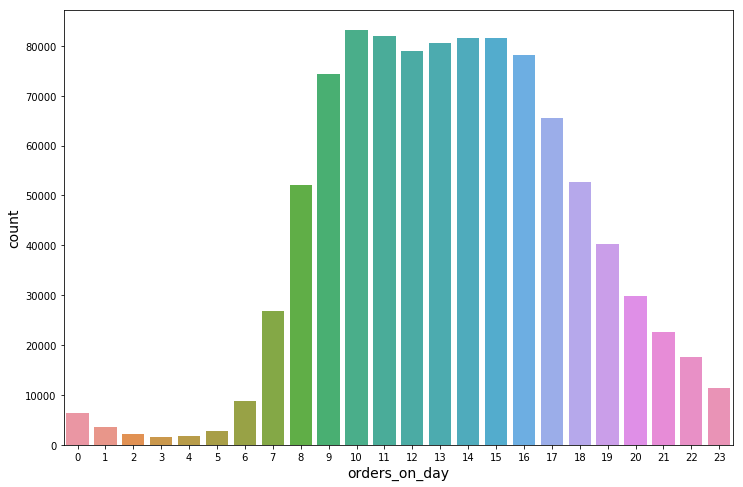

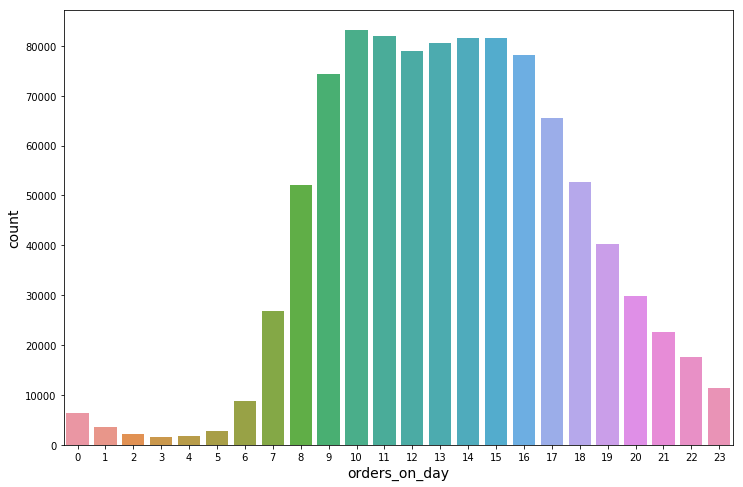

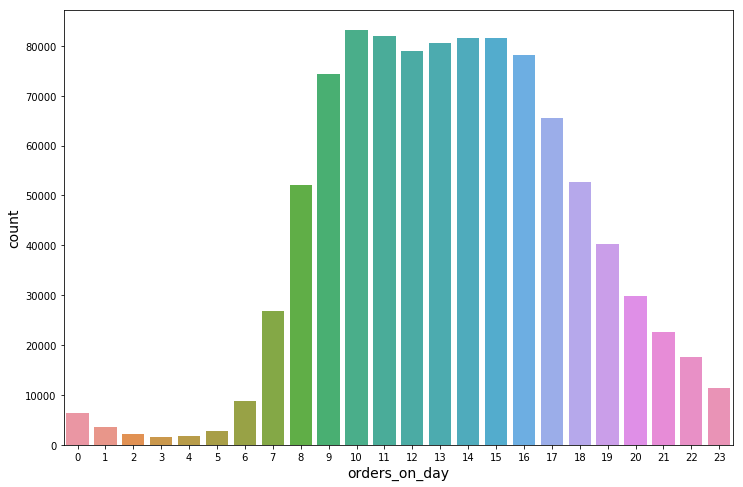

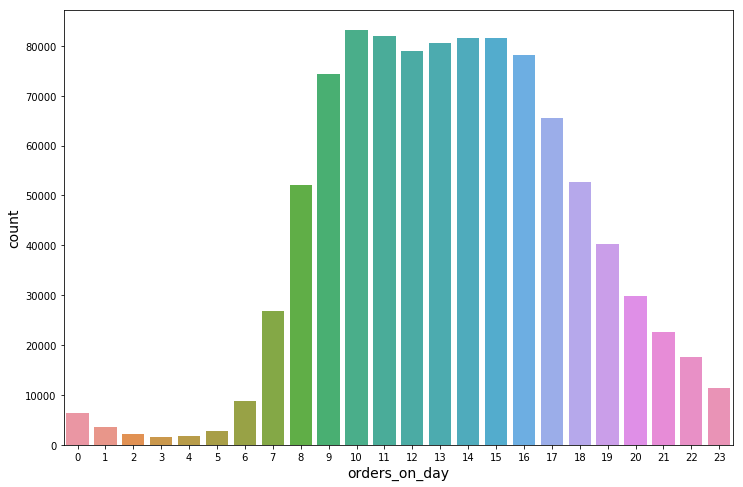

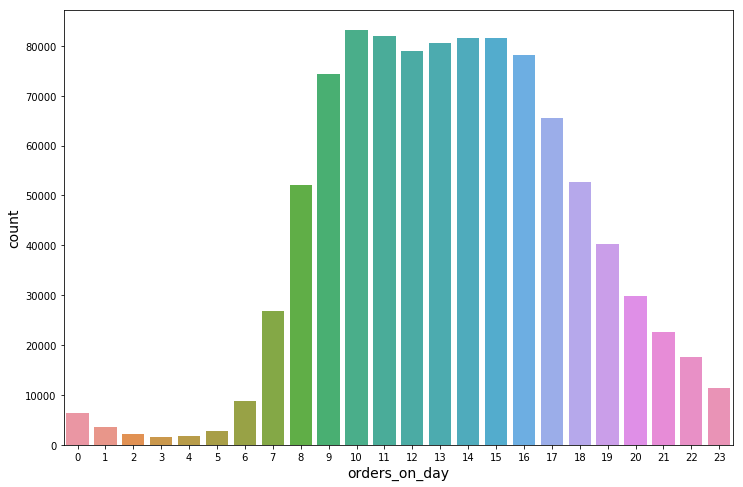

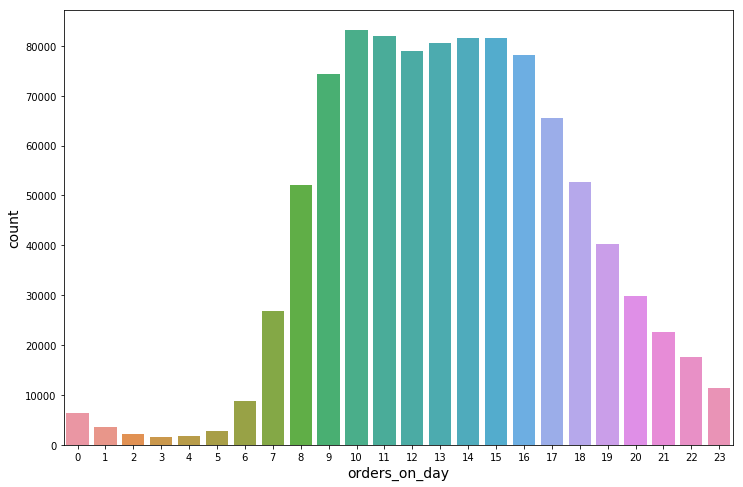

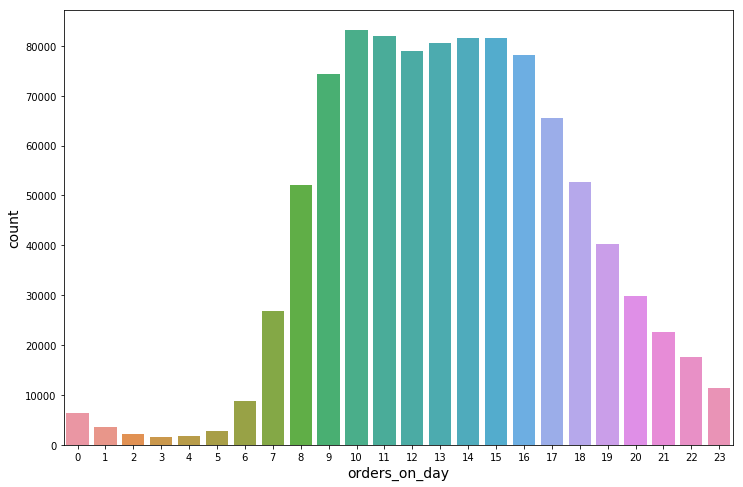

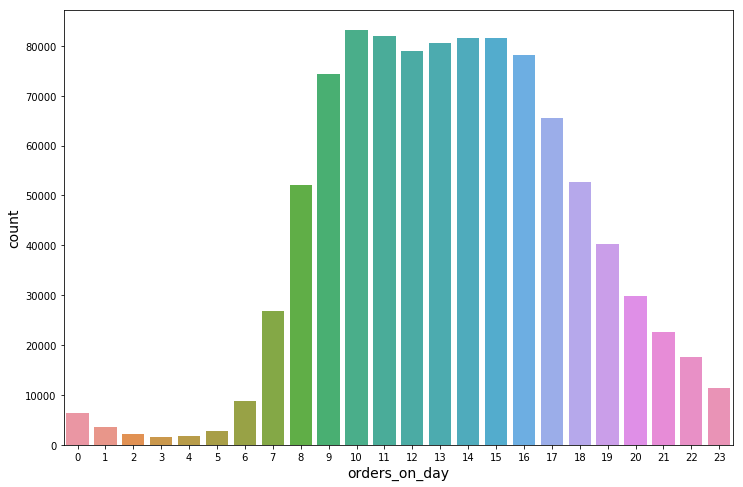

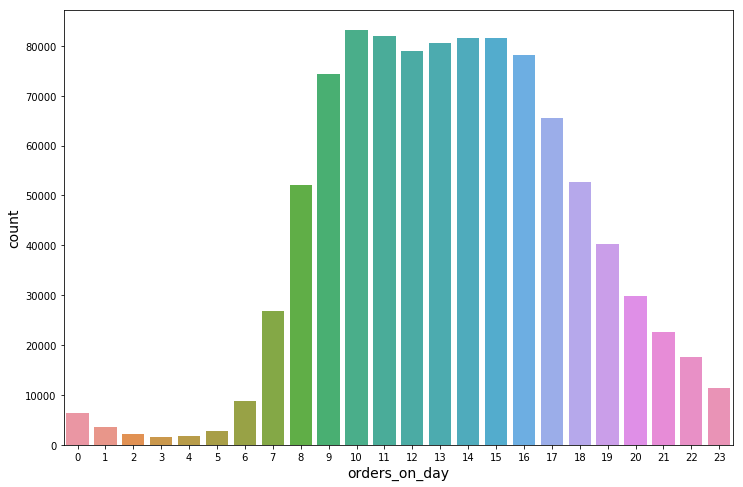

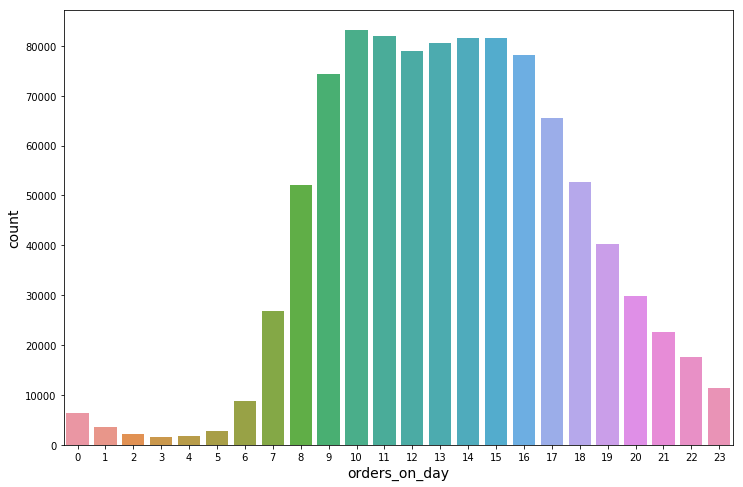

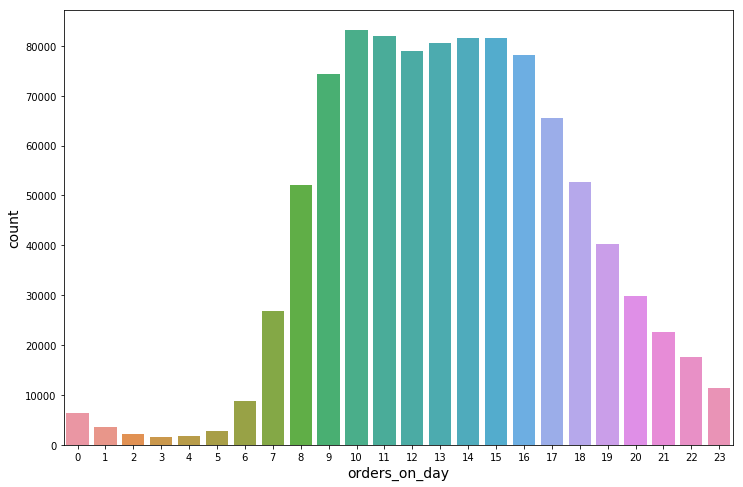

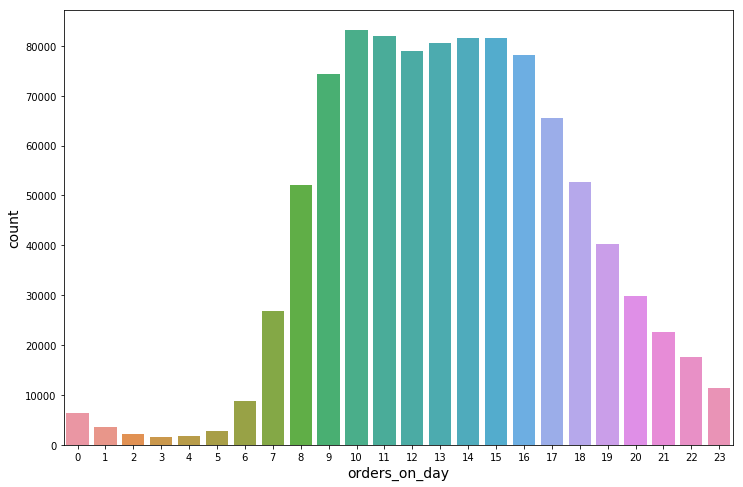

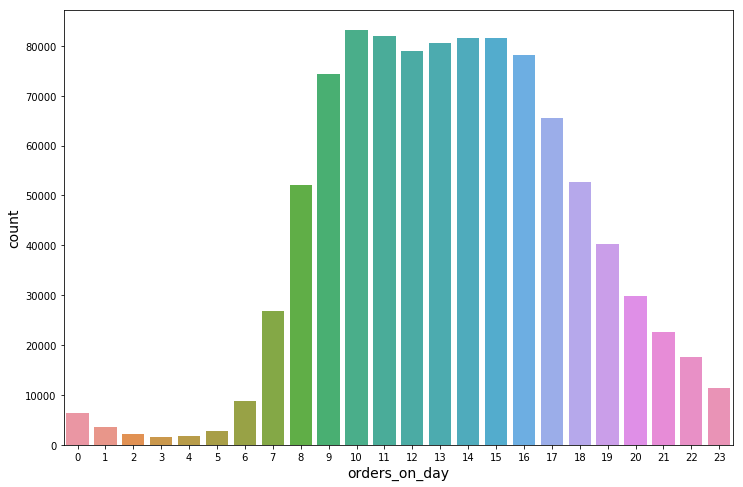

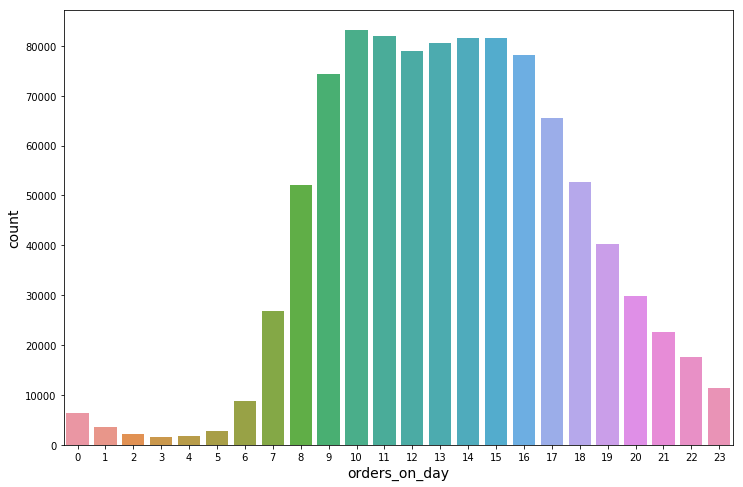

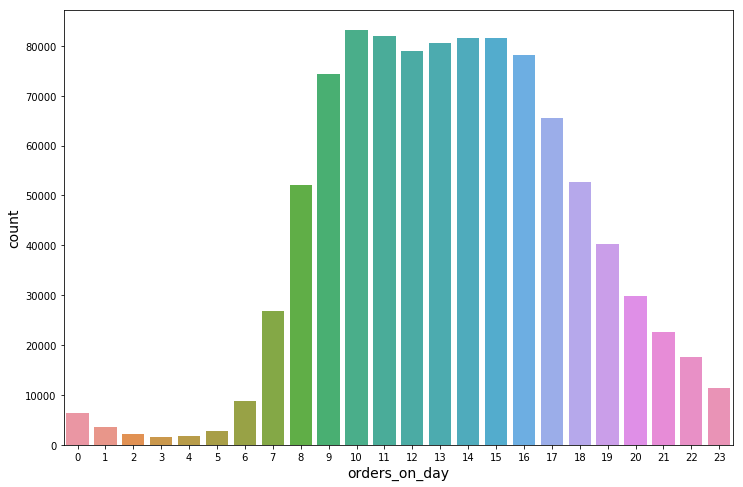

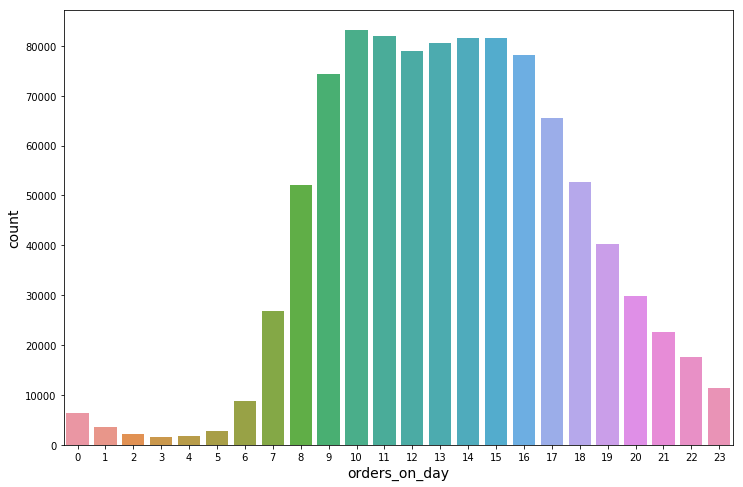

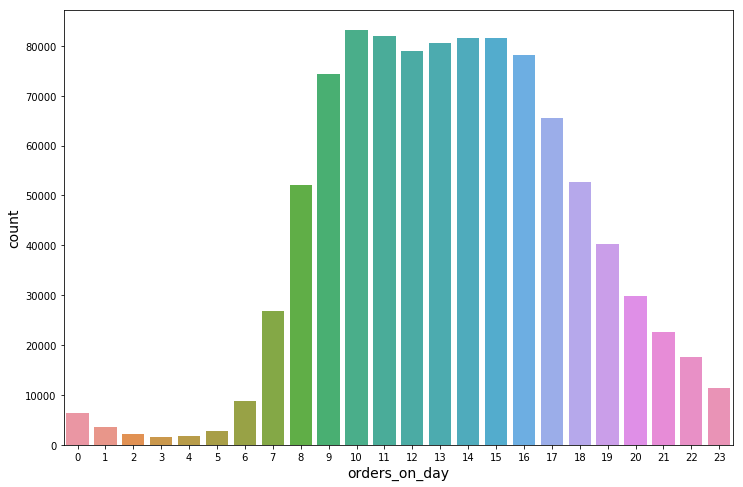

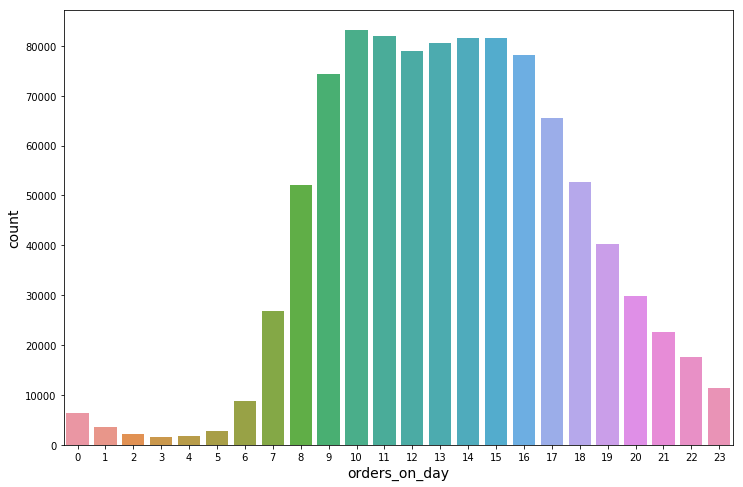

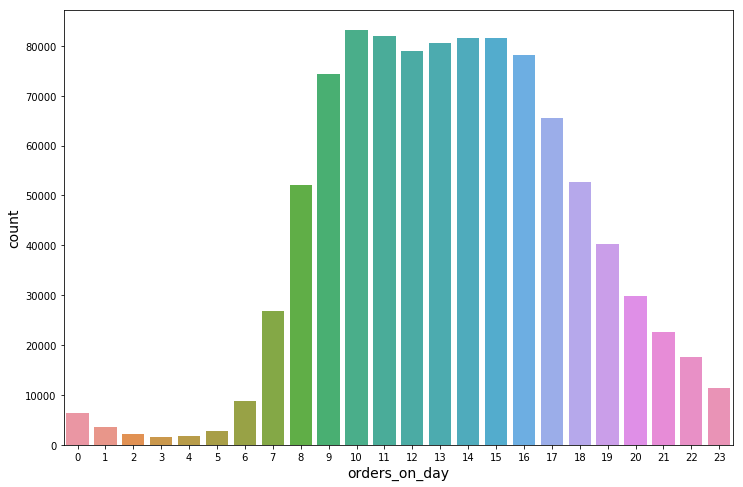

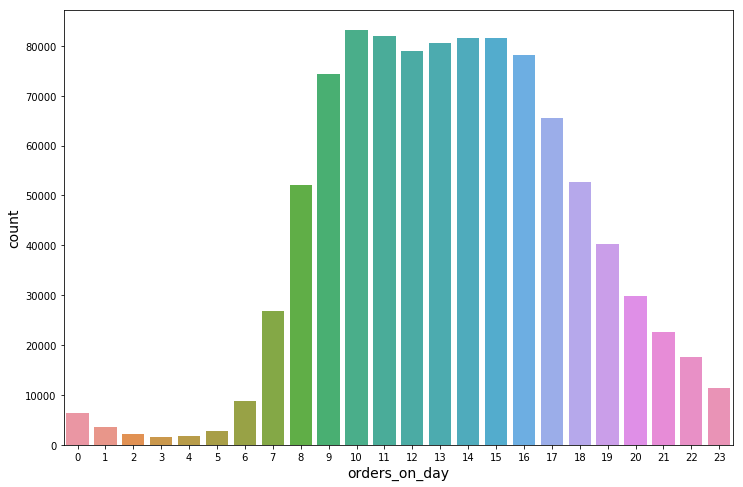

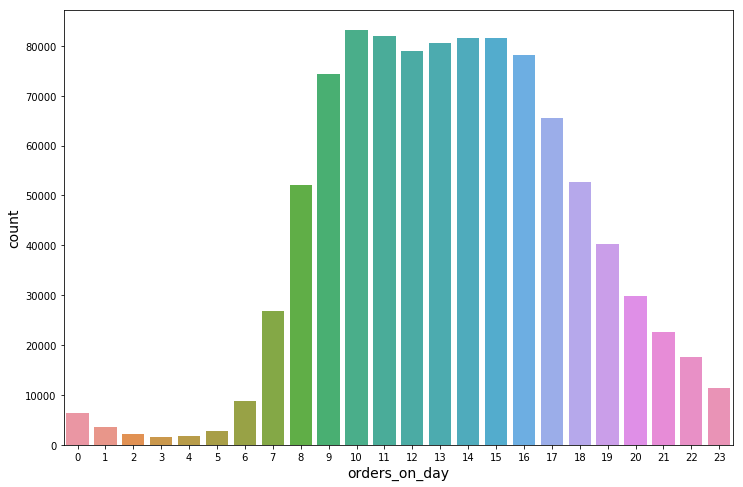

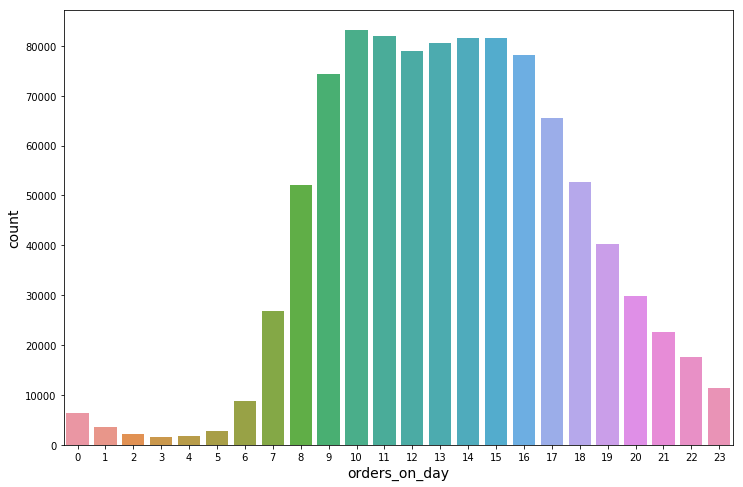

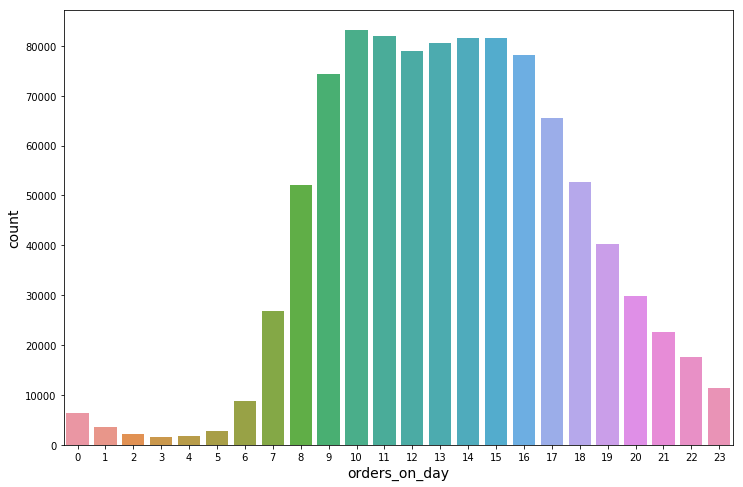

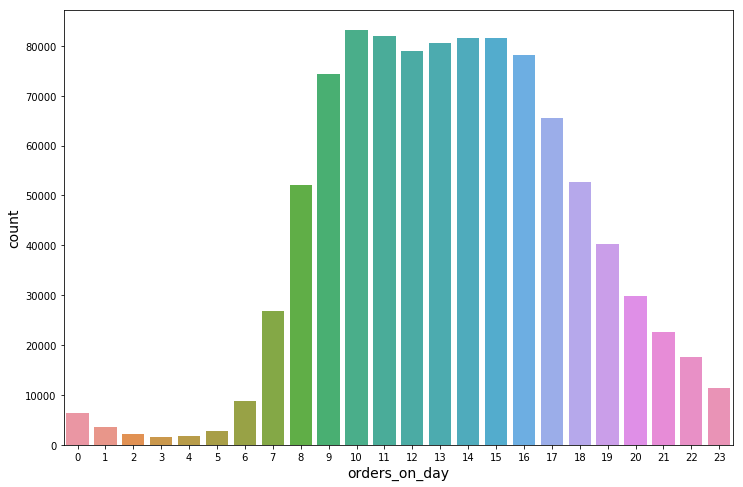

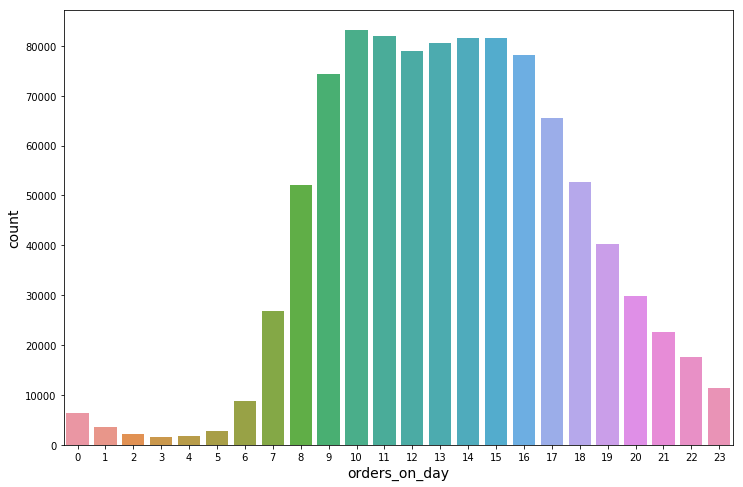

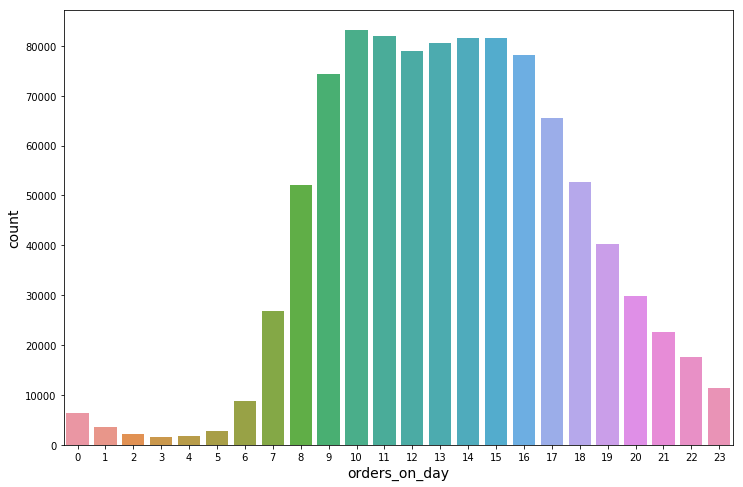

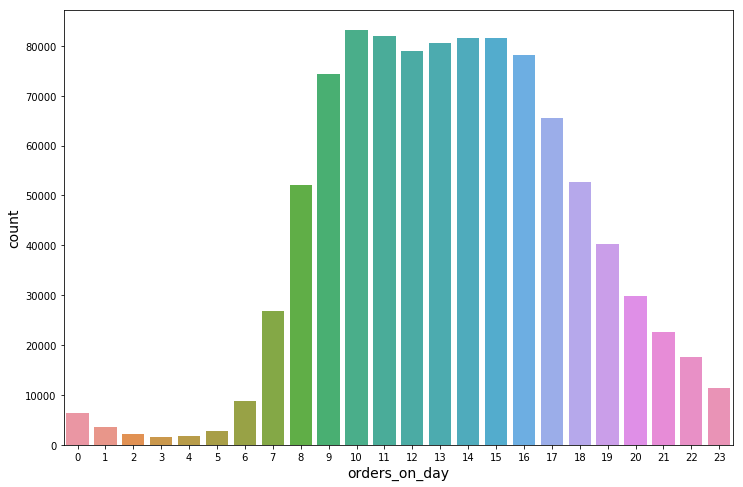

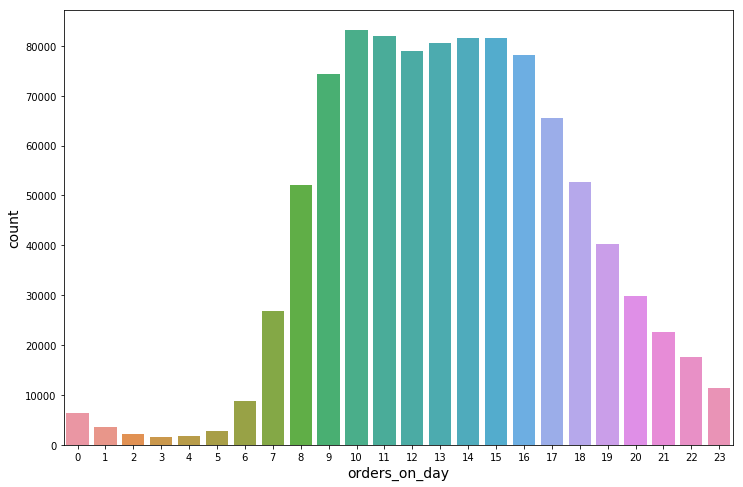

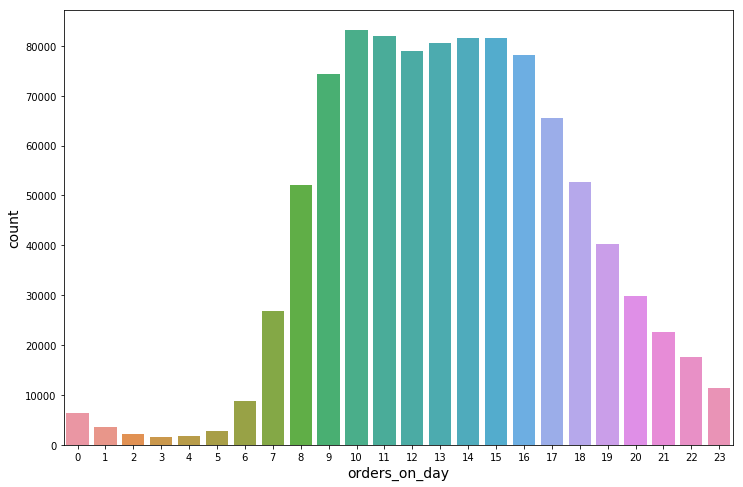

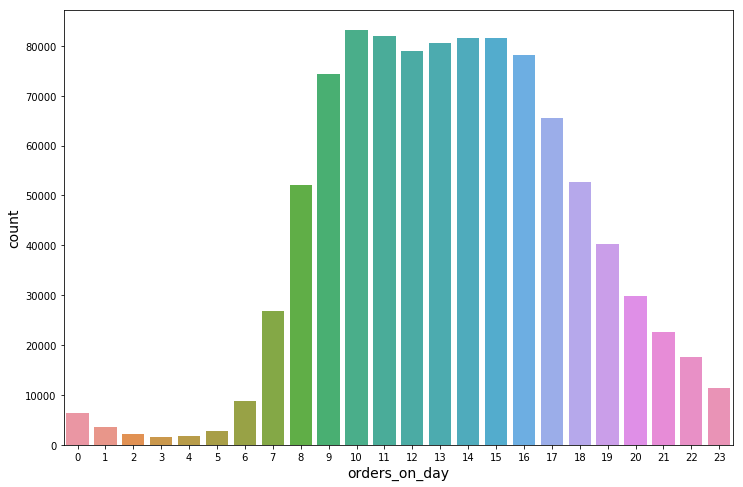

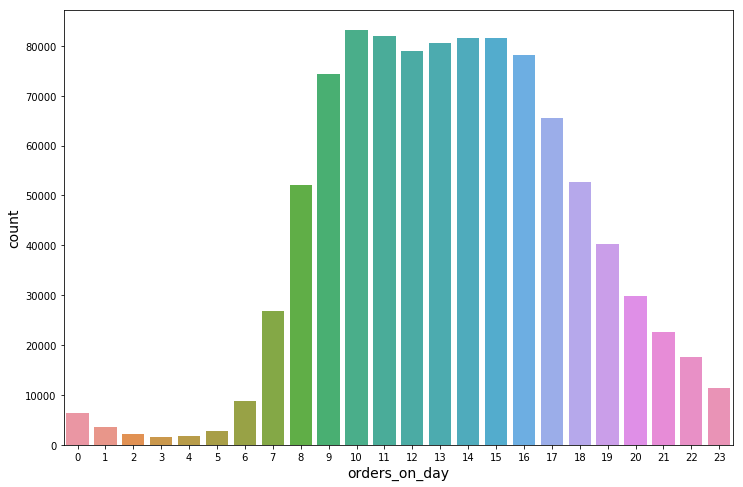

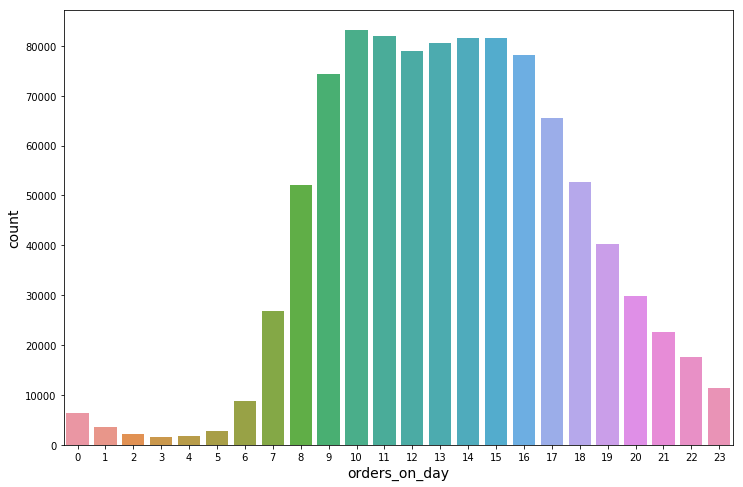

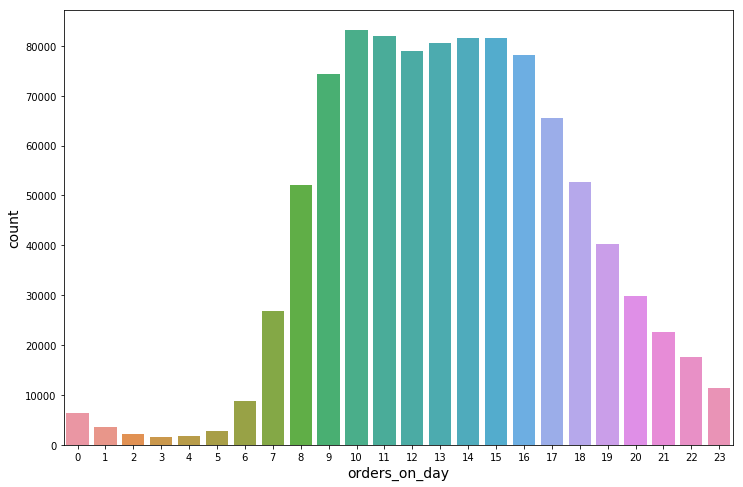

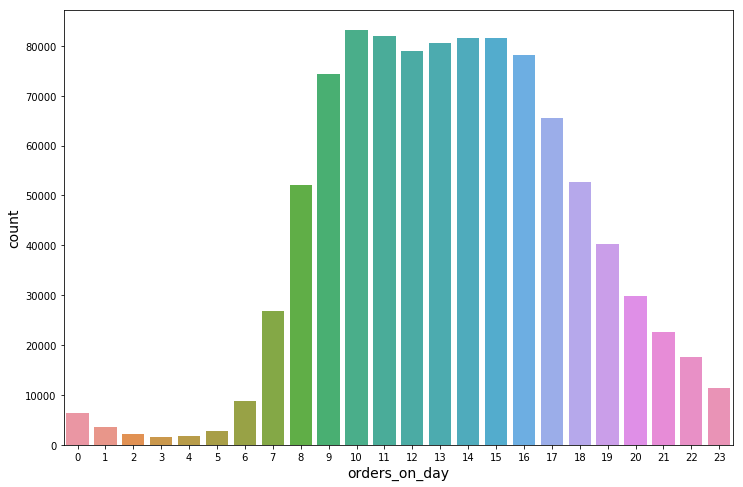

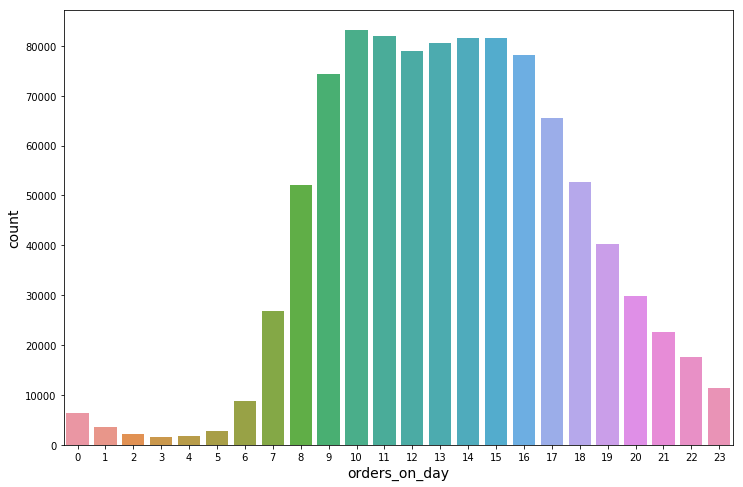

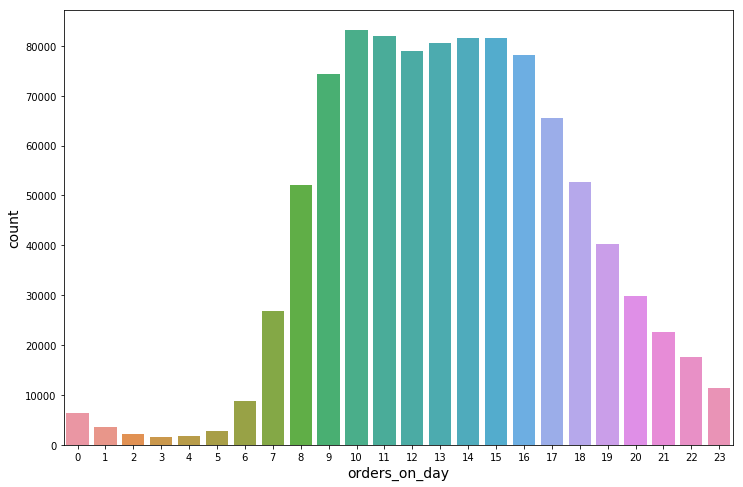

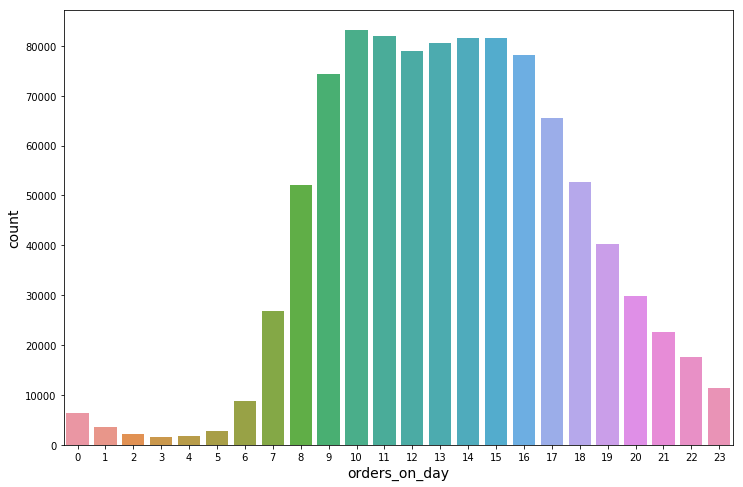

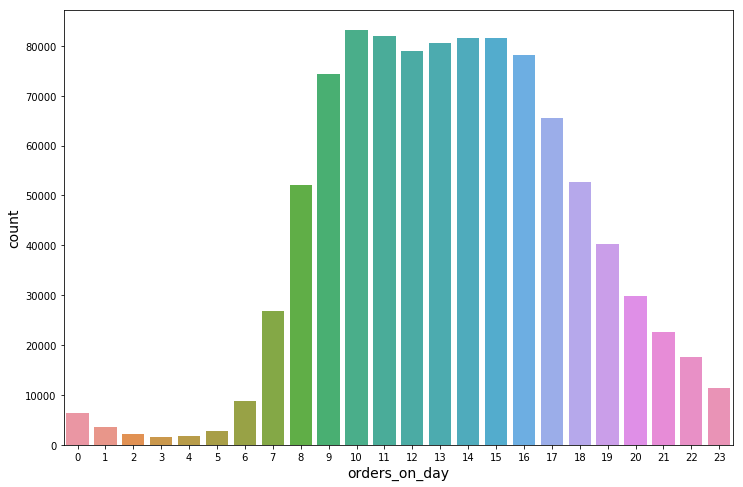

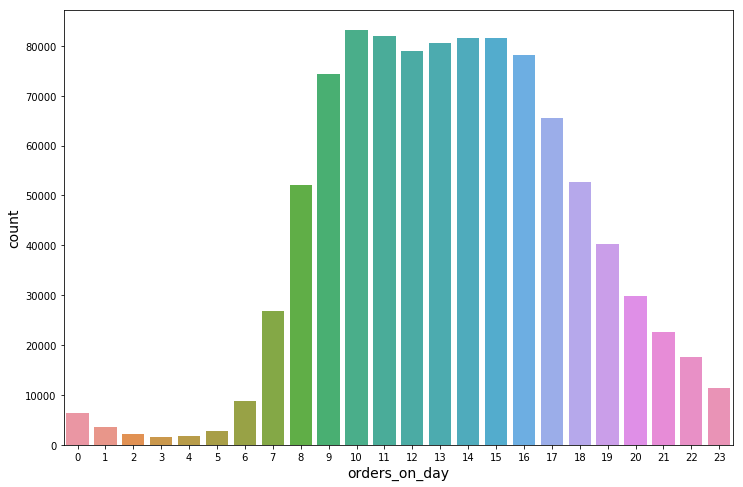

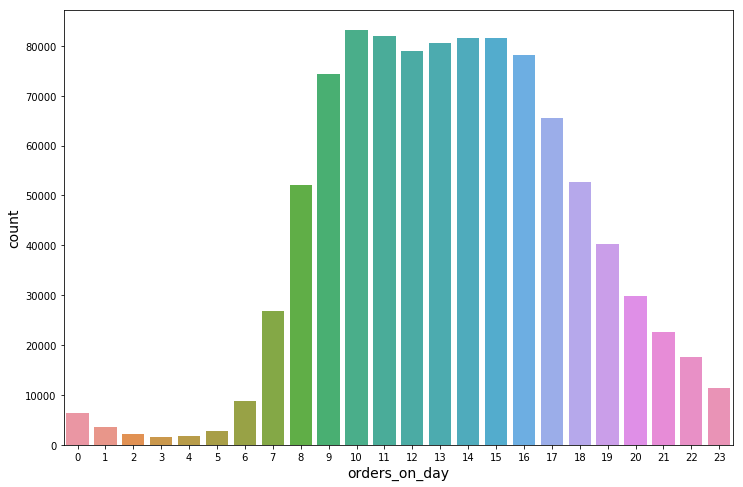

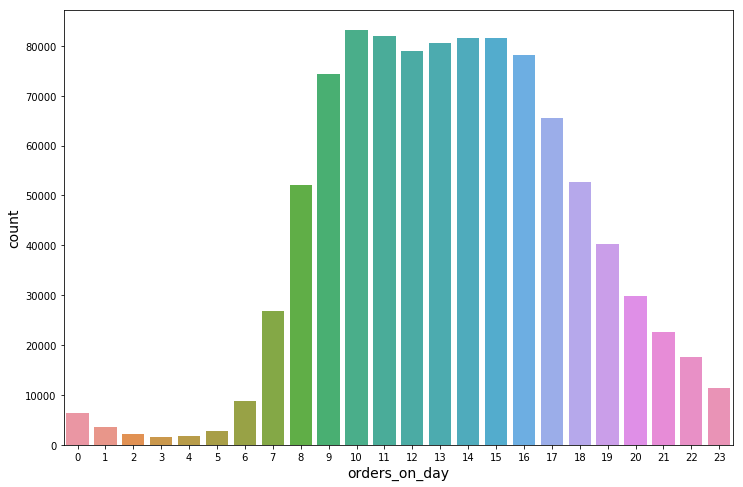

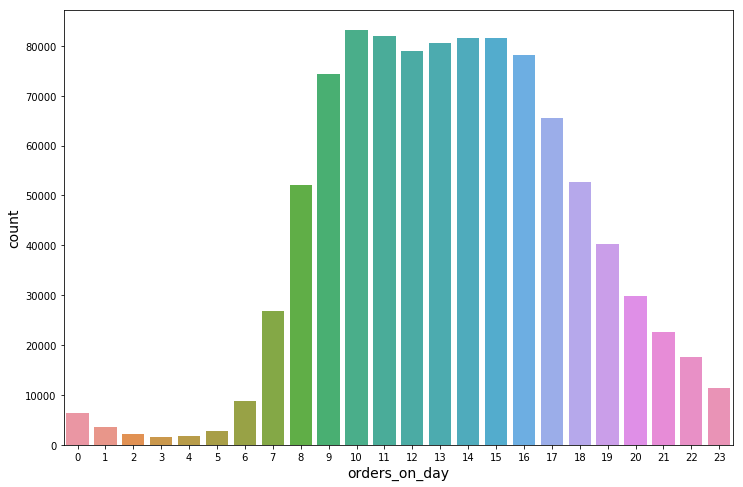

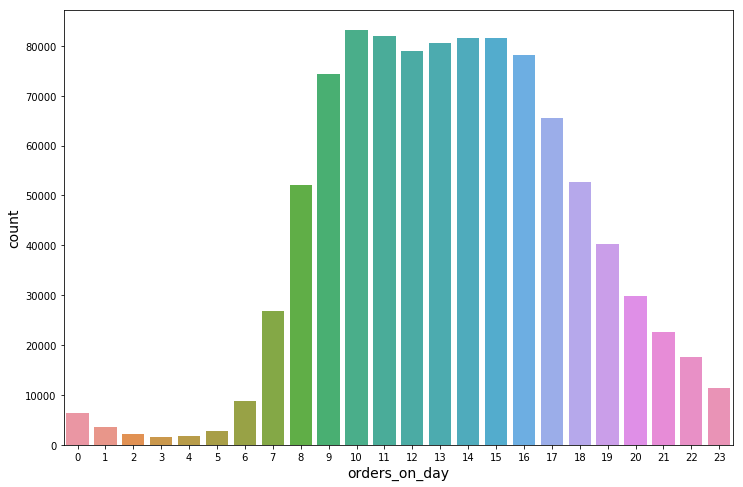

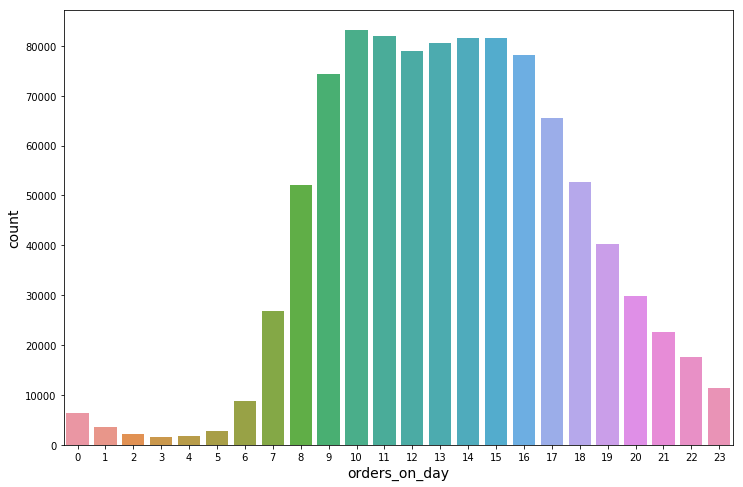

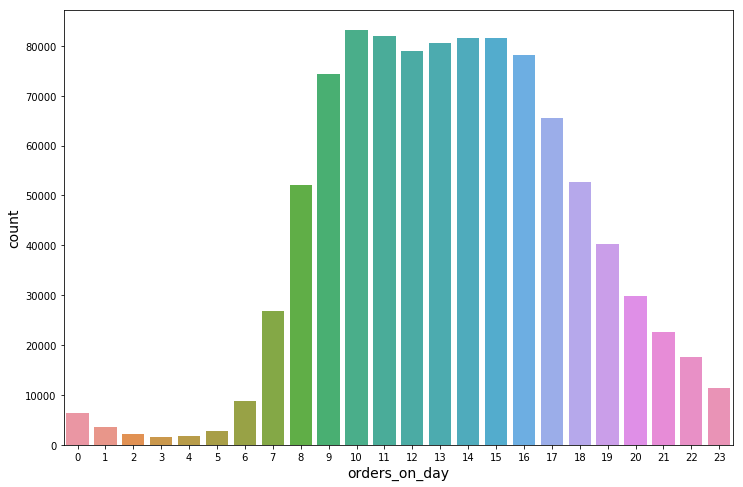

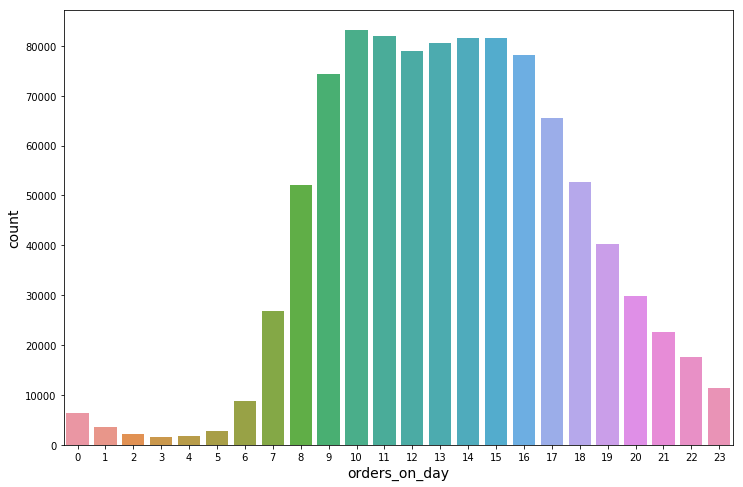

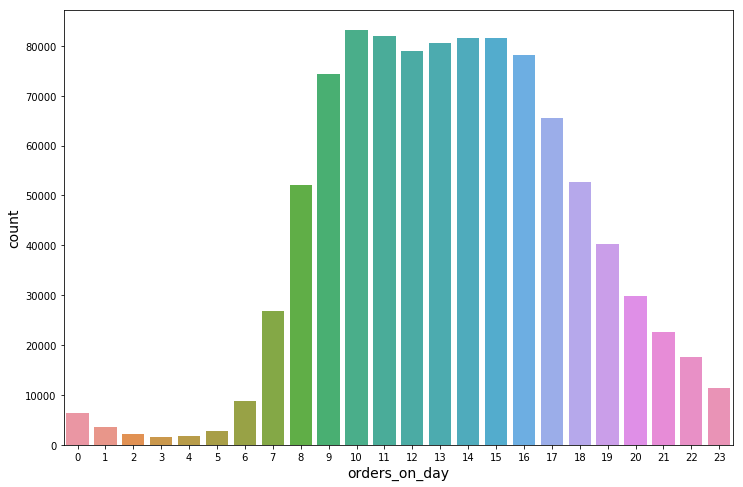

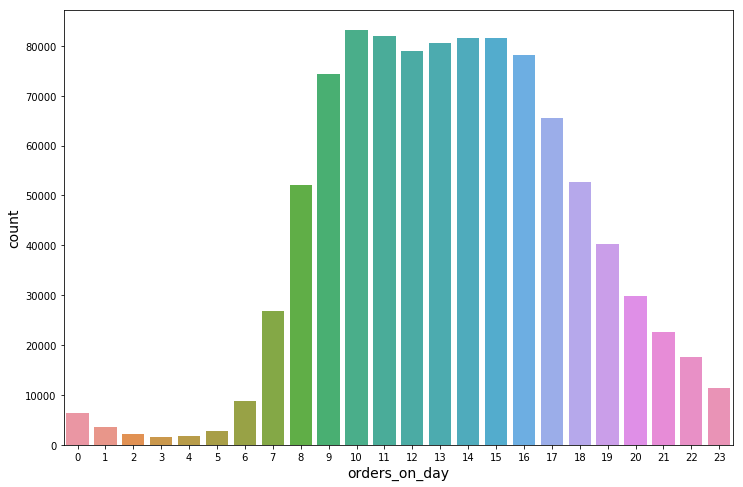

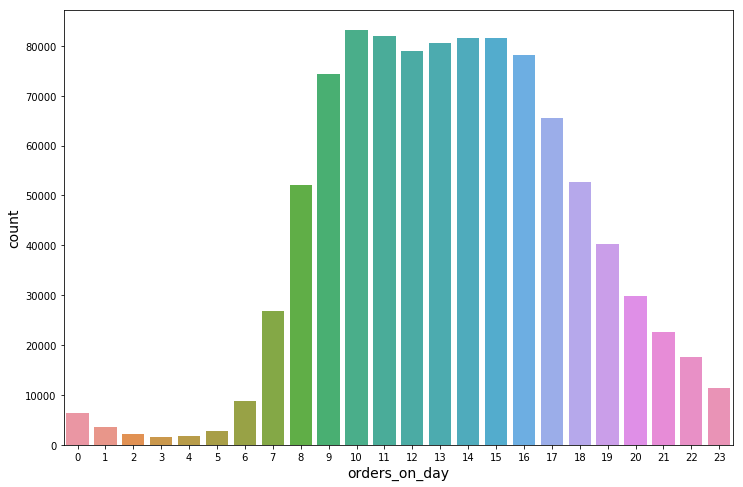

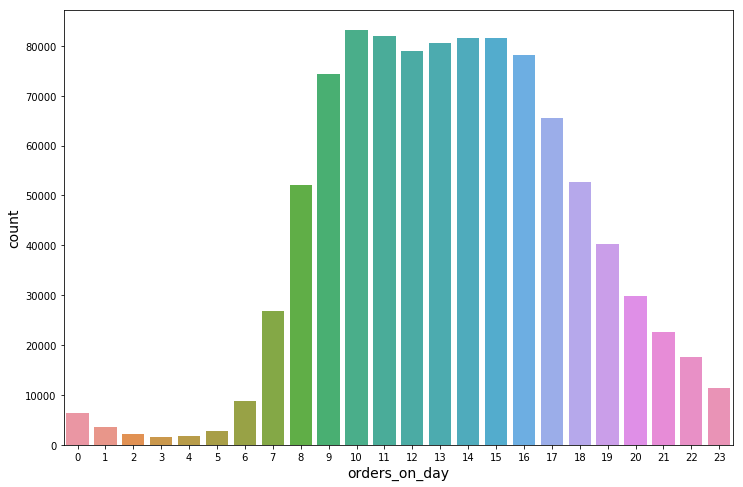

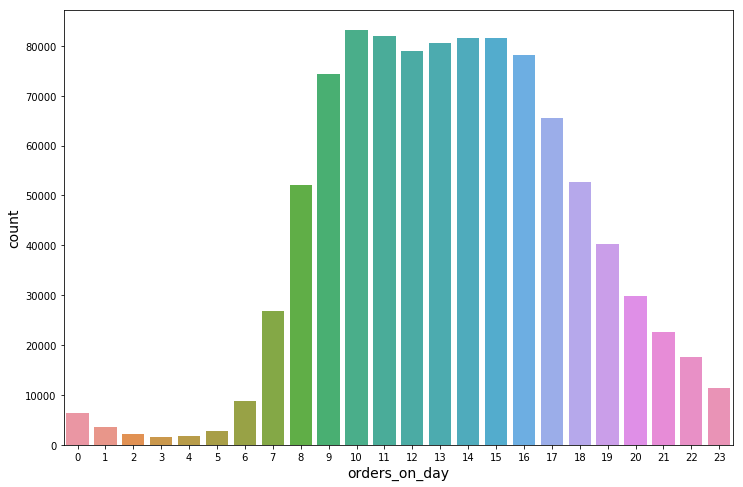

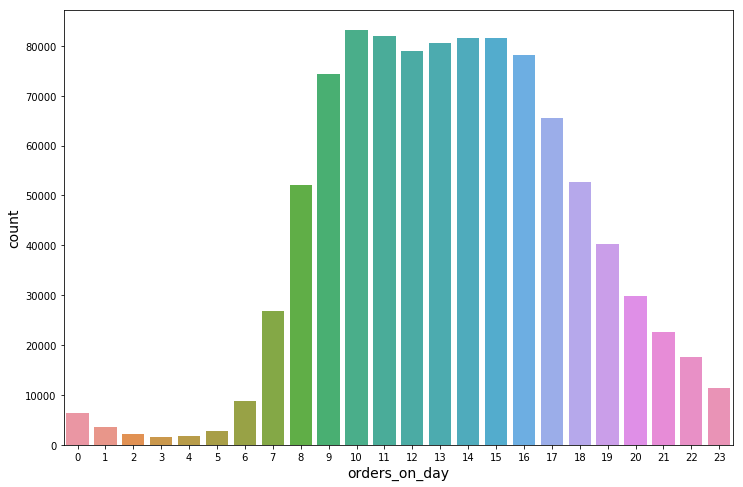

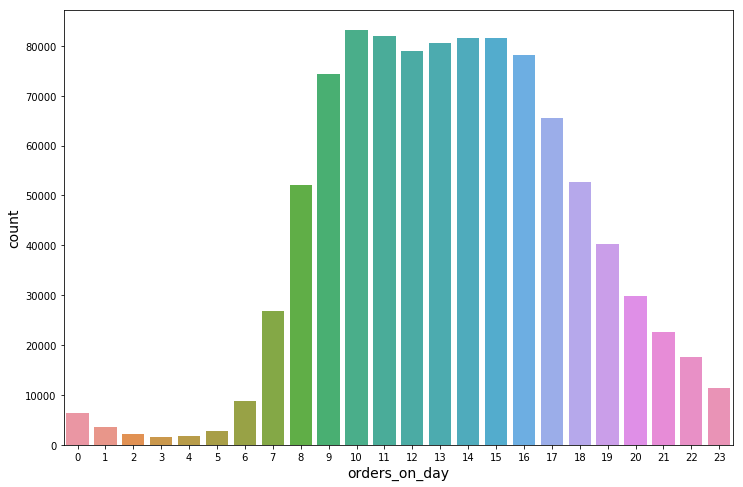

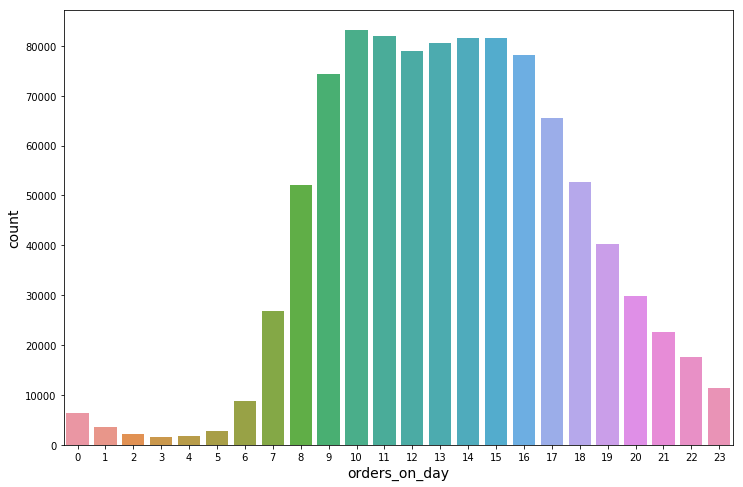

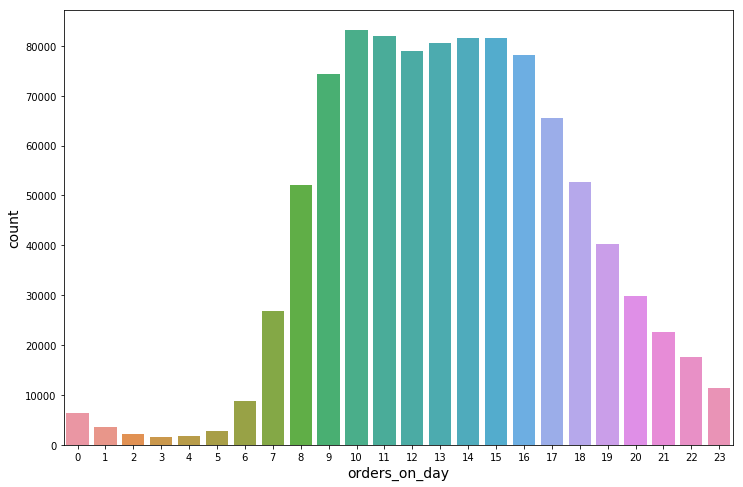

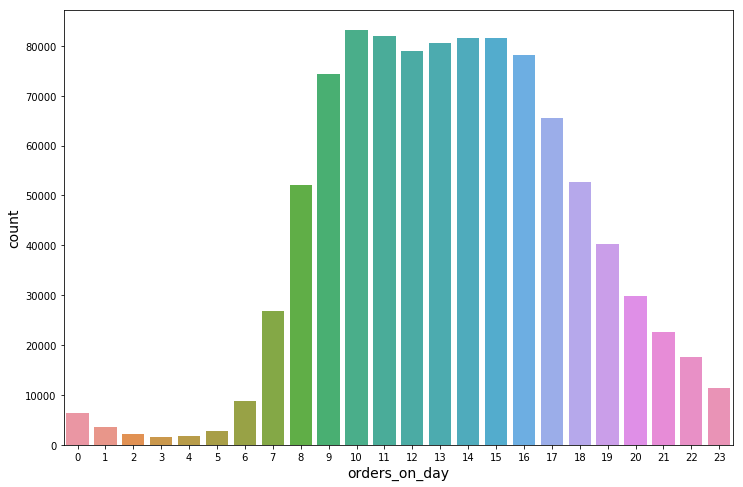

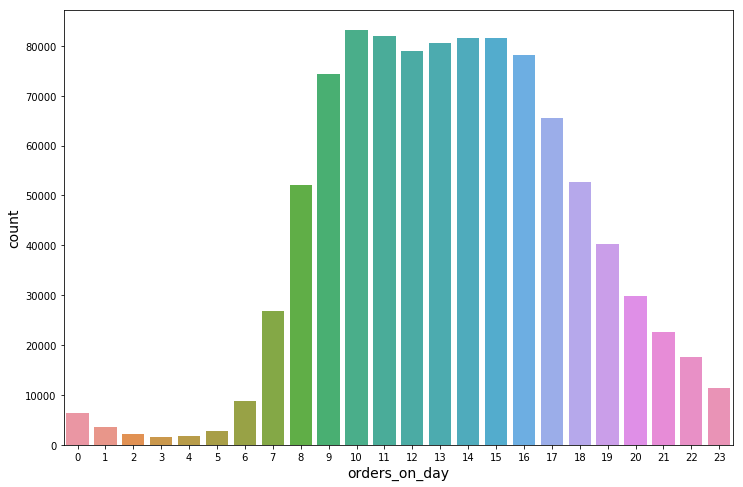

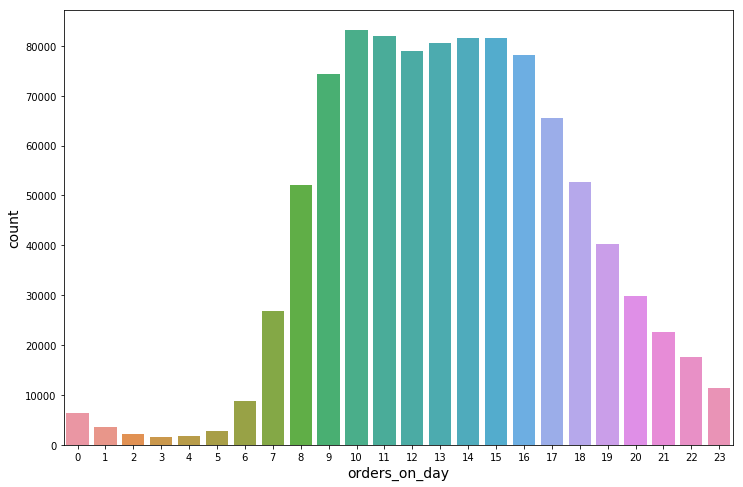

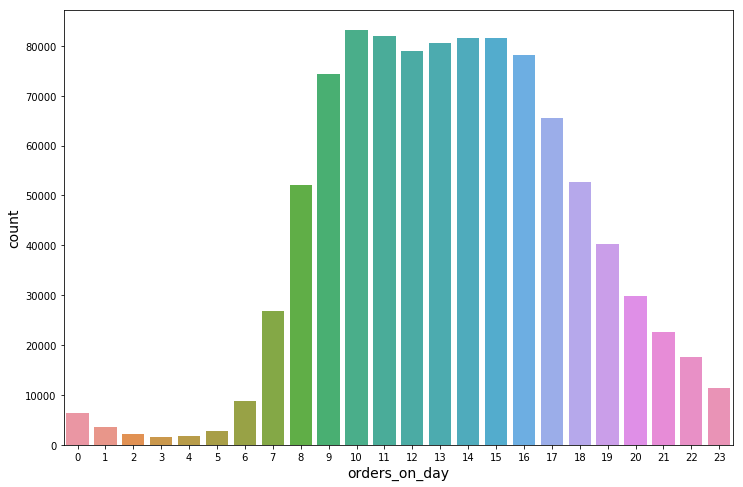

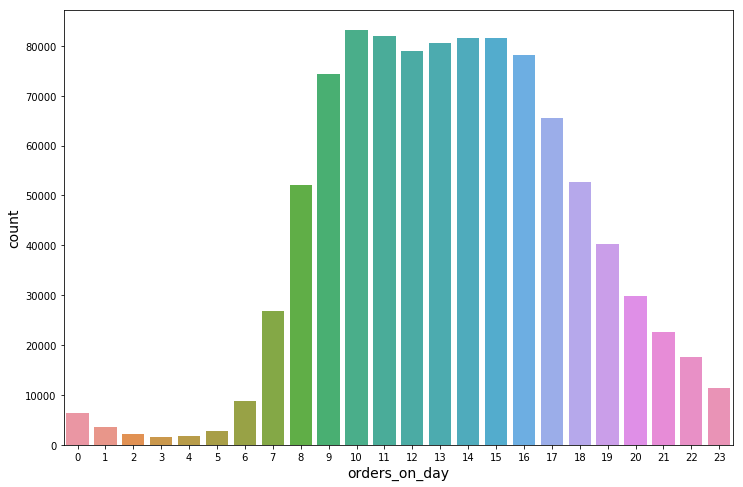

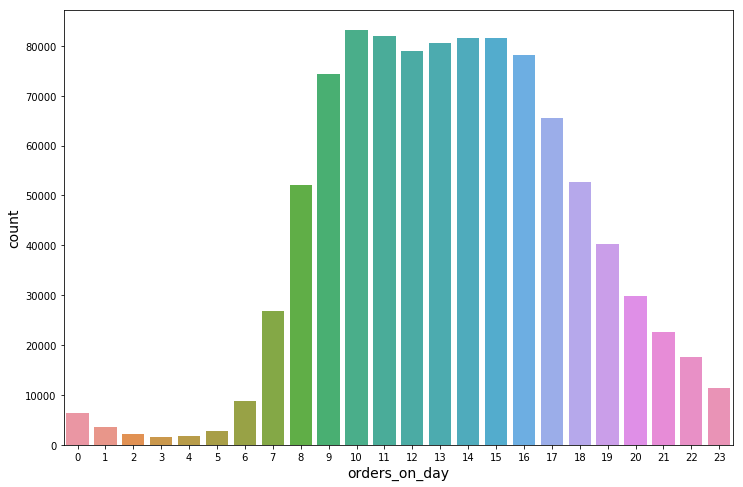

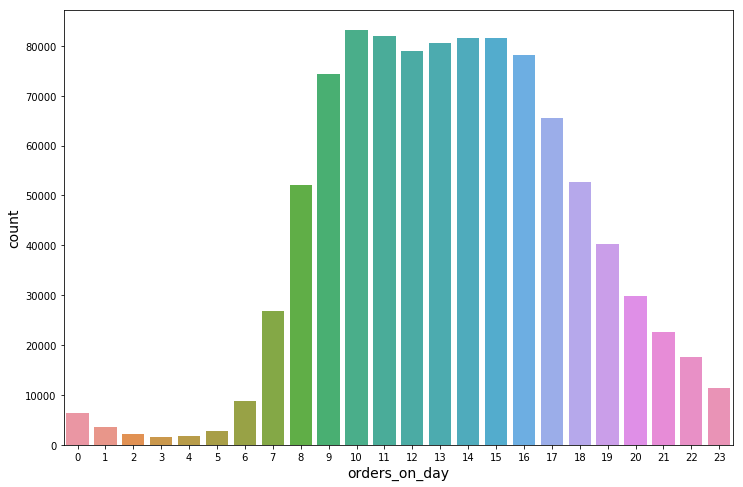

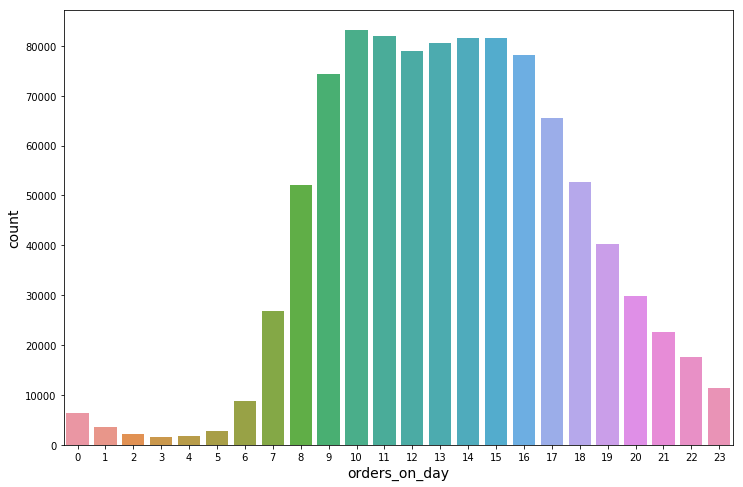

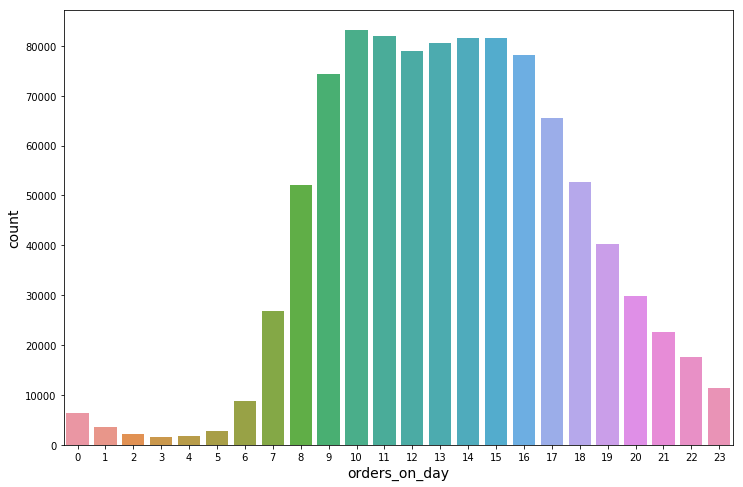

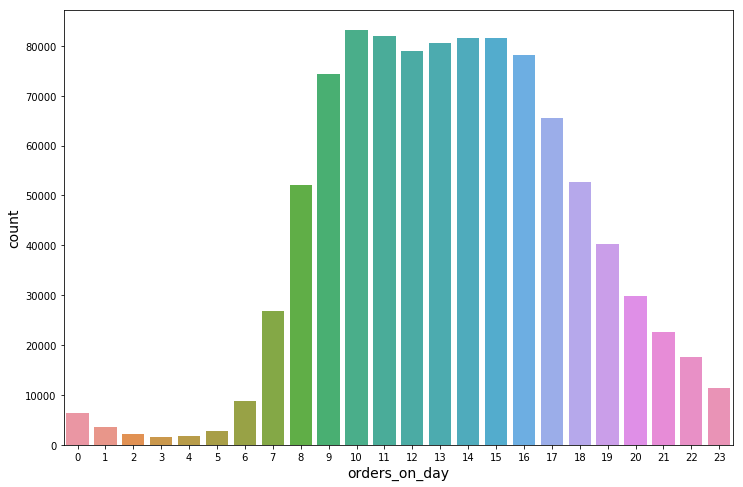

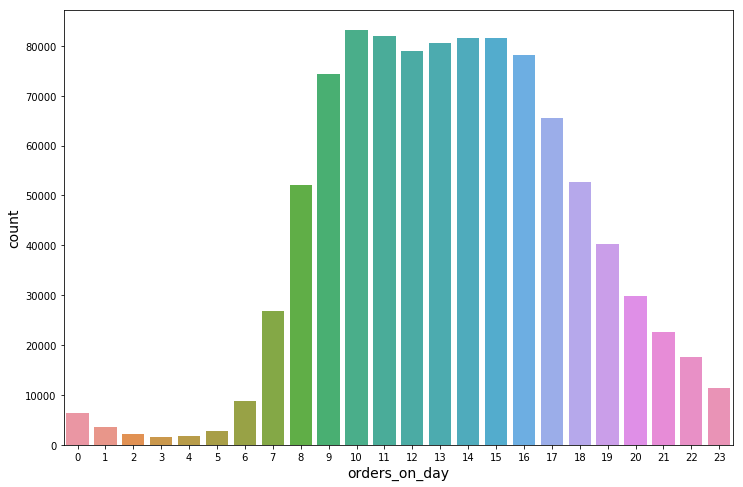

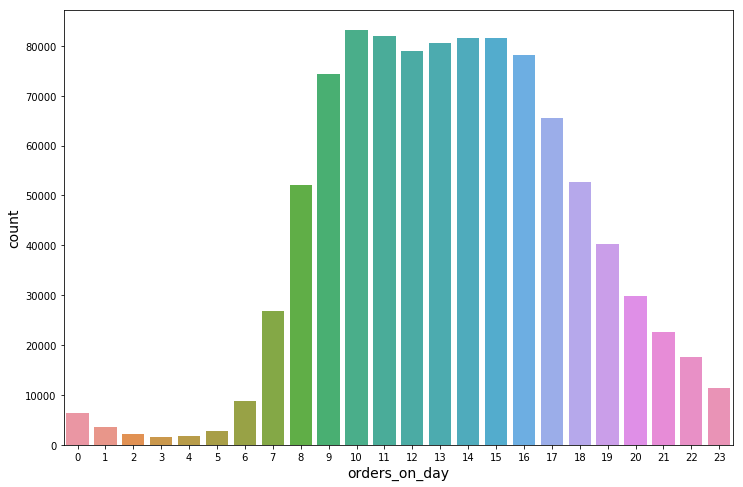

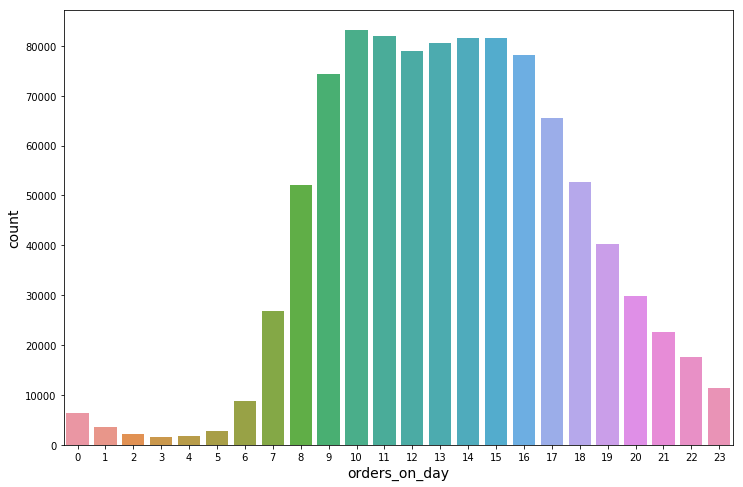

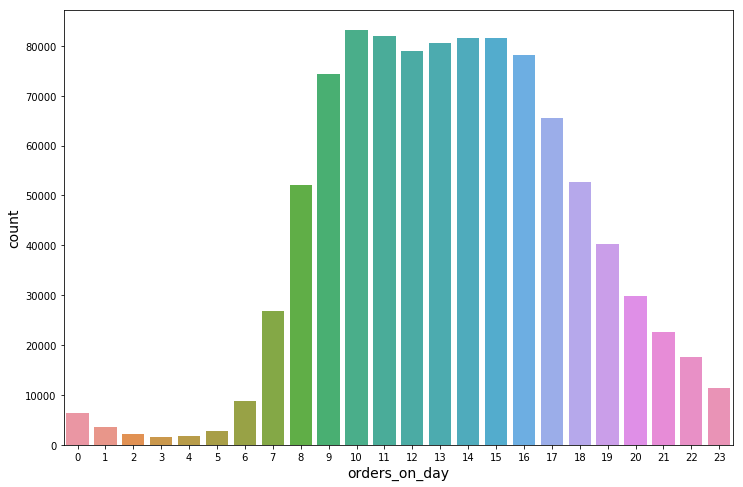

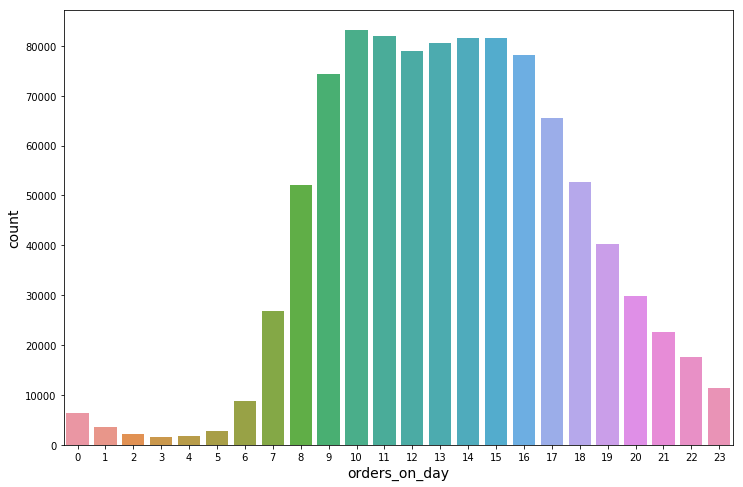

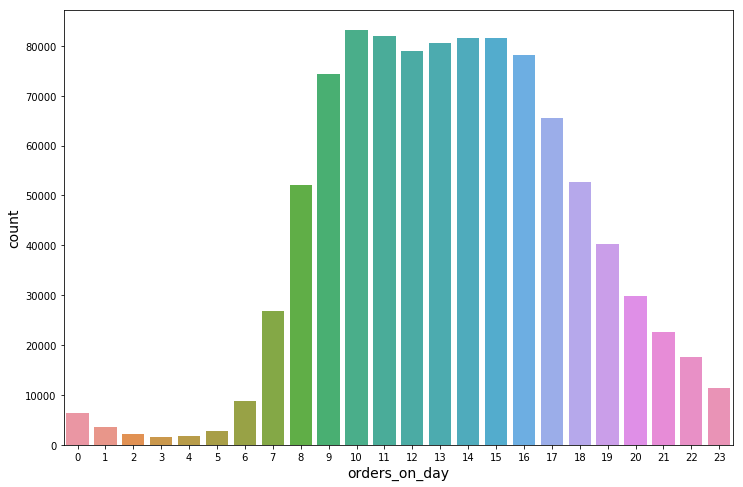

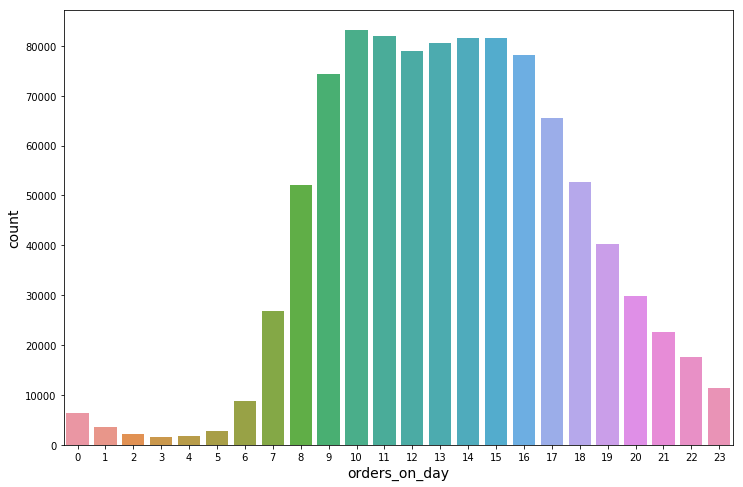

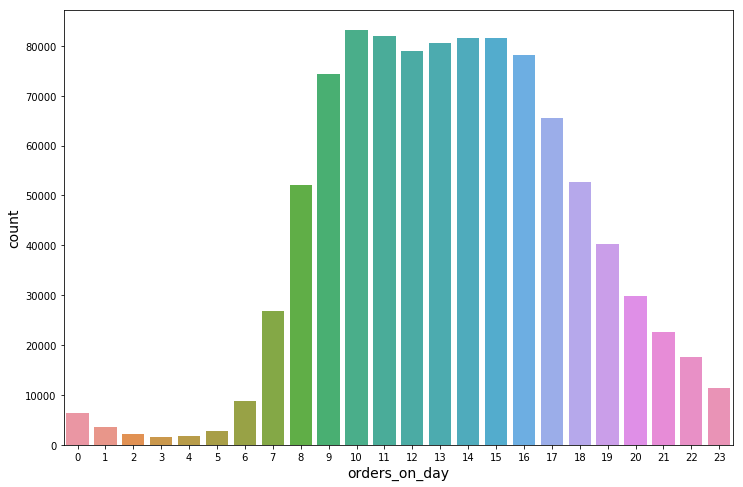

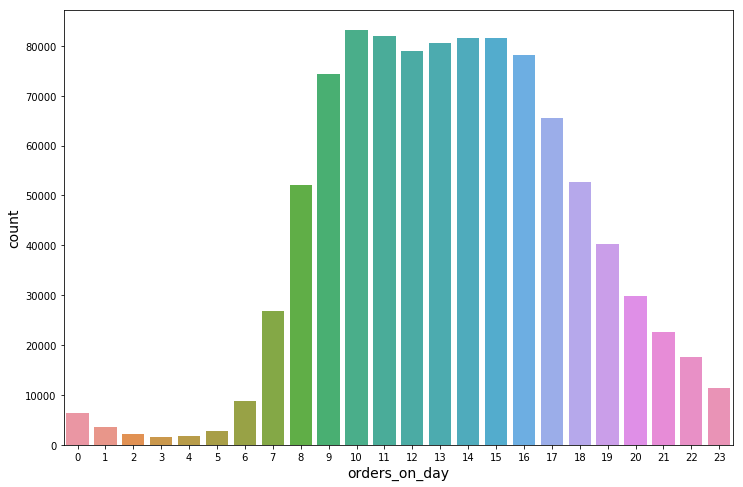

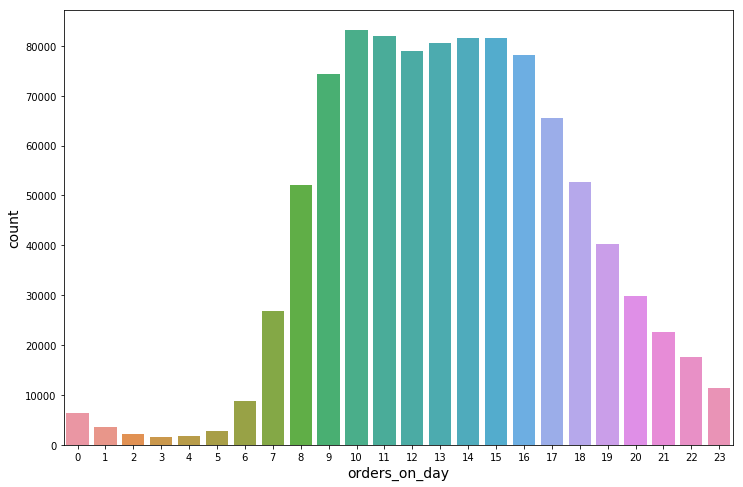

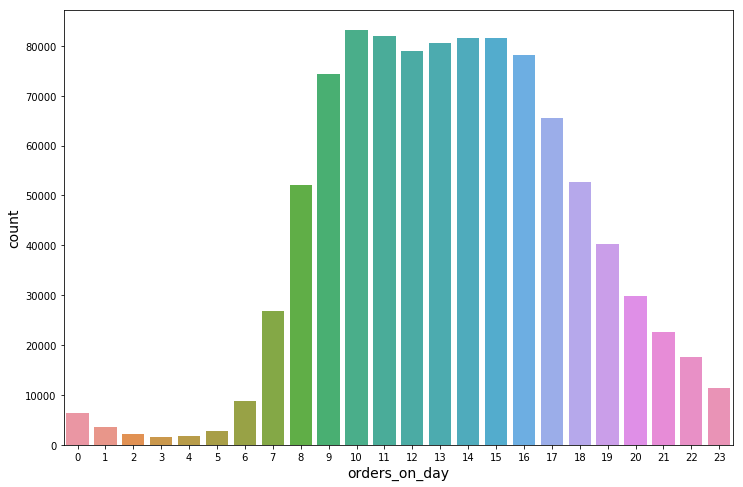

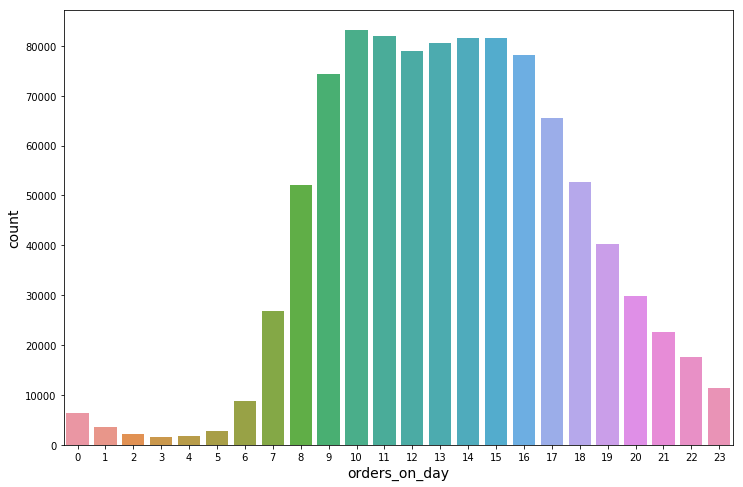

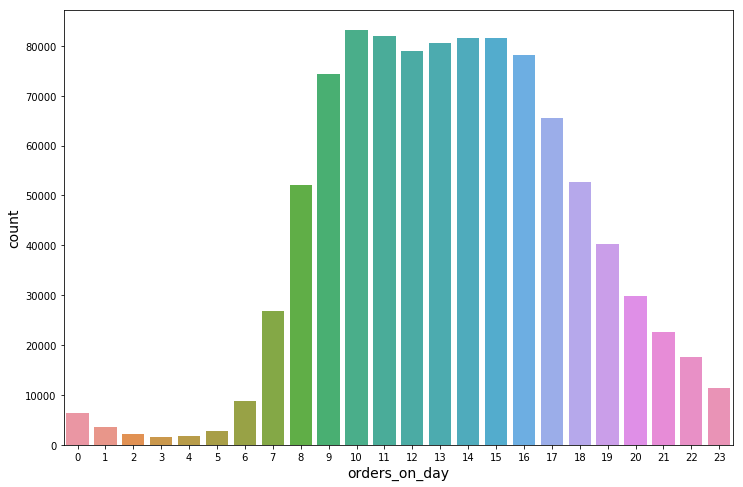

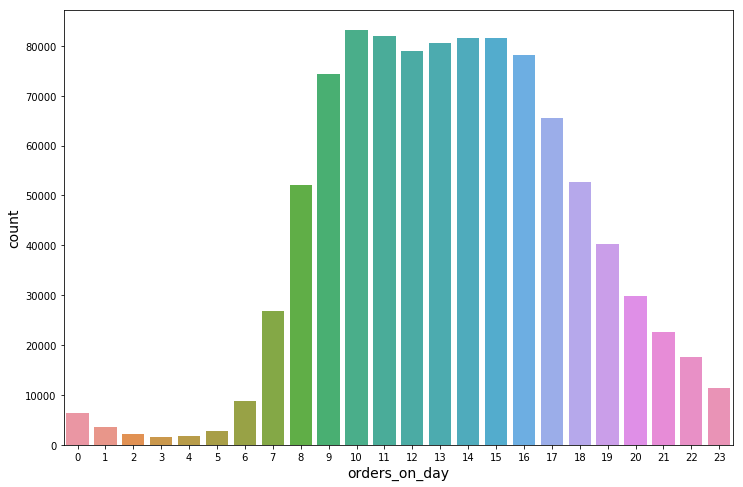

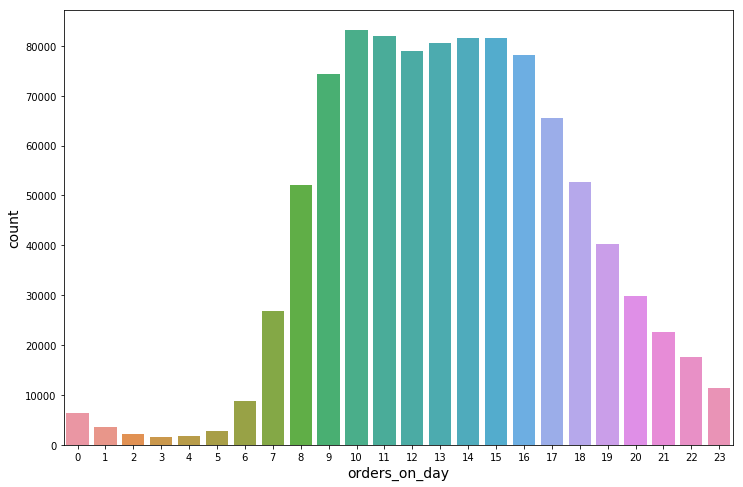

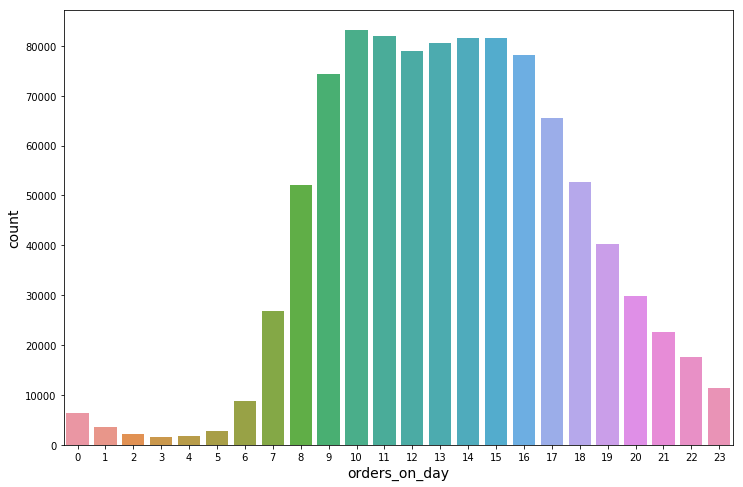

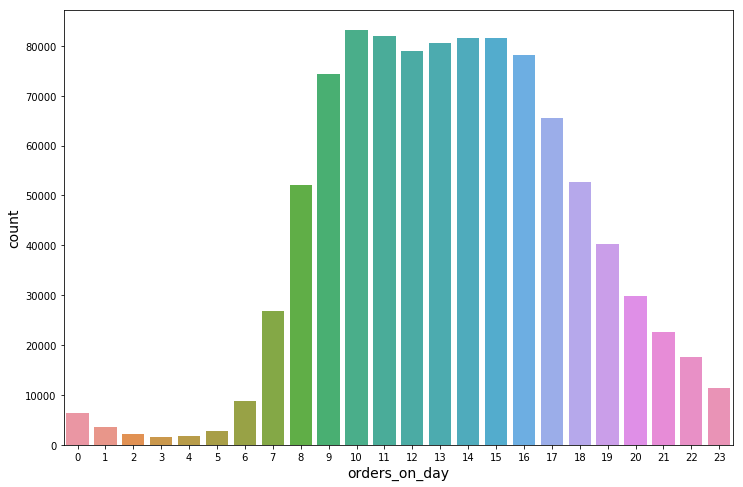

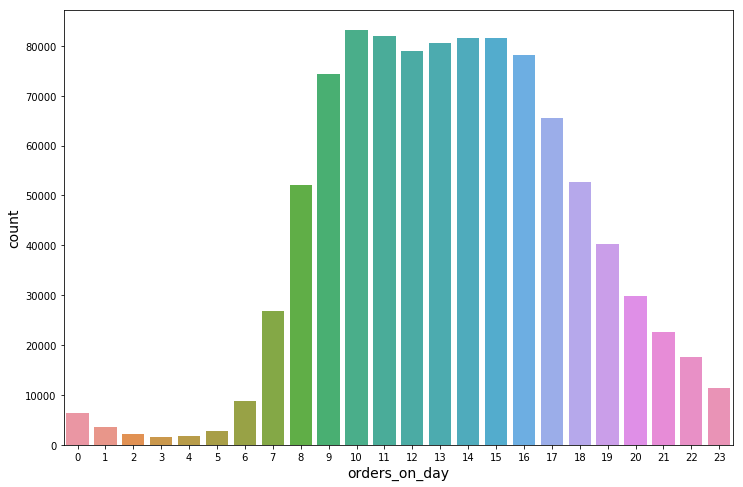

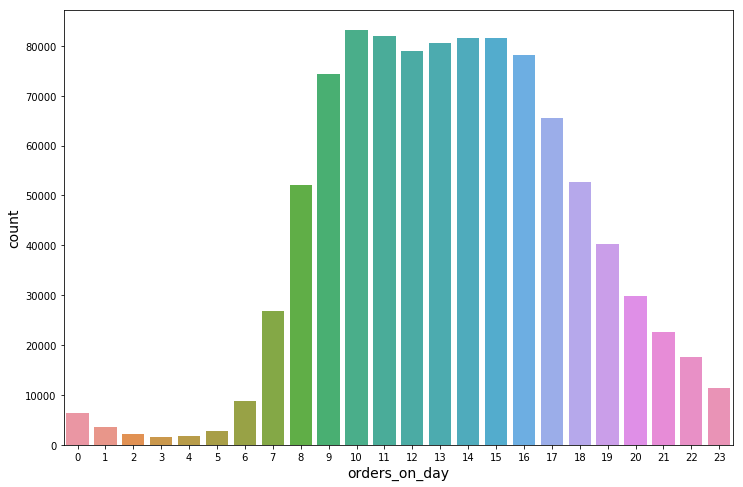

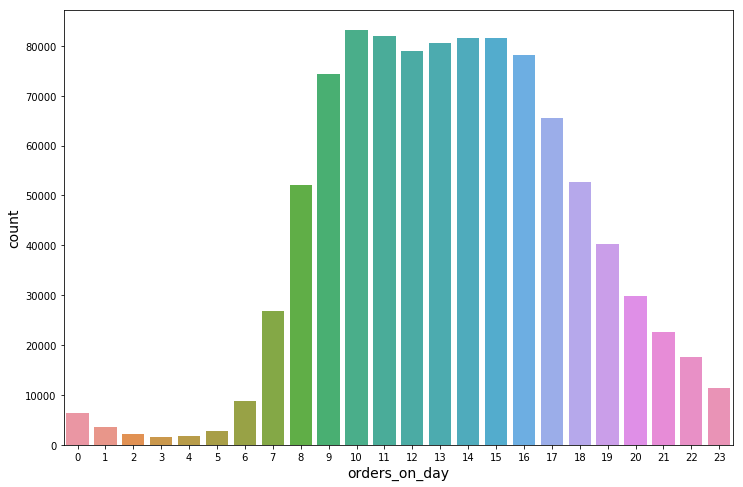

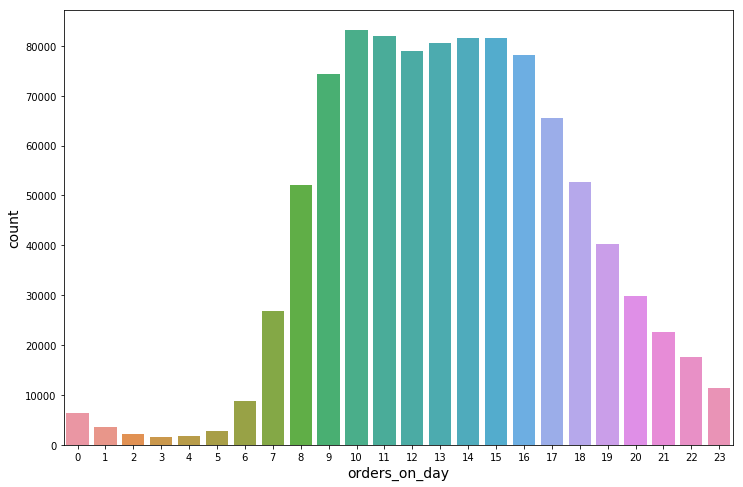

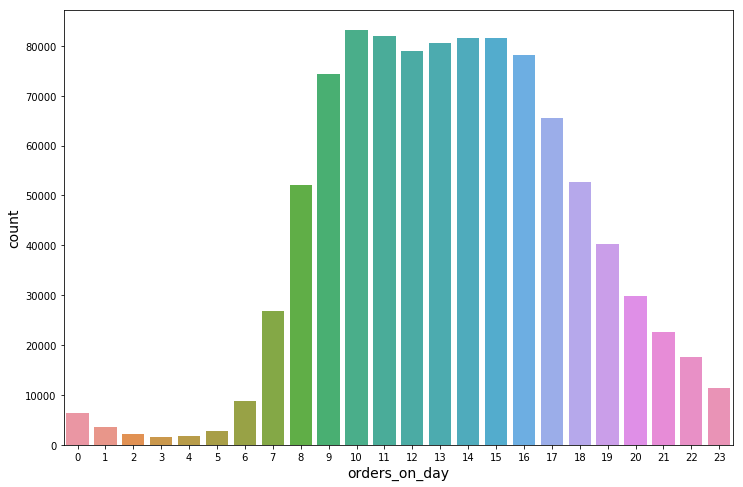

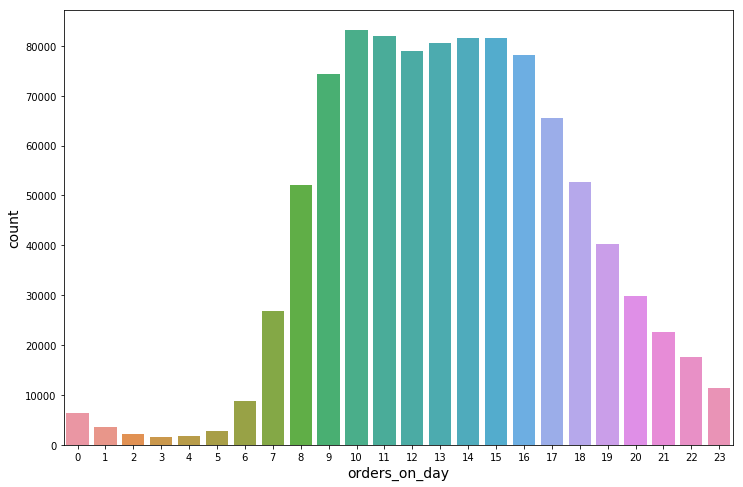

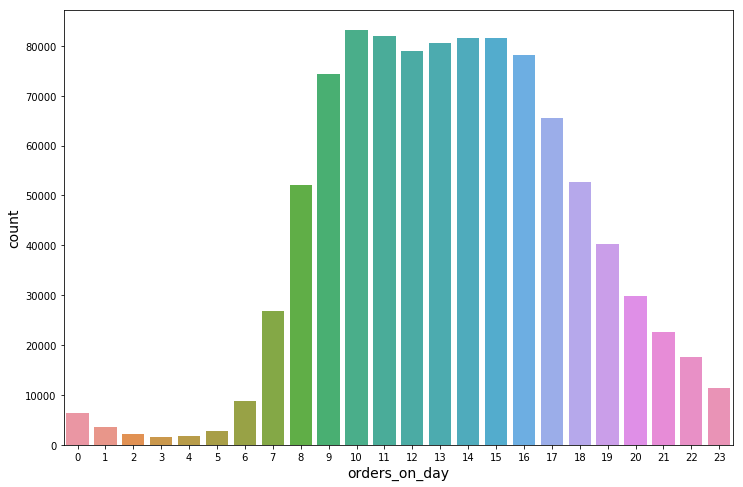

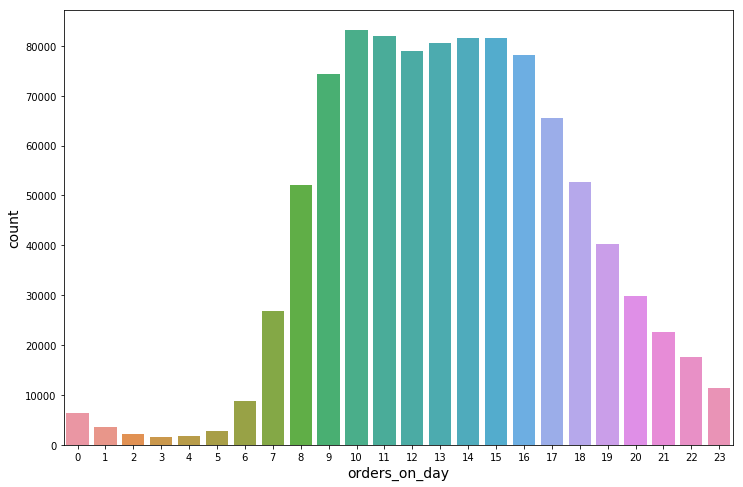

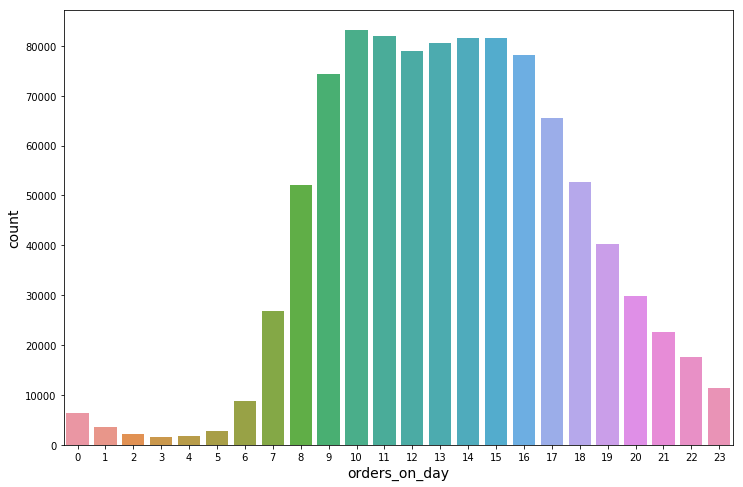

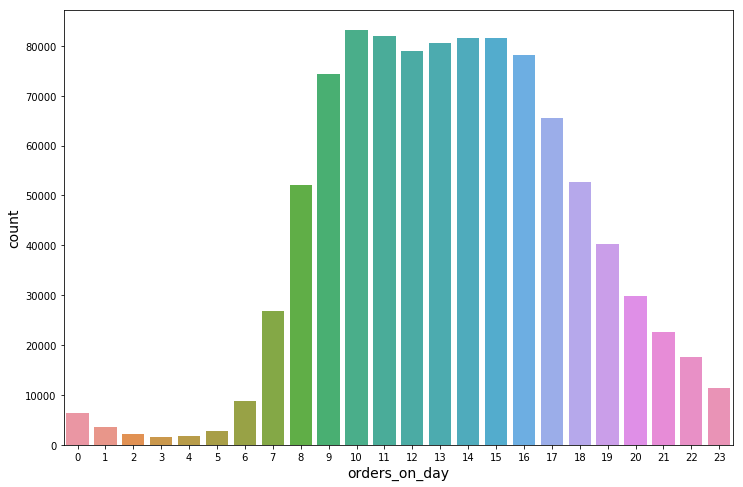

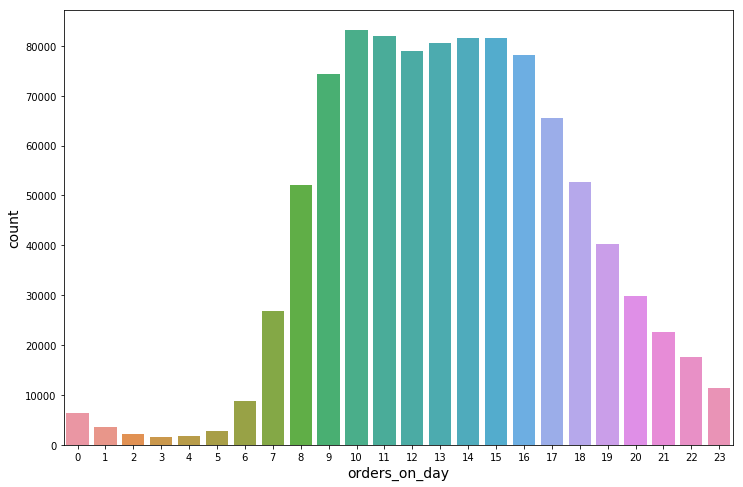

In [ ]:
for i in range(len(orders["order_dow"])):
    plt.figure(figsize=(12,8))
    sns.barplot(count_hour_of_day.index,count_hour_of_day.values,data=orders[orders["order_dow"]==i])
    plt.xlabel("orders_on_day",fontsize=14)
    plt.ylabel("count",fontsize=14)
    plt.show()

In [ ]:
orders.groupby(["user_id","order_dow"]["hour_of_days_orders"]

In [5]:
pd.unique(orders["order_dow"])

array([2, 3, 4, 1, 5, 0, 6], dtype=int64)